In [1]:
import pandas as pd
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from keras.layers import LSTM, Dense,Flatten
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from os.path import exists
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import random
from sklearn.metrics import roc_auc_score
from keras.callbacks import EarlyStopping



In [27]:
#df_failures=pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/master/data/PdM_failures.csv")
#df_machines=pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/master/data/PdM_machines.csv")
#df_telemetry=pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/master/data/PdM_telemetry.csv")
df_errors=pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/master/data/PdM_errors.csv")

#print(df_errors)
#df_failures.to_csv('equipment_failures.csv')
#df_machines.to_csv('equipment_machines.csv')
#df_telemetry.to_csv('equipment_telemetry.csv')
df_errors.to_csv('equipment_errors.csv')

In [30]:
df_failures=pd.read_csv('equipment_failures.csv')
df_machines=pd.read_csv('equipment_machines.csv')
df_telemetry=pd.read_csv('equipment_telemetry.csv')
df_errors=pd.read_csv('equipment_errors.csv')

#print(df_errors)

In [35]:
print(df_errors.columns)

Index(['Unnamed: 0', 'datetime', 'machineID', 'errorID'], dtype='object')


In [44]:
df.drop(df.index, inplace=True)
df=pd.merge(df_failures,df_machines, on="machineID")
df=pd.merge(df,df_telemetry,on="machineID")
df=pd.merge(df,df_errors,on="machineID")
#df=df.sort_values(by="datetime_x")


MemoryError: Unable to allocate 2.03 GiB for an array with shape (272835062,) and data type int64

Discover what the data looks like for the first 100 transactions


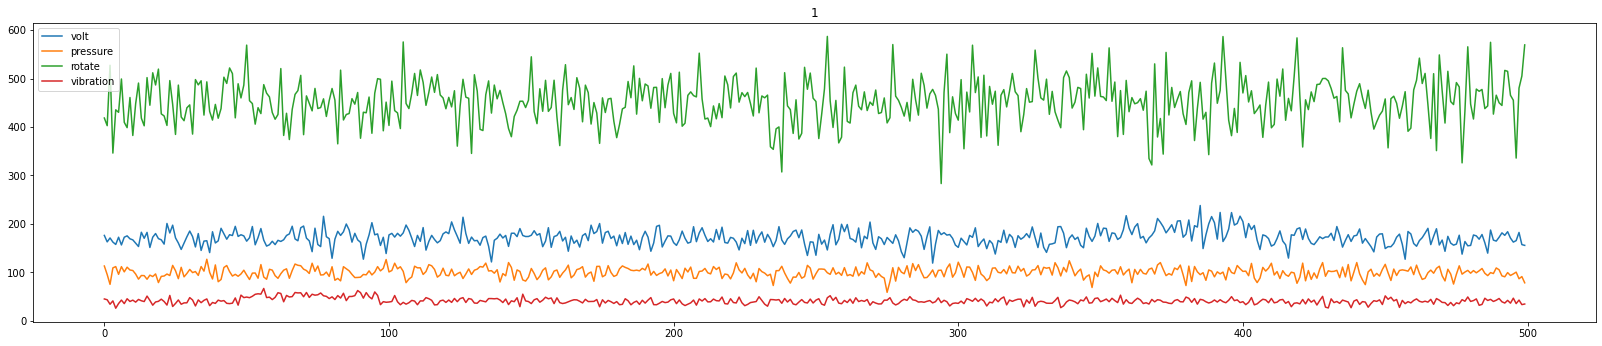

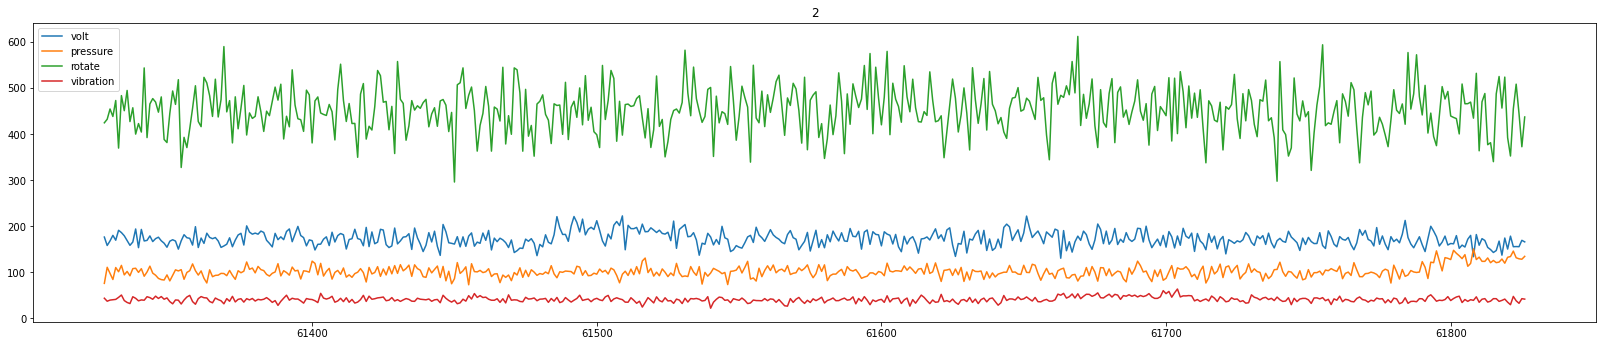

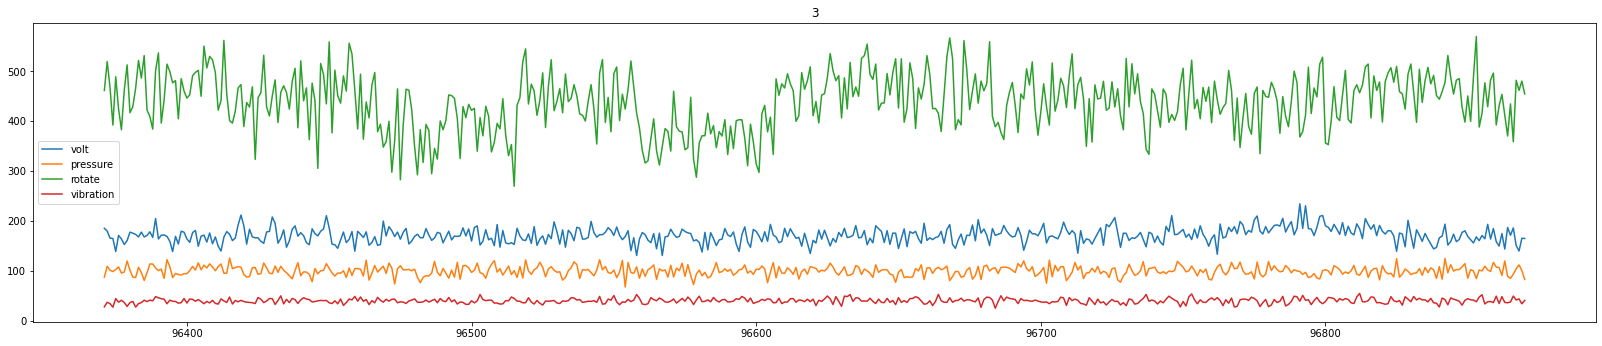

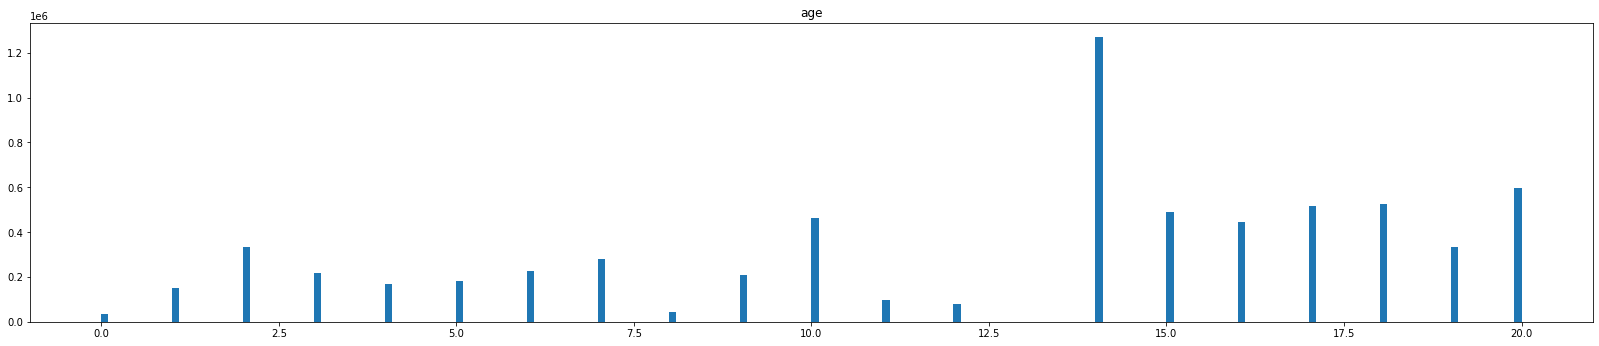

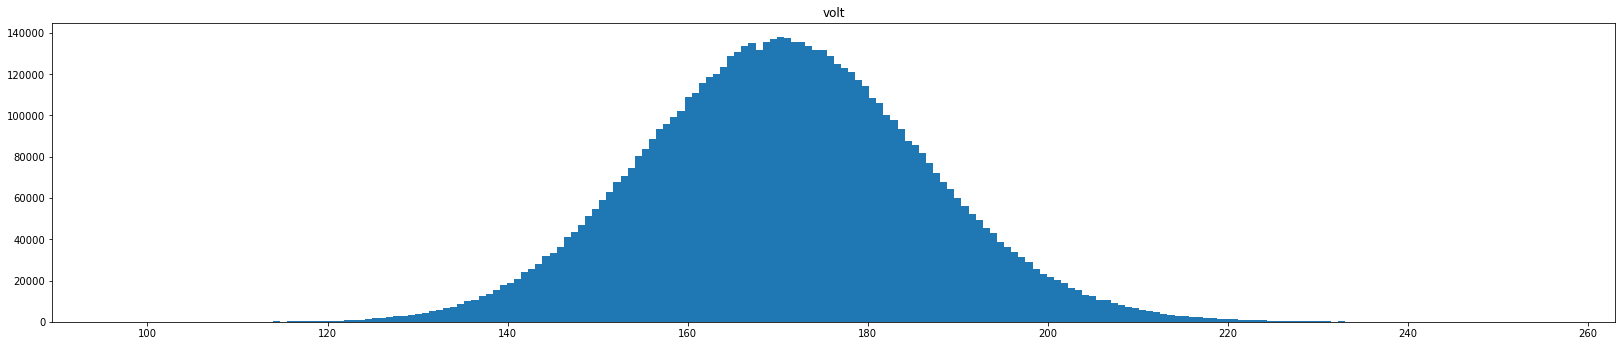

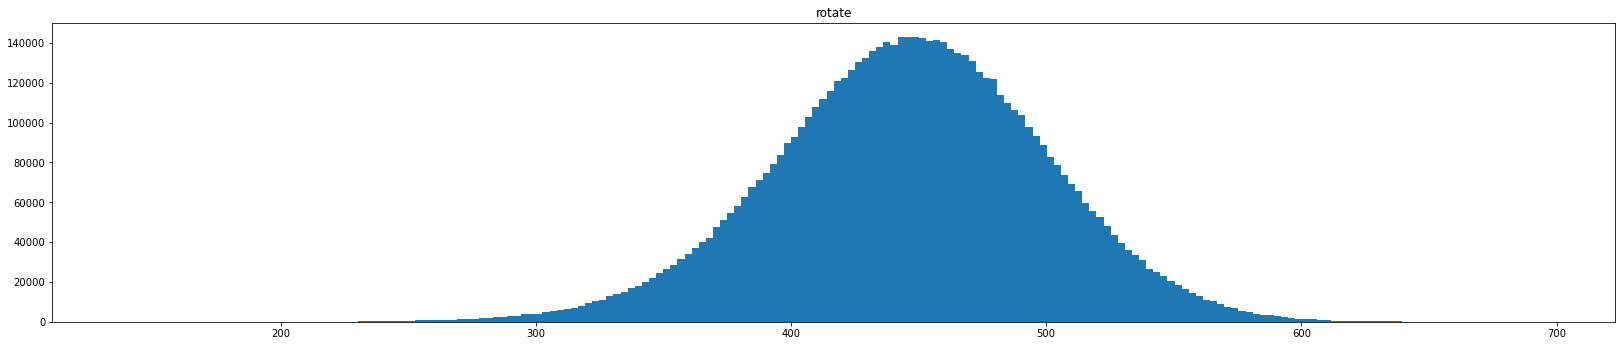

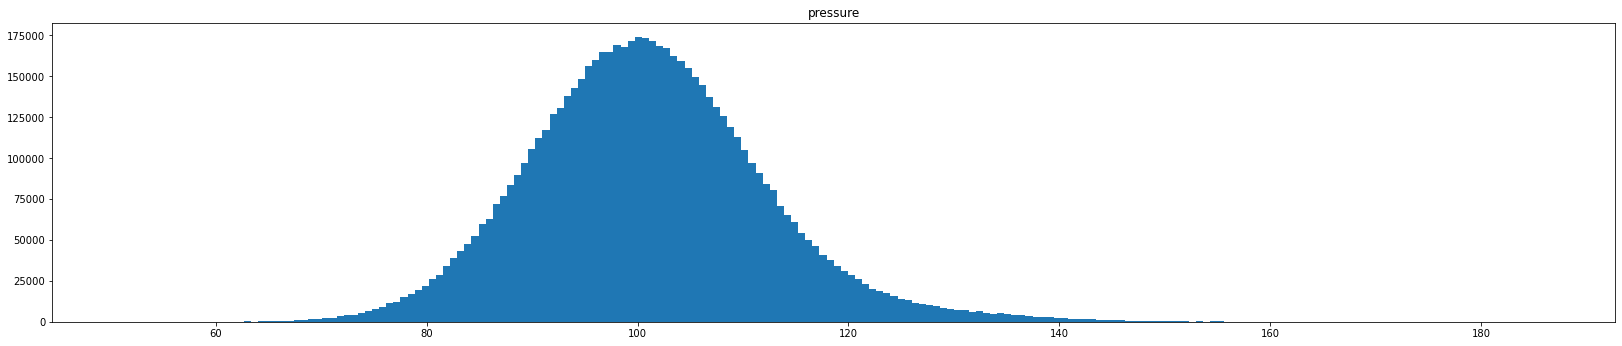

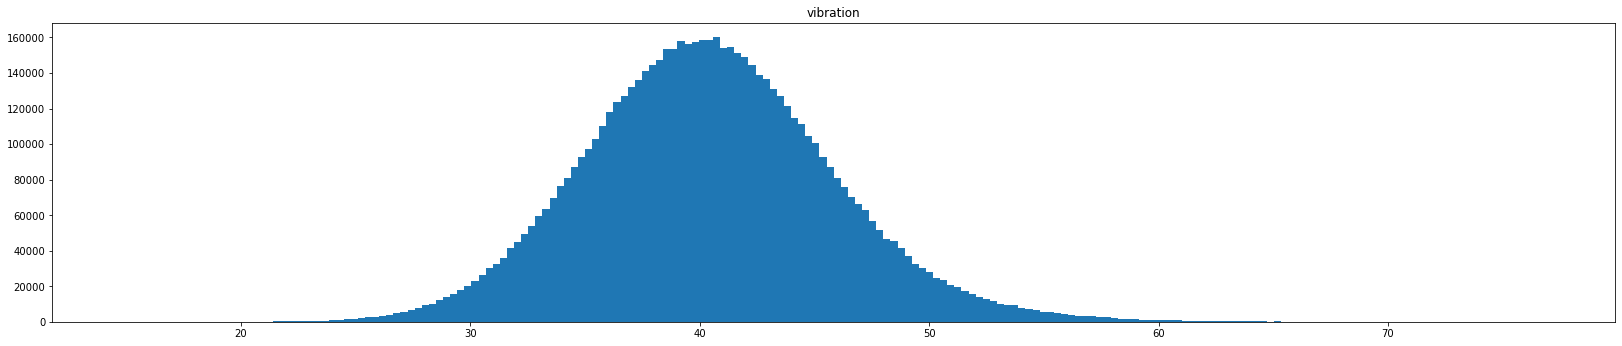

In [5]:
#'machineID', 'label', 'model', 'age', 'volt', 'rotate', 'pressure'
print("Discover what the data looks like for the first 100 transactions")
machineIds=[]
grouped=df.groupby('machineID')
for machineID in grouped:
    machineIds.append(machineID[0])

#print(machineIds)
plt.rcParams["figure.figsize"] = (28,5.5)
for machineId in machineIds[0:3]:
    #print(machineId)
    filter=df['machineID']==machineId
    results=df[filter][:500]
    #print(len(results))
    #print(results['datetime_x'])
    x=range(0,len(results)-1,1)
    plt.plot(results['volt'],label='volt')
    plt.plot(results['pressure'],label='pressure')
    plt.plot(results['rotate'],label='rotate')
    plt.plot(results['vibration'],label='vibration')
    #twin_ax=plt.twinx()
    #twin_ax.plot(results['age'],label='age')
    plt.title(machineId)
    plt.legend()
    plt.show()
    
columns=[column for column in df.columns if column in['age','vibration','rotate','pressure','volt']]
for column in columns:
    plt.hist(df[column],bins=200)
    plt.title(column)
    plt.show()



In [6]:
print("Drop non contributing features and dummy the multi-class output")
if "datetime_x" in df:
    df.drop(["Unnamed: 0","Unnamed: 0_x","Unnamed: 0_y","datetime_y","datetime_x","age"],axis=1,inplace=True)
    df.rename(columns={"errorID":"label"},inplace=True)

failure_types=set(df['label'])
print(failure_types)

encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
df['model']=encoder.fit_transform(df['model'])

X_columns=[x for x in df.columns if x!='label']

X=df[X_columns]
y=df['label']
#y = np.asarray(y).astype(np.float32)
y = pd.get_dummies(y)

print(y)

print(df.columns)
print(df.head(1))

Drop non contributing features and dummy the multi-class output
{'comp4', 'comp1', 'comp2', 'comp3'}
         0  1  2  3
0        0  0  0  1
1        0  0  0  1
2        0  0  0  1
3        0  0  0  1
4        0  0  0  1
...     .. .. .. ..
6667116  0  1  0  0
6667117  0  1  0  0
6667118  0  1  0  0
6667119  0  1  0  0
6667120  0  1  0  0

[6667121 rows x 4 columns]
Index(['machineID', 'label', 'model', 'volt', 'rotate', 'pressure',
       'vibration'],
      dtype='object')
   machineID  label  model        volt      rotate    pressure  vibration
0          1      3      2  176.217853  418.504078  113.077935  45.087686


In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

print(X_train.columns)
print("rows",X_train.shape[0],"columns",X_train.shape[1])
print((X_train.shape[0],X_train.shape[1],1))

Index(['machineID', 'model', 'volt', 'rotate', 'pressure', 'vibration'], dtype='object')
rows 4466971 columns 6
(4466971, 6, 1)


In [19]:
for index, item in enumerate(y_train.values):
    if ((item[0]==0) and (item[1]==0) and (item[2]==0) and (item[3]==0)):
        print(item)


In [ ]:
activation2="relu"
batch_size=64
print("build the Dense model")
model = Sequential()
features=len(X_columns)
model.add(LSTM(units=500, activation='relu', batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), stateful=True),dtype="float32"))
model.add(Dropout(0.2))
model.add(Dense(units=250, activation=activation2))
model.add(Dense(units=250, activation=activation2))
model.add(Dense(units=250, activation=activation2))
model.add(Dense(units=250, activation=activation2))
model.add(Dense(units=250, activation=activation2))
model.add(Flatten())
model.add(Dense(len(y_train.columns),activation='softmax'))
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print("X train shape",X_train.shape)
#print(X_train)
print("y train shape",y_train.shape)


Train the model
1000 2000


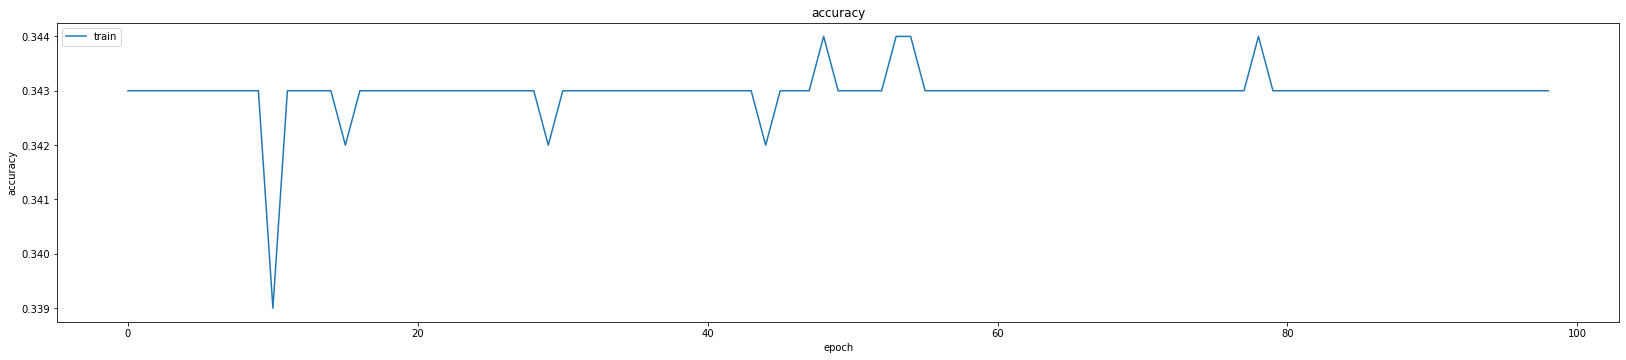

2000 3000


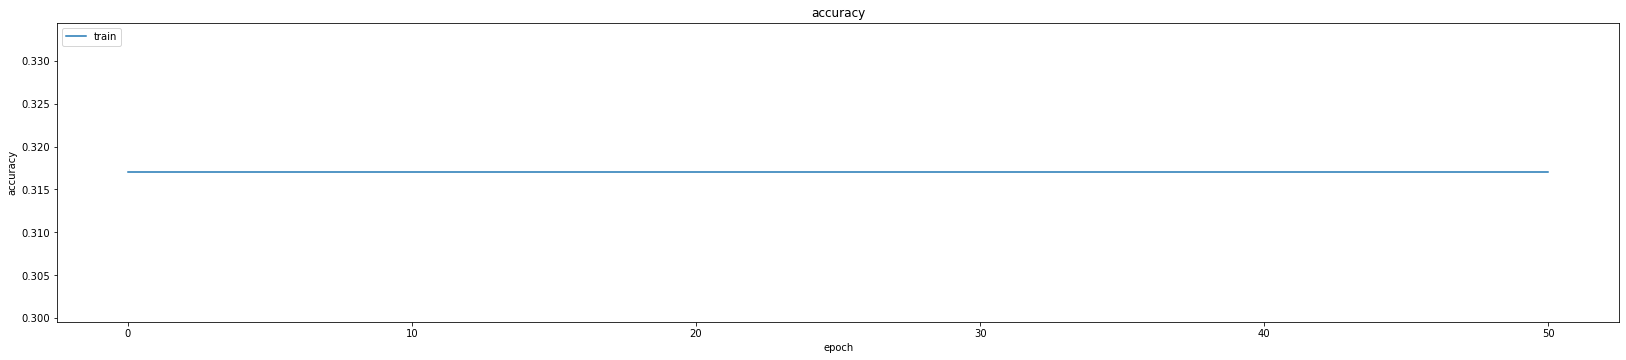

3000 4000


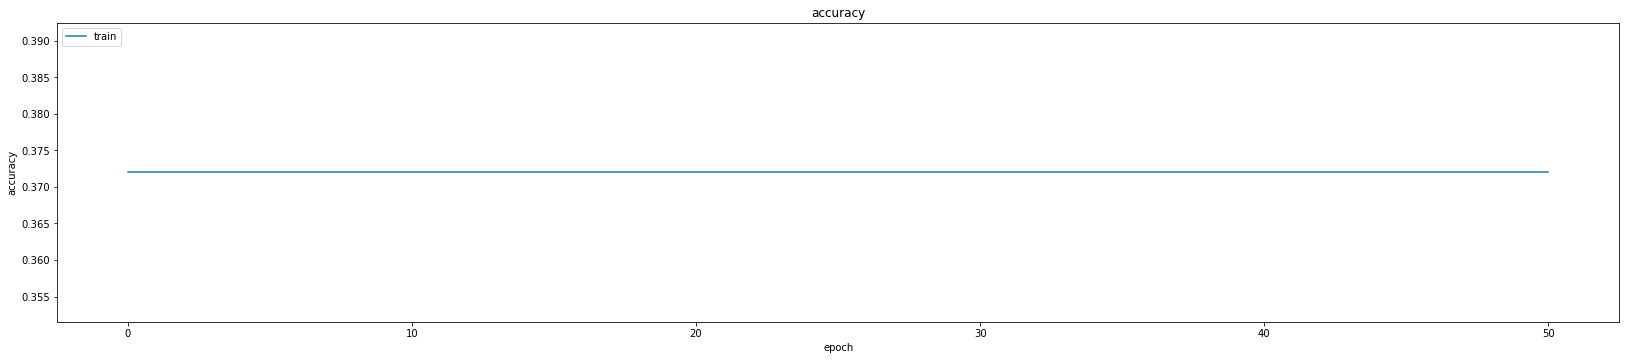

4000 5000


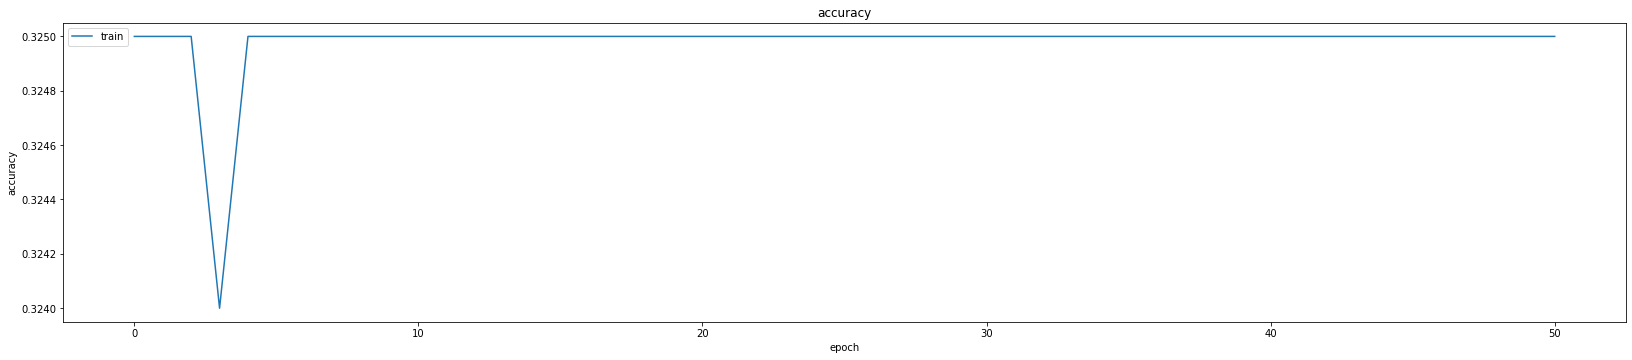

5000 6000


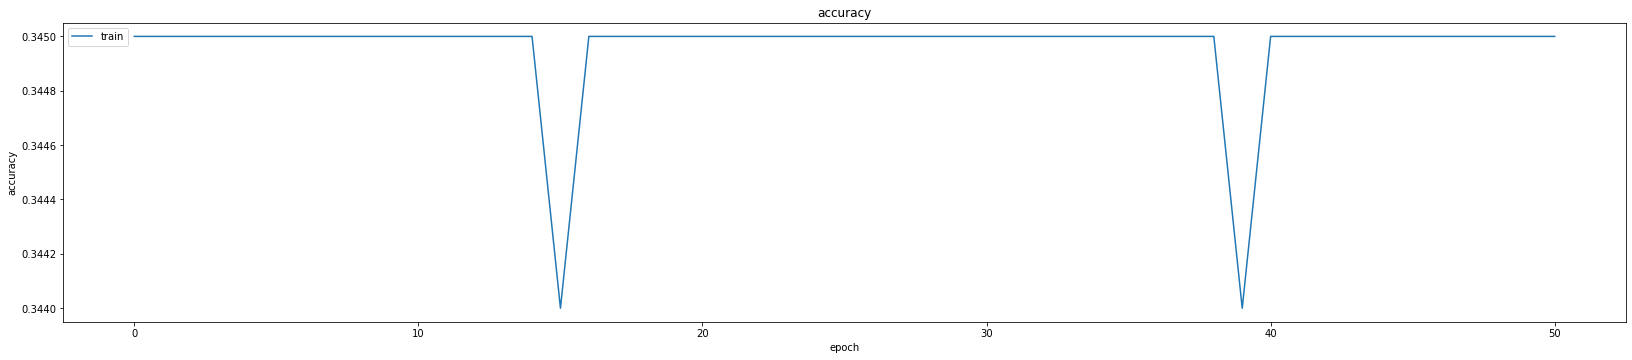

6000 7000


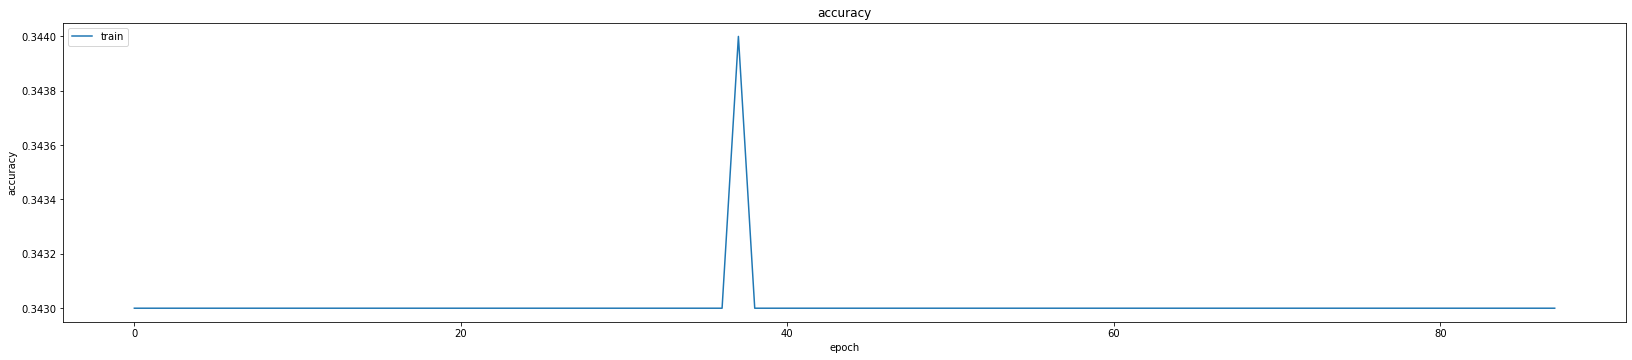

7000 8000


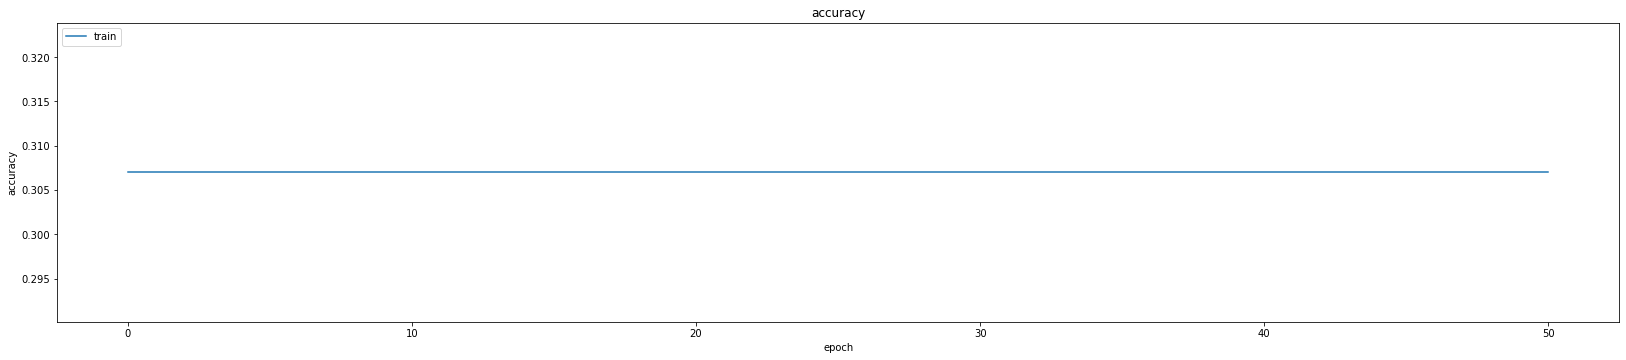

8000 9000


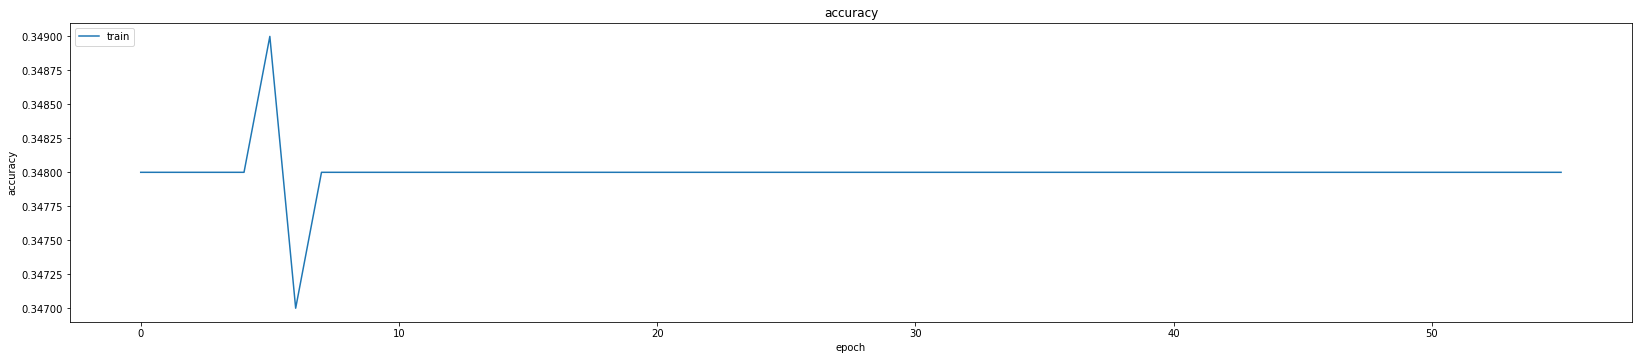

9000 10000


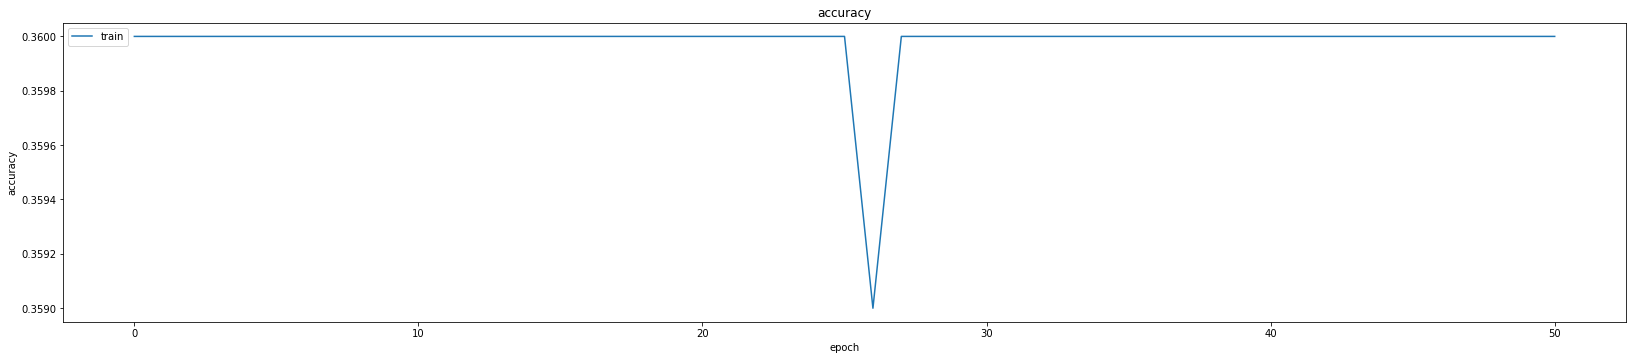

10000 11000


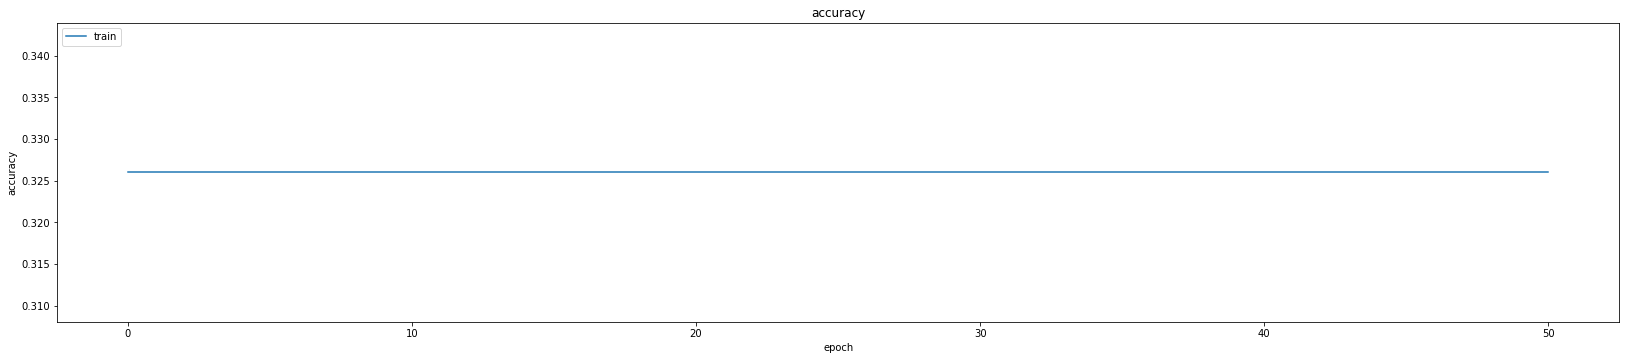

11000 12000


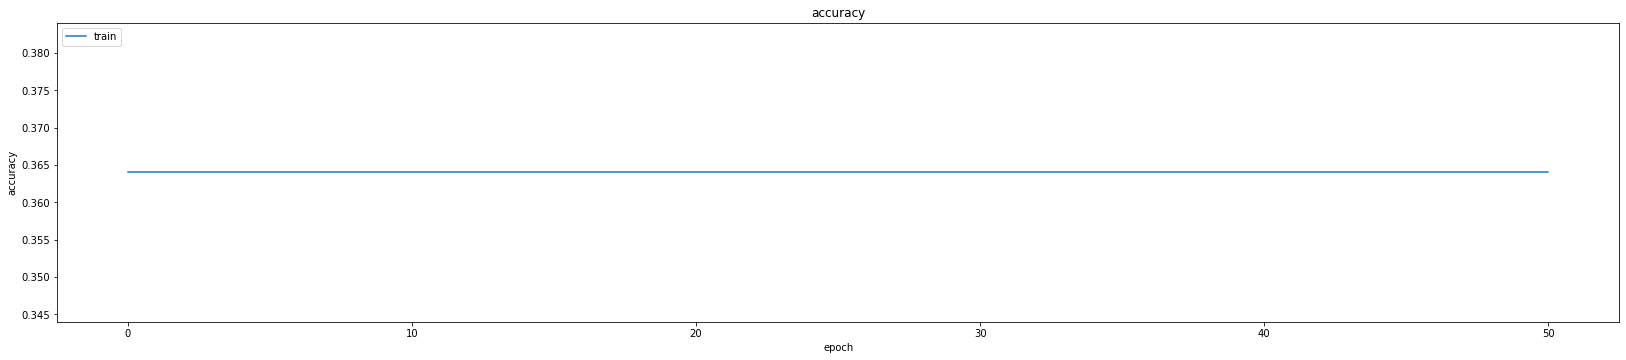

12000 13000


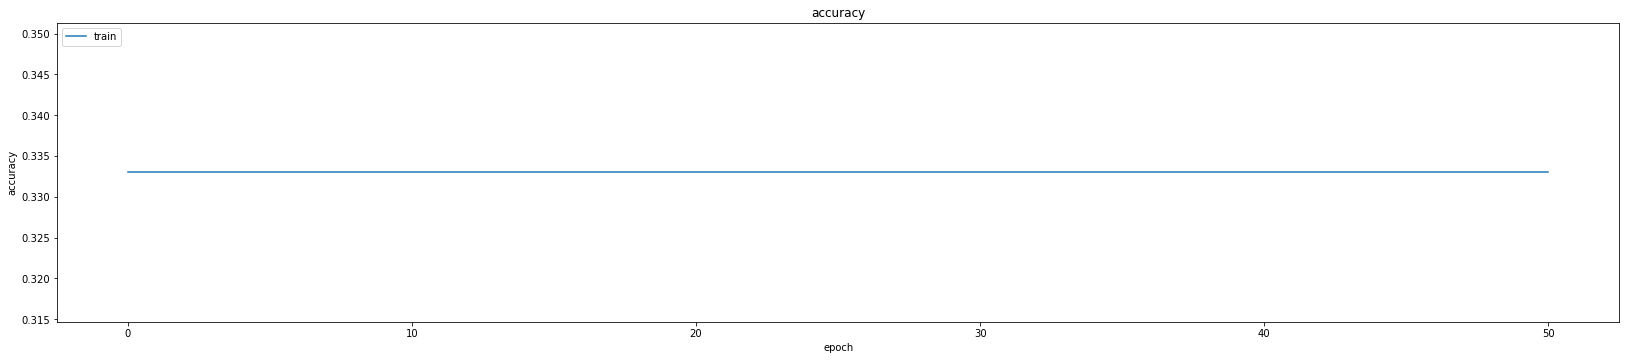

13000 14000


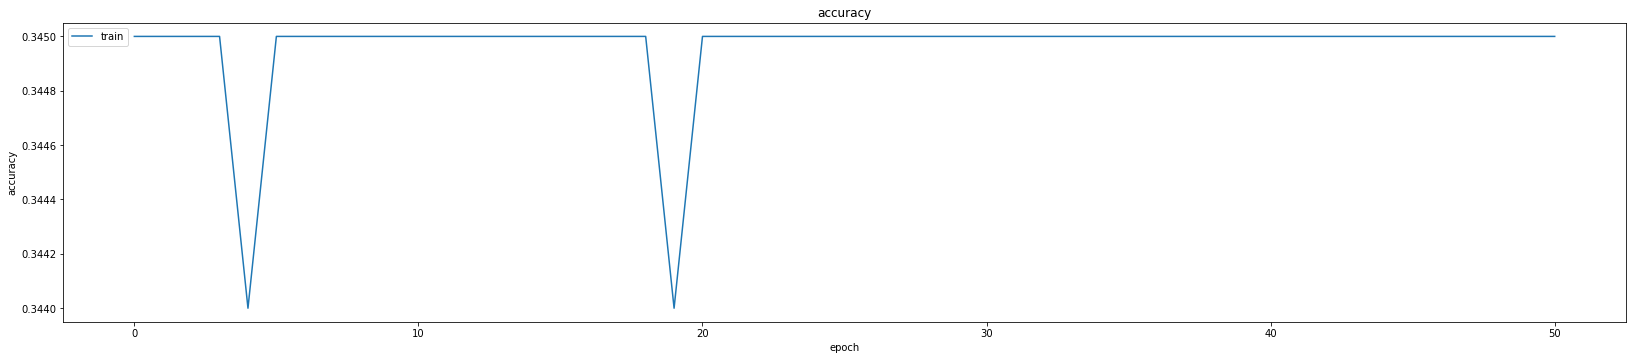

14000 15000


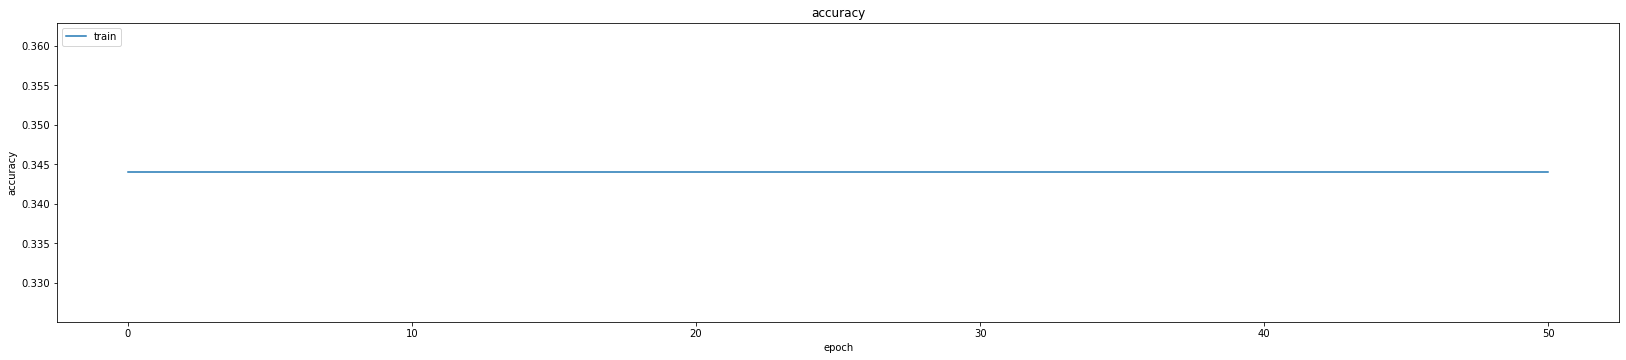

15000 16000


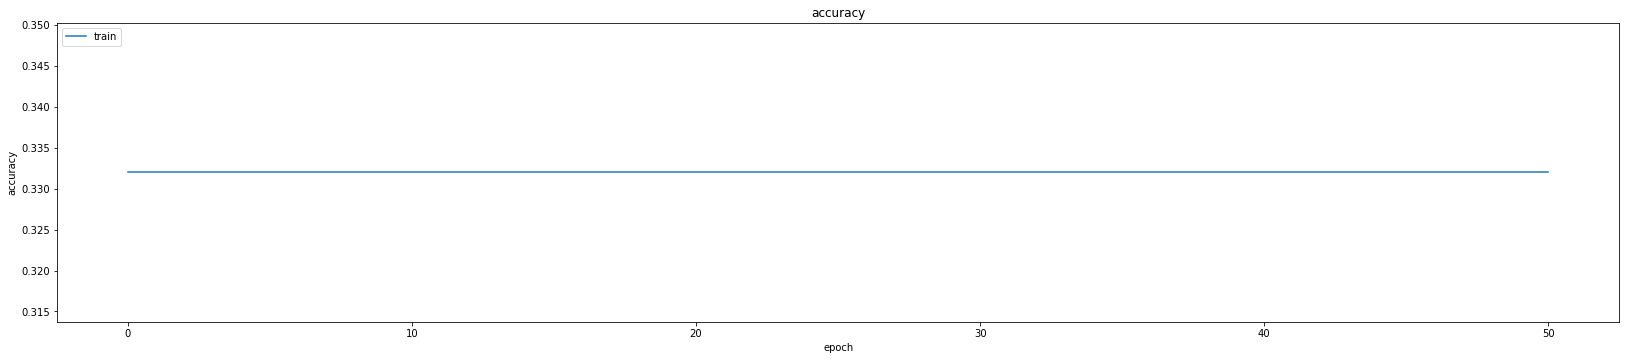

16000 17000


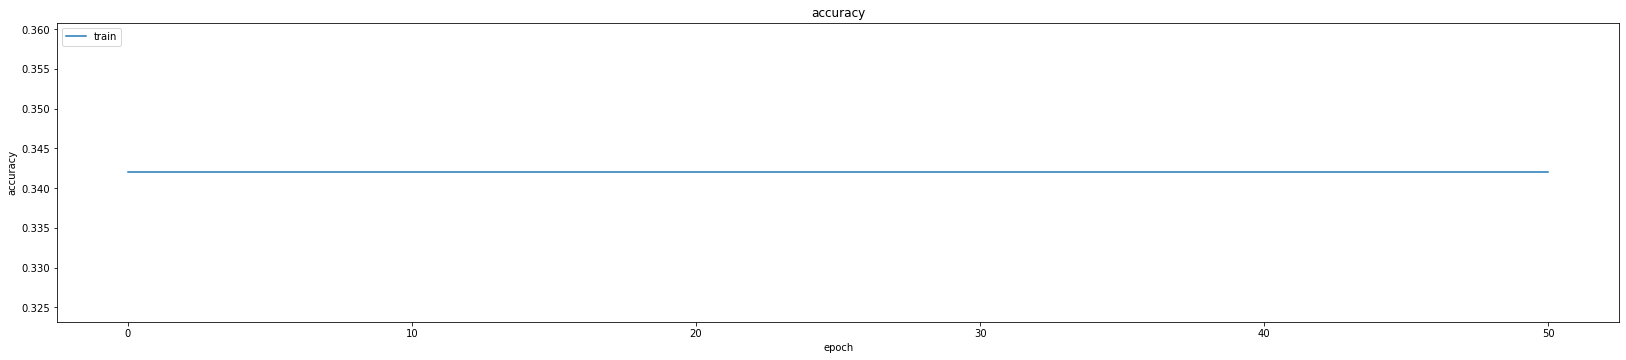

17000 18000


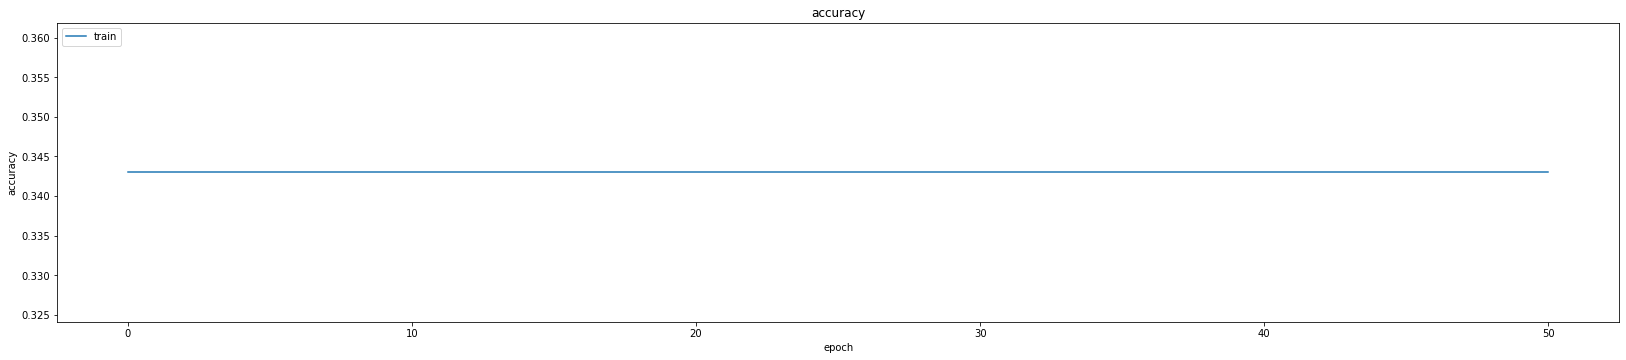

18000 19000


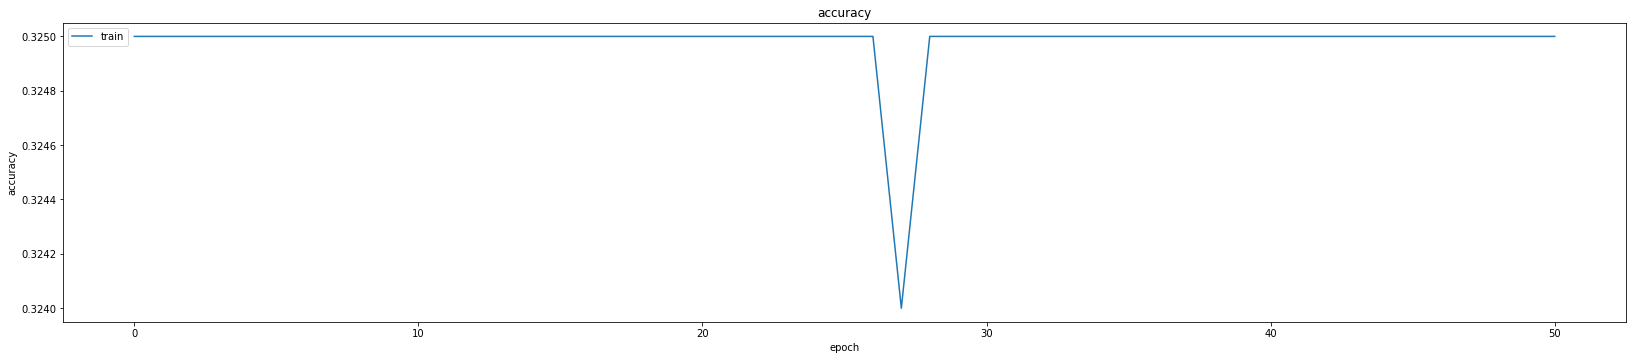

19000 20000


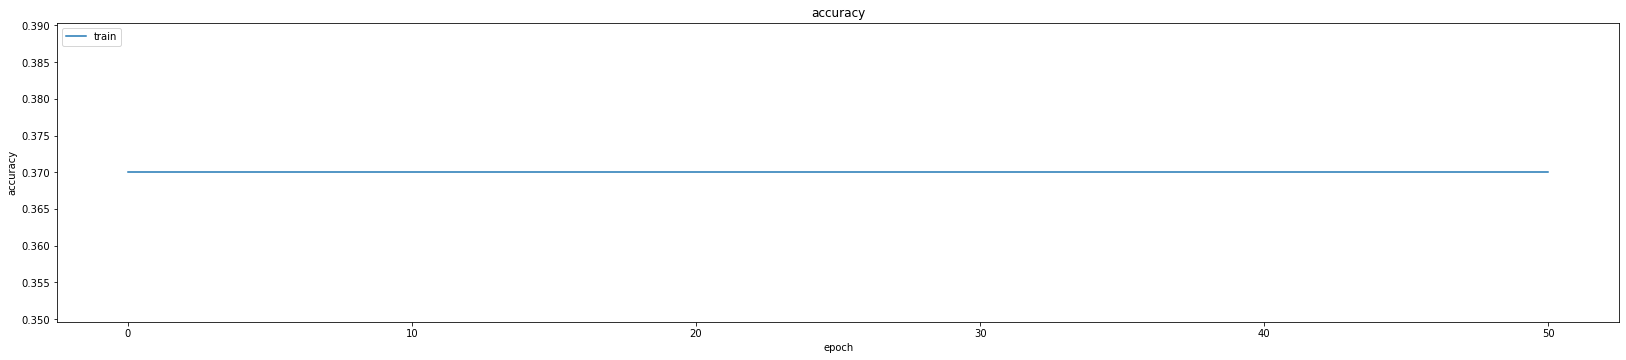

20000 21000


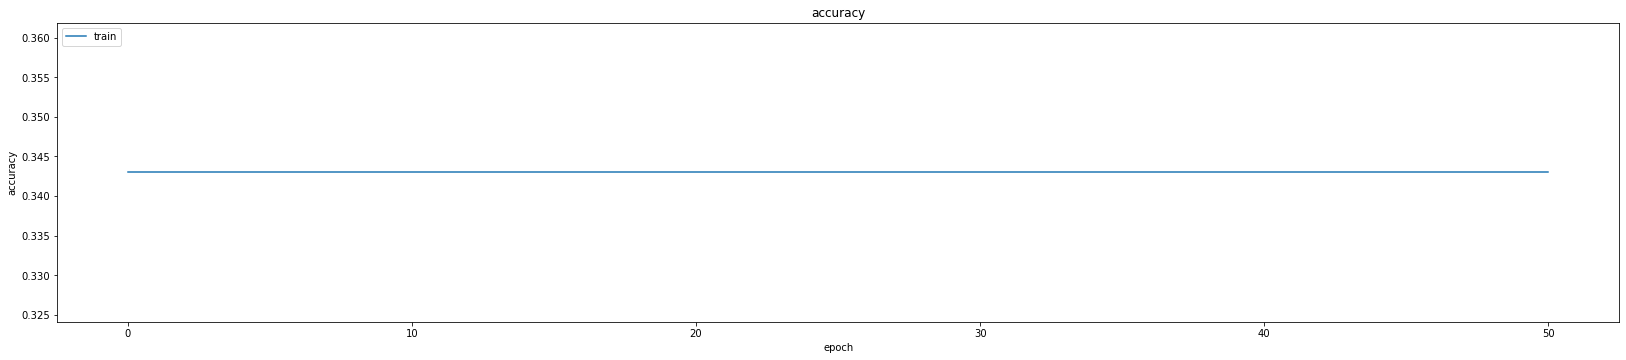

21000 22000


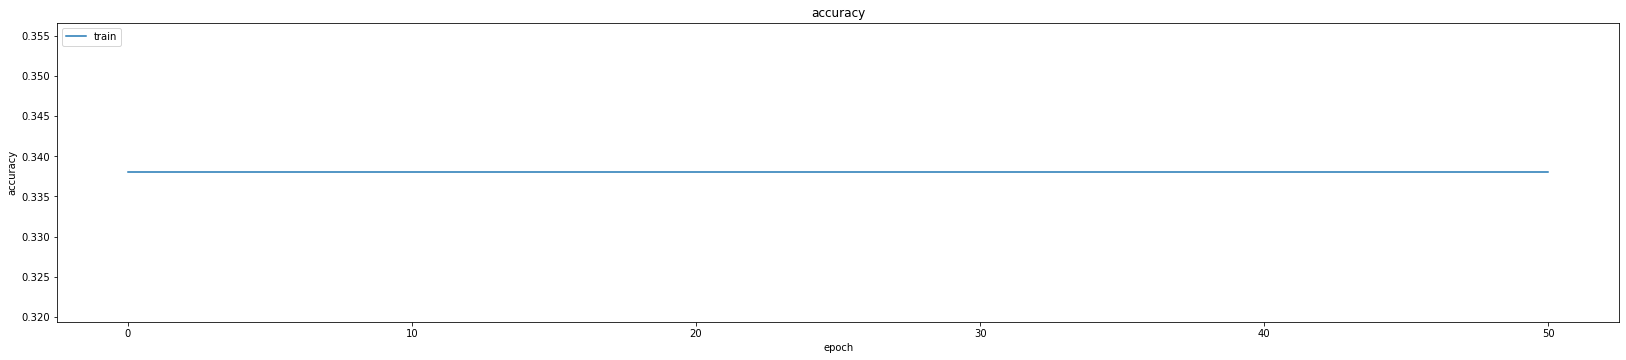

22000 23000


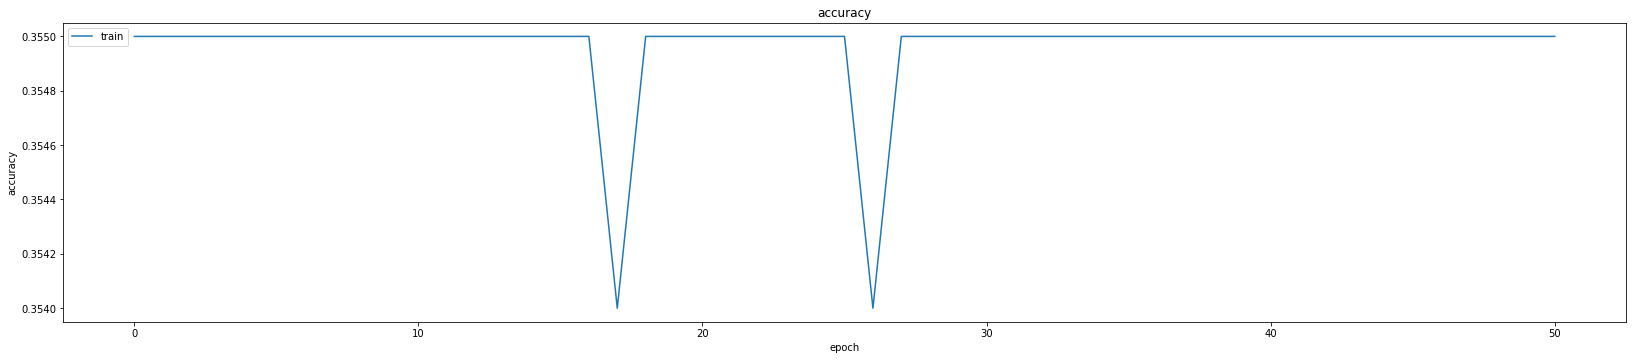

23000 24000


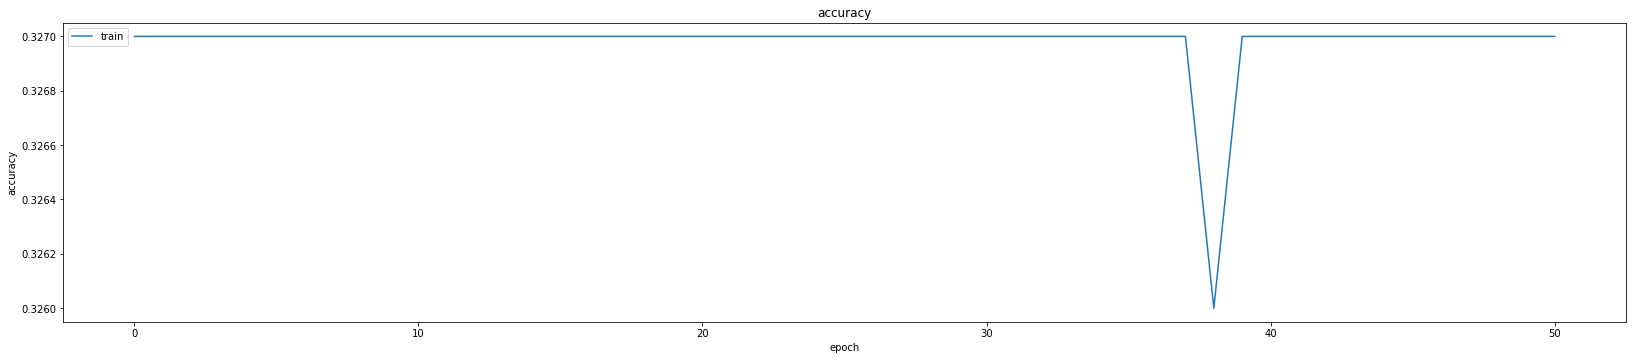

24000 25000


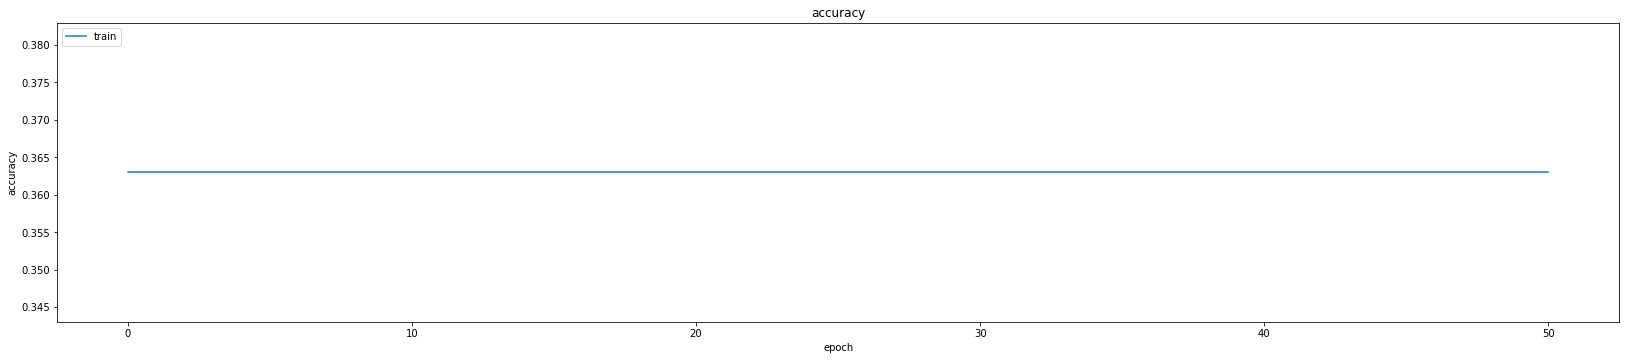

25000 26000


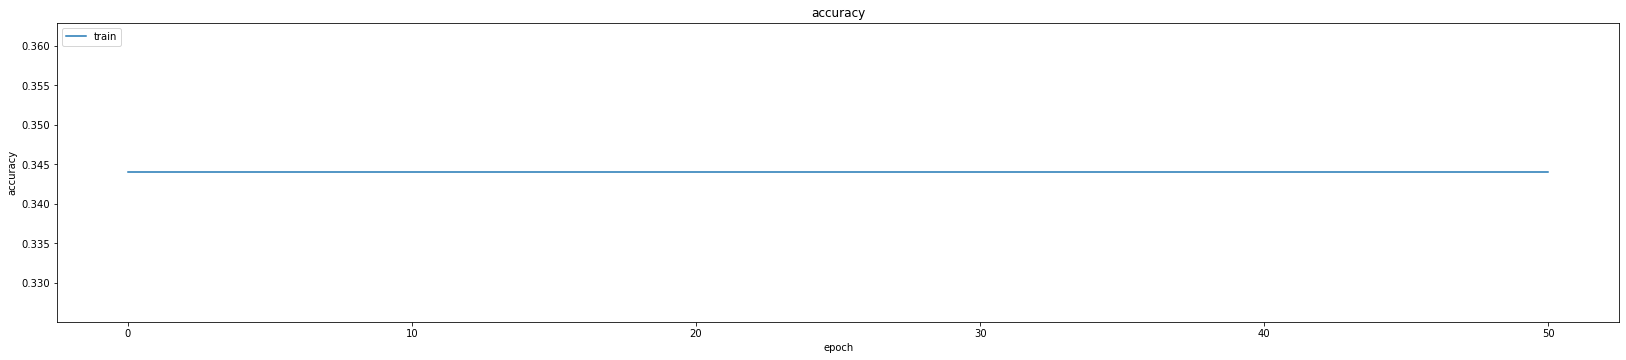

26000 27000


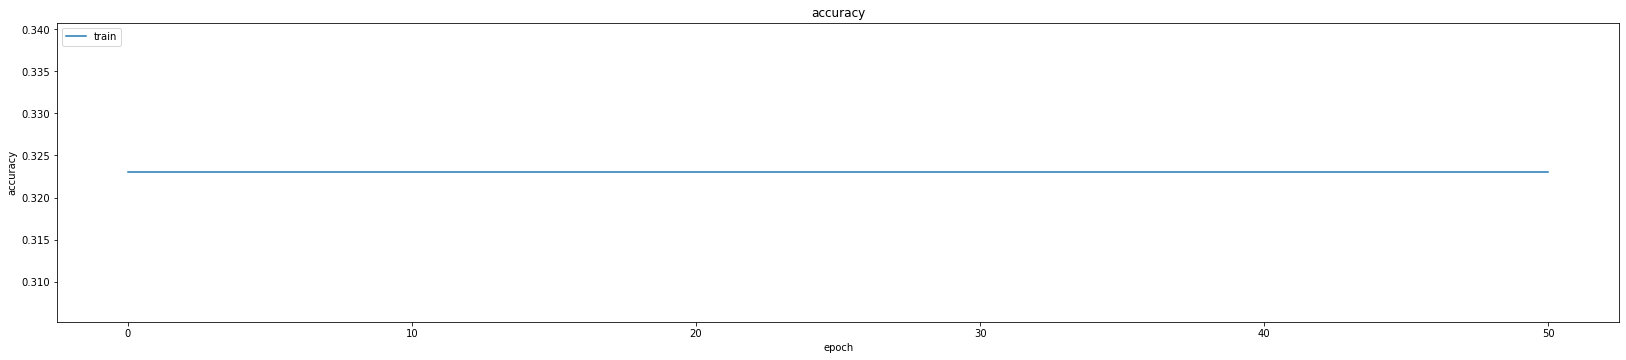

27000 28000


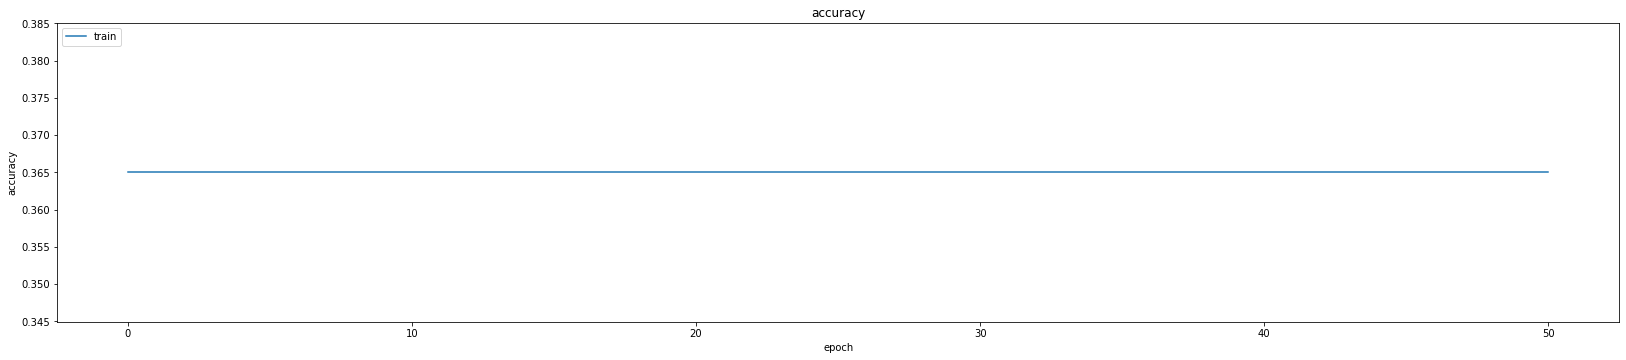

28000 29000


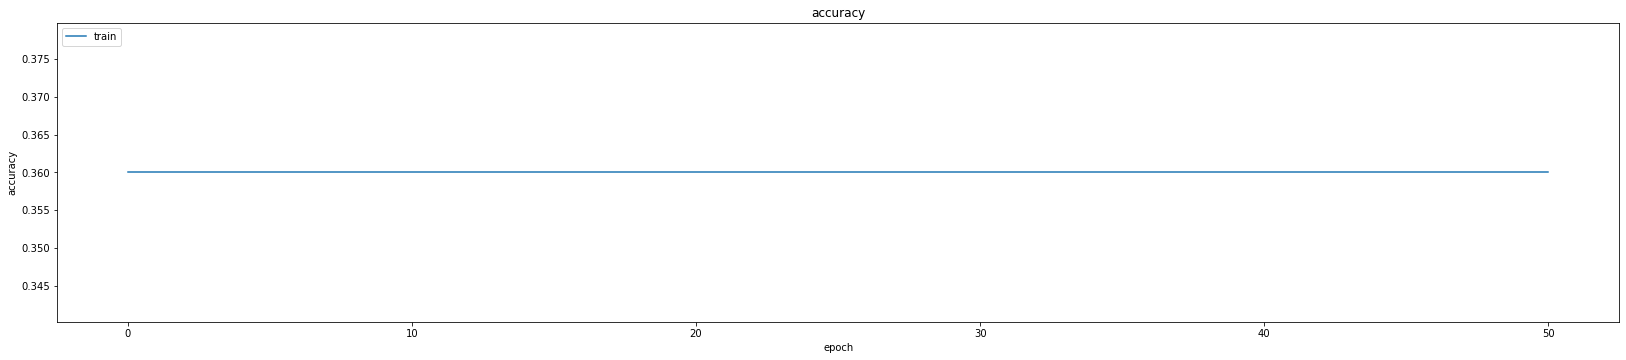

29000 30000


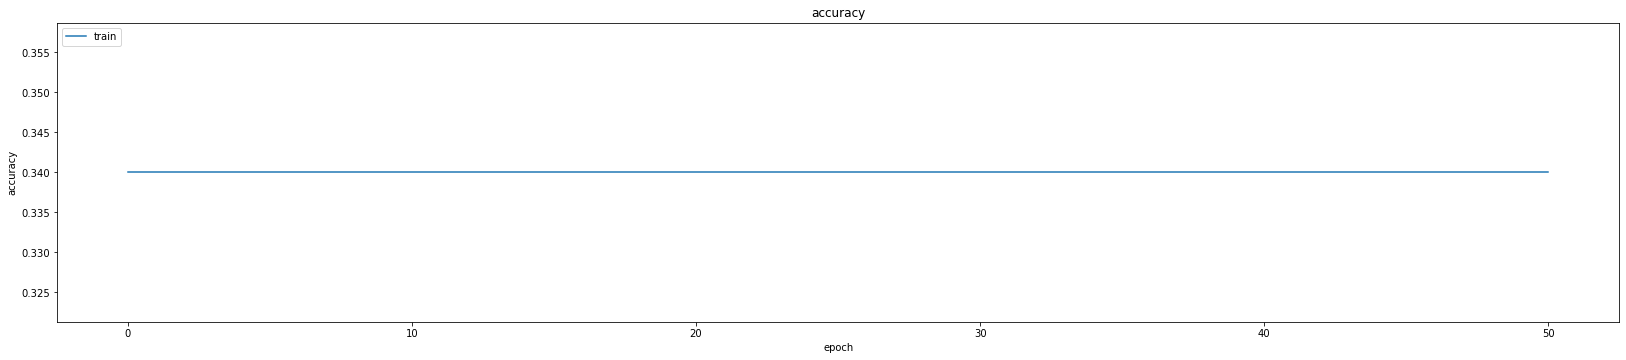

30000 31000


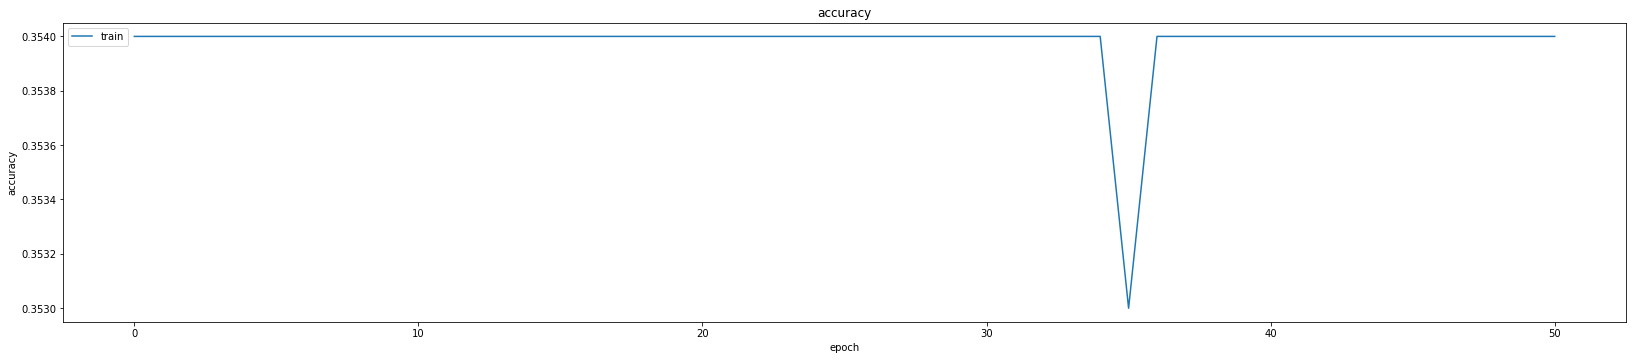

31000 32000


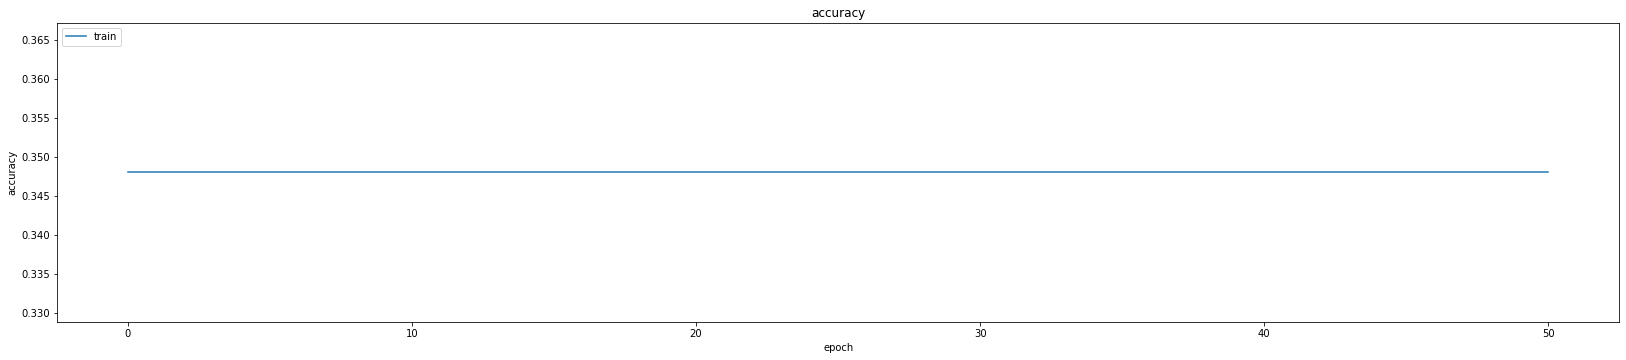

32000 33000


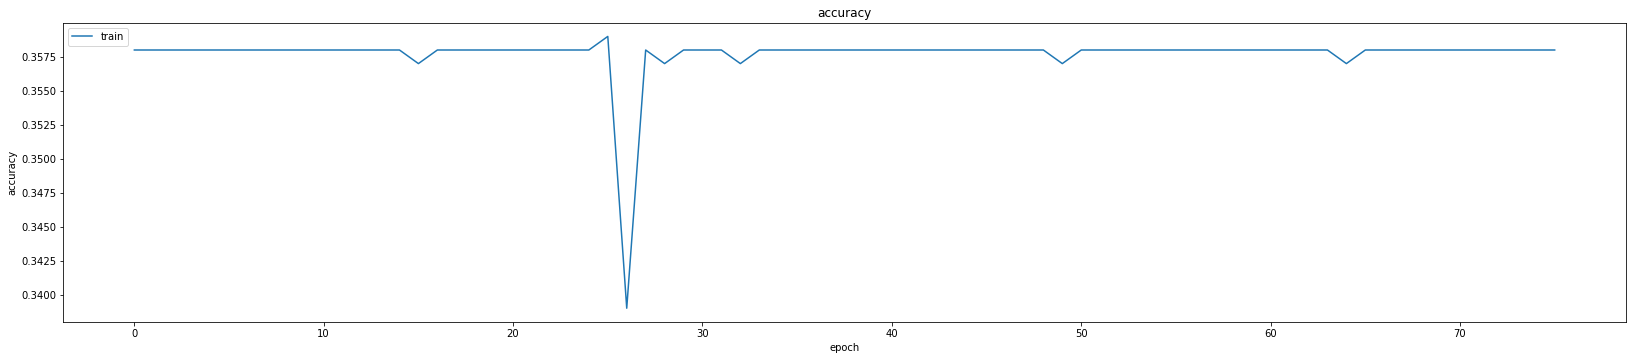

33000 34000


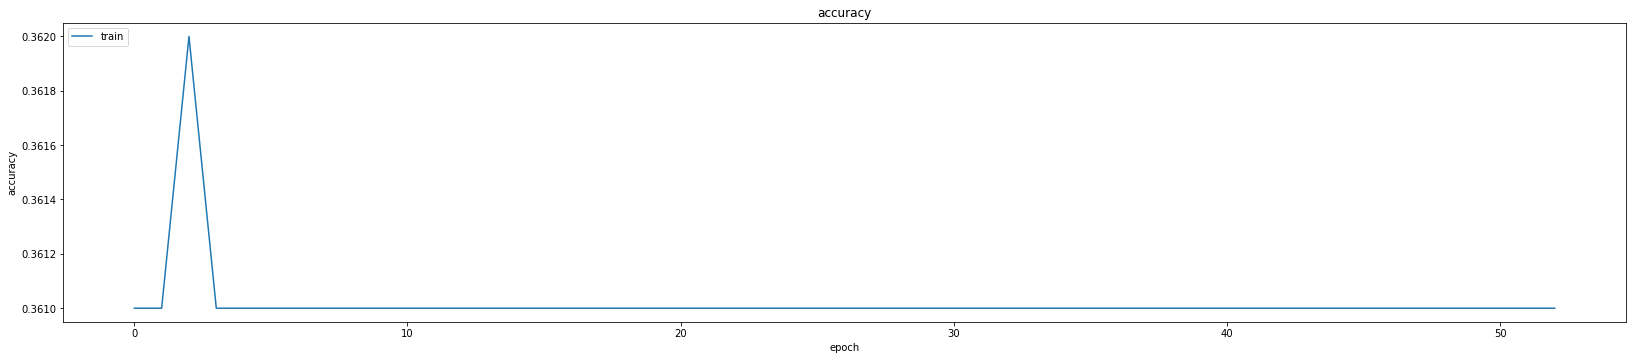

34000 35000


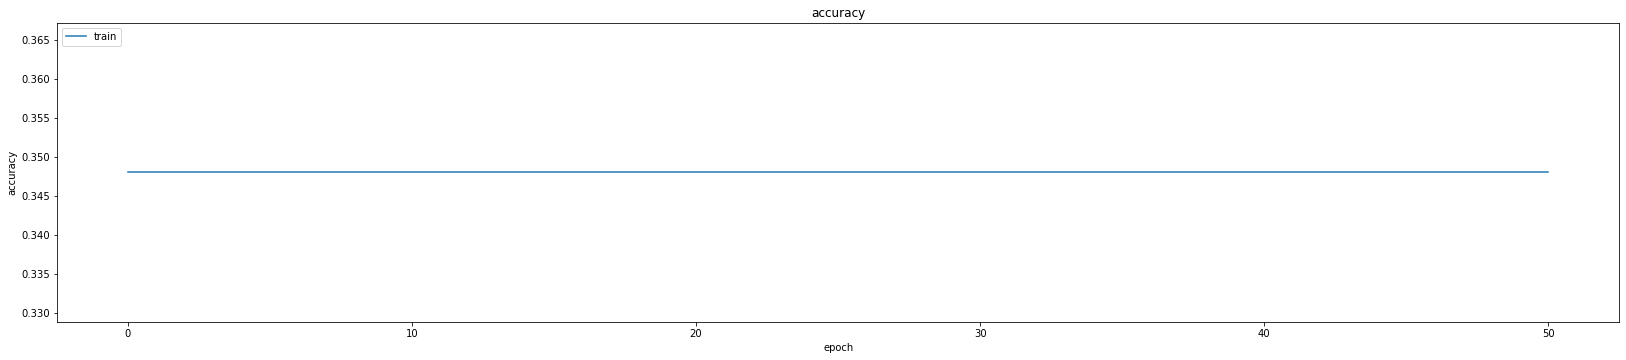

35000 36000


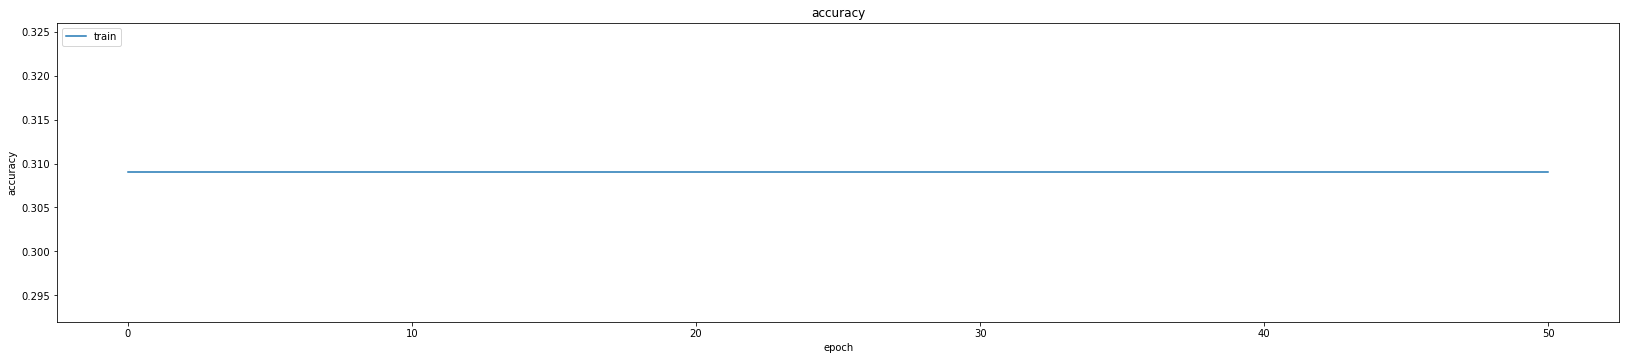

36000 37000


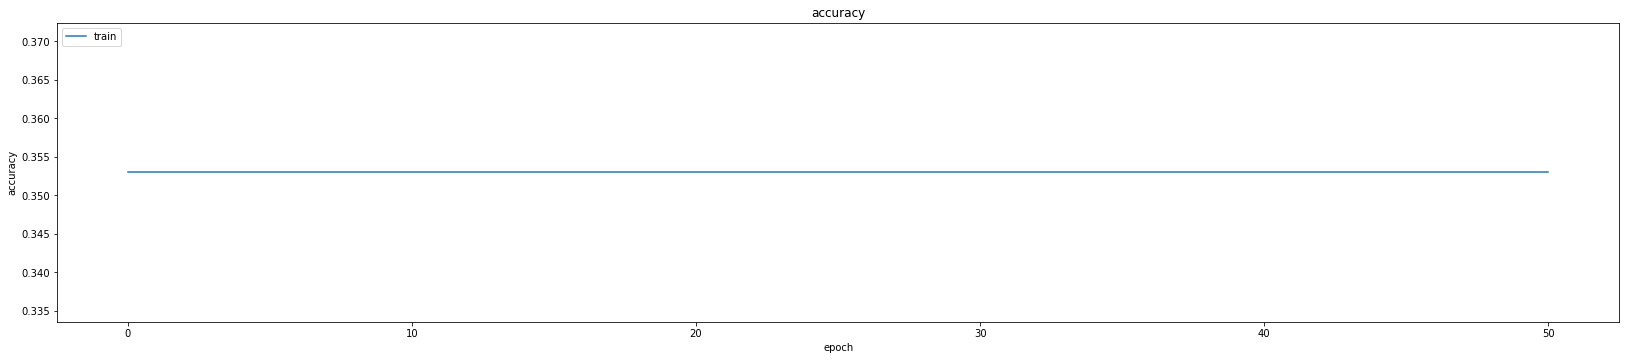

37000 38000


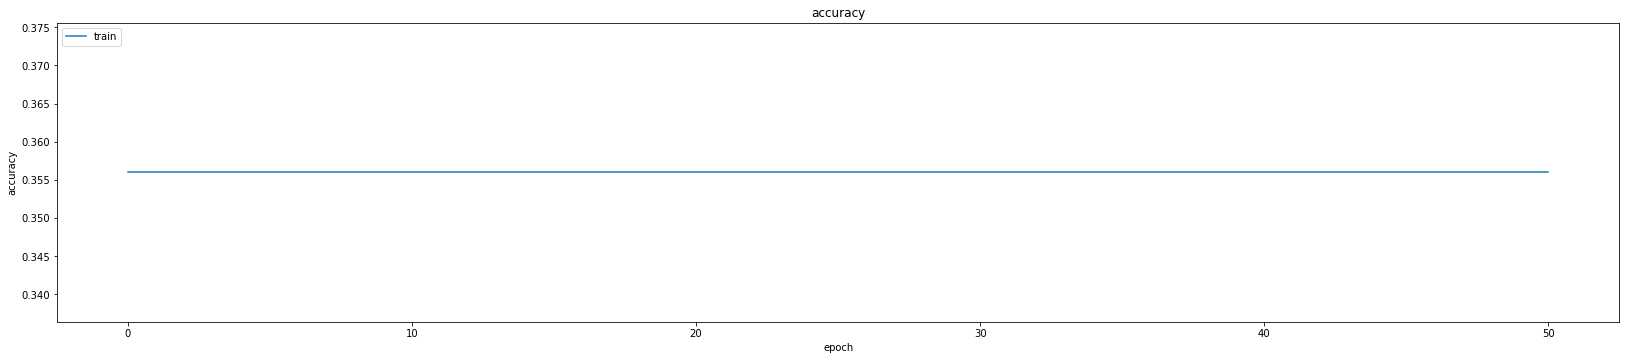

38000 39000


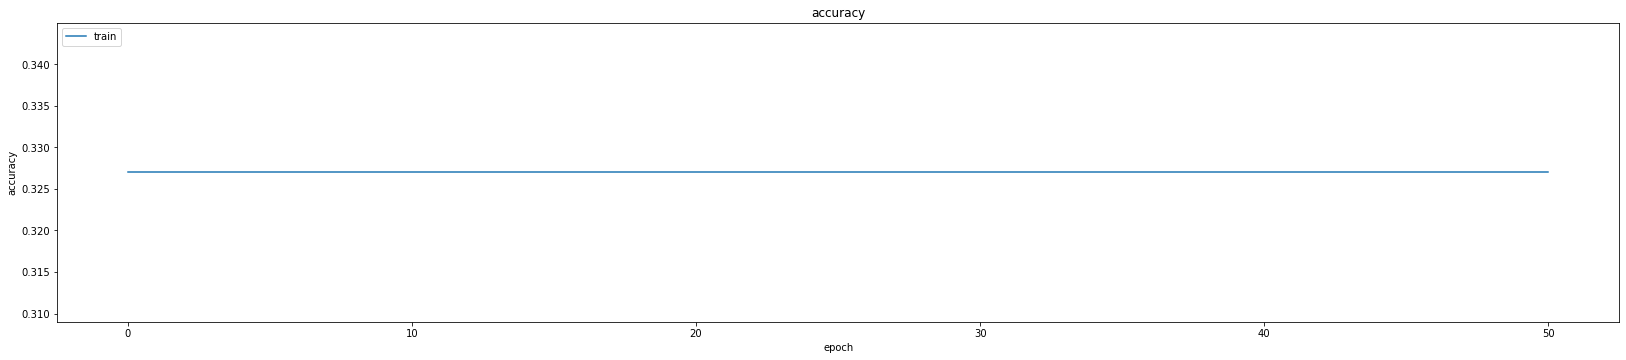

39000 40000


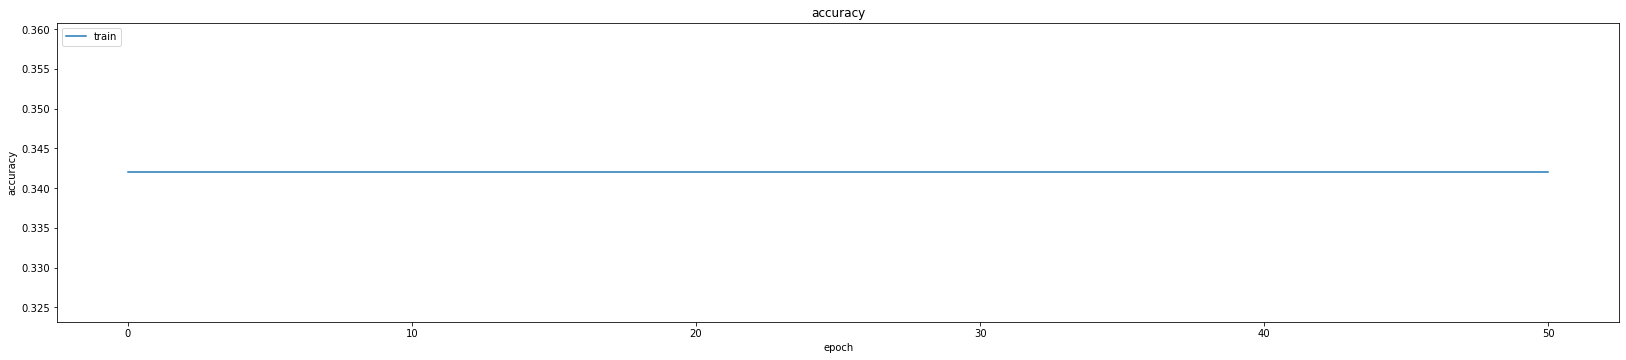

40000 41000


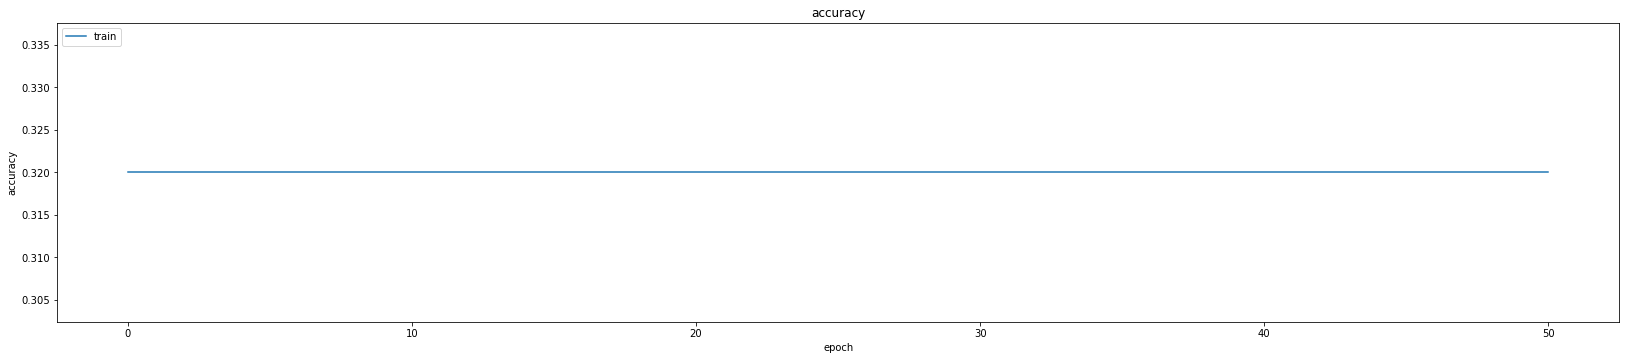

41000 42000


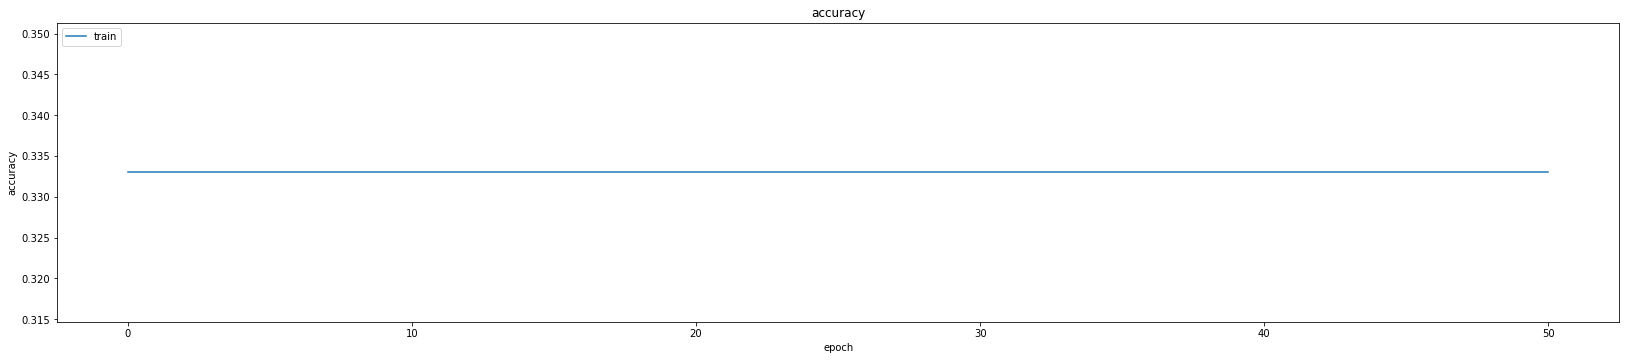

42000 43000


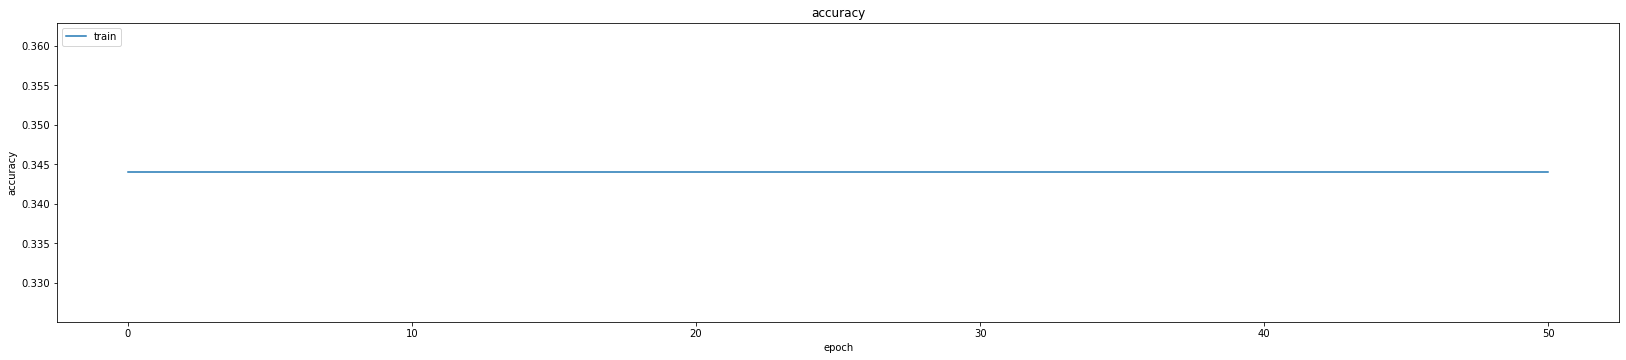

43000 44000


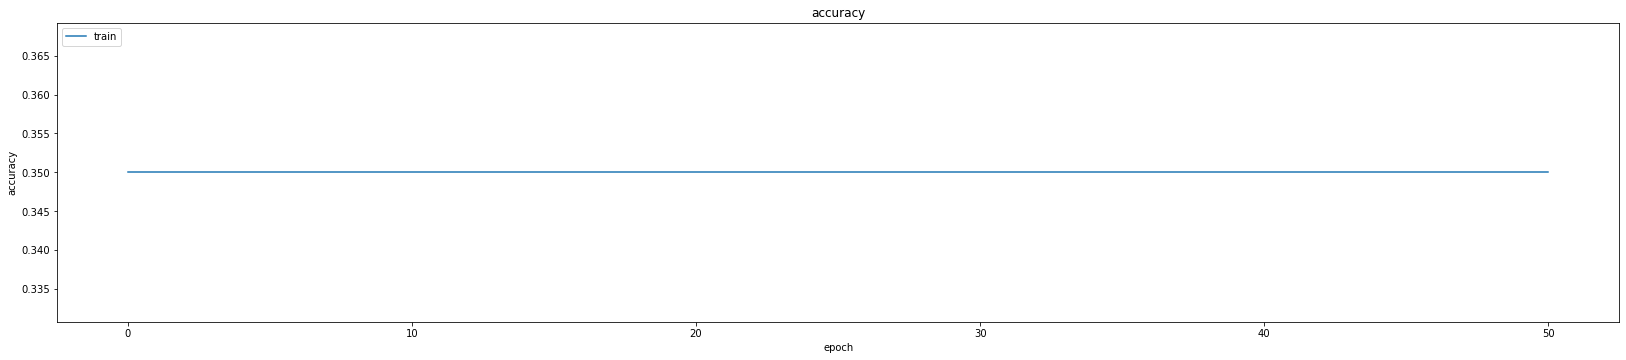

44000 45000


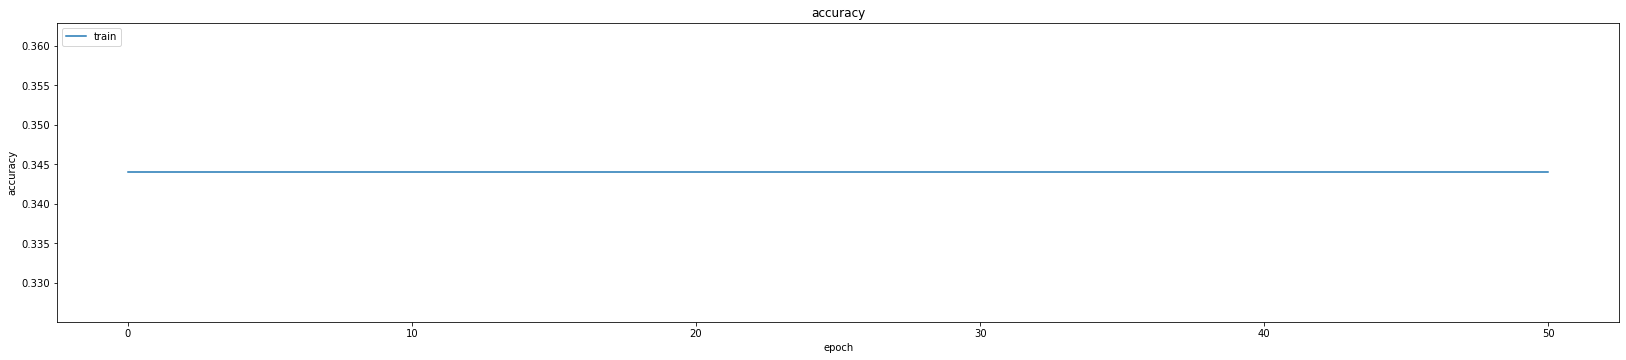

45000 46000


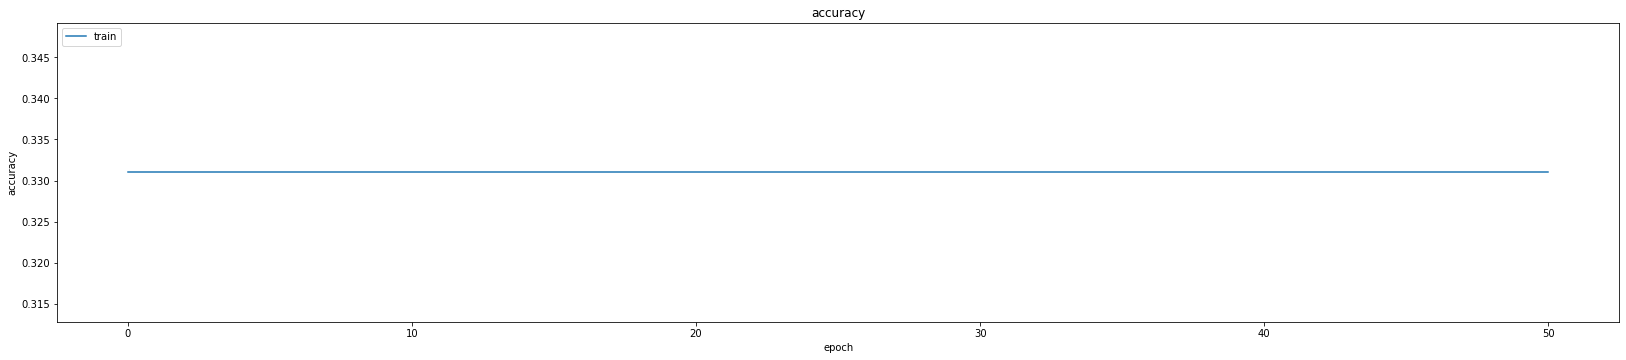

46000 47000


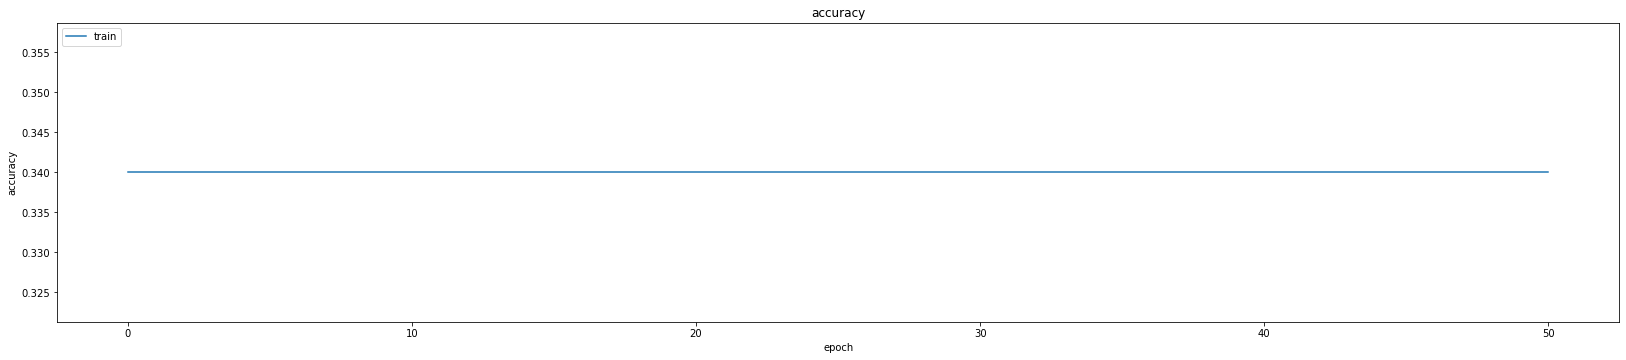

47000 48000


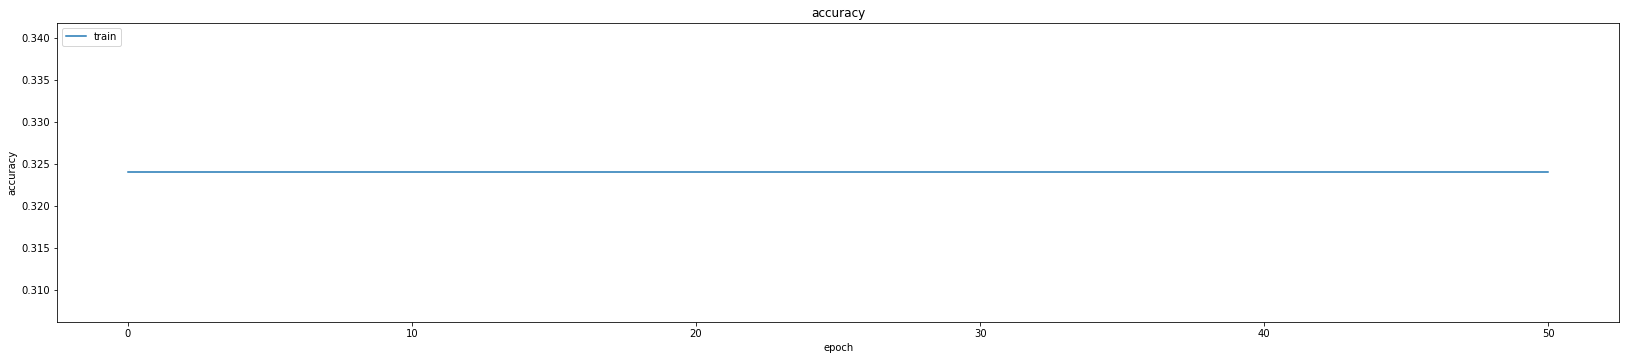

48000 49000


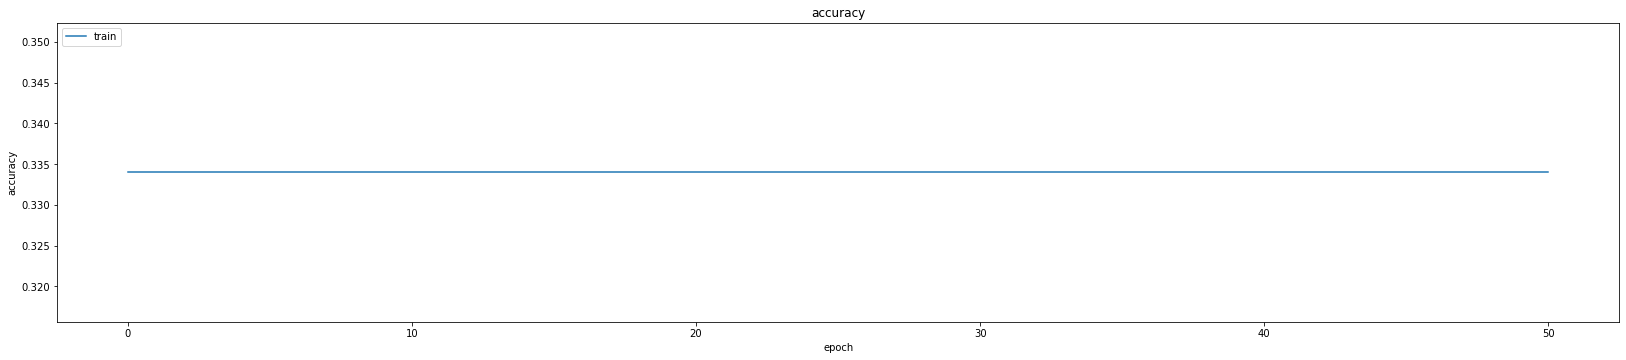

49000 50000


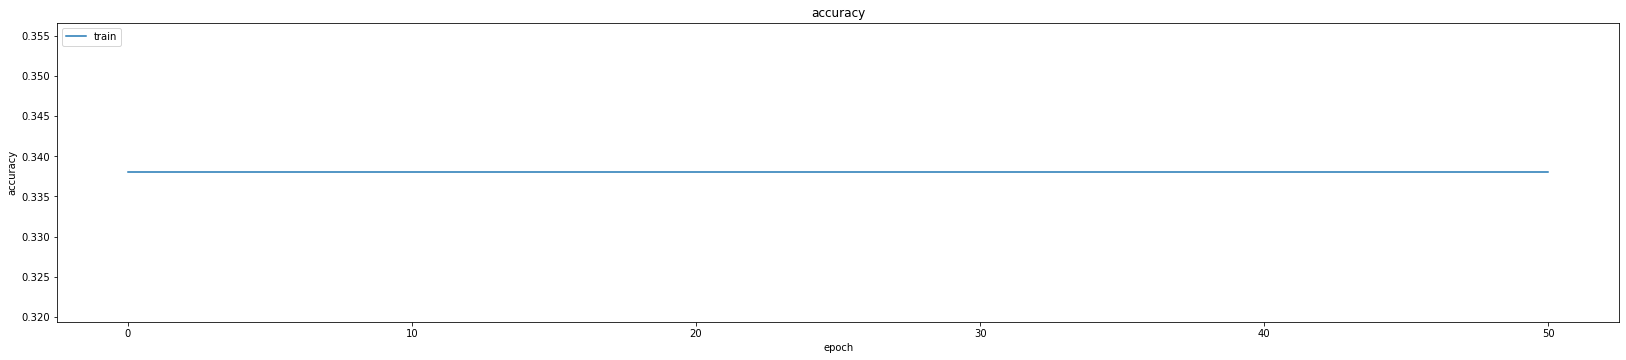

50000 51000


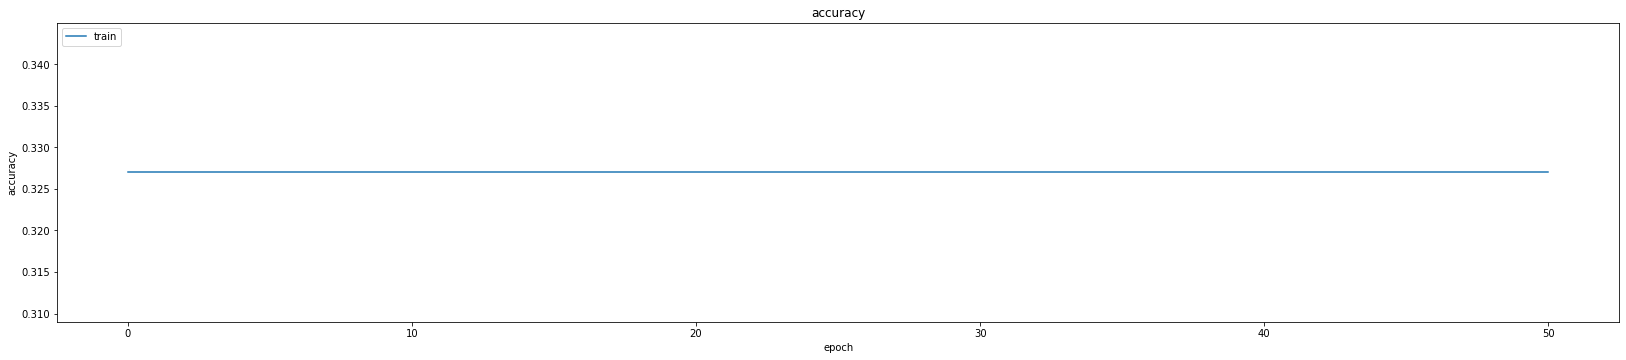

51000 52000


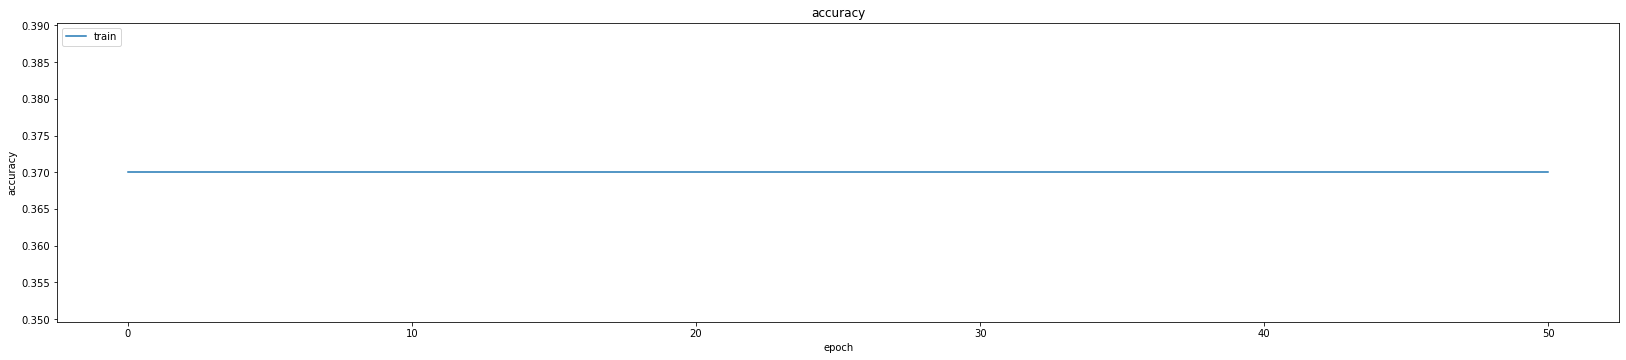

52000 53000


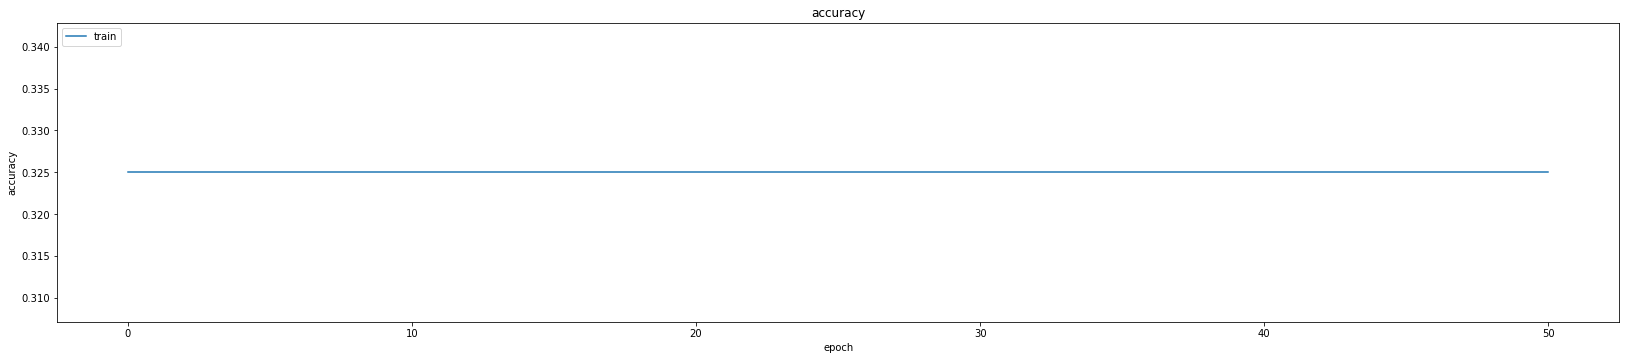

53000 54000


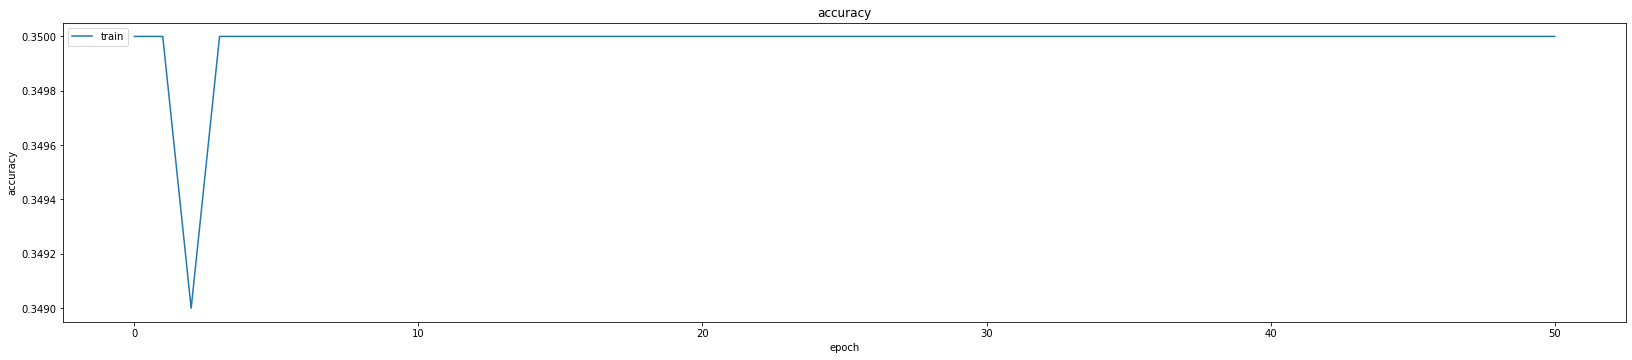

54000 55000


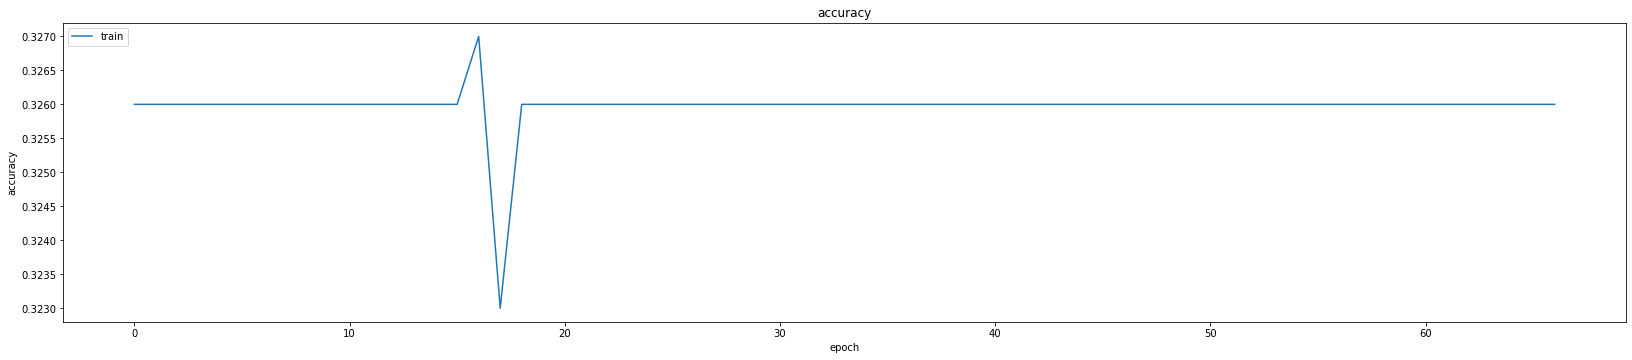

55000 56000


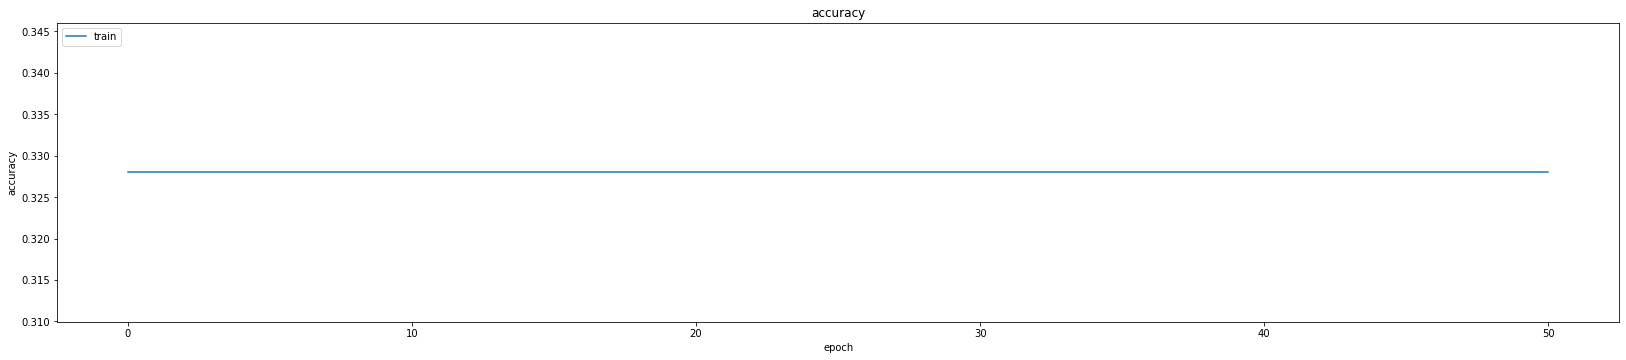

56000 57000


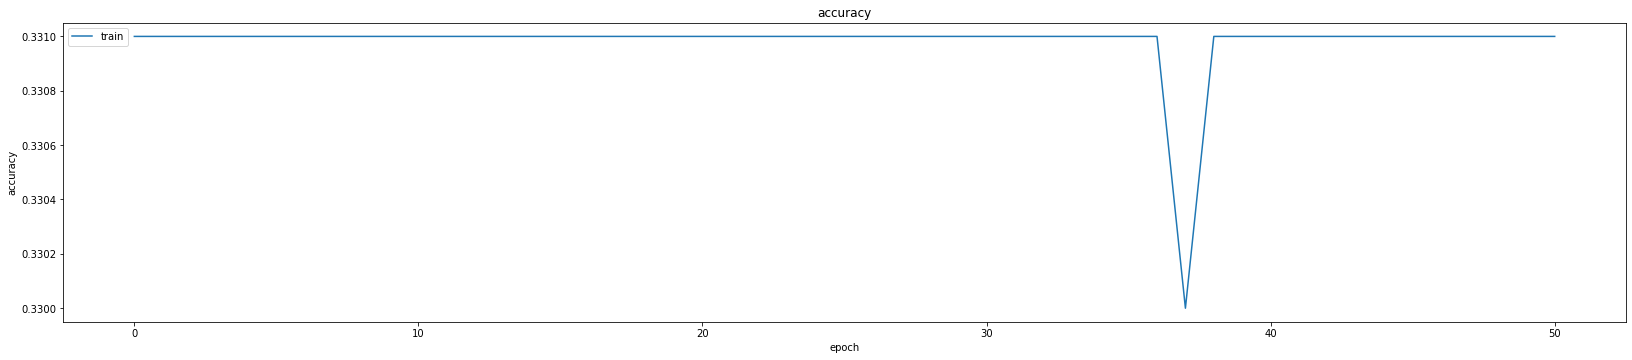

57000 58000


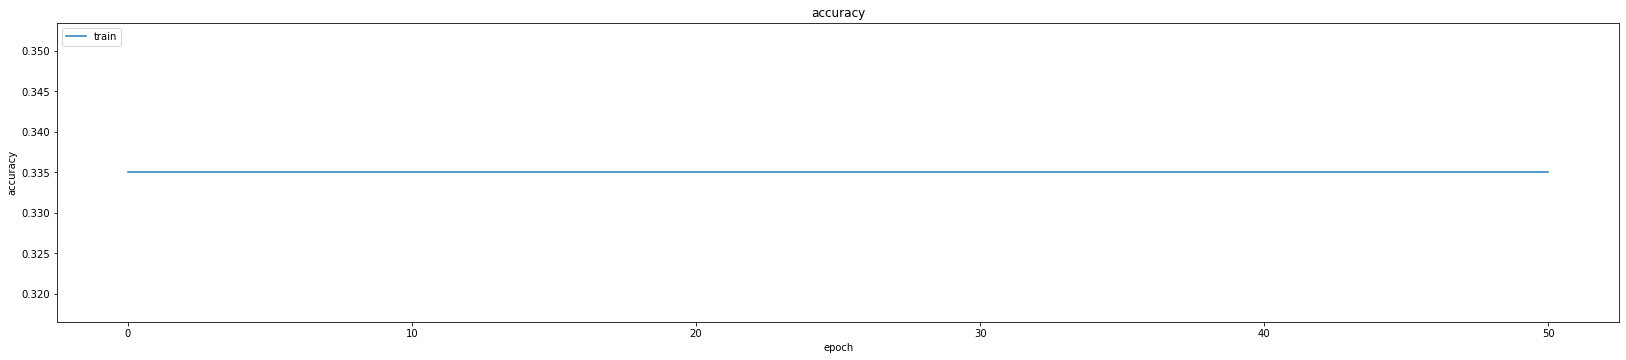

58000 59000


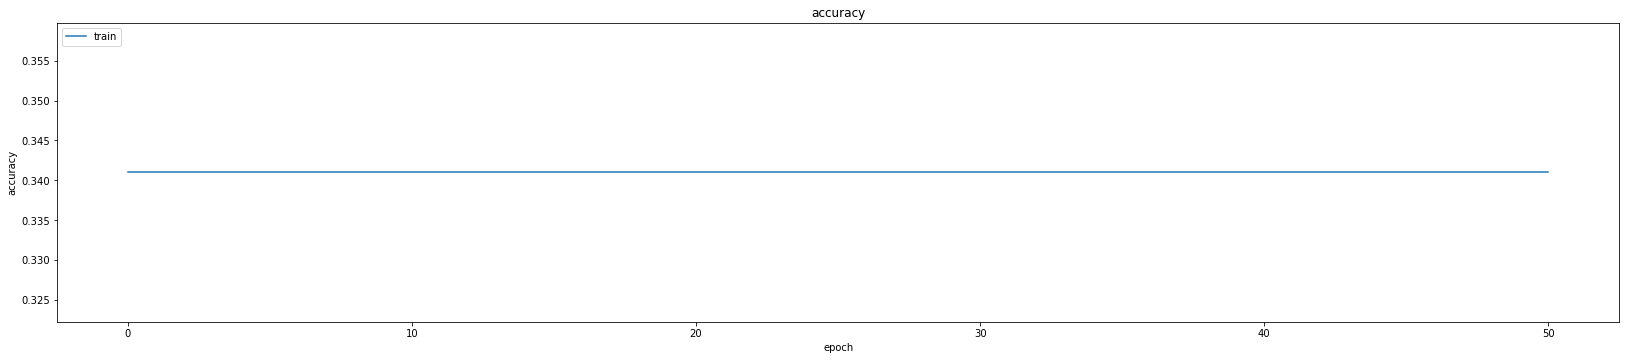

59000 60000


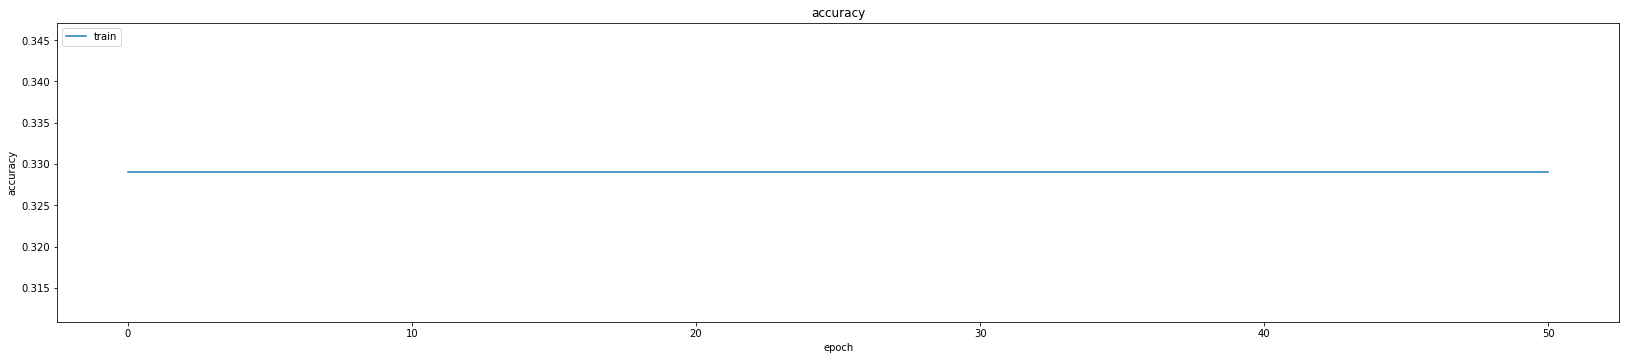

60000 61000


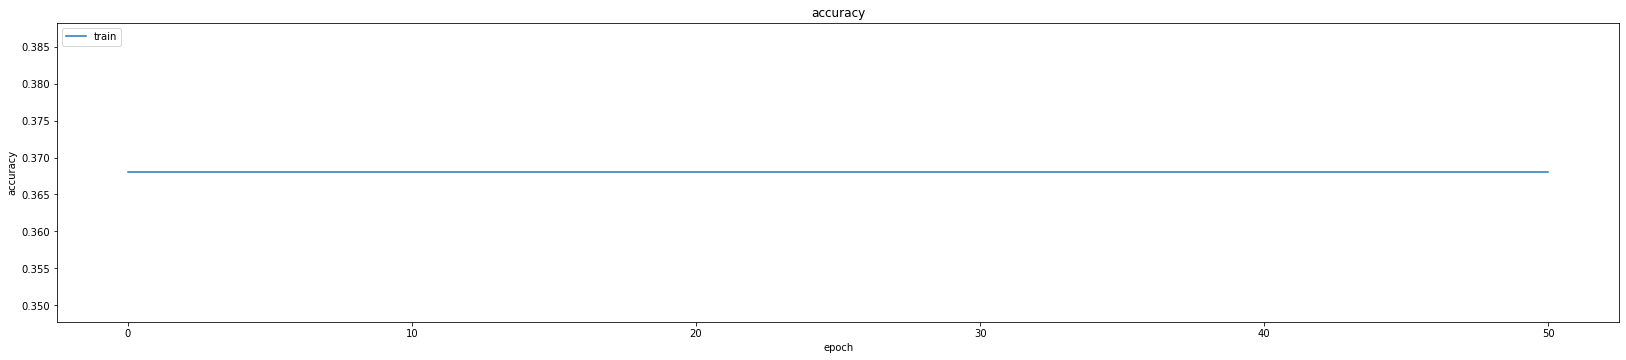

61000 62000


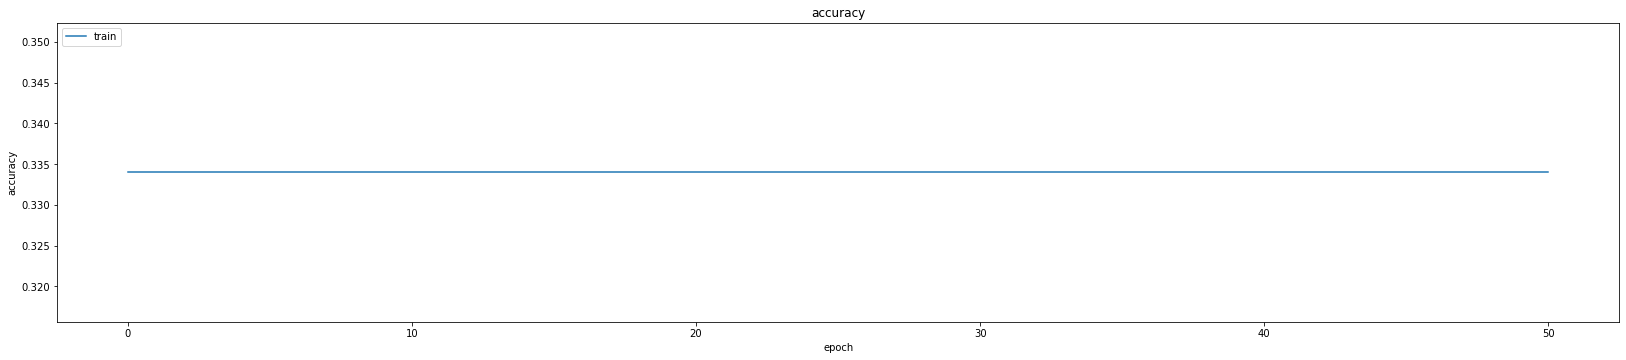

62000 63000


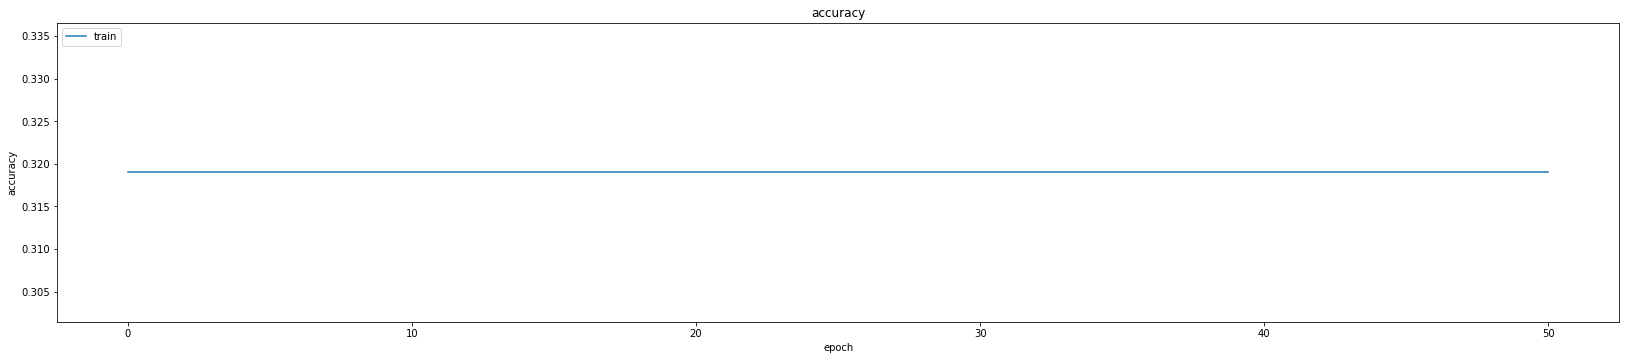

63000 64000


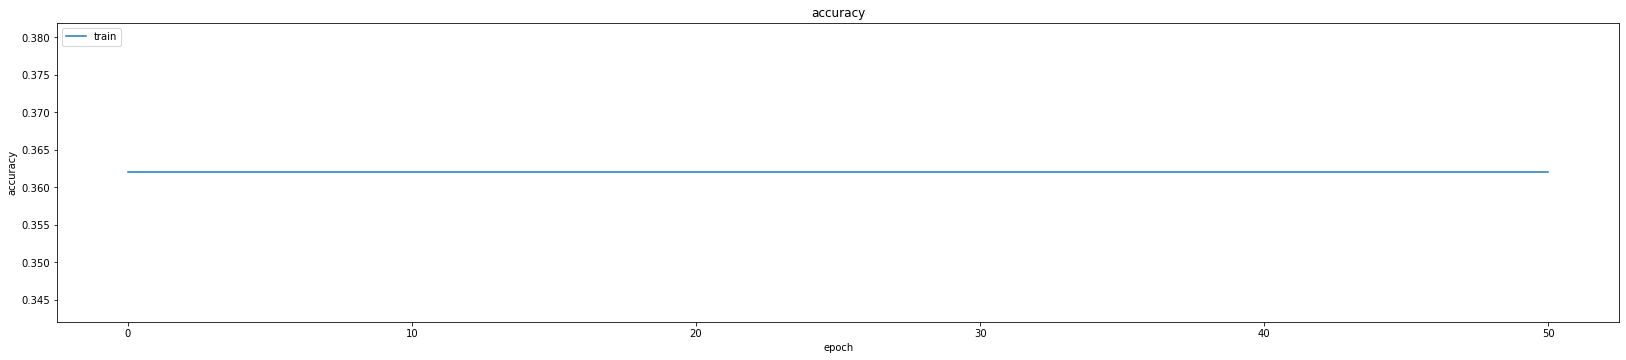

64000 65000


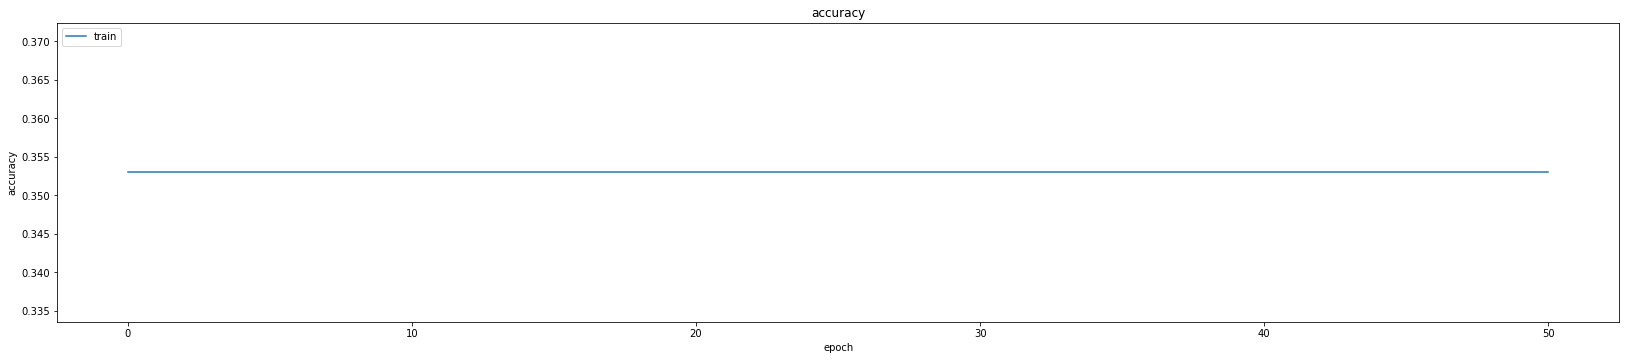

65000 66000


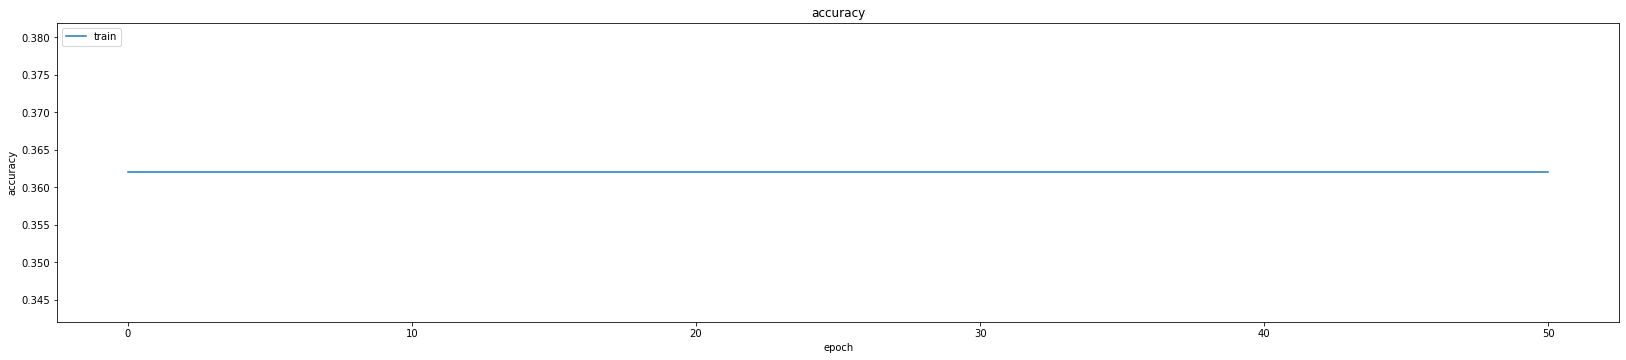

66000 67000


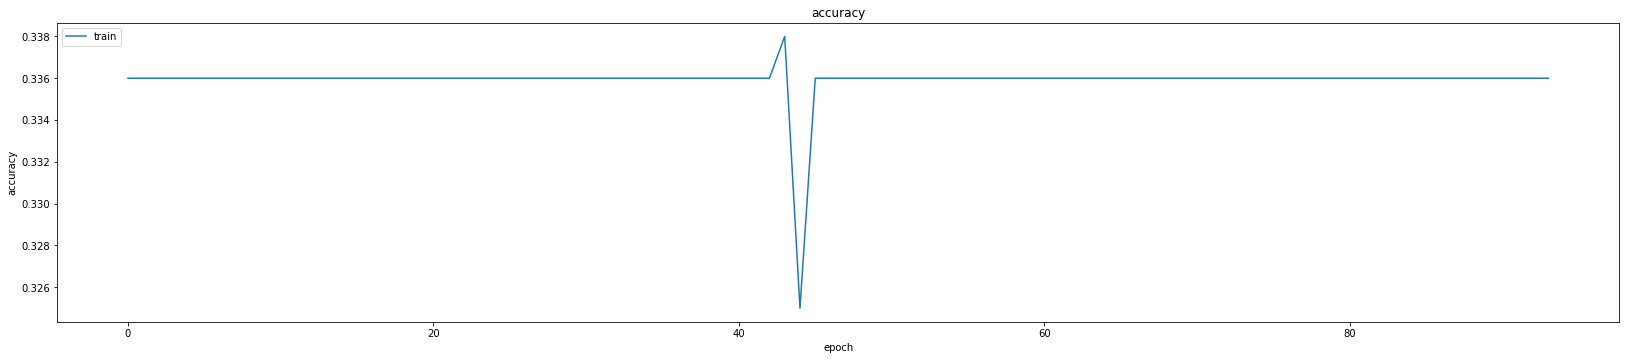

67000 68000


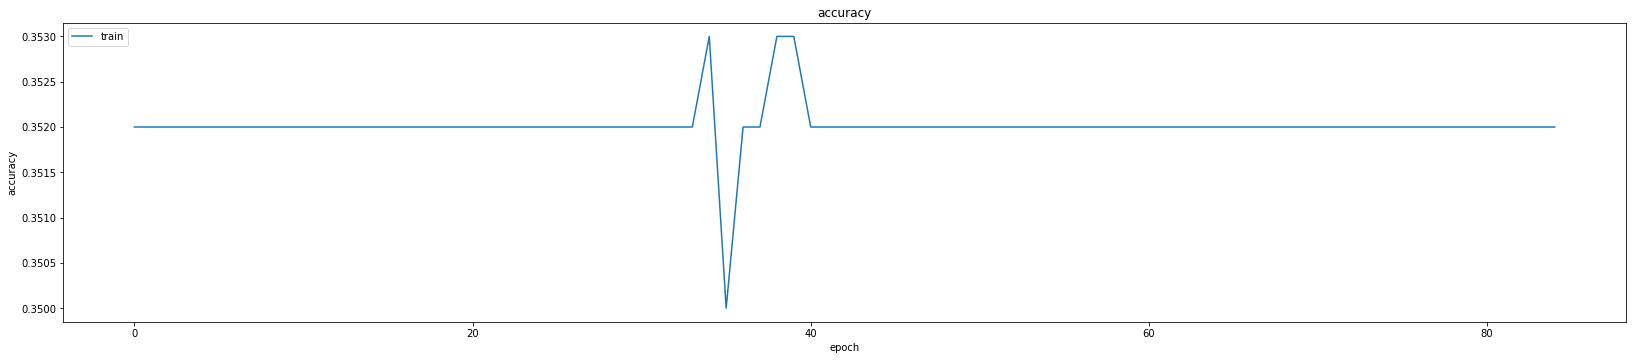

68000 69000


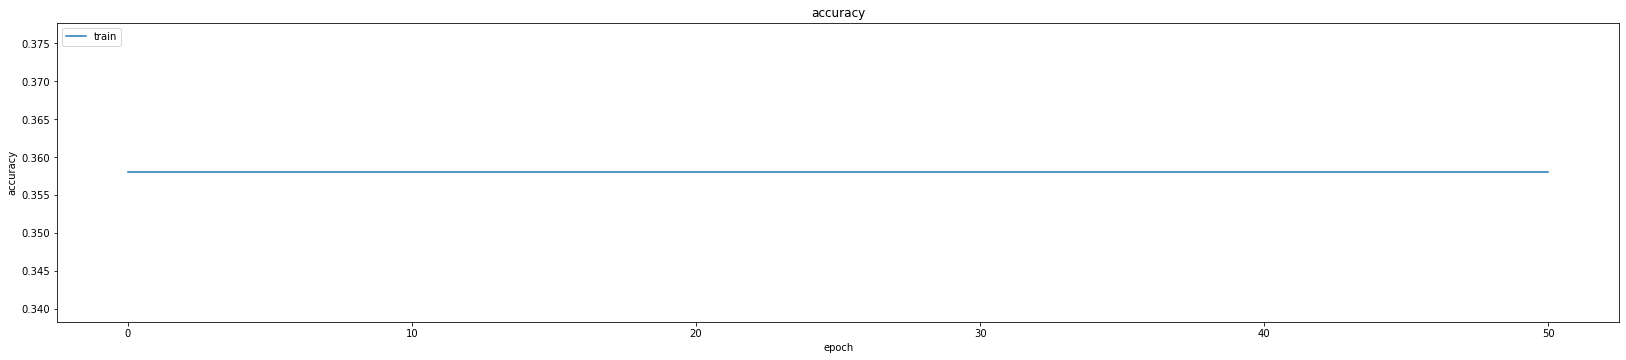

69000 70000


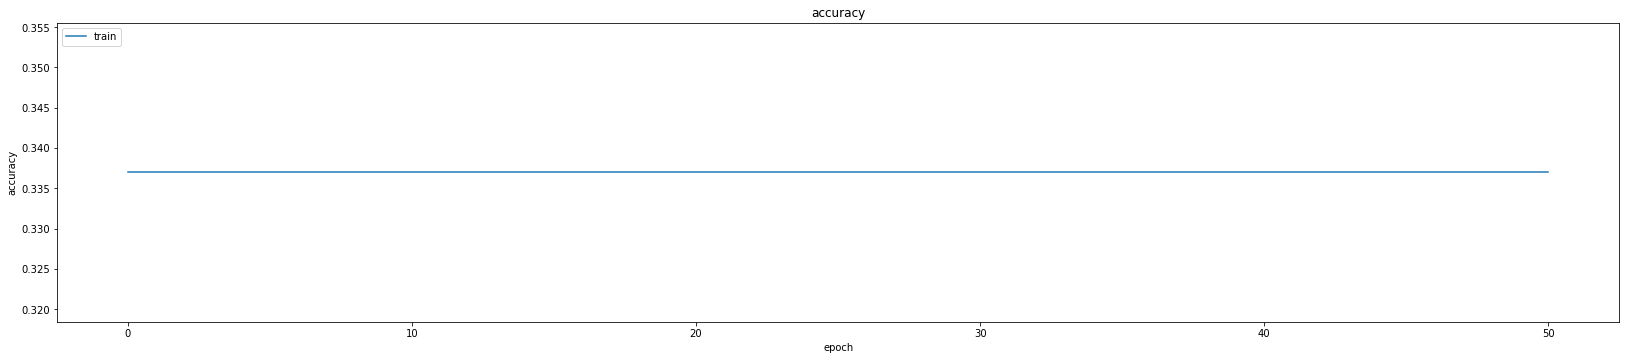

70000 71000


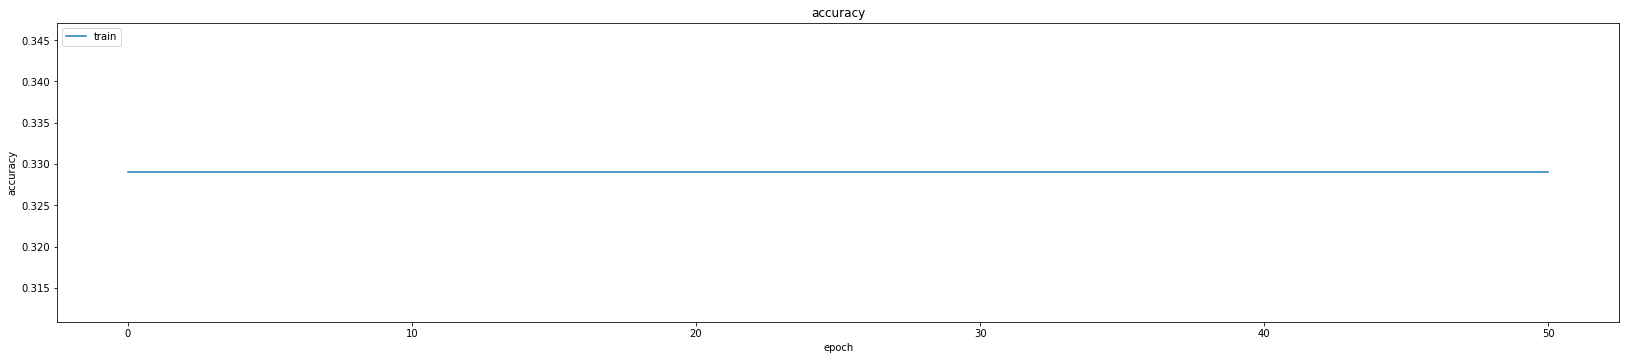

71000 72000


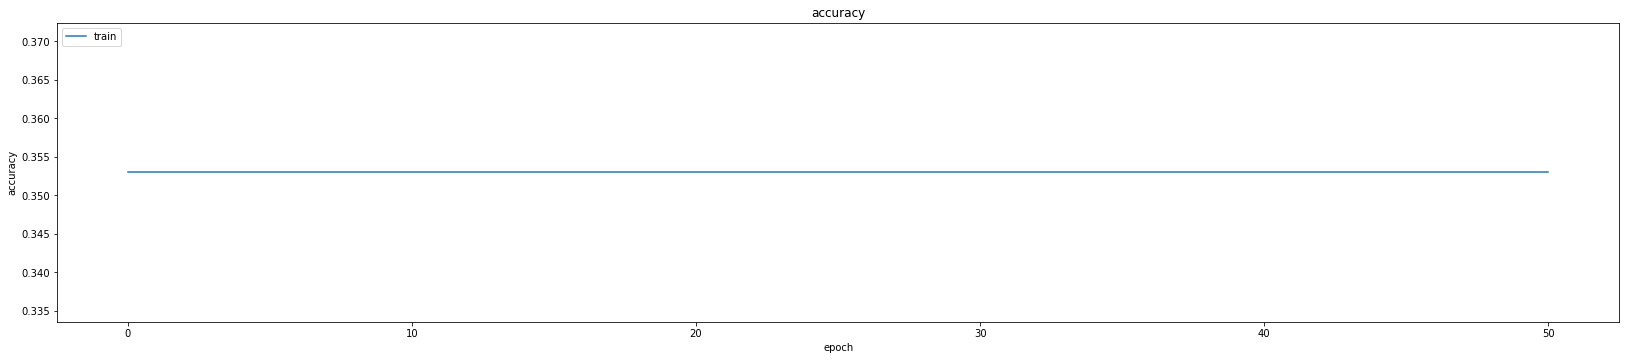

72000 73000


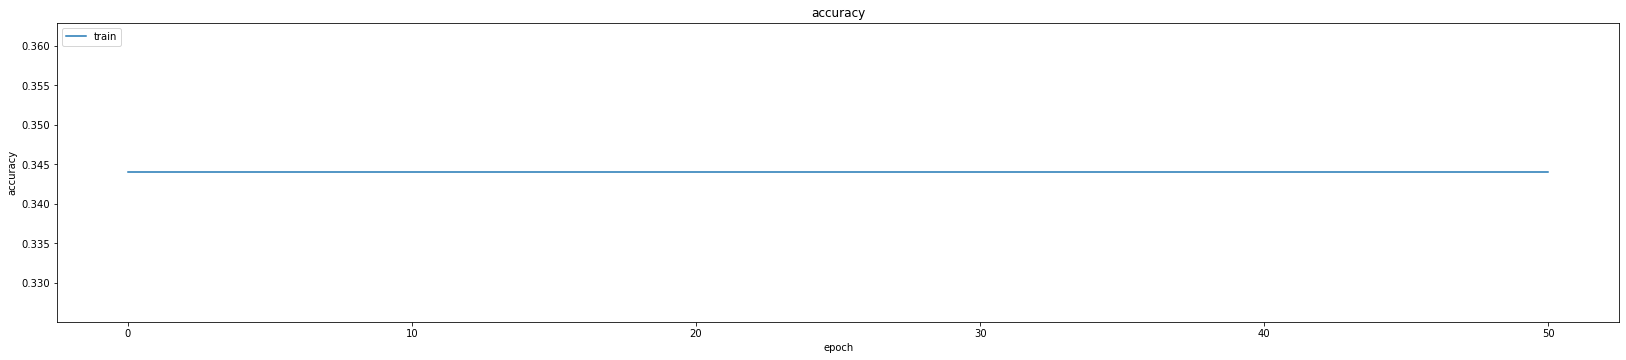

73000 74000


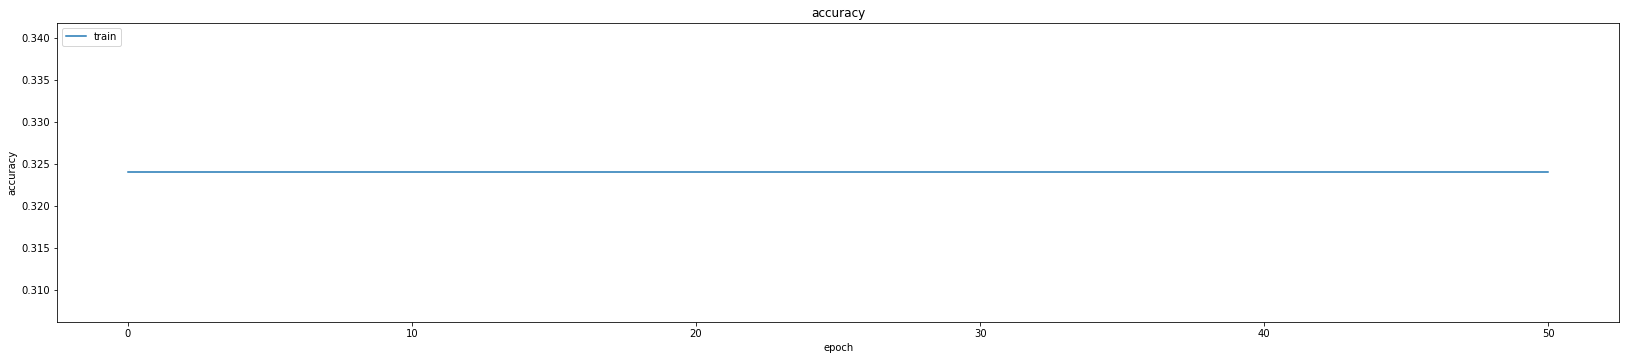

74000 75000


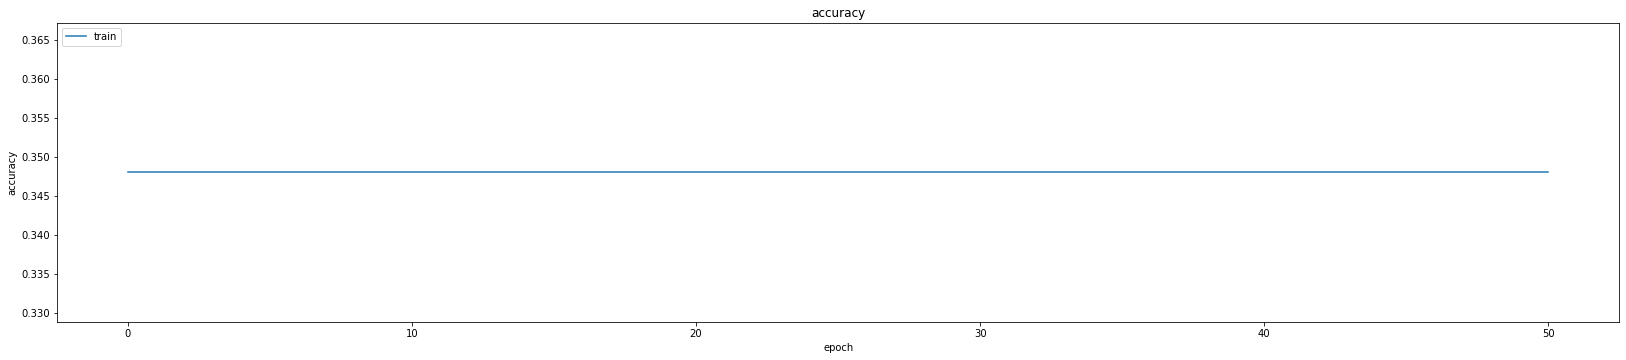

75000 76000


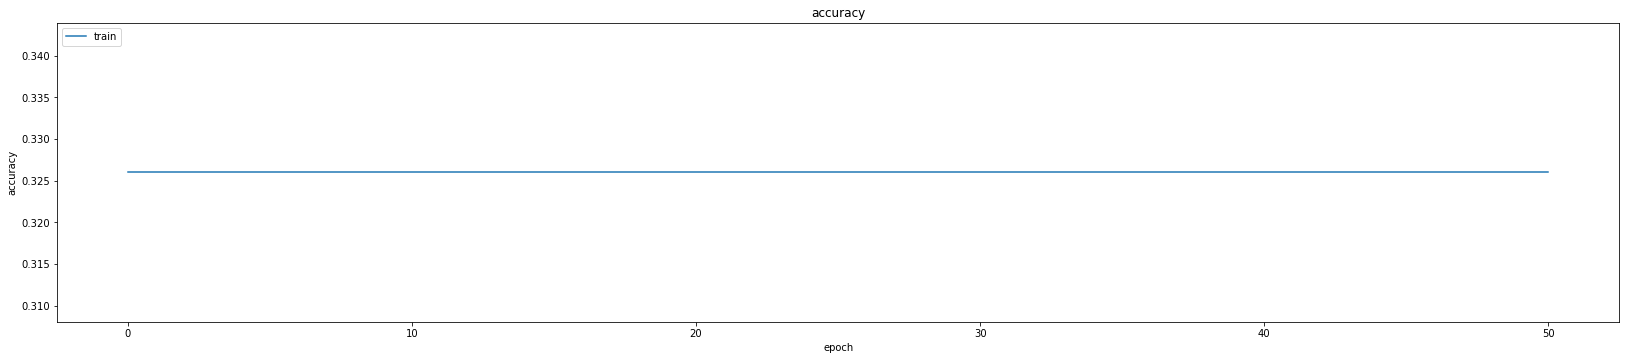

76000 77000


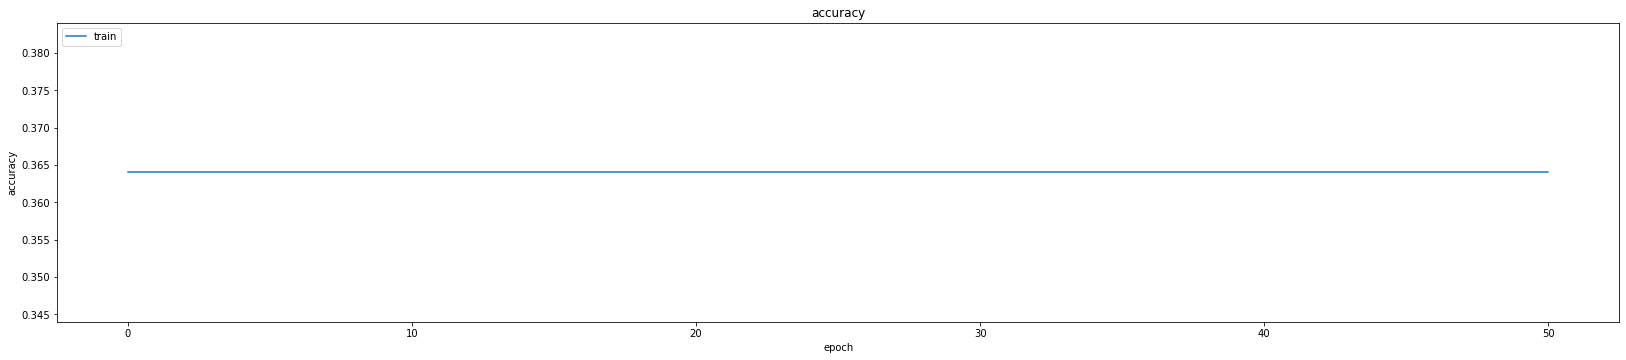

77000 78000


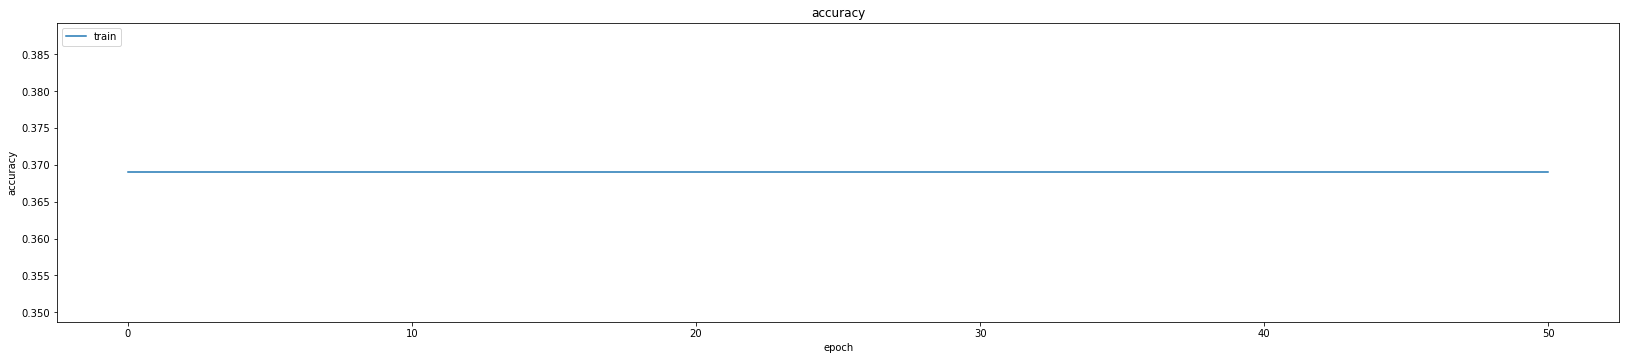

78000 79000


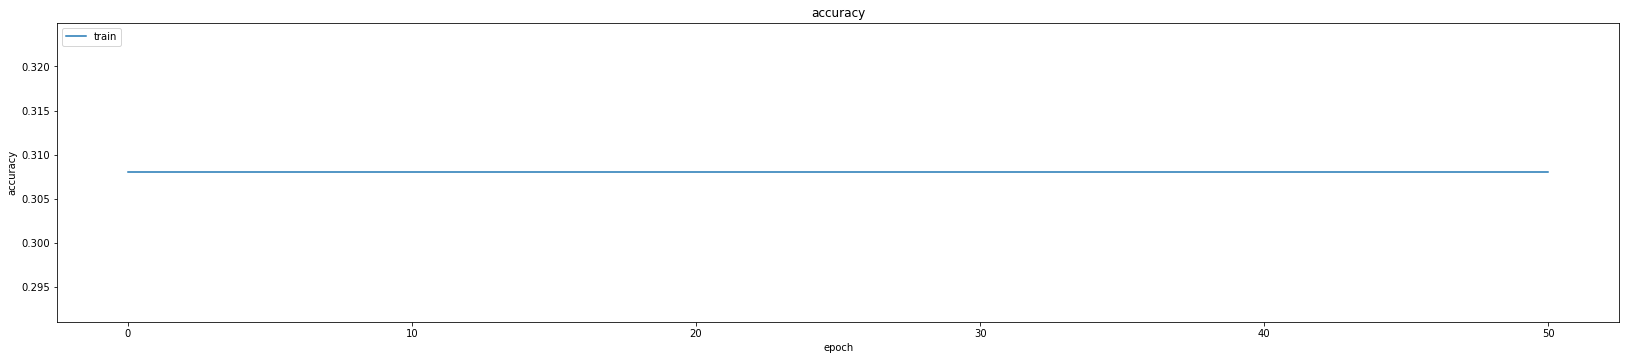

79000 80000


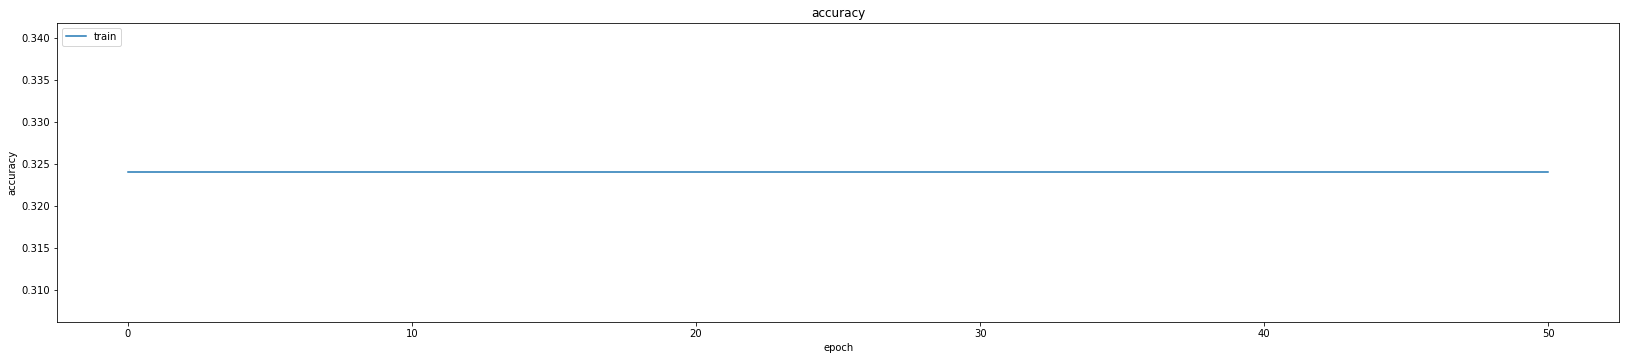

80000 81000


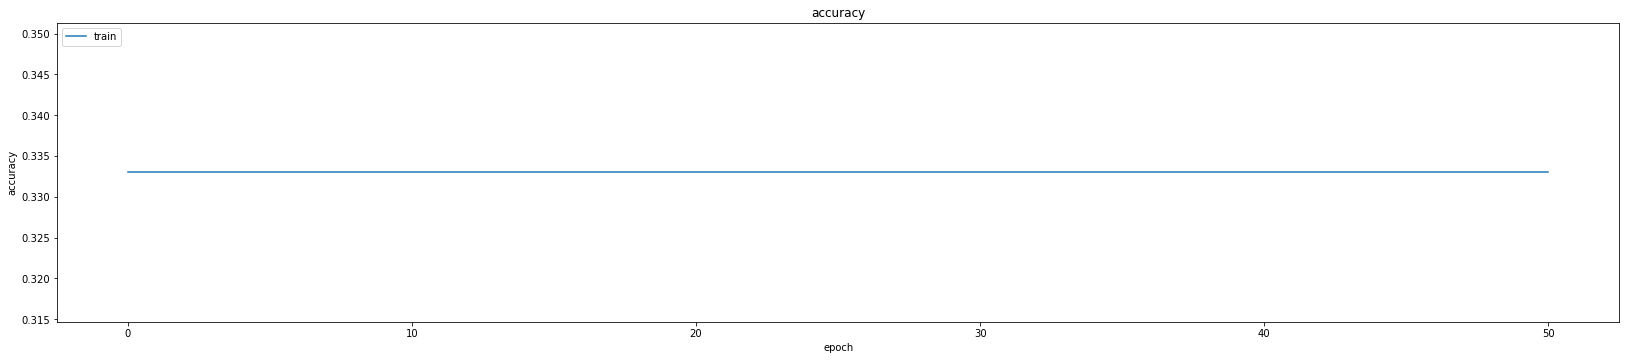

81000 82000


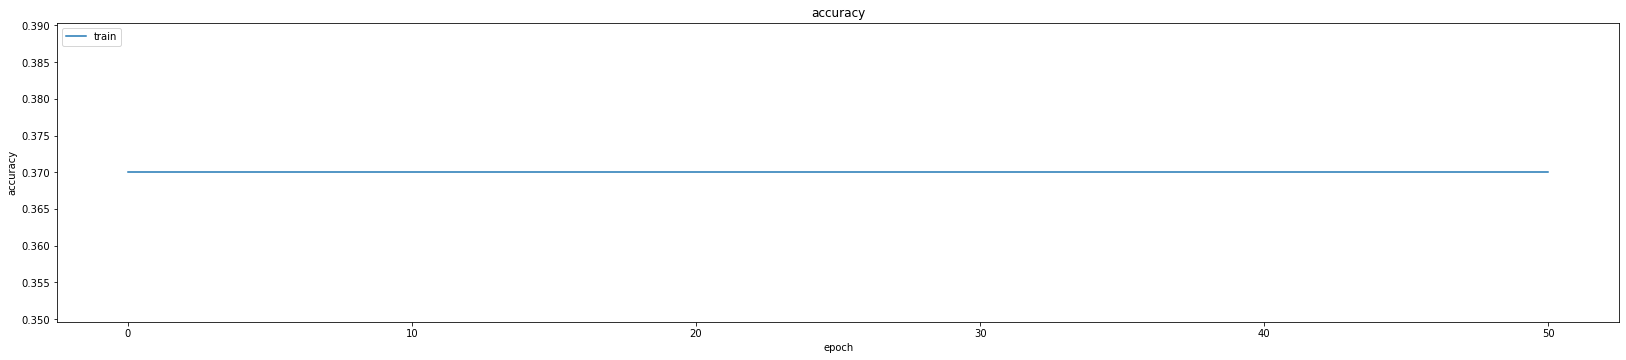

82000 83000


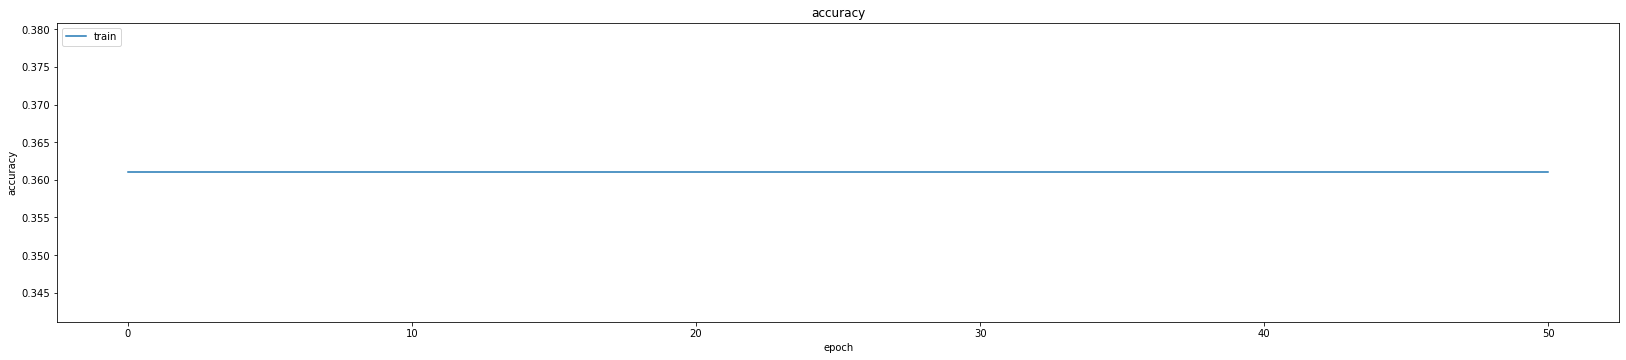

83000 84000


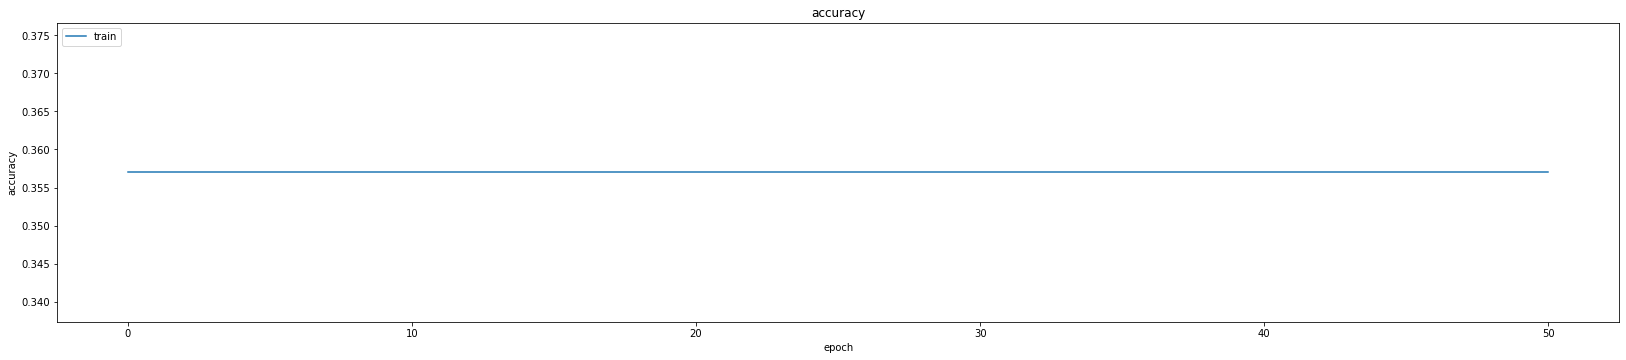

84000 85000


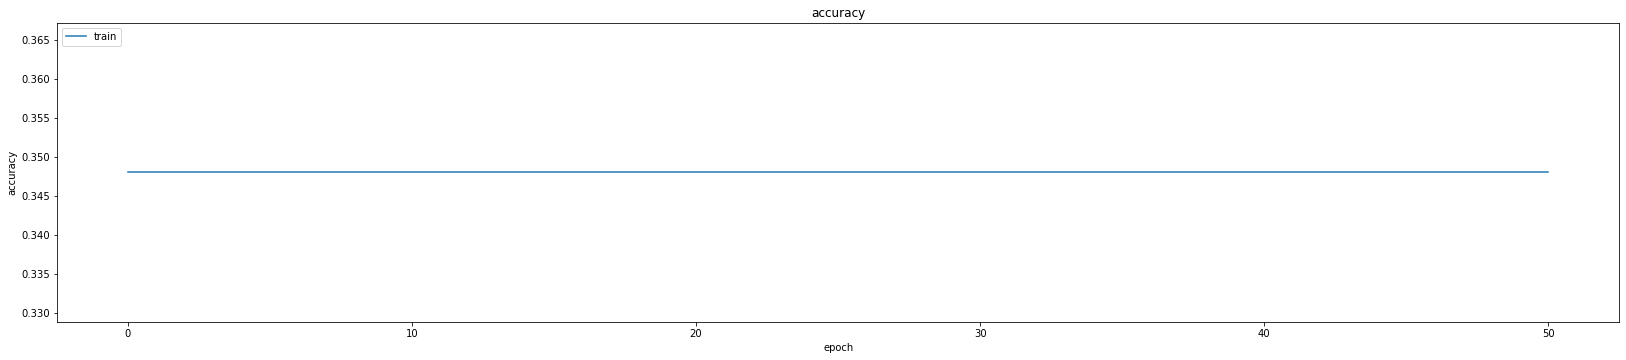

85000 86000


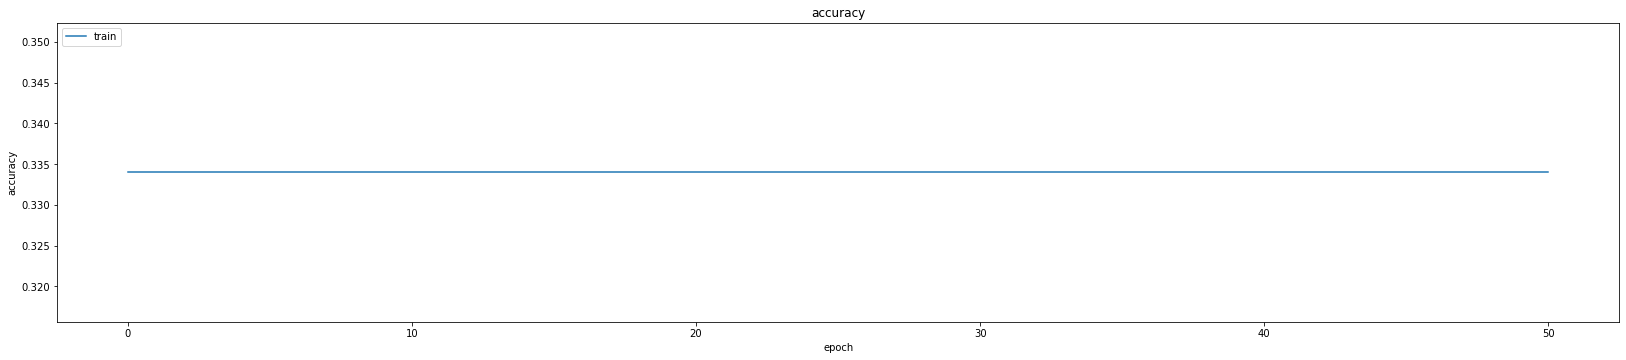

86000 87000


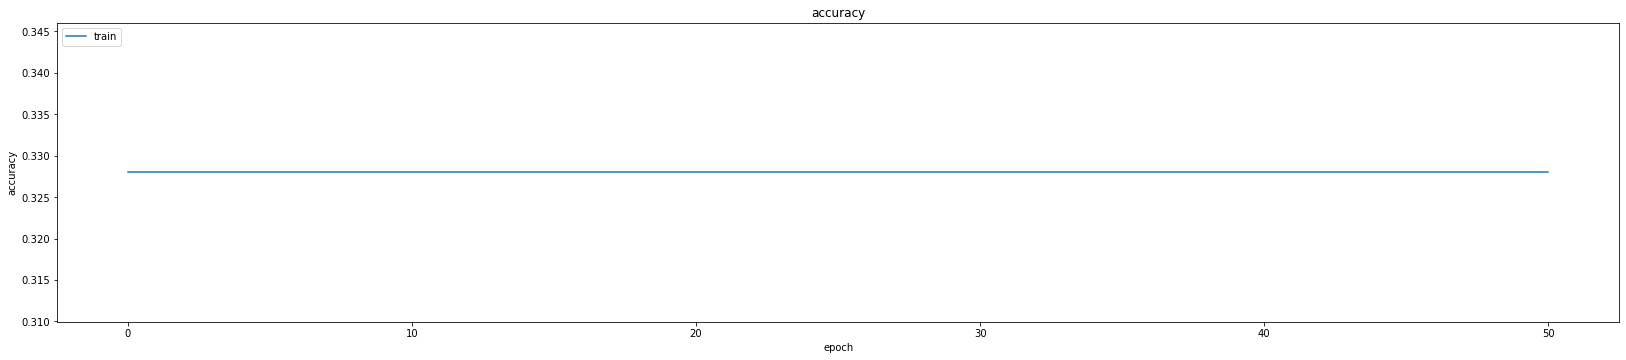

87000 88000


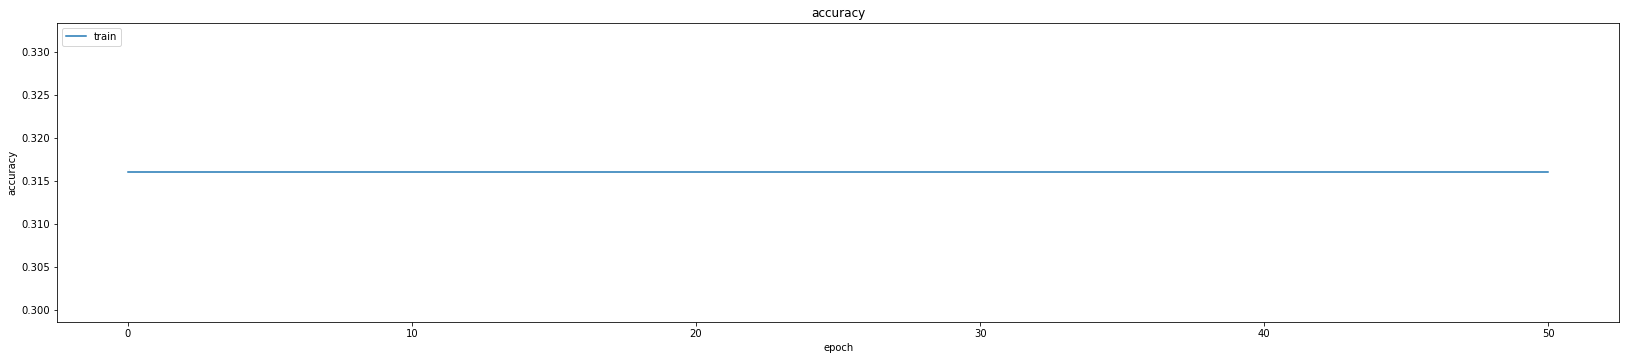

88000 89000


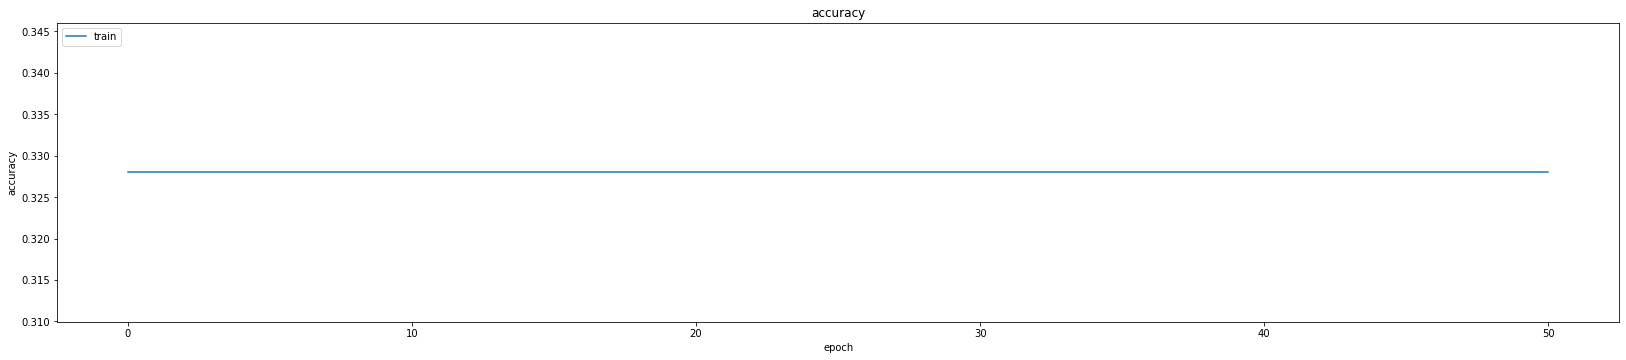

89000 90000


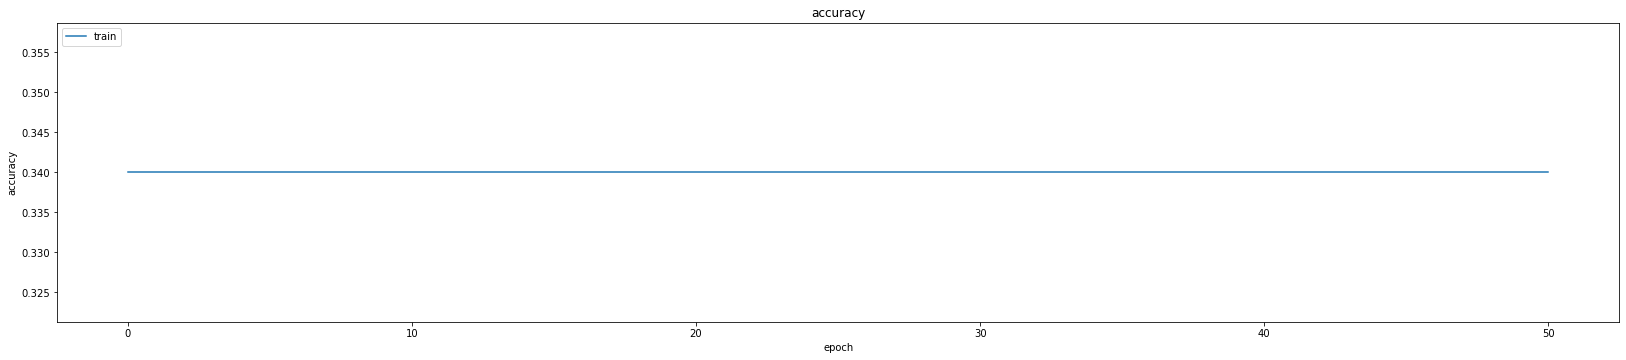

90000 91000


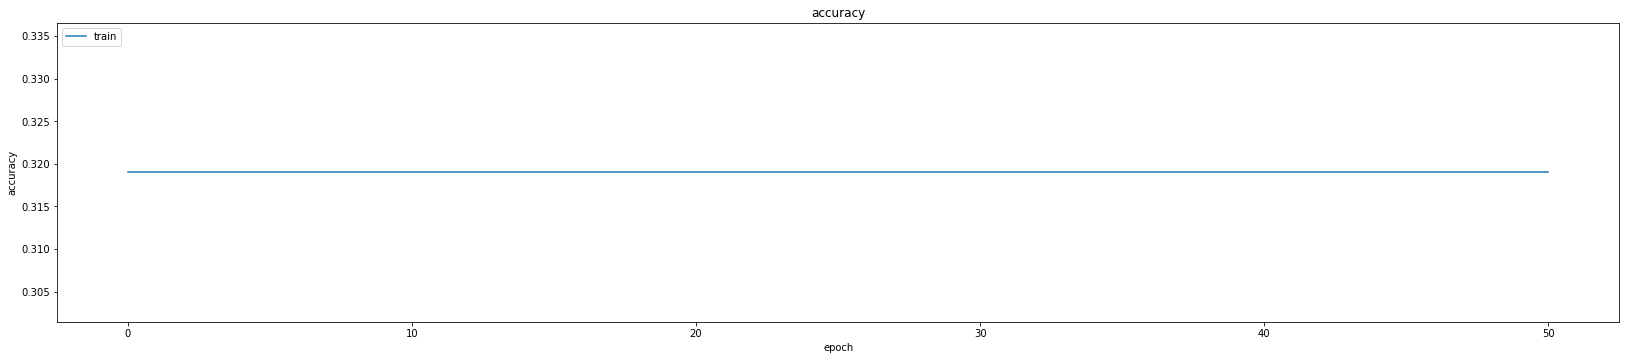

91000 92000


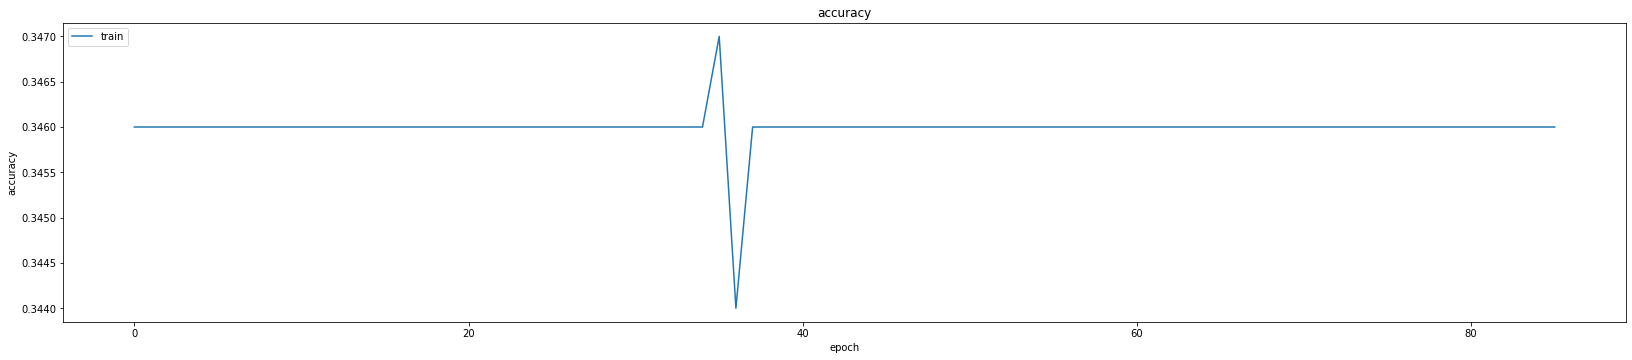

92000 93000


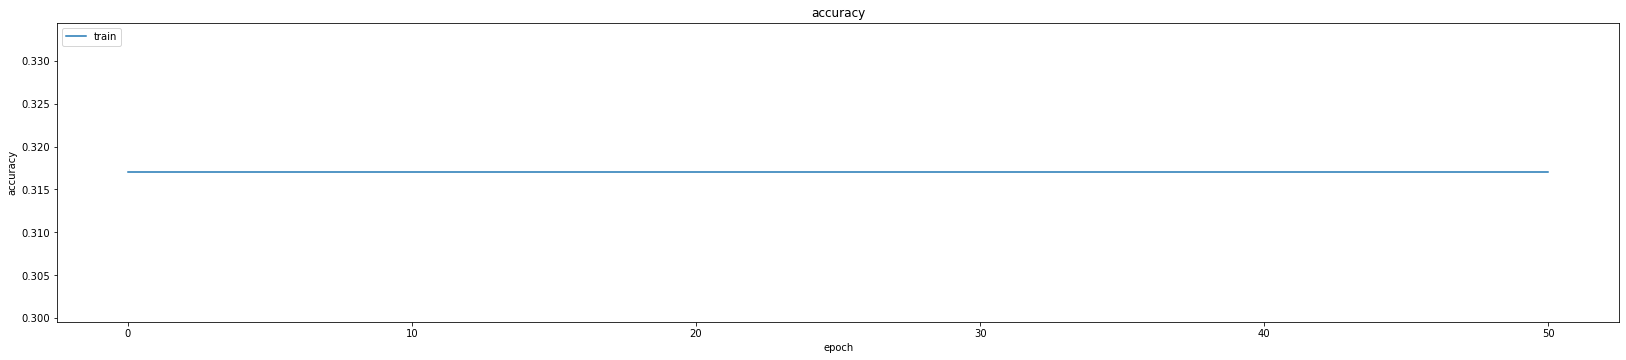

93000 94000


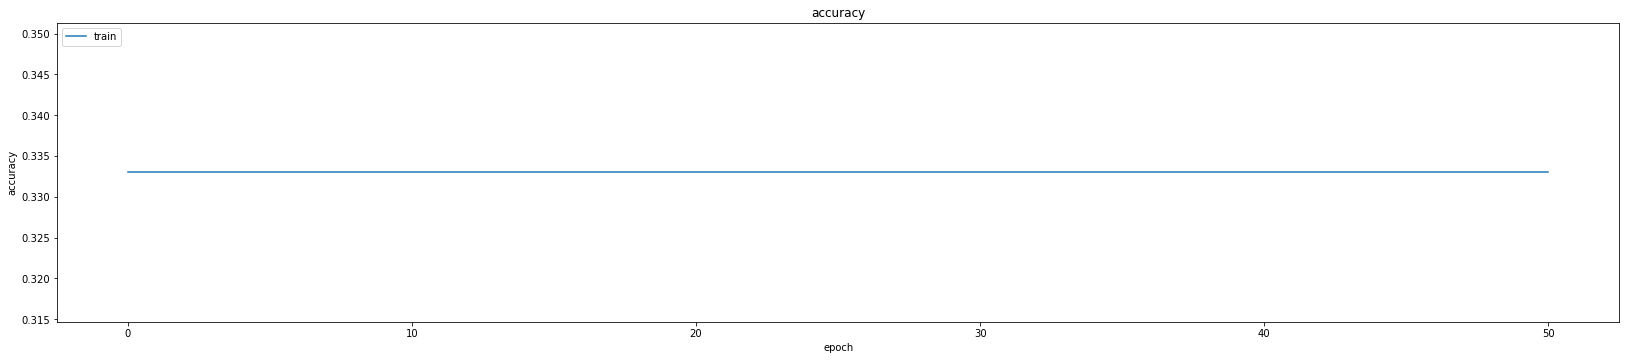

94000 95000


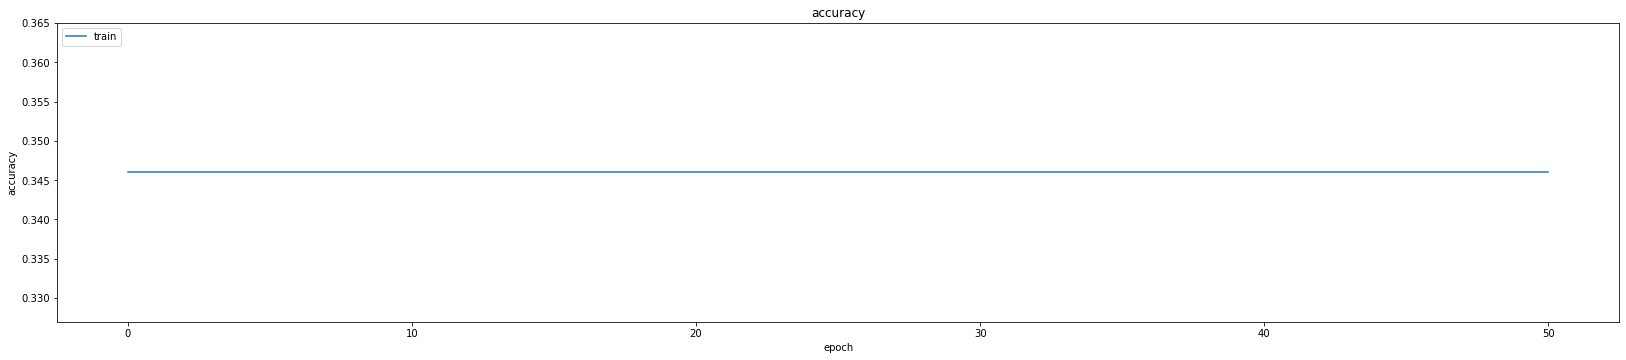

95000 96000


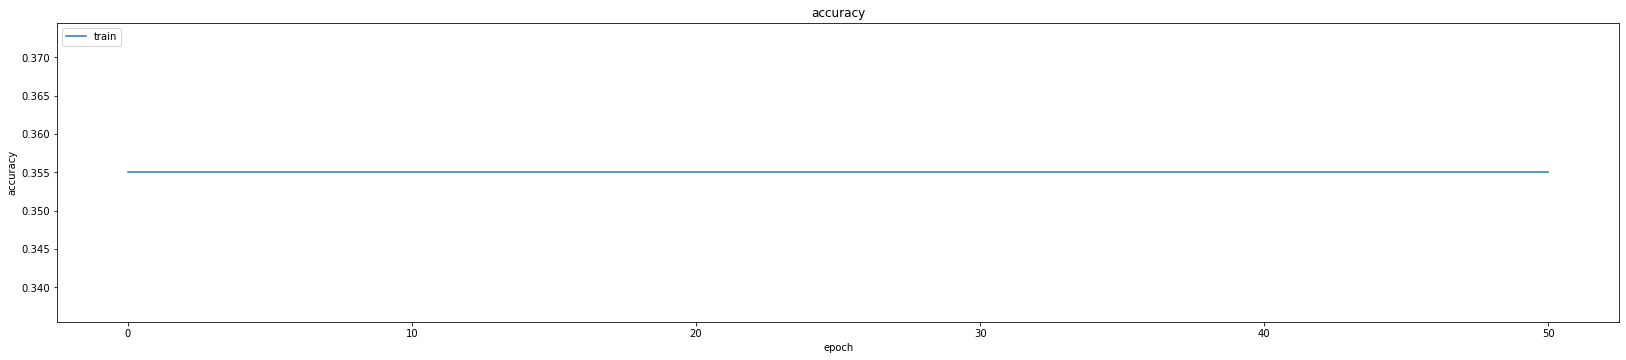

96000 97000


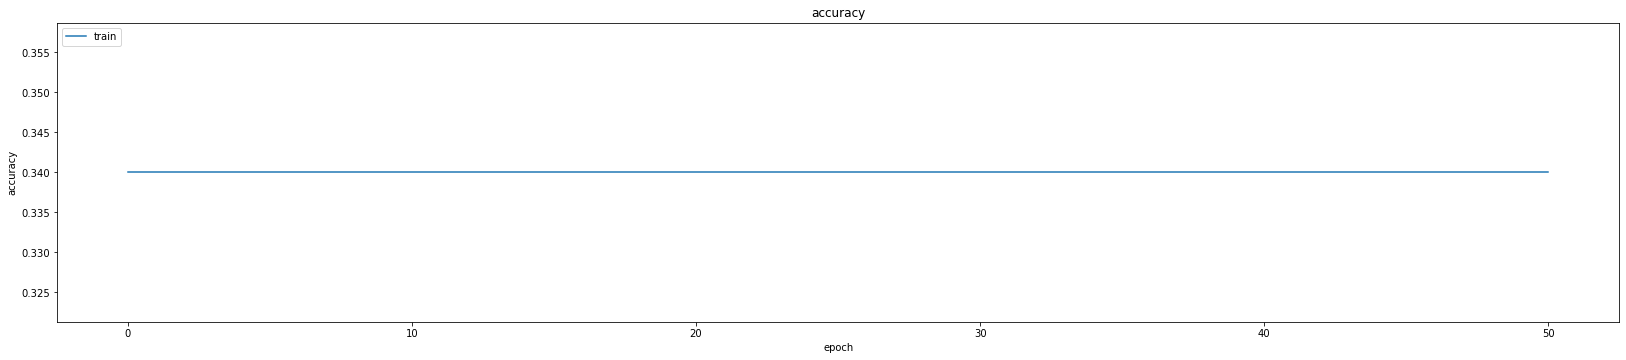

97000 98000


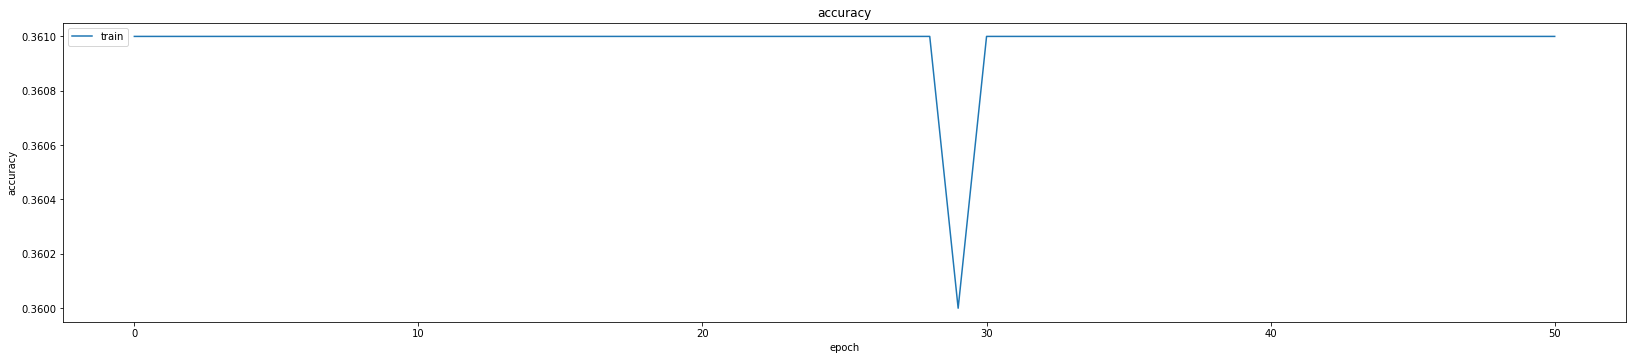

98000 99000


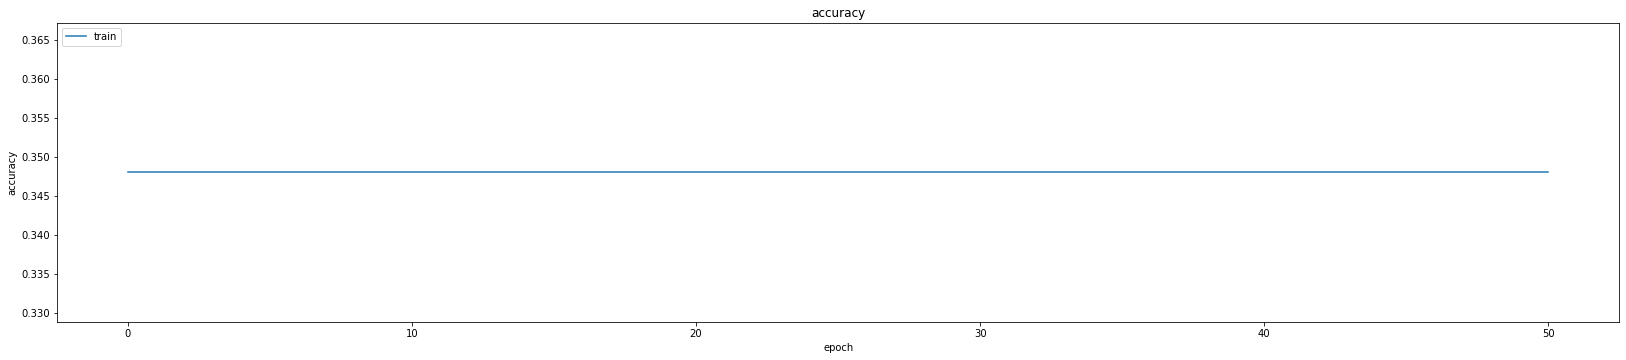

99000 100000


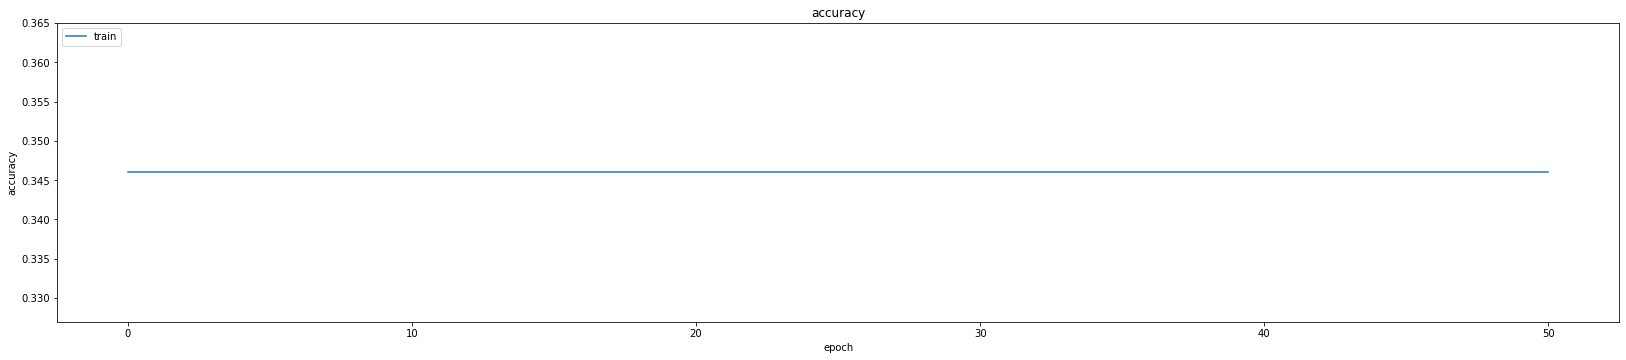

100000 101000


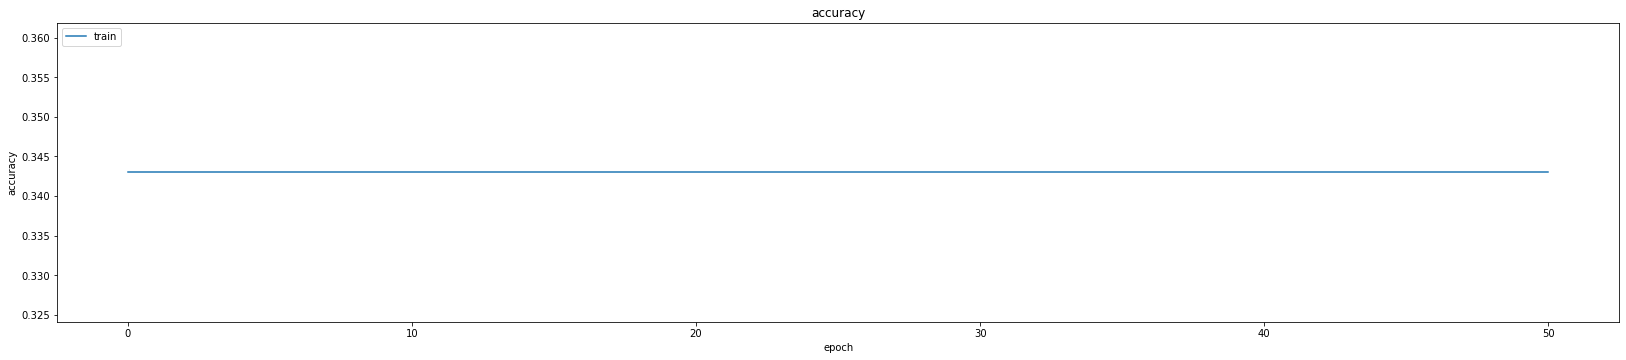

101000 102000


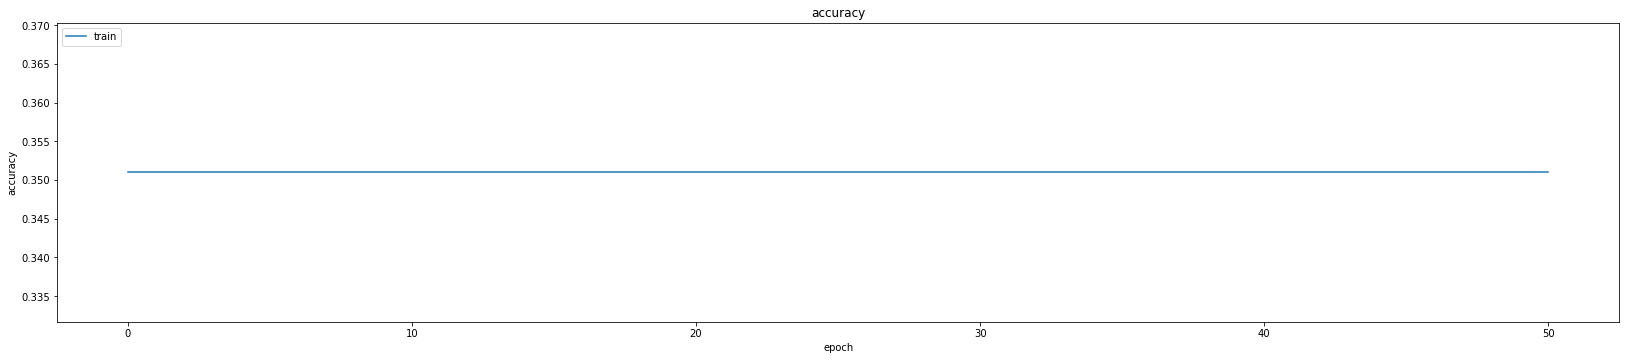

102000 103000


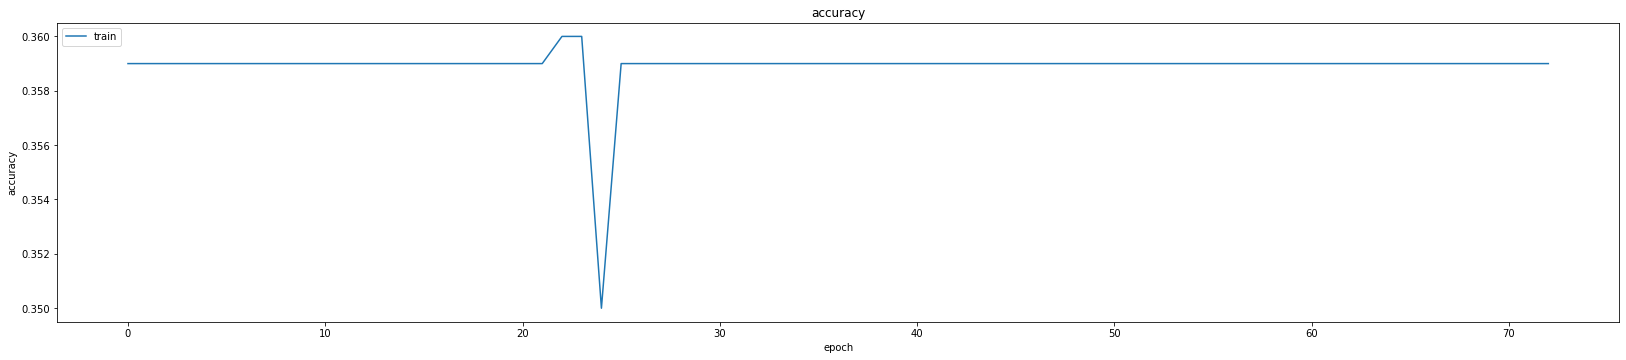

103000 104000


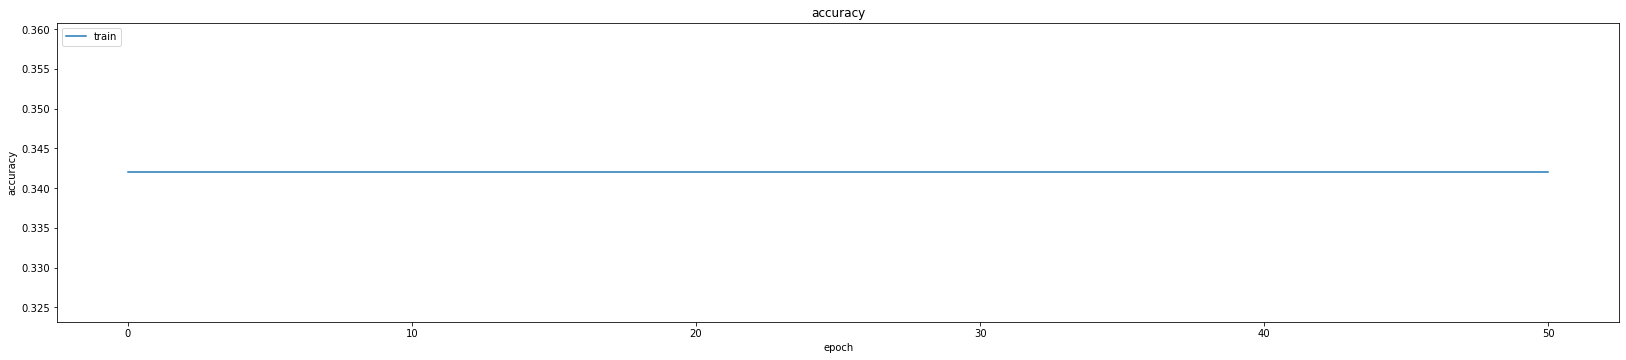

104000 105000


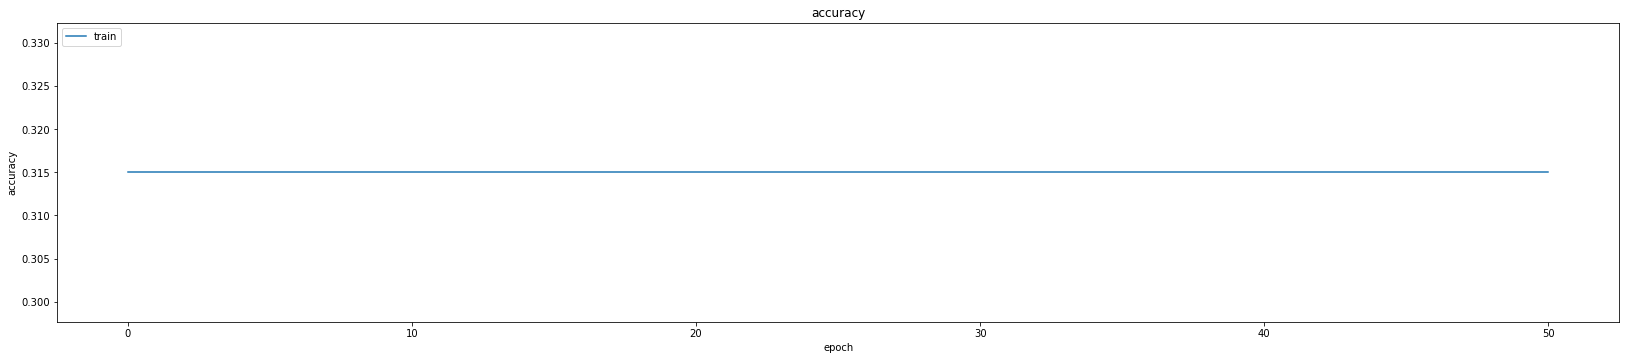

105000 106000


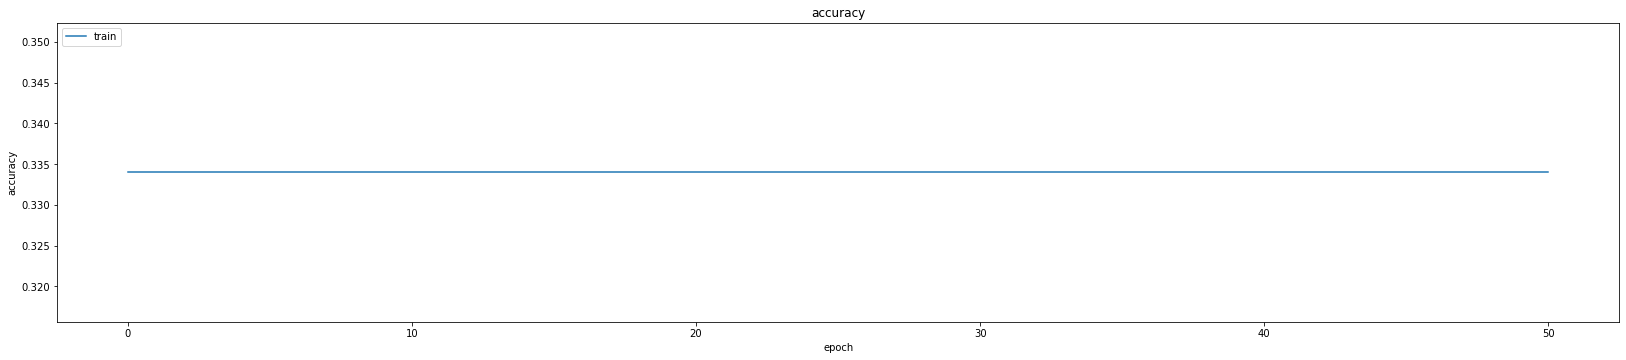

106000 107000


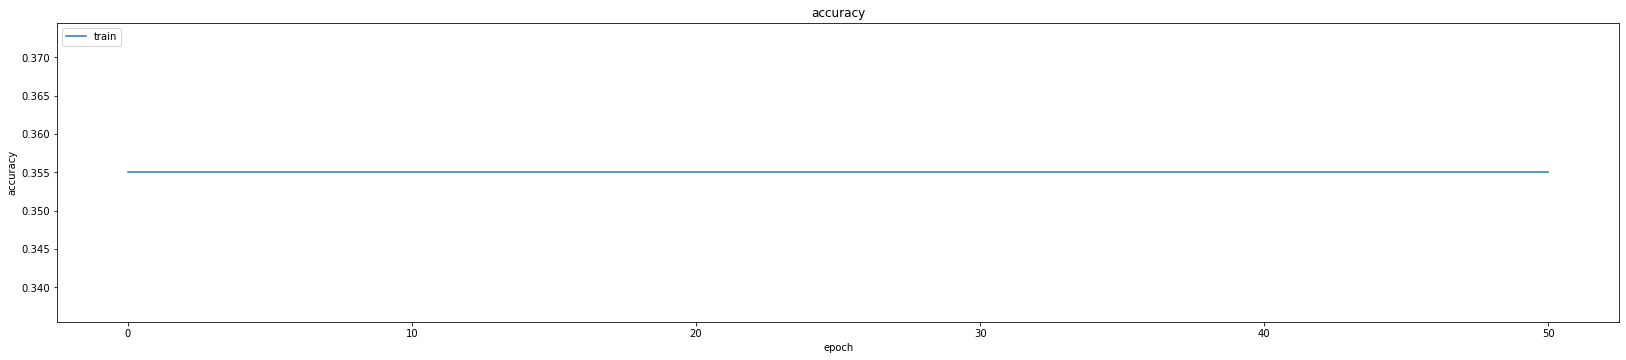

107000 108000


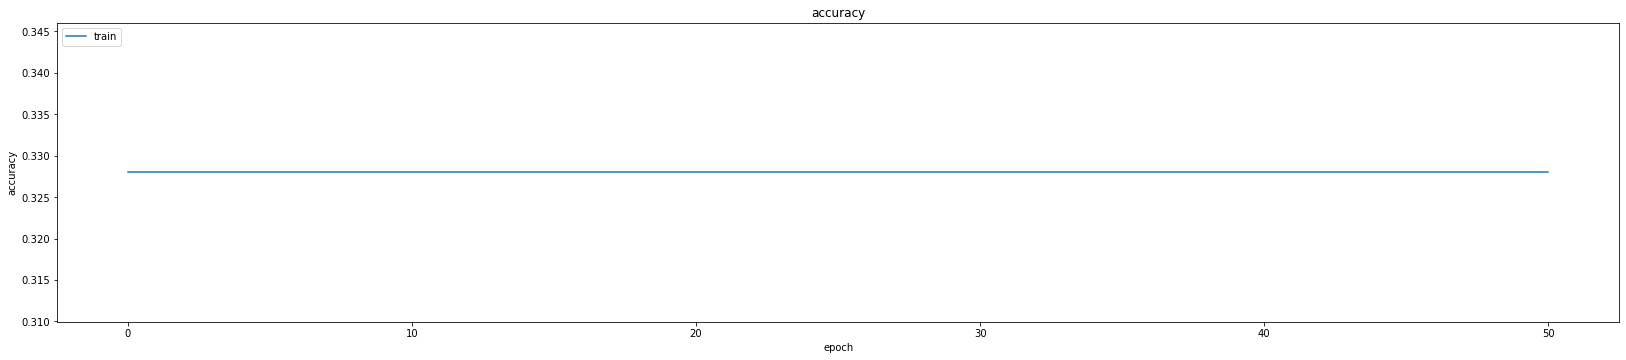

108000 109000


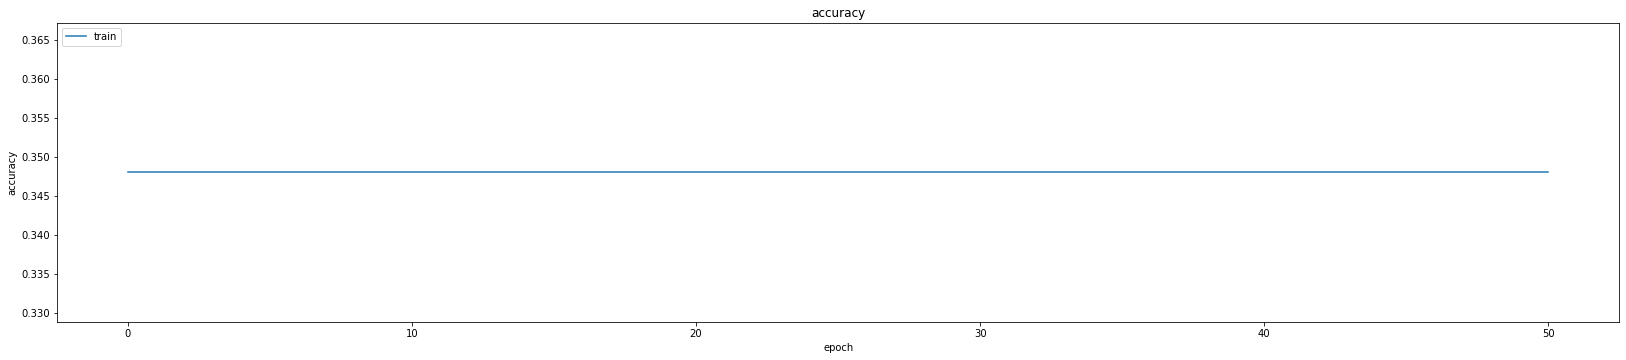

109000 110000


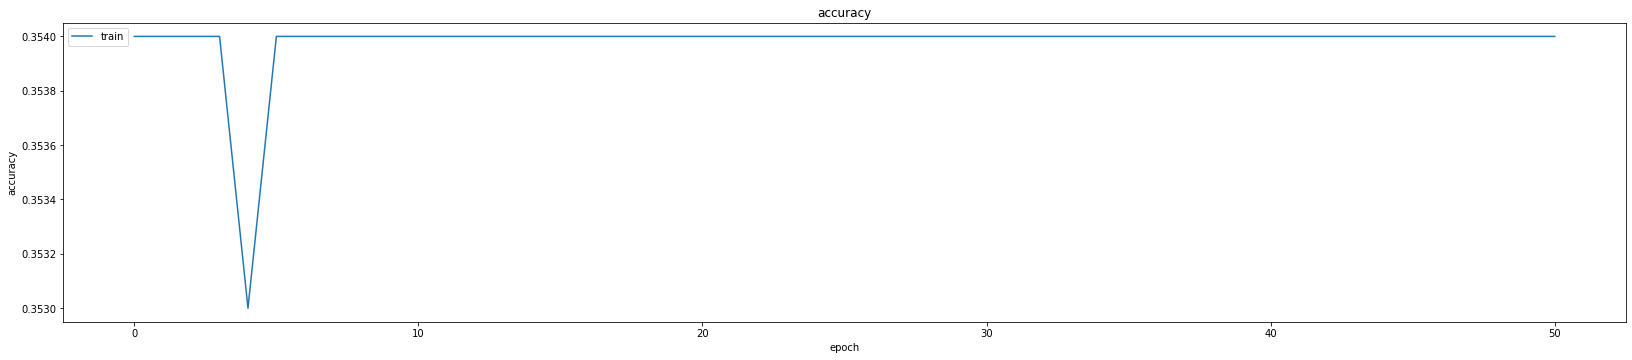

110000 111000


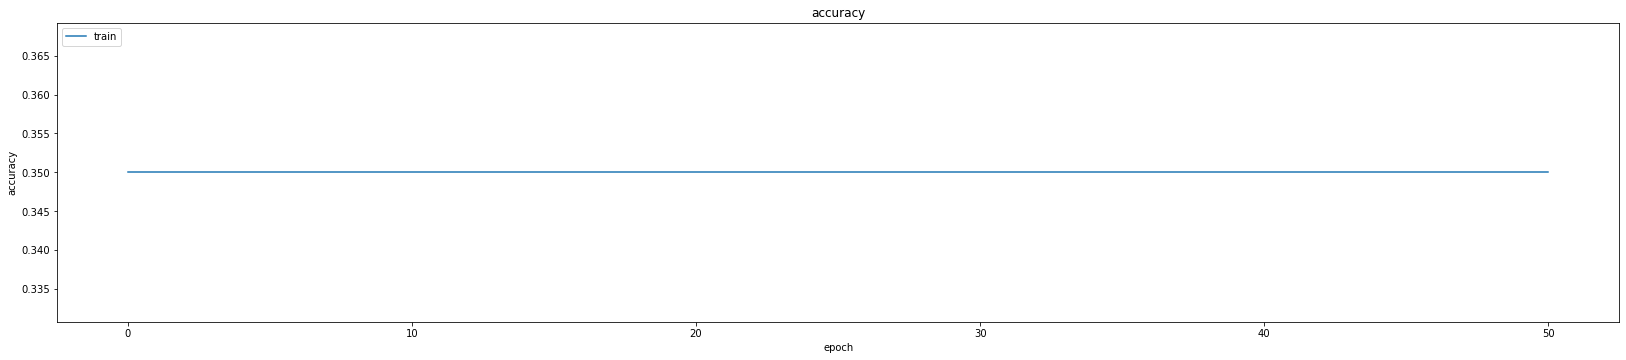

111000 112000


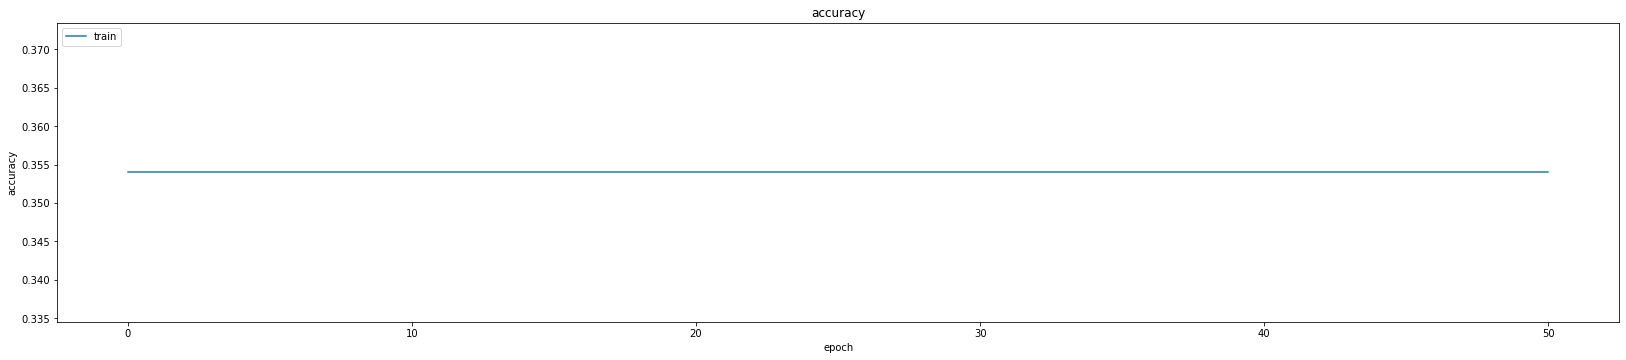

112000 113000


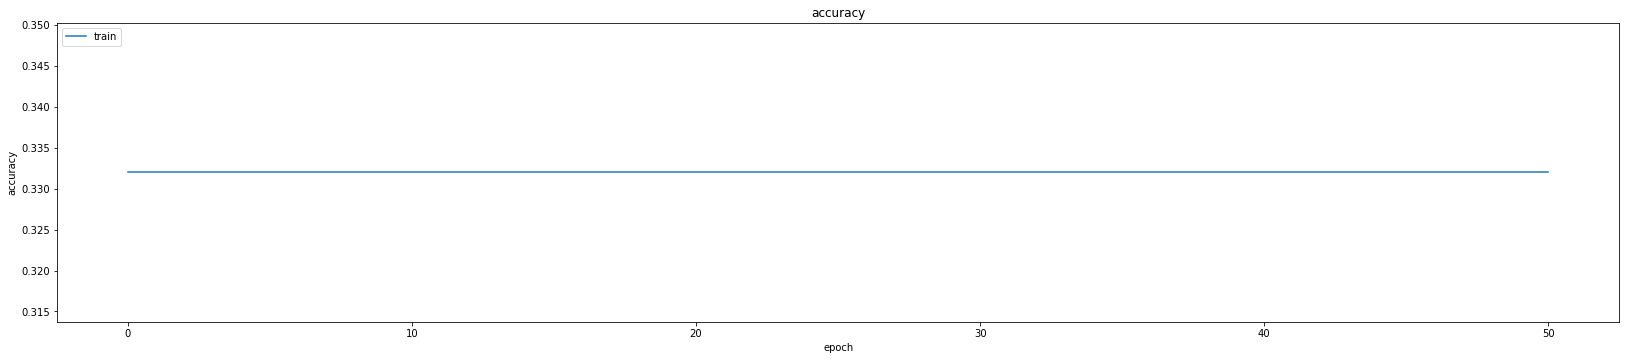

113000 114000


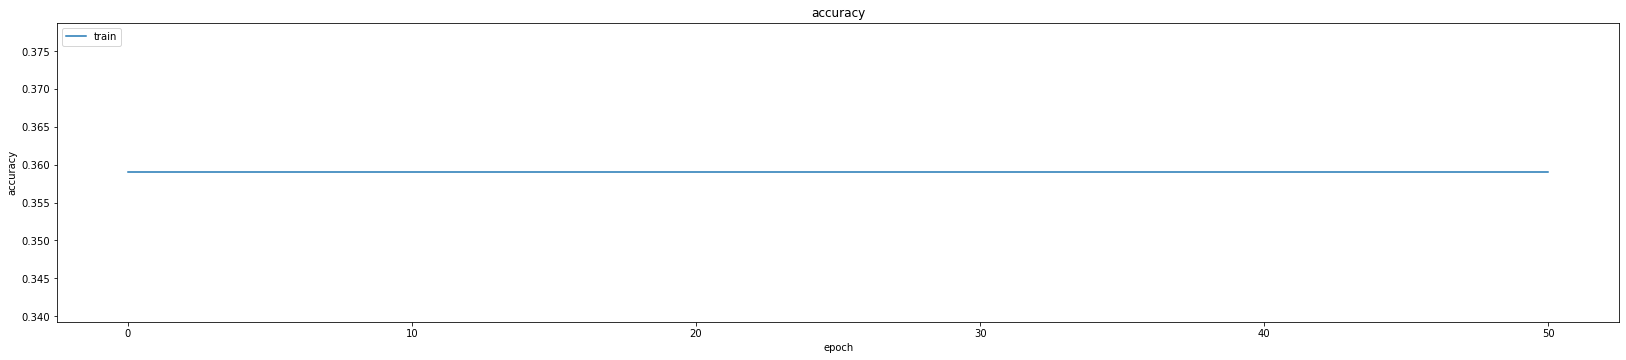

114000 115000


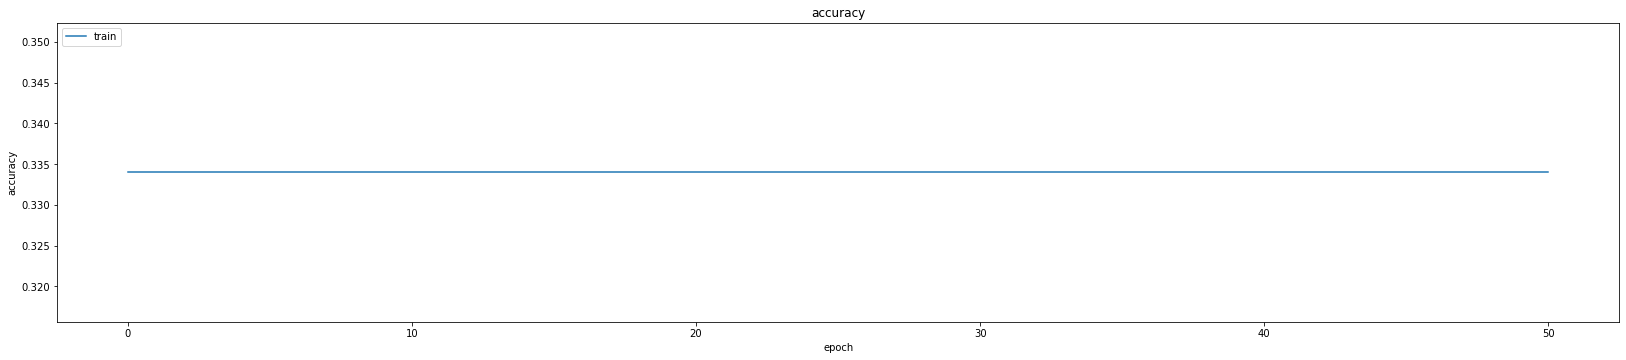

115000 116000


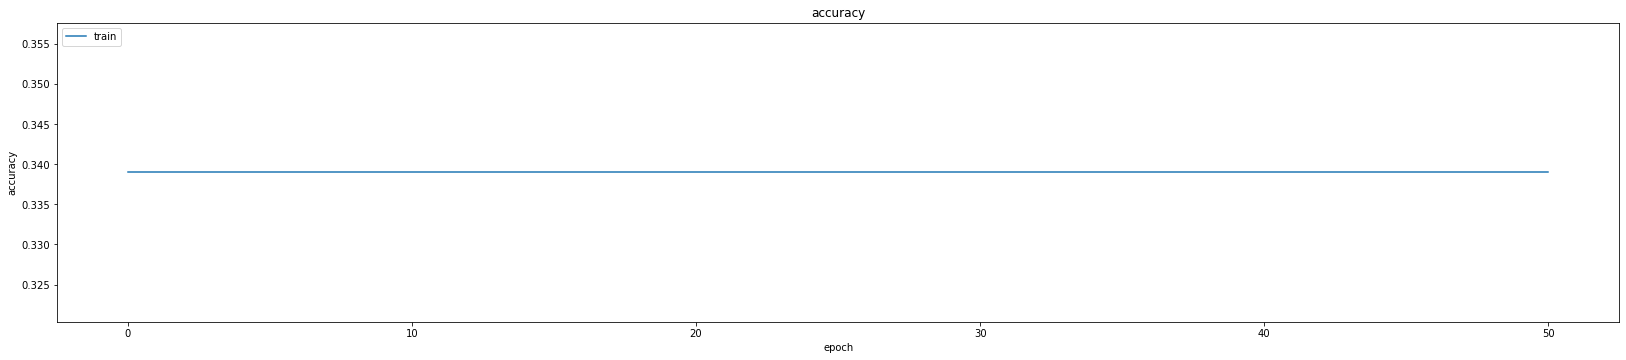

116000 117000


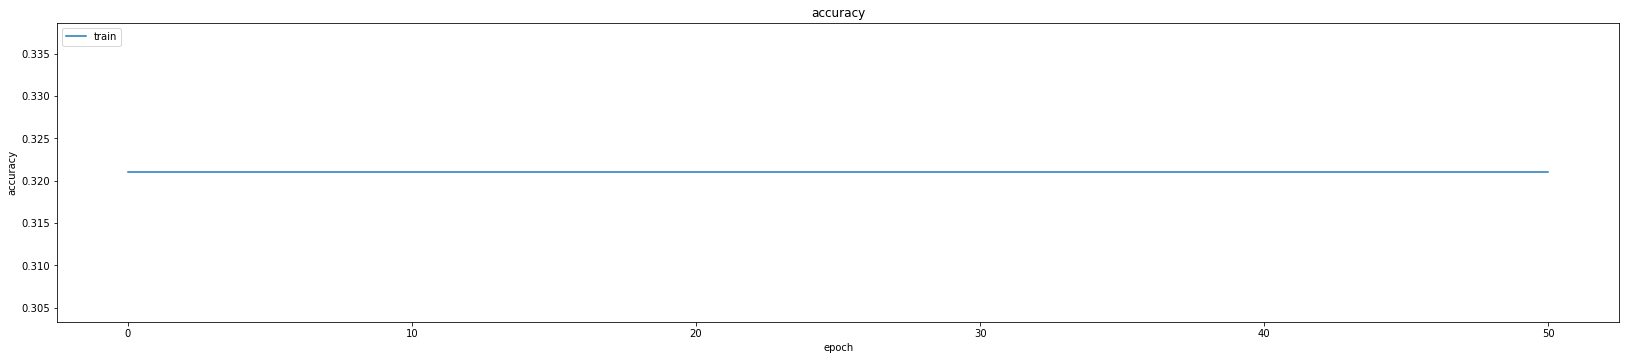

117000 118000


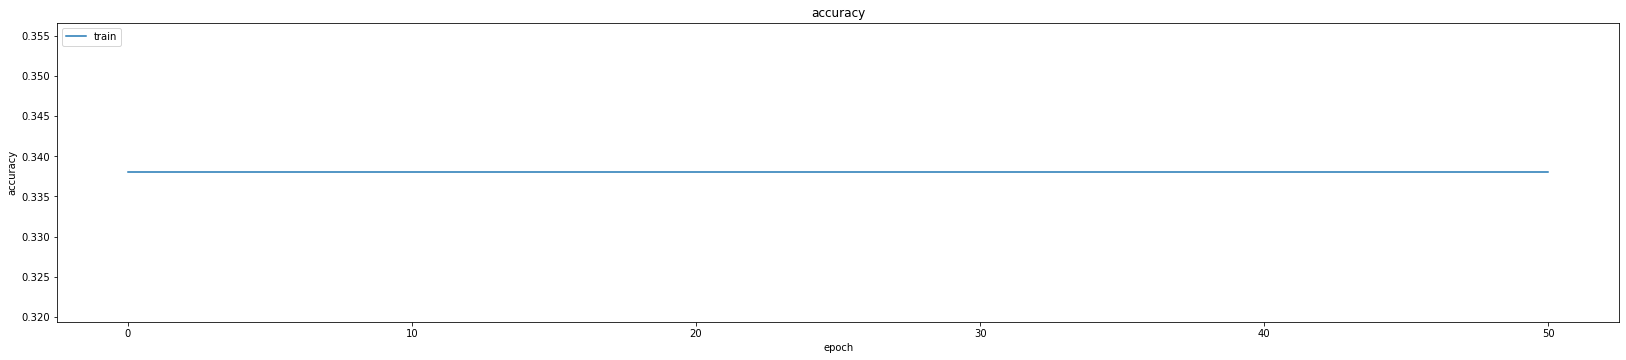

118000 119000


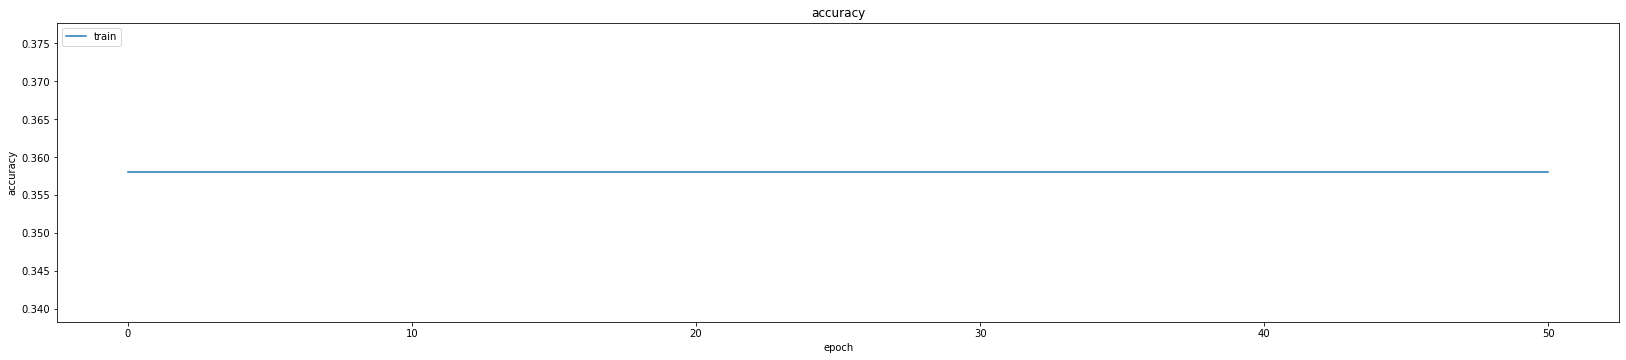

119000 120000


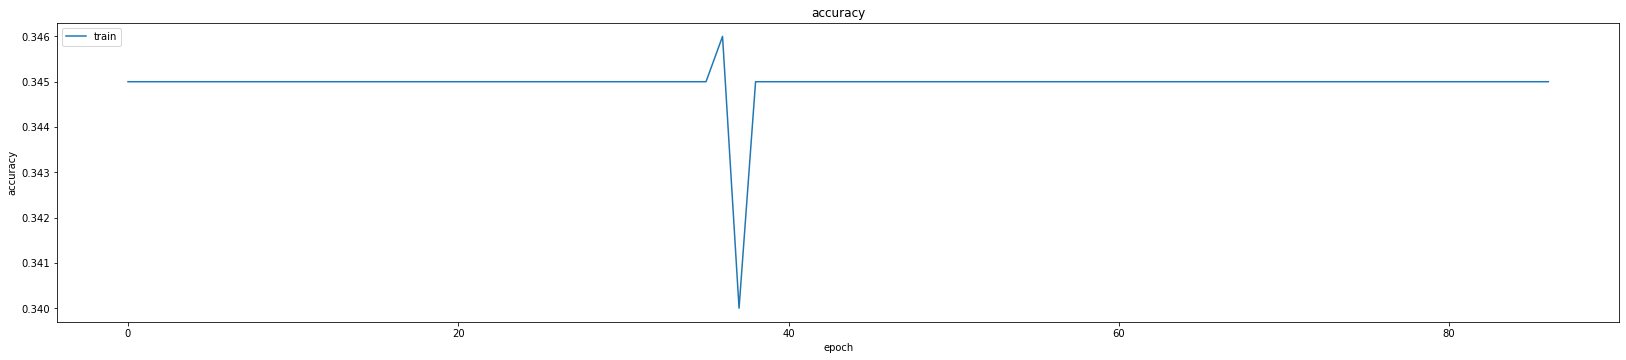

120000 121000


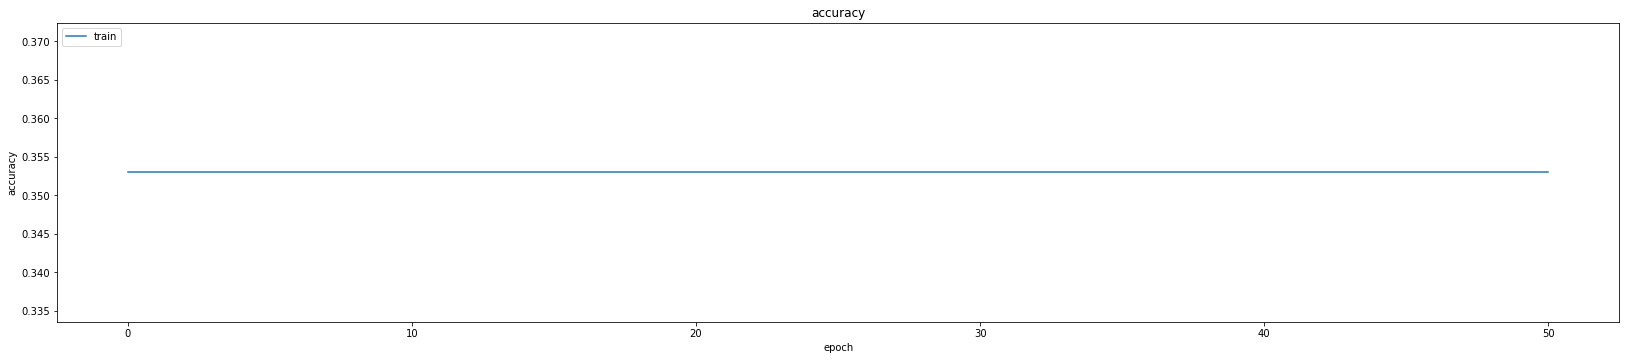

121000 122000


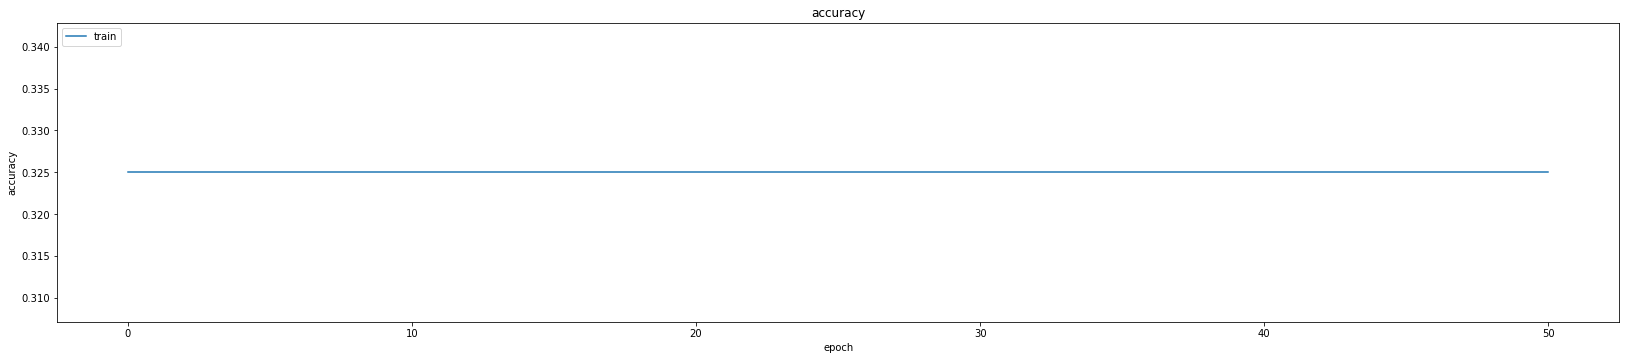

122000 123000


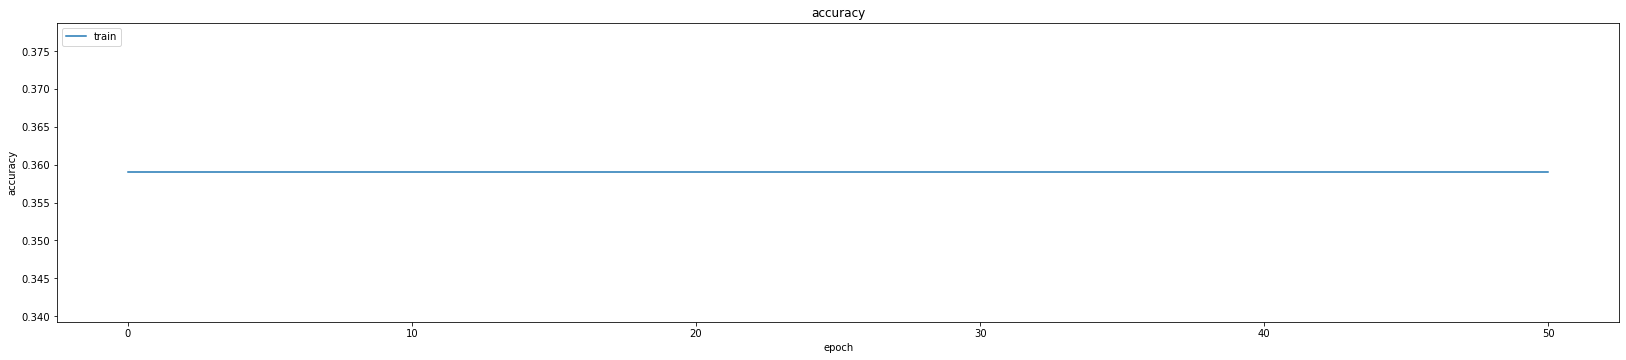

123000 124000


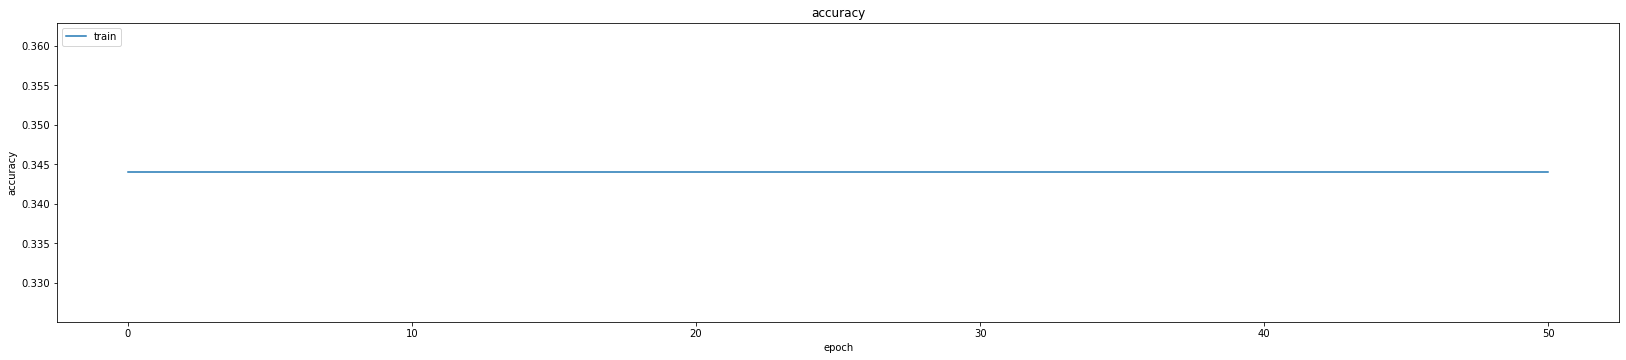

124000 125000


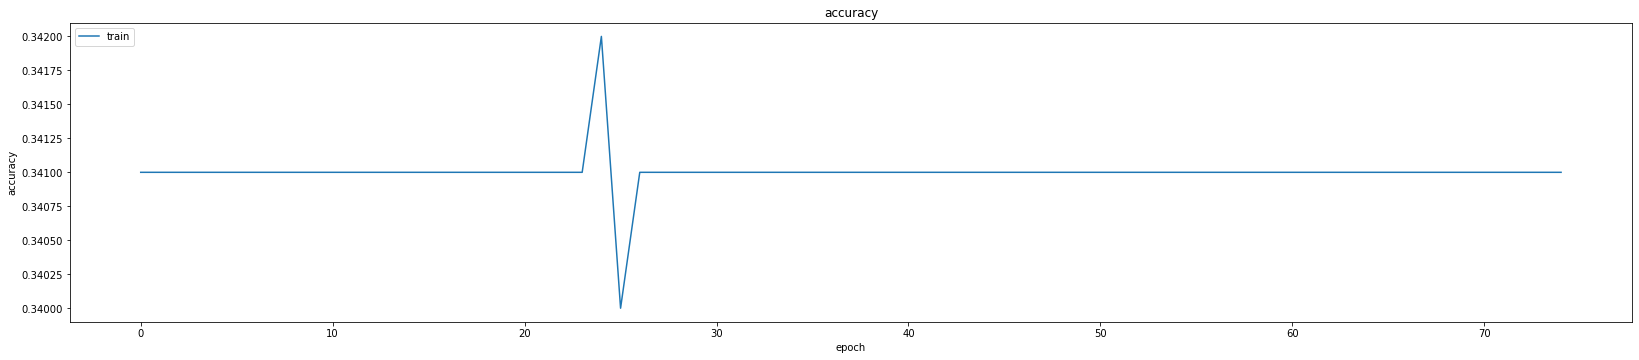

125000 126000


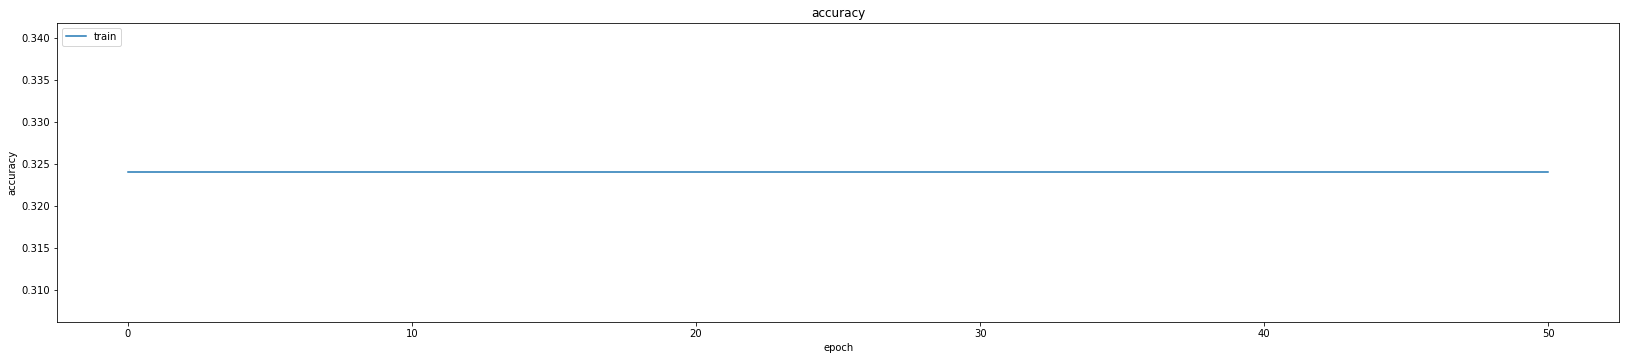

126000 127000


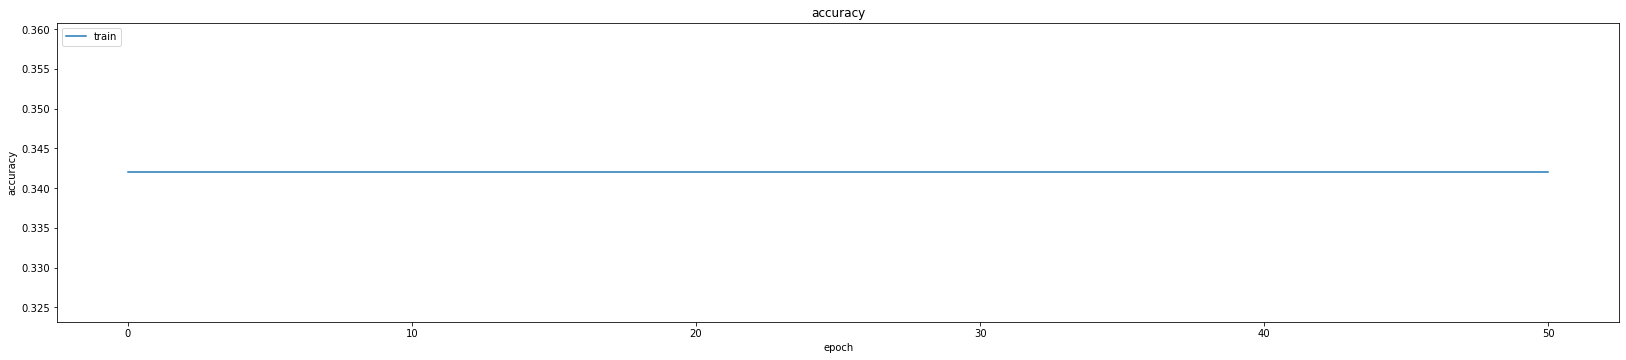

127000 128000


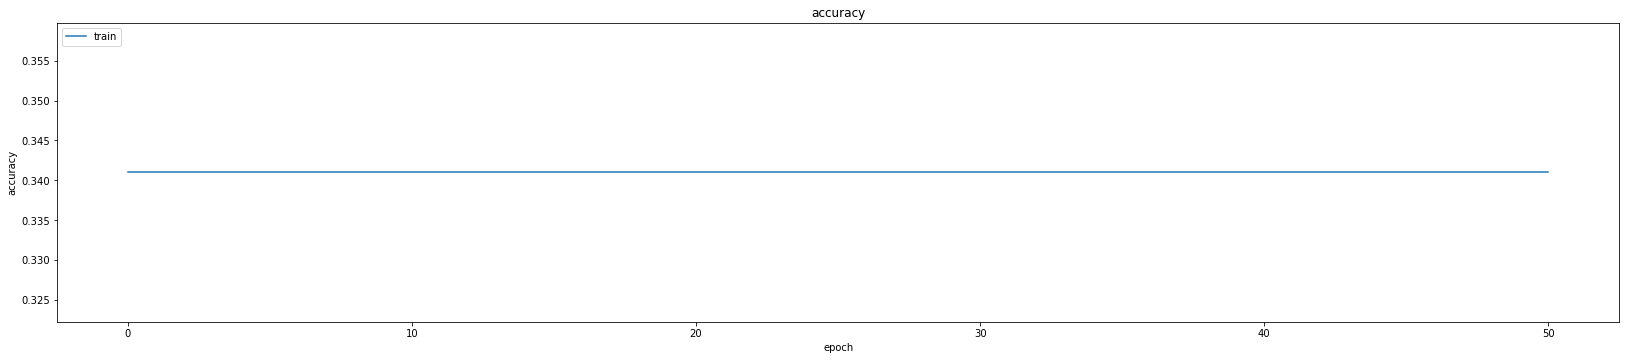

128000 129000


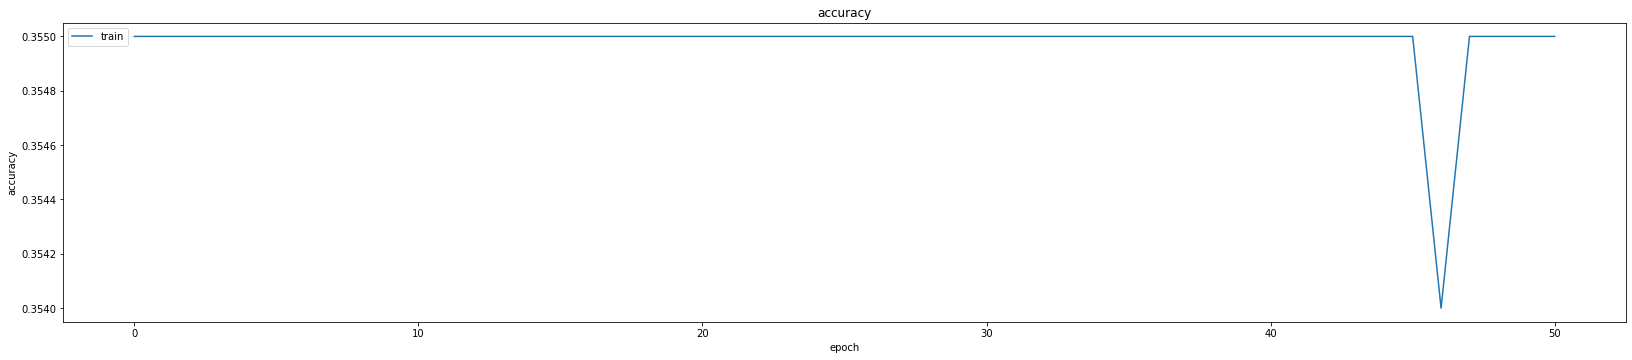

129000 130000


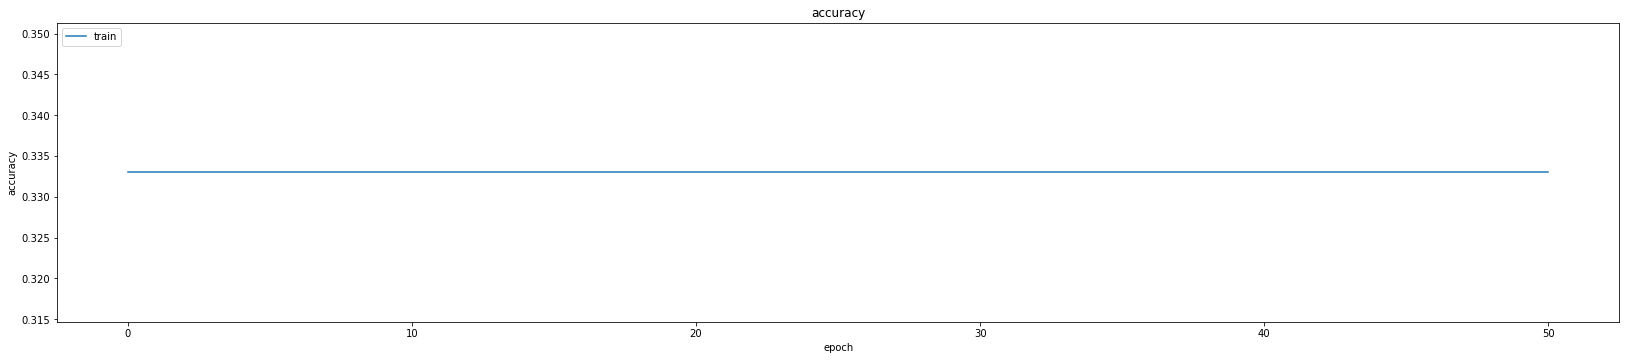

130000 131000


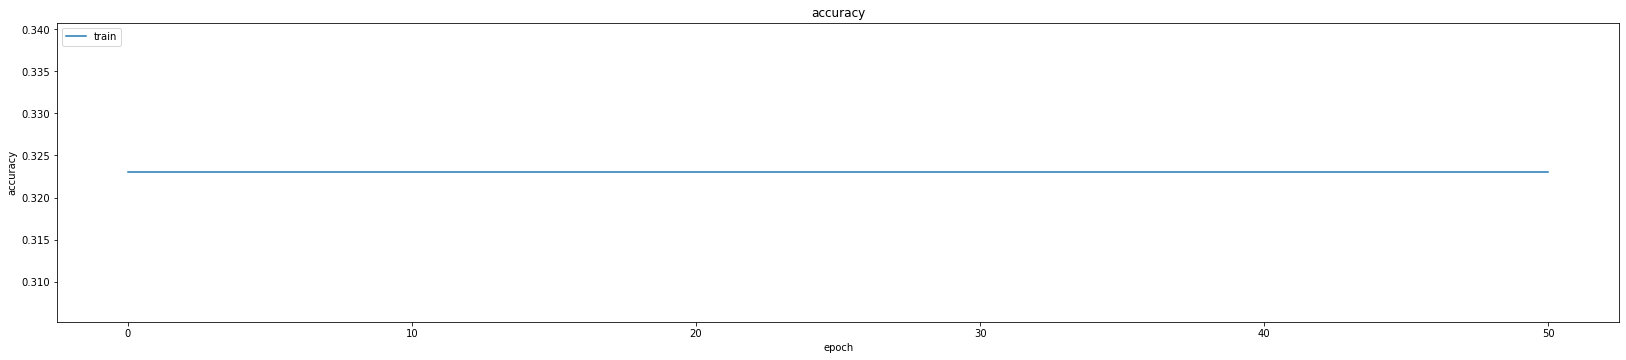

131000 132000


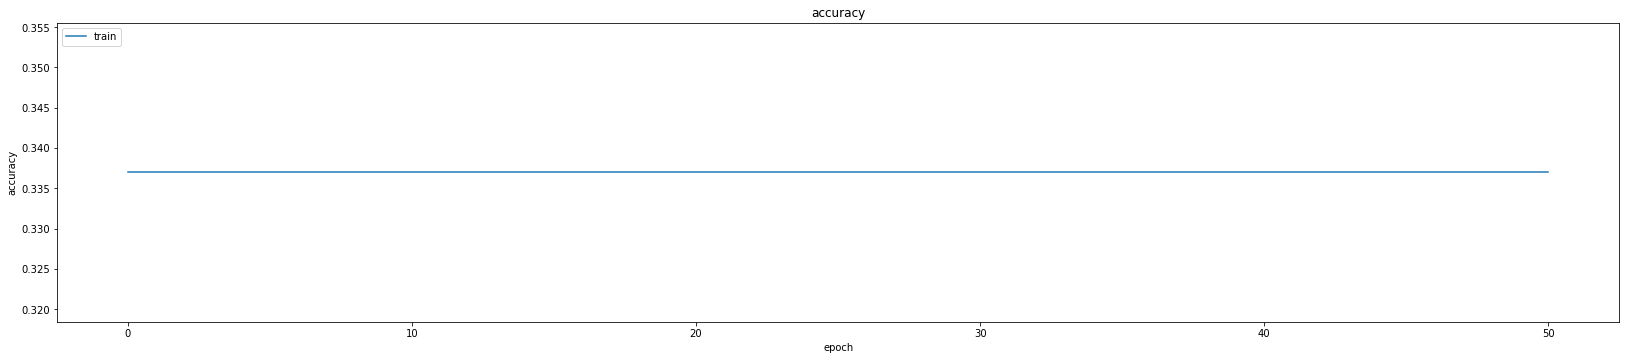

132000 133000


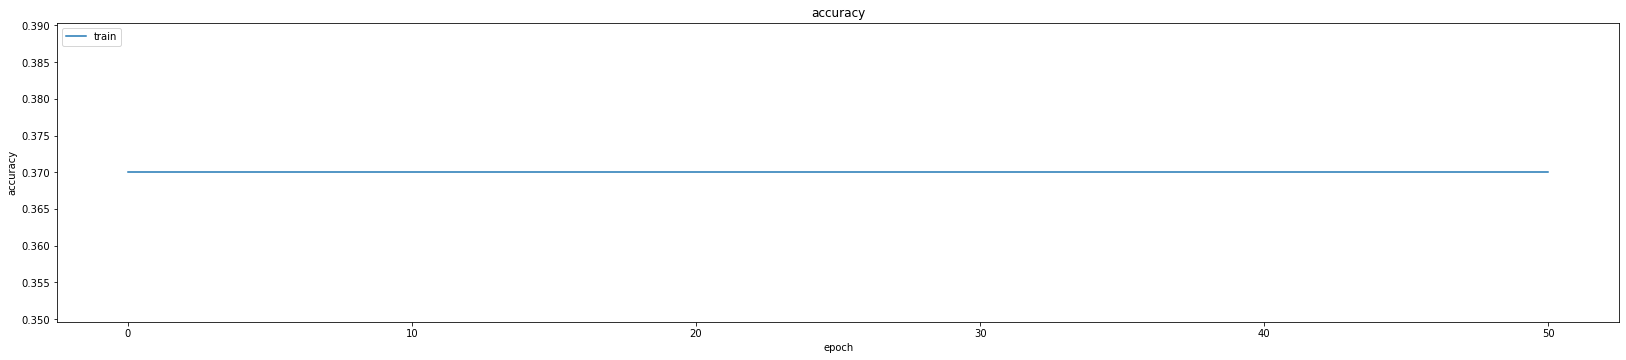

133000 134000


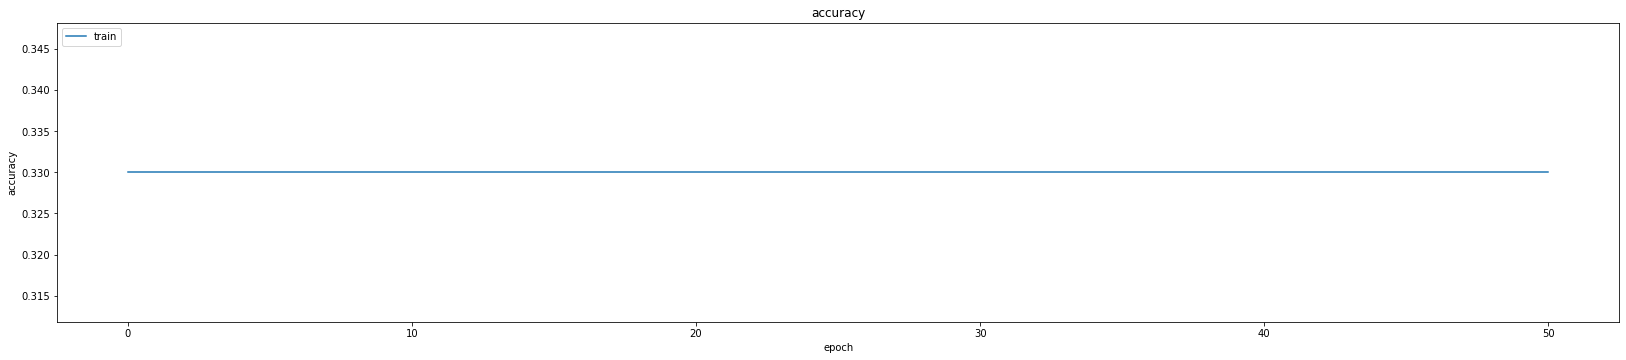

134000 135000


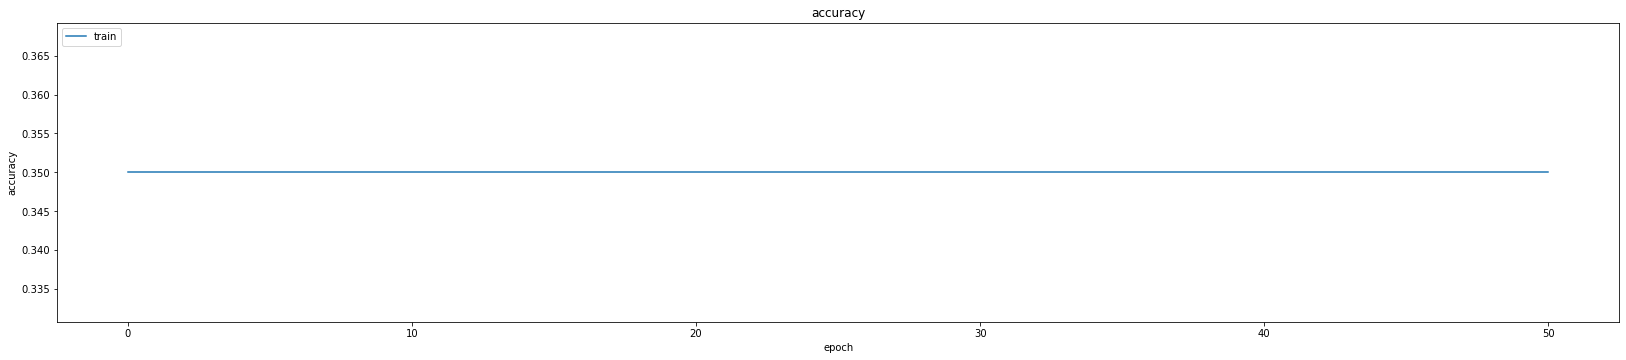

135000 136000


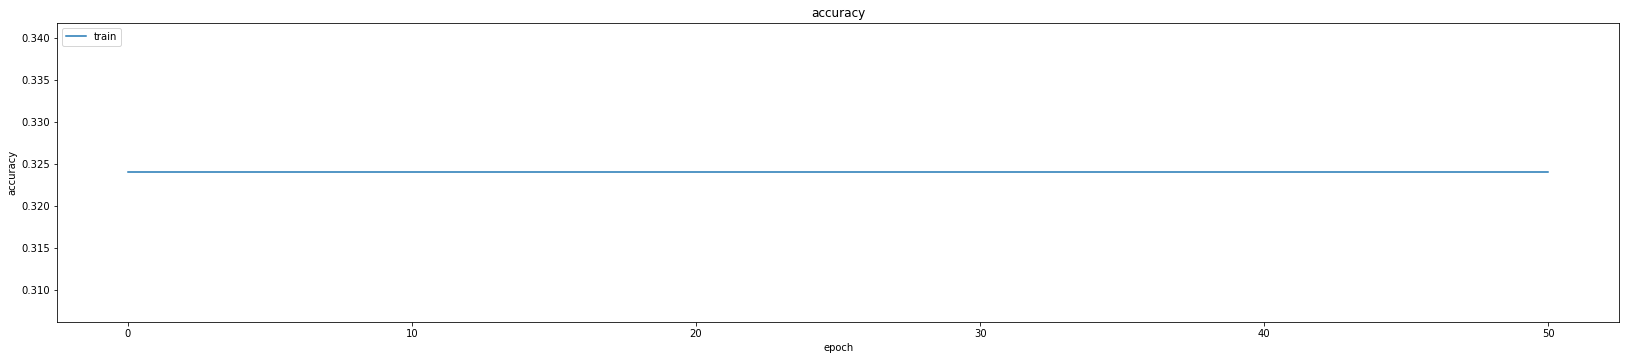

136000 137000


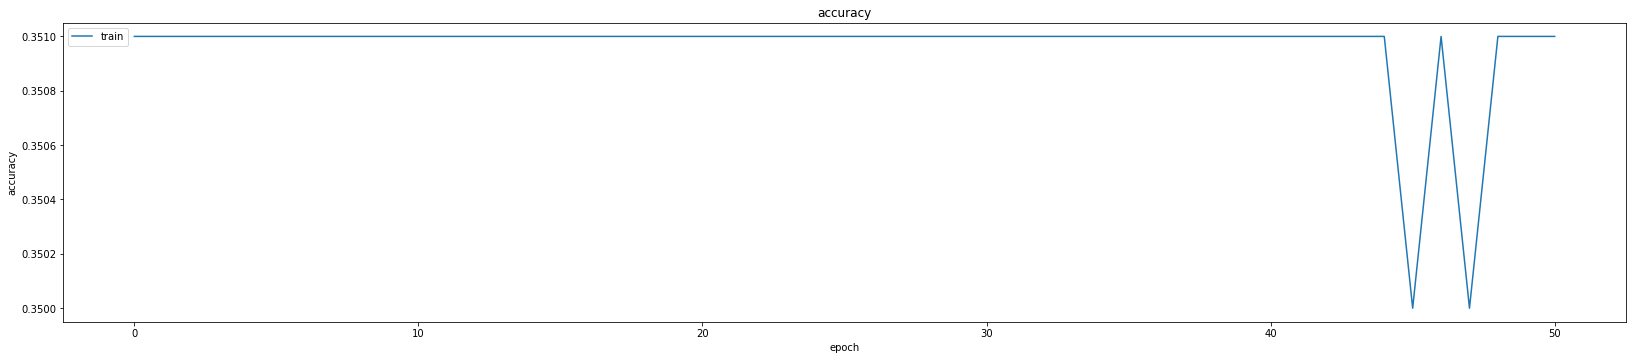

137000 138000


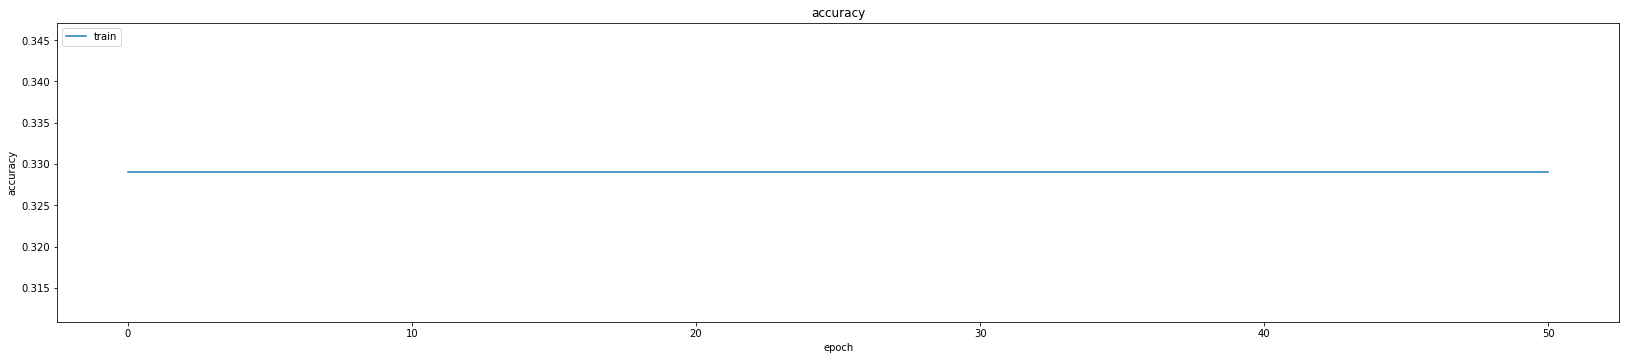

138000 139000


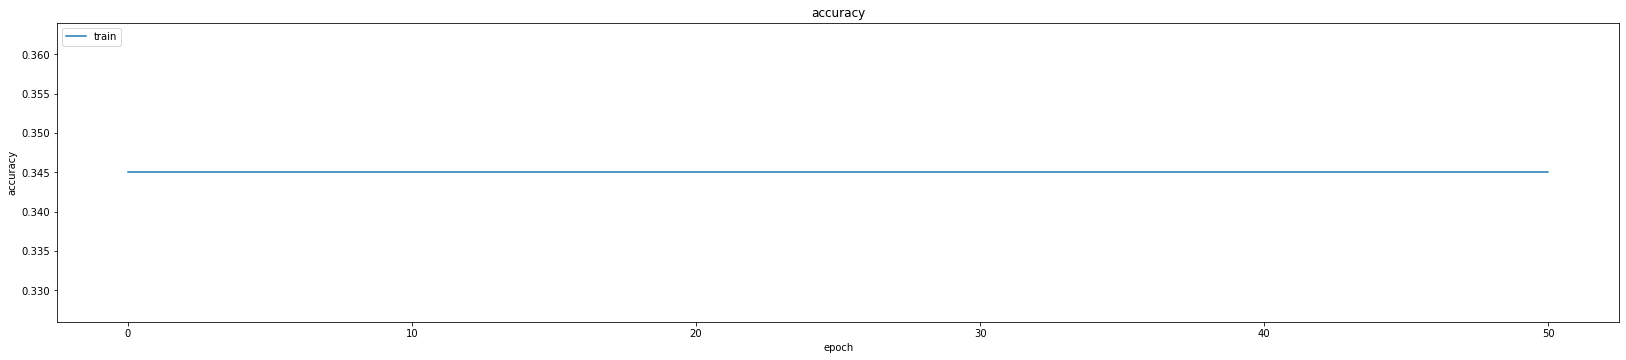

139000 140000


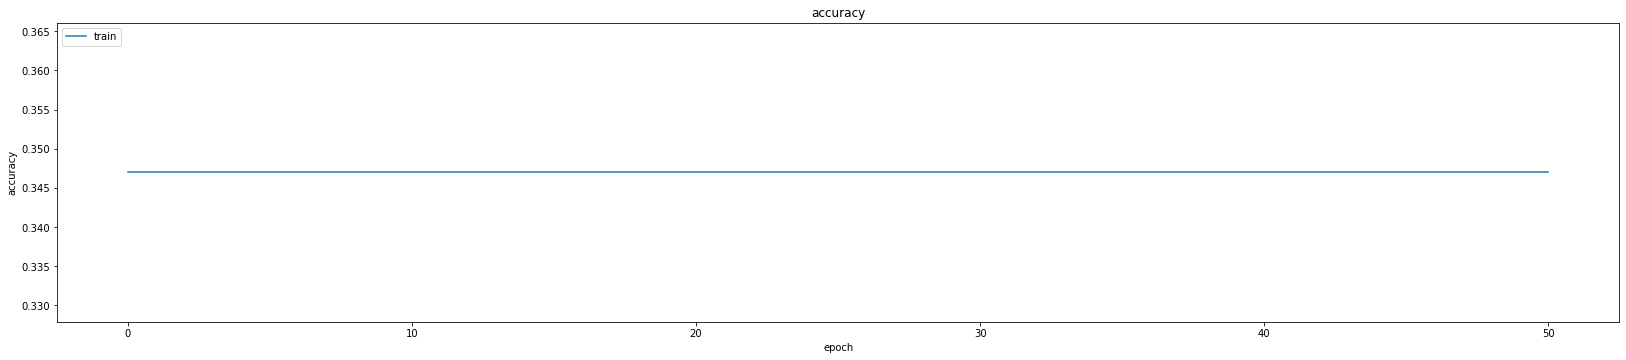

140000 141000


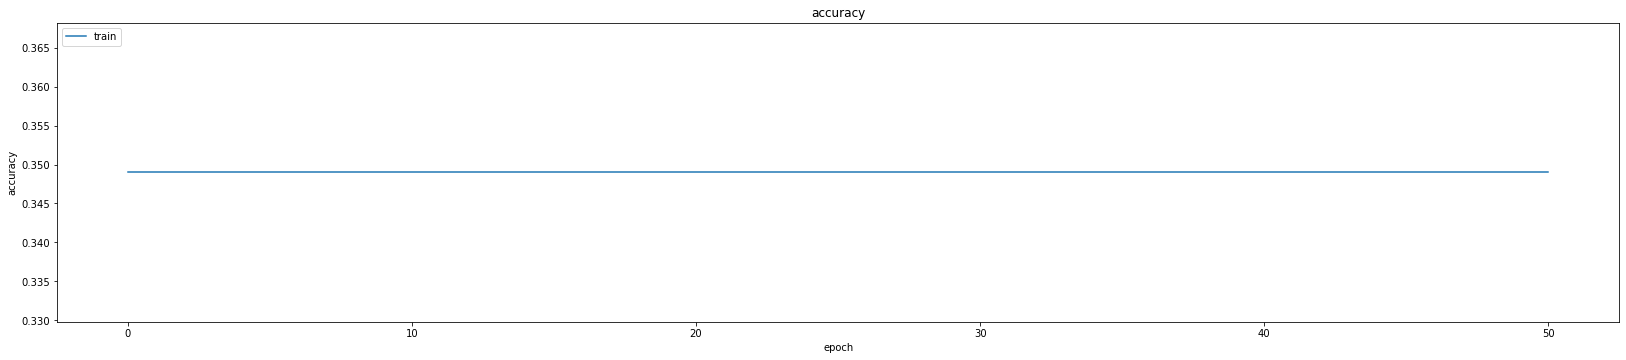

141000 142000


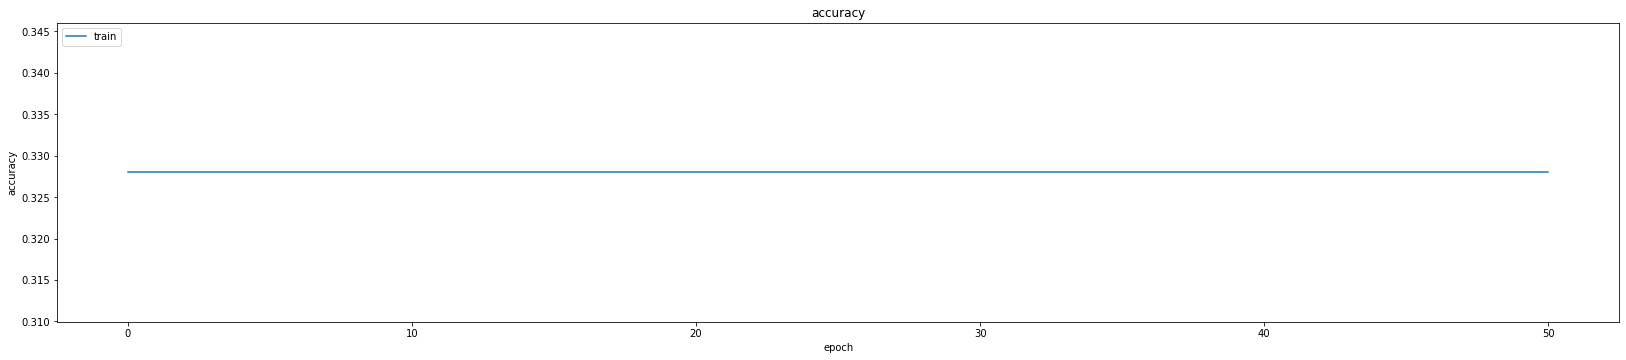

142000 143000


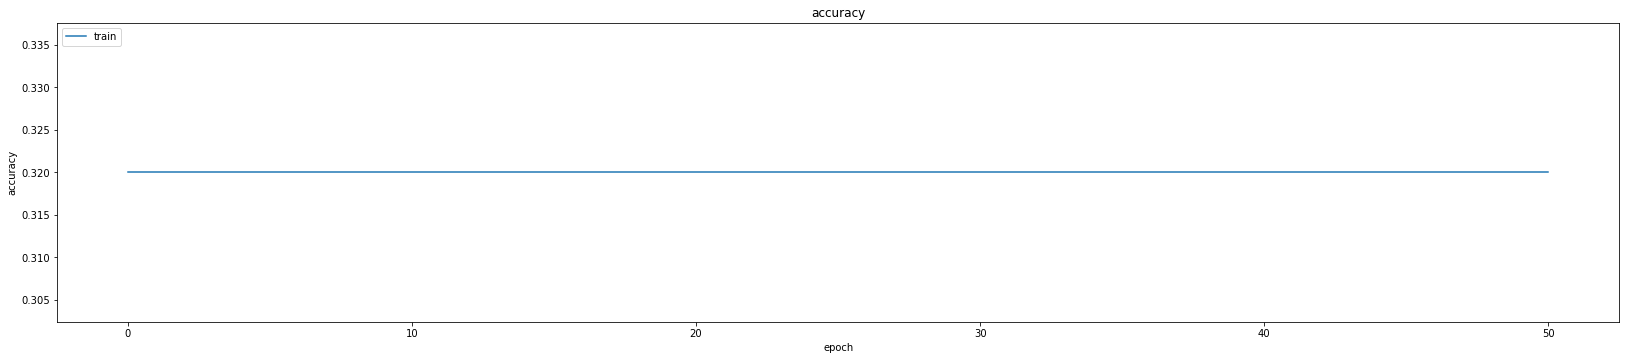

143000 144000


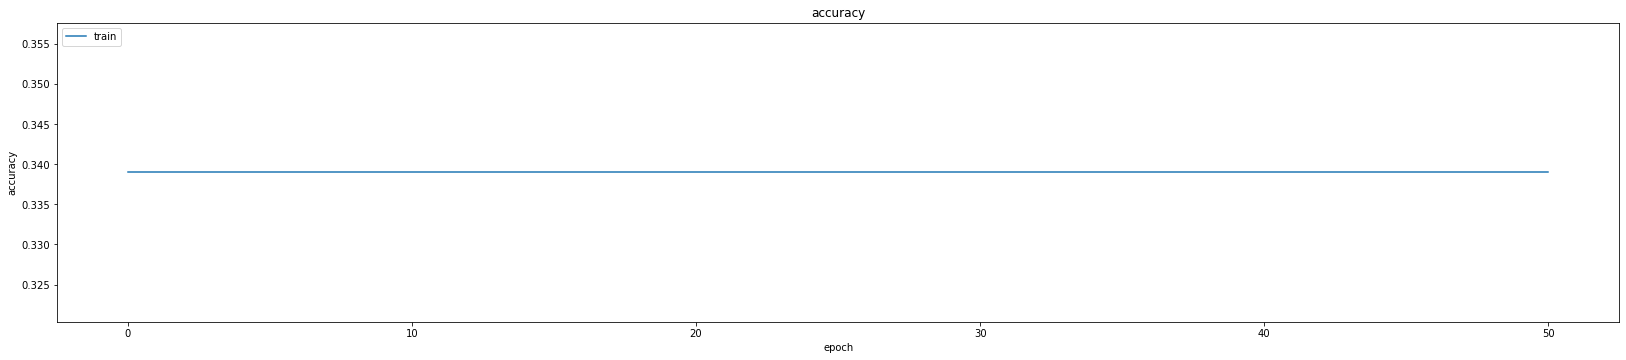

144000 145000


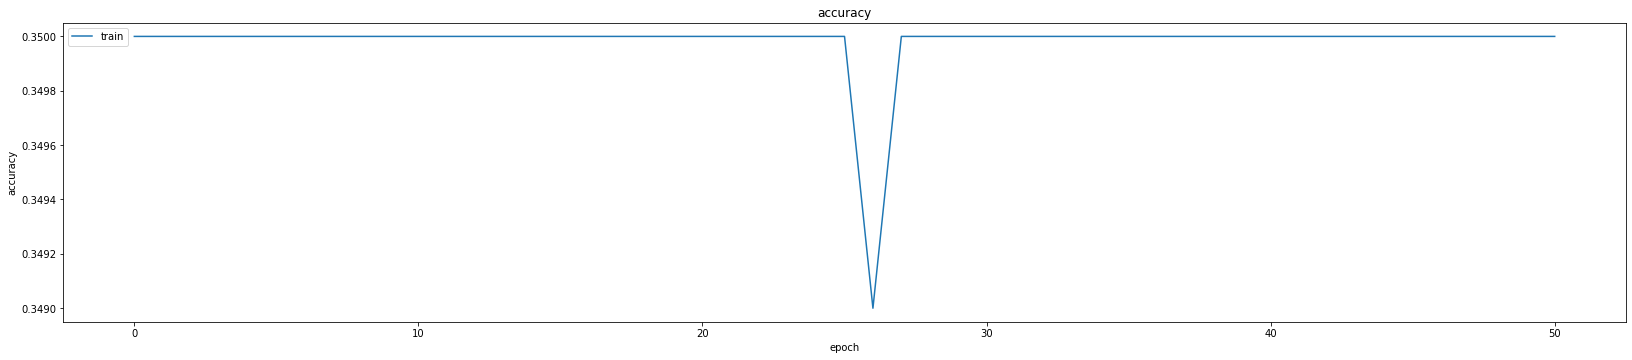

145000 146000


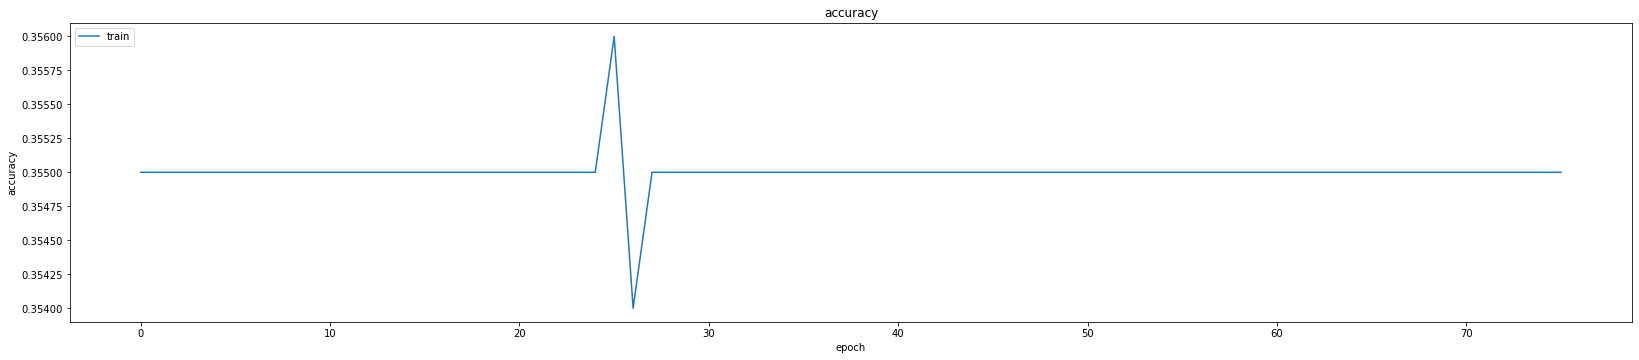

146000 147000


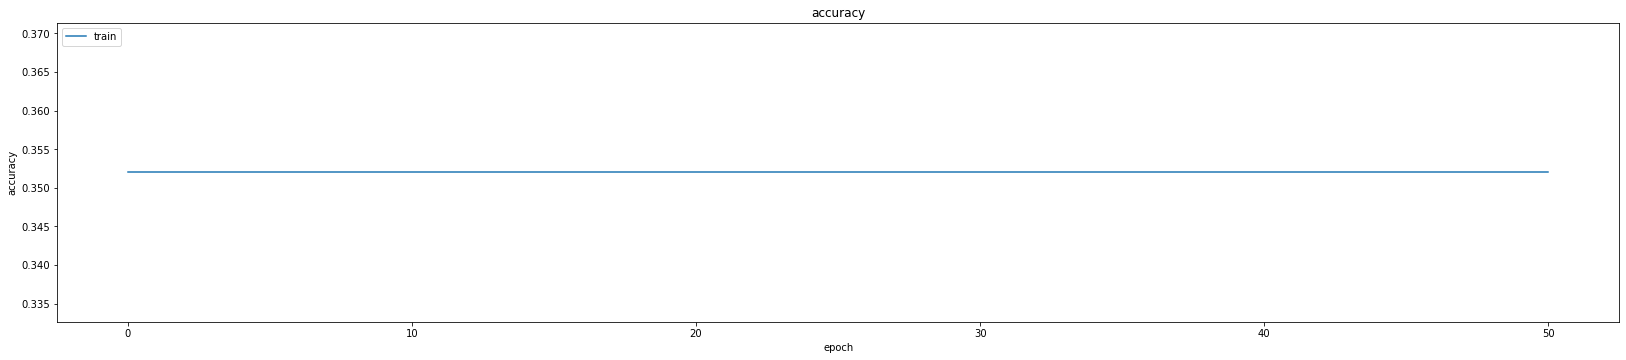

147000 148000


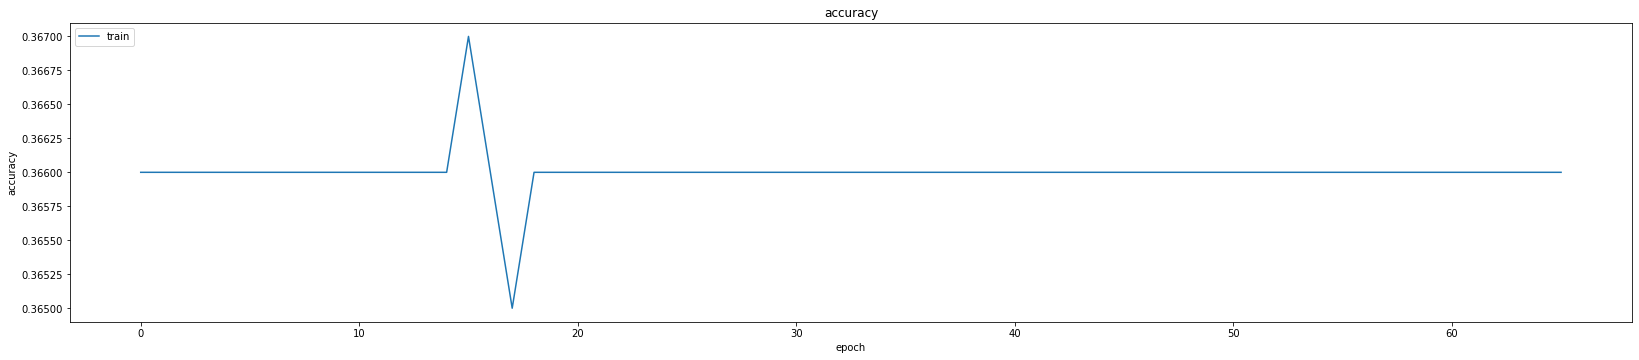

148000 149000


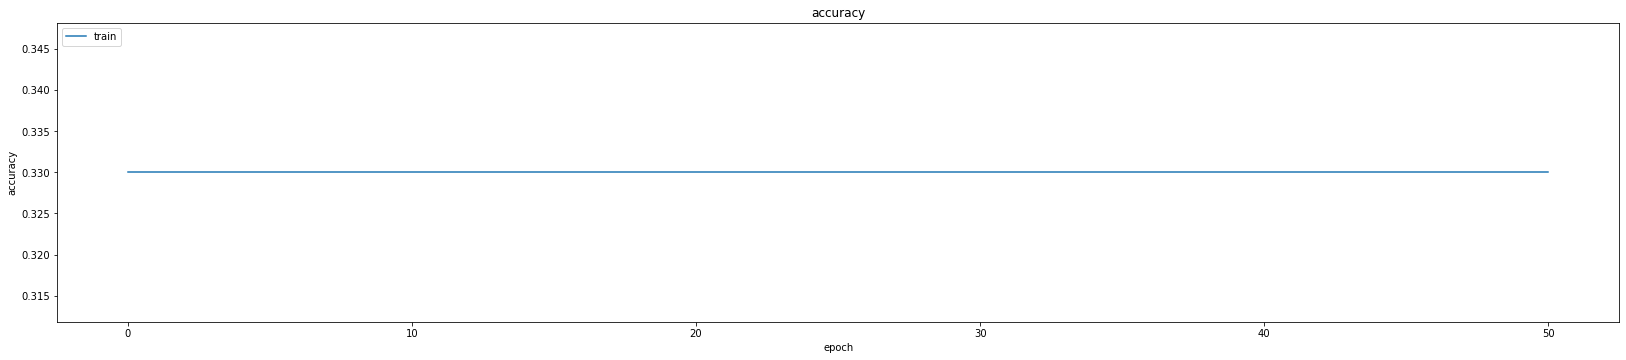

149000 150000


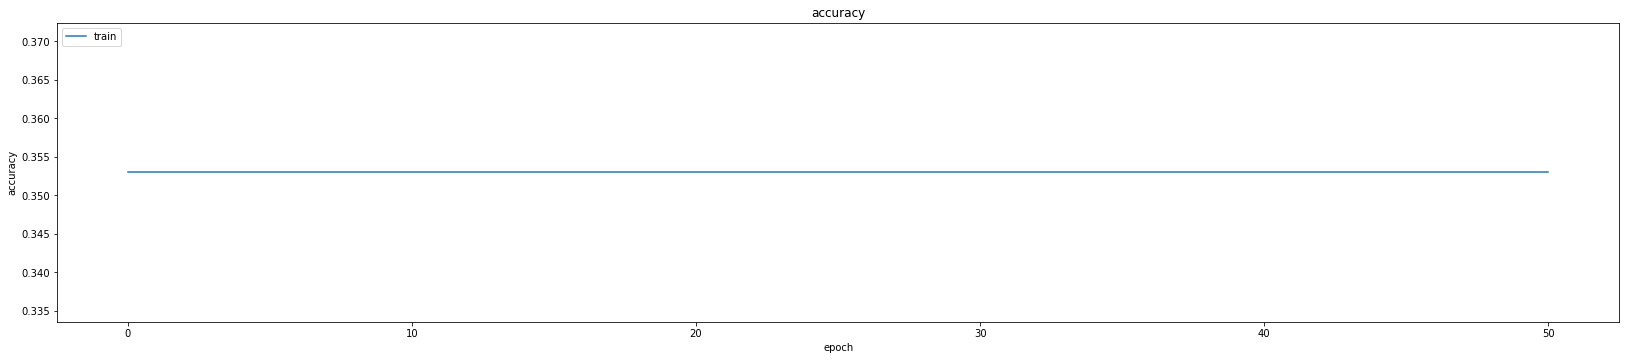

150000 151000


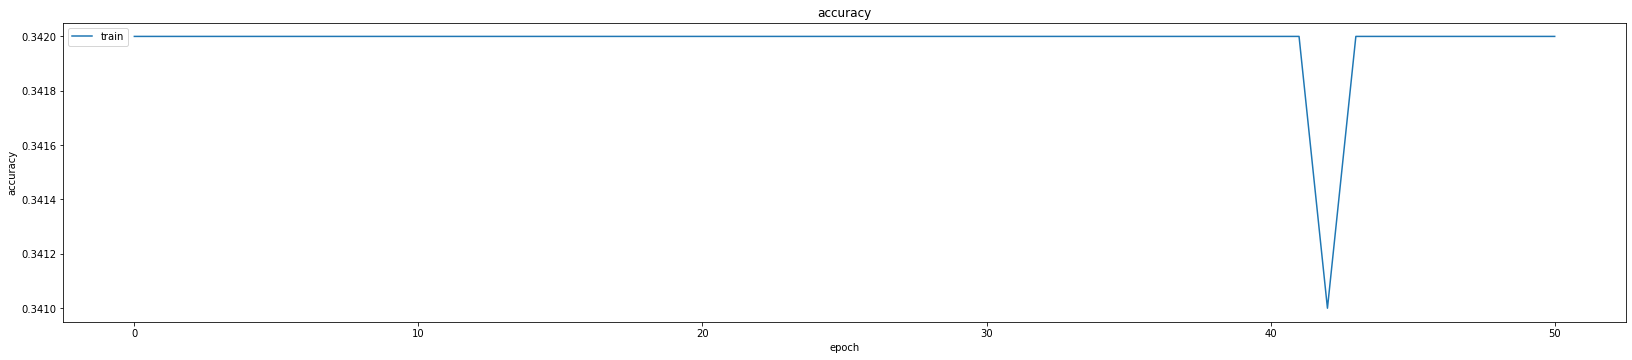

151000 152000


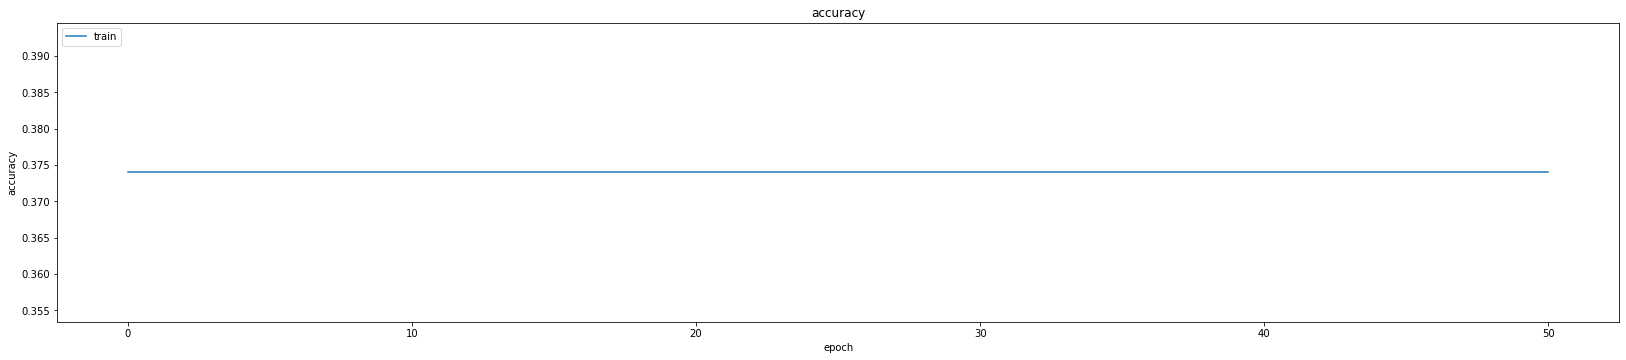

152000 153000


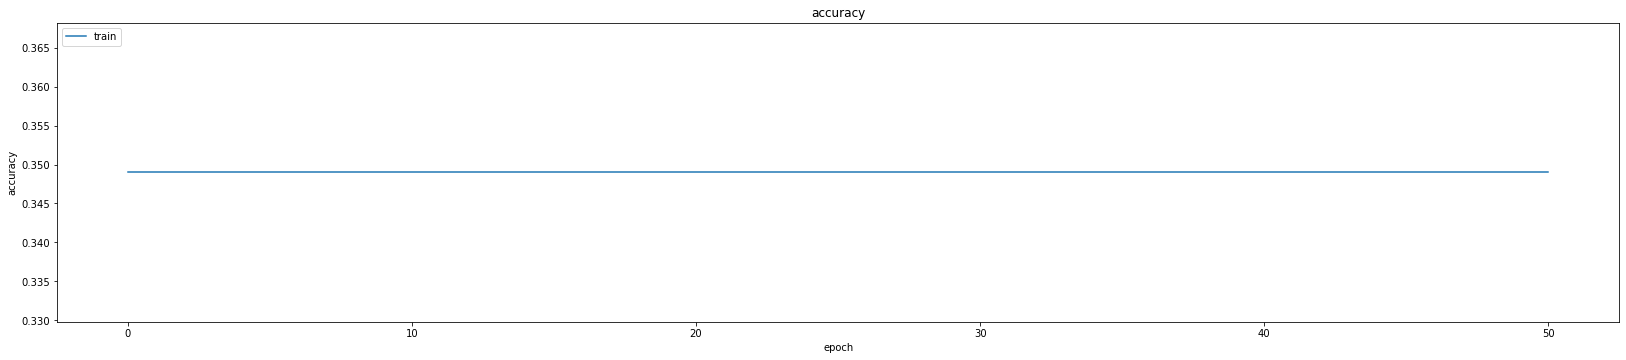

153000 154000


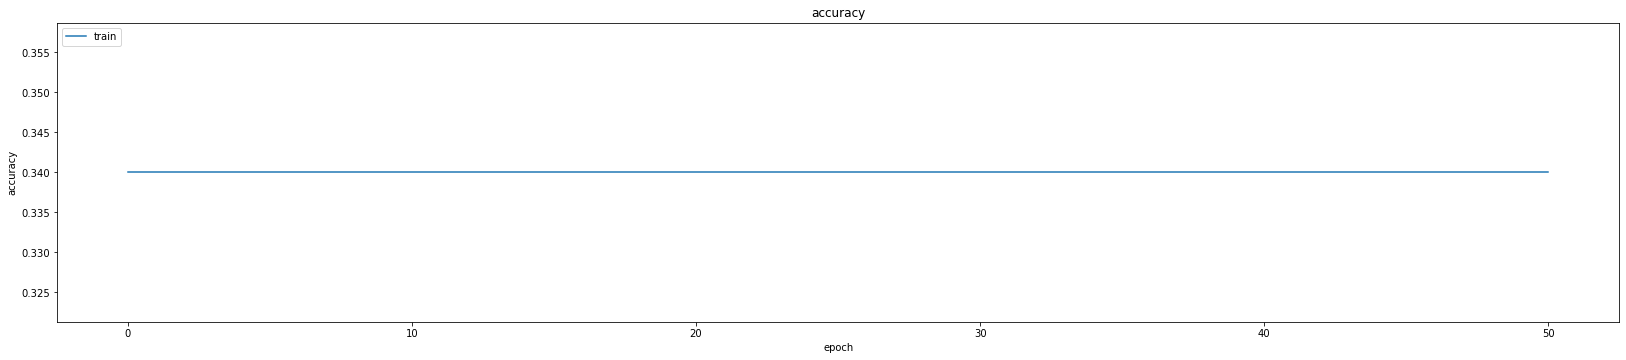

154000 155000


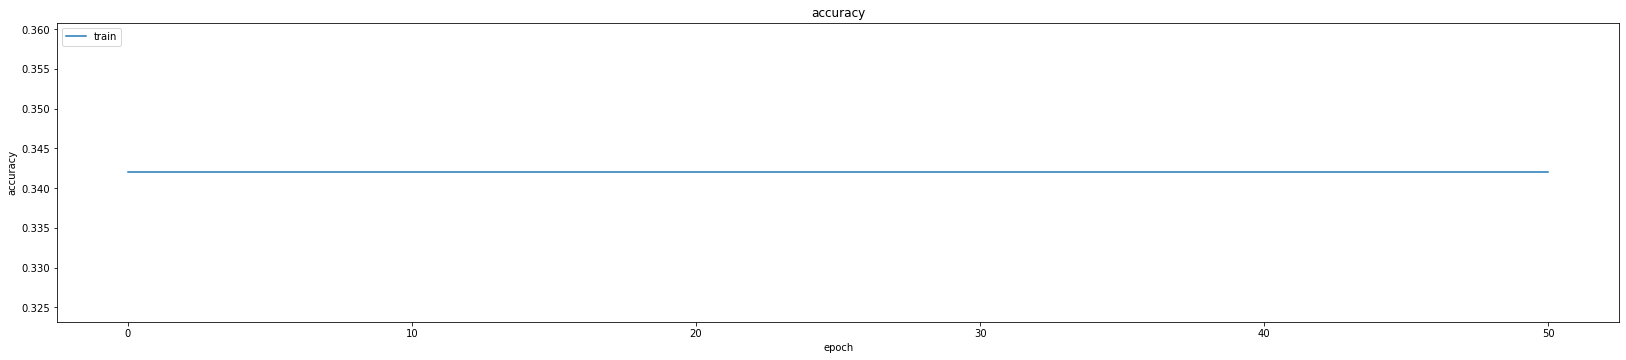

155000 156000


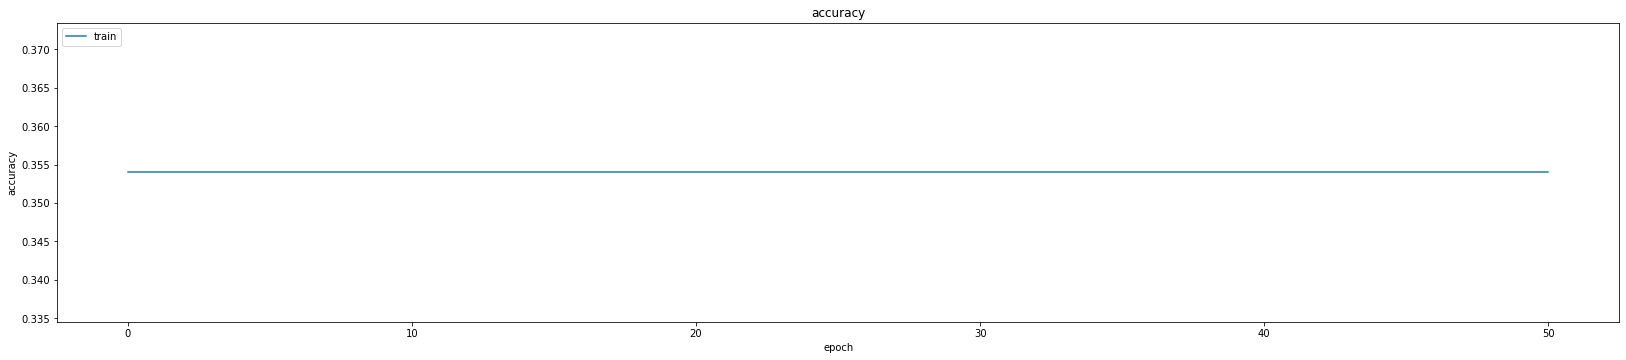

156000 157000


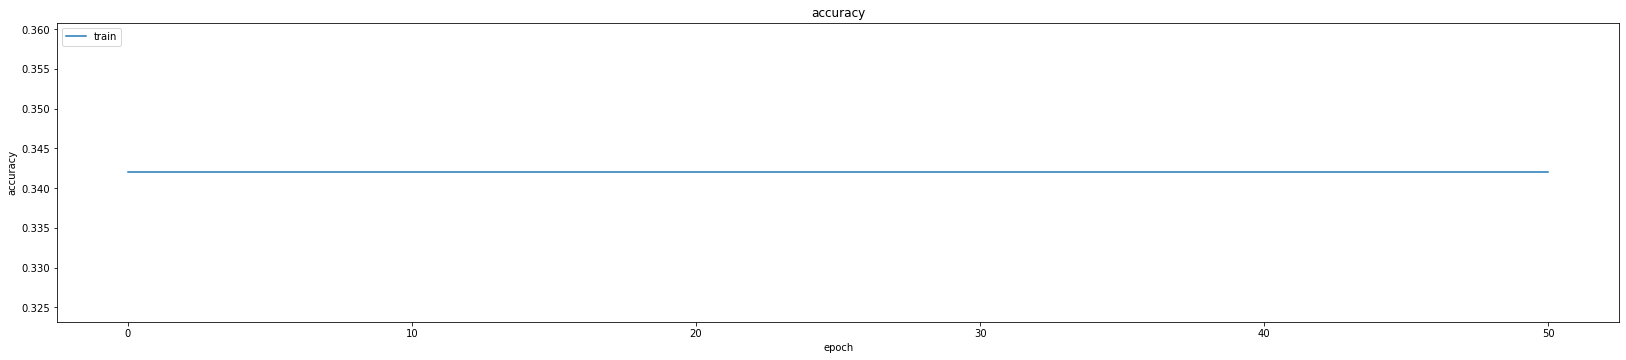

157000 158000


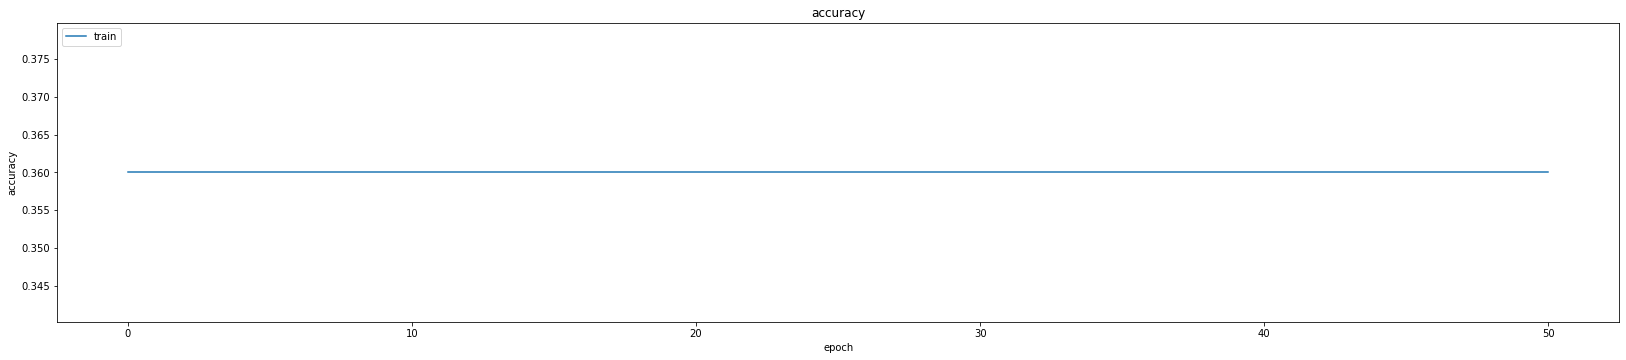

158000 159000


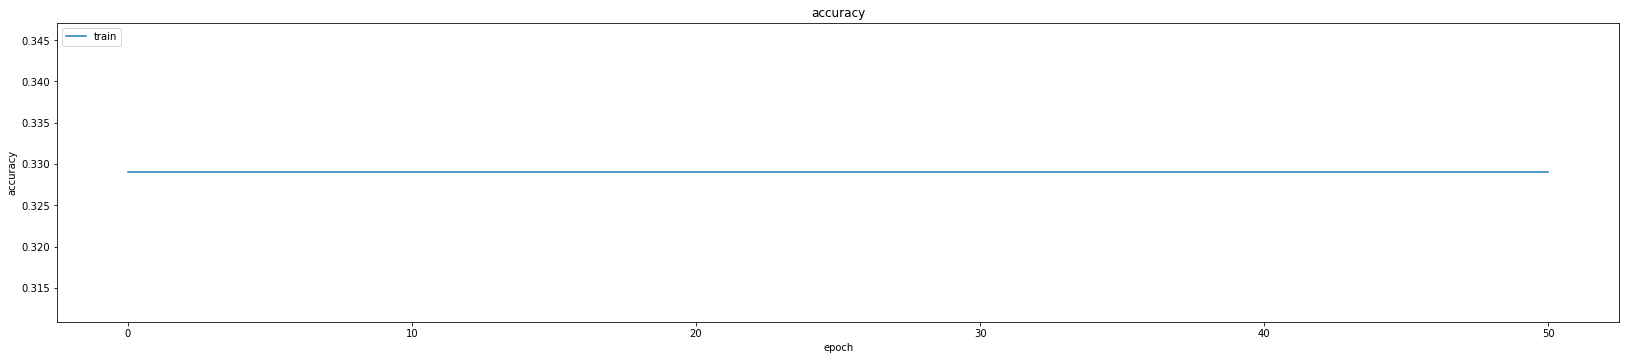

159000 160000


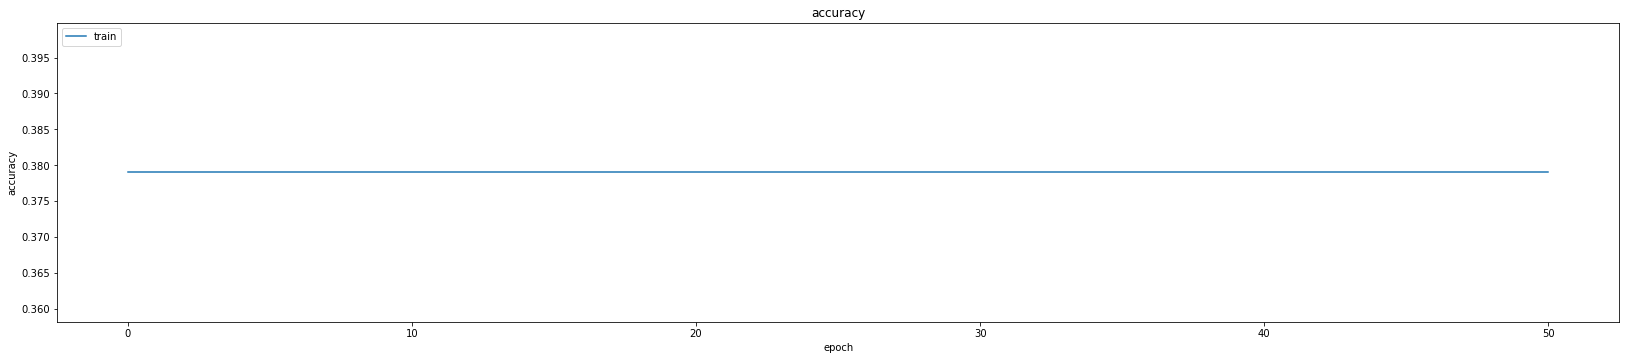

160000 161000


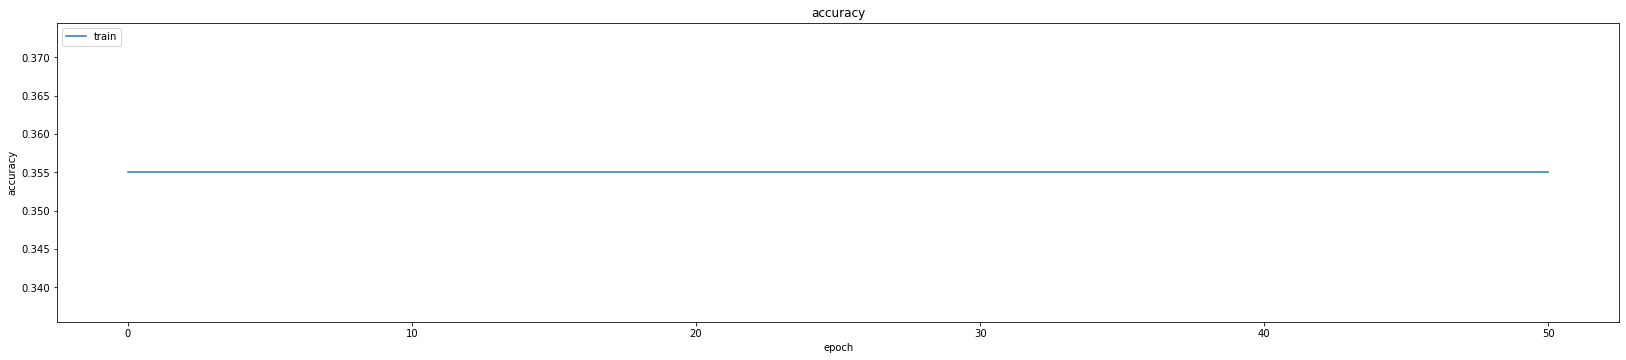

161000 162000


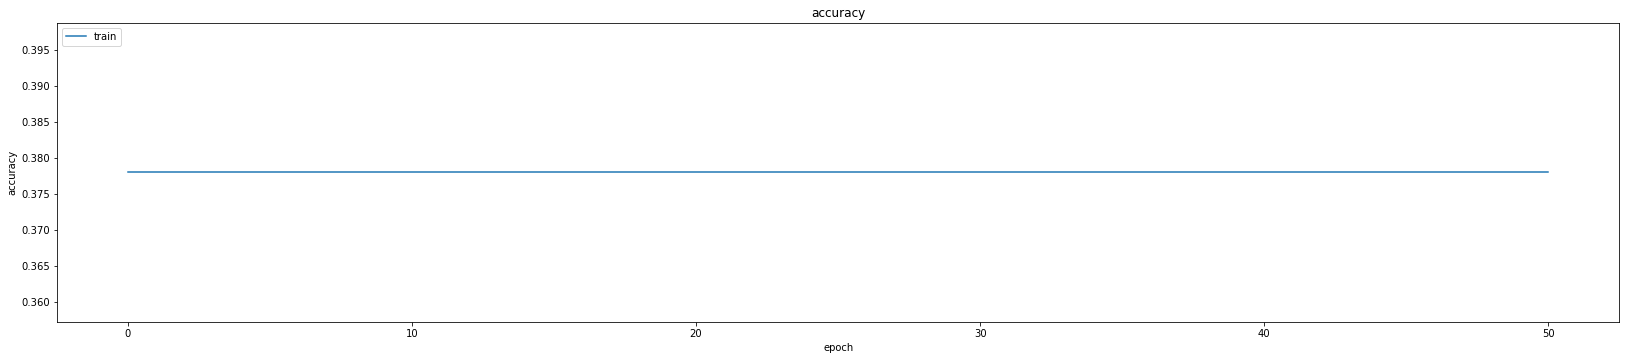

162000 163000


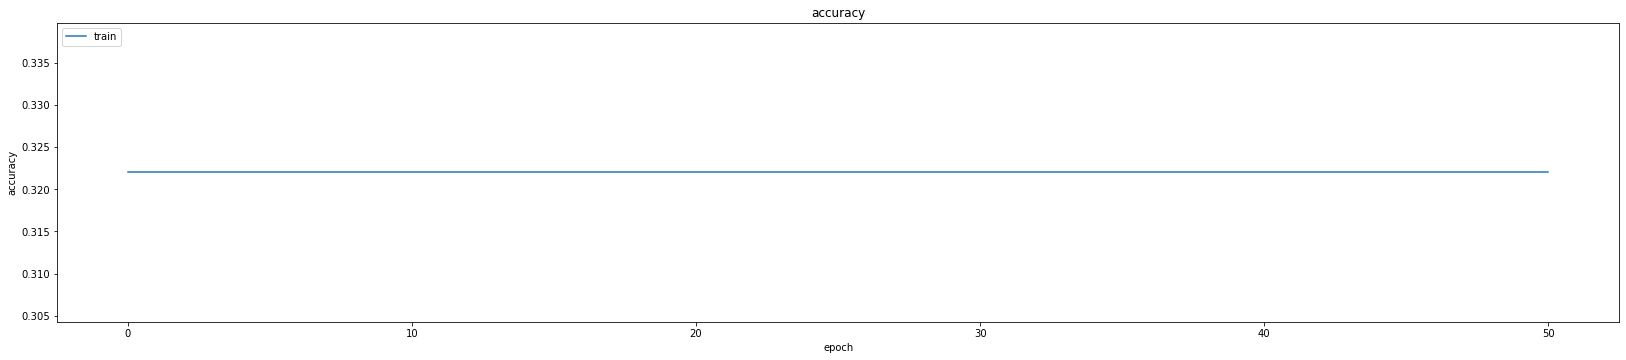

163000 164000


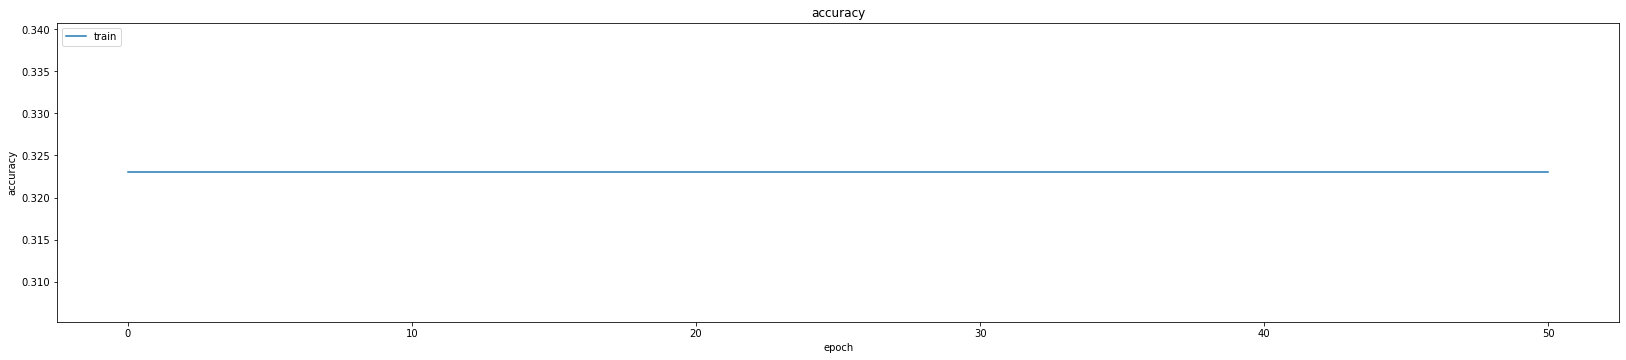

164000 165000


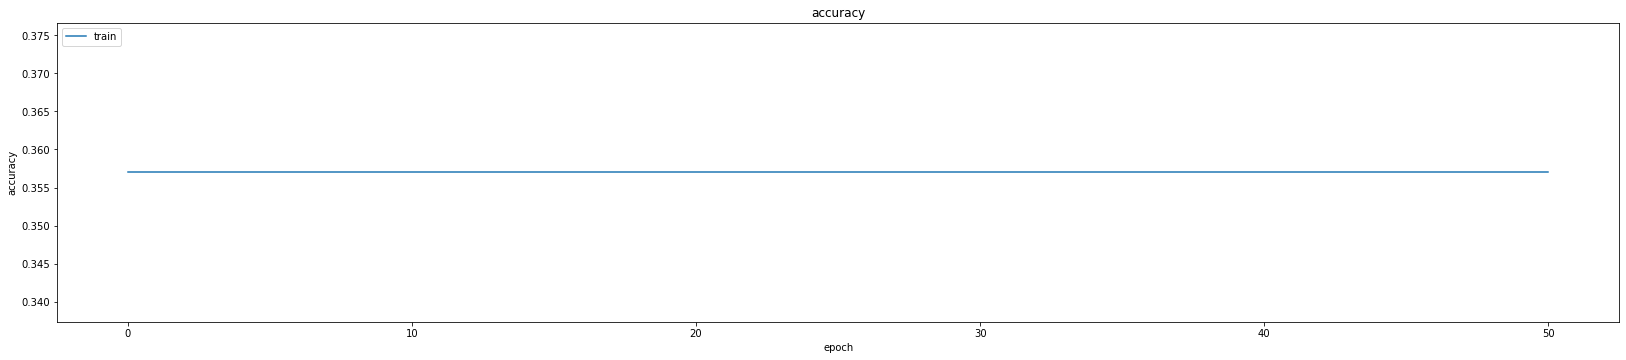

165000 166000


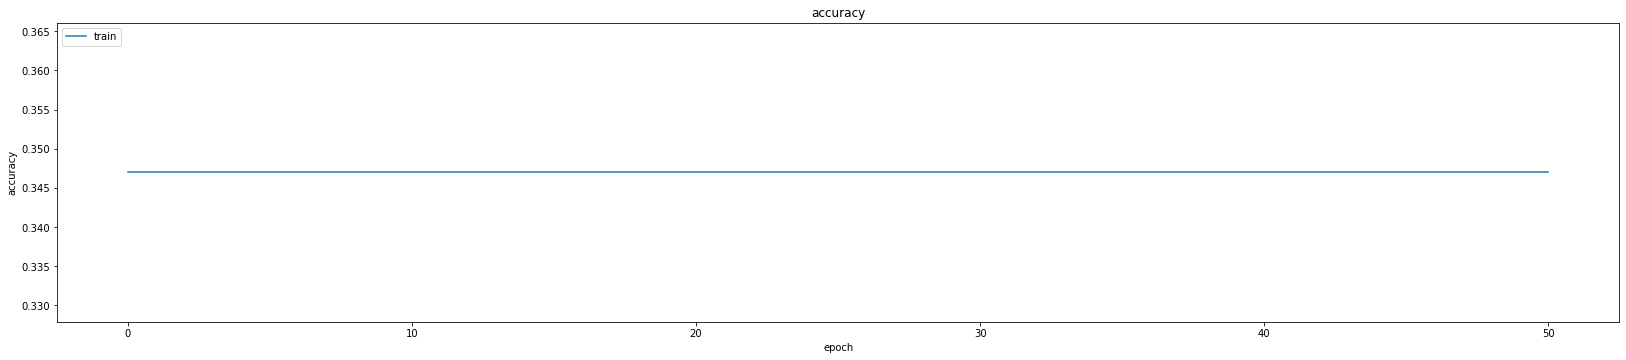

166000 167000


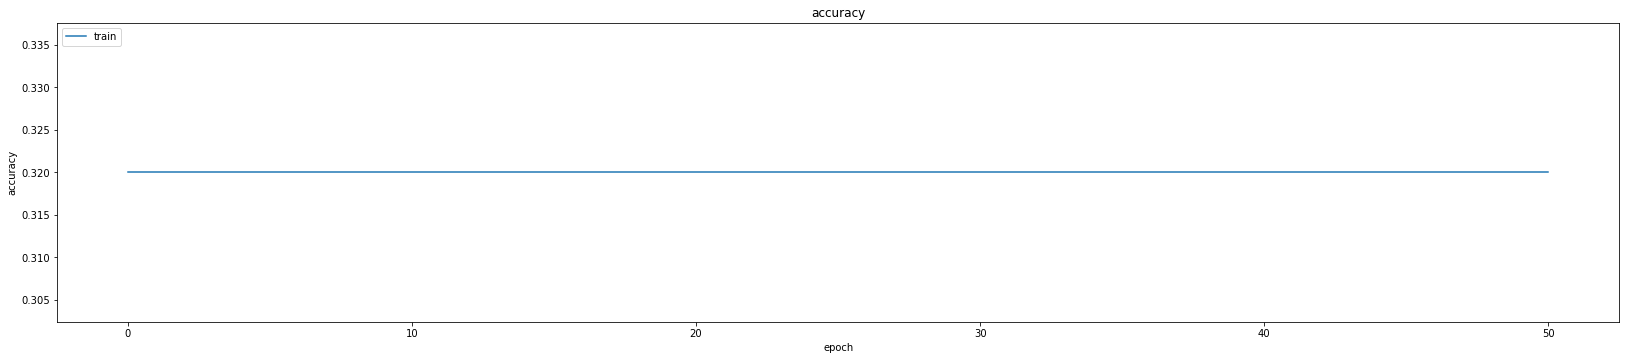

167000 168000


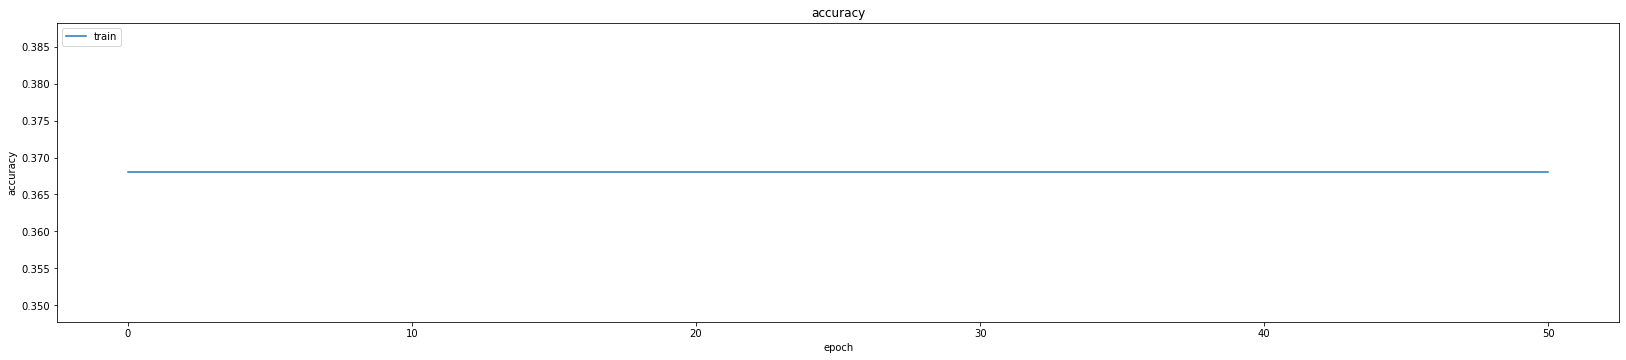

168000 169000


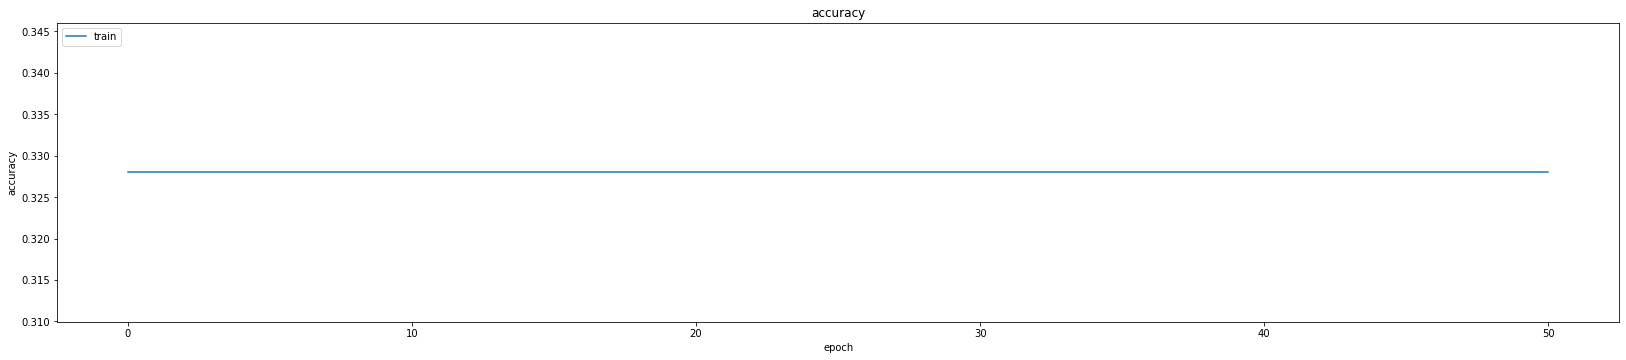

169000 170000


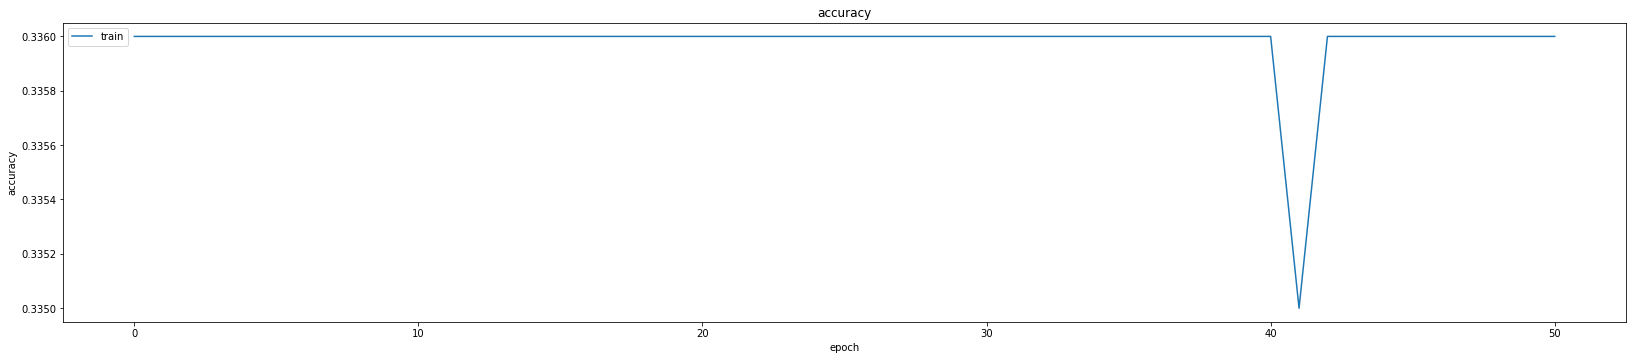

170000 171000


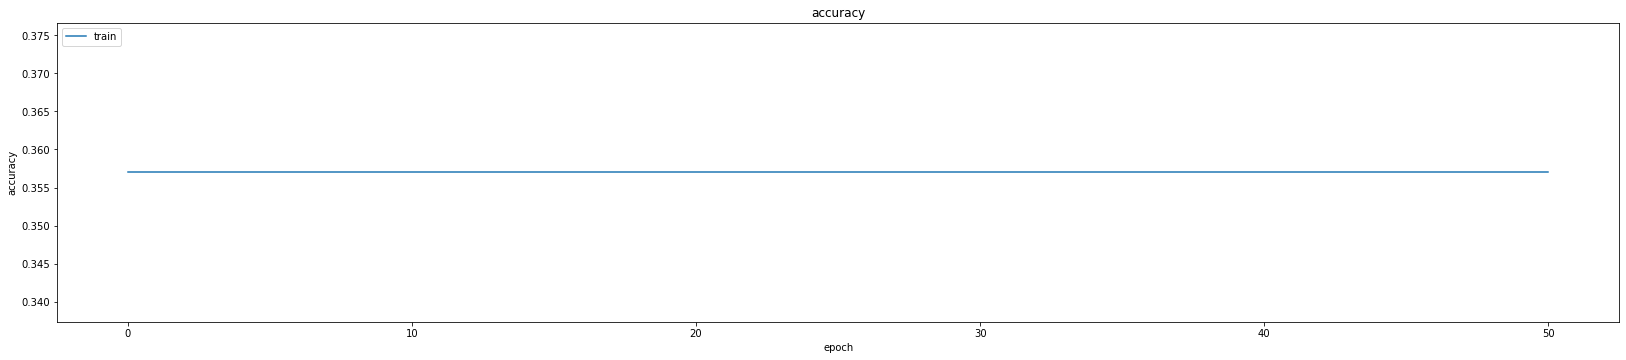

171000 172000


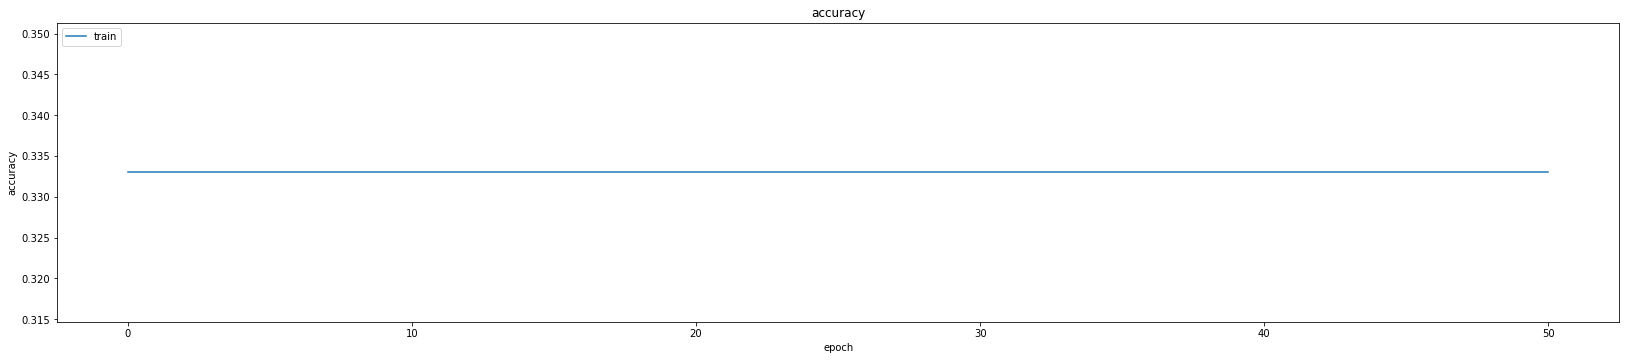

172000 173000


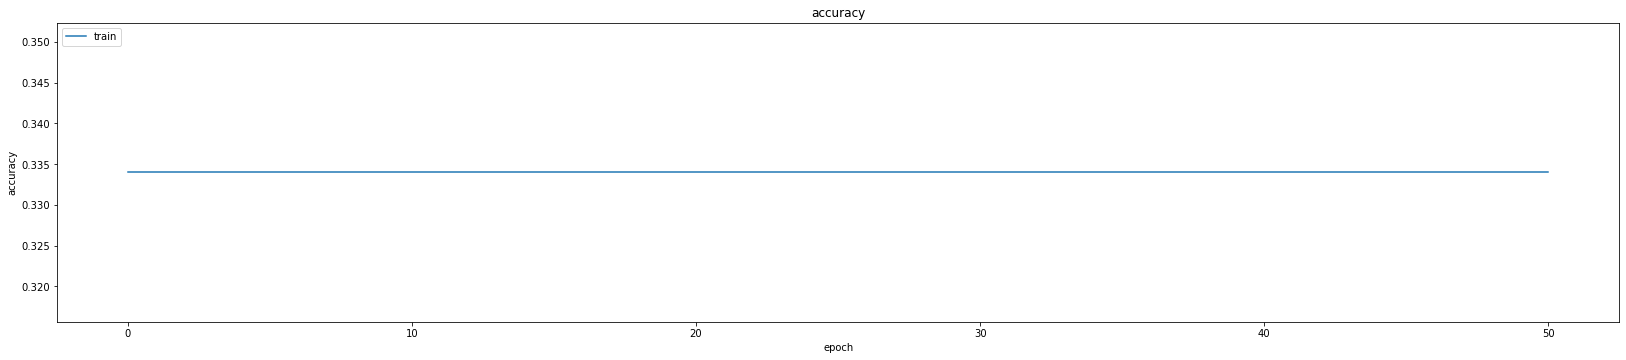

173000 174000


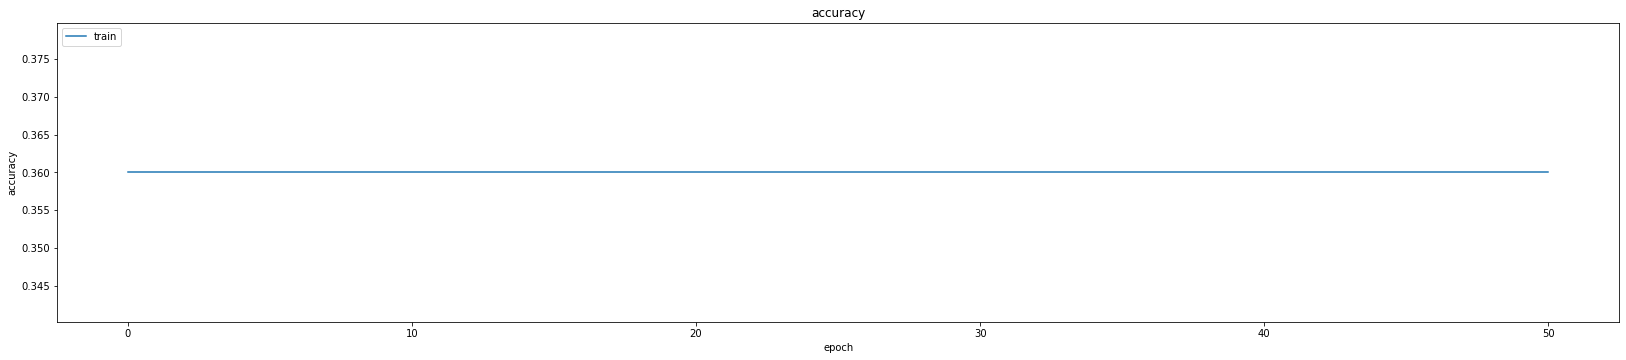

174000 175000


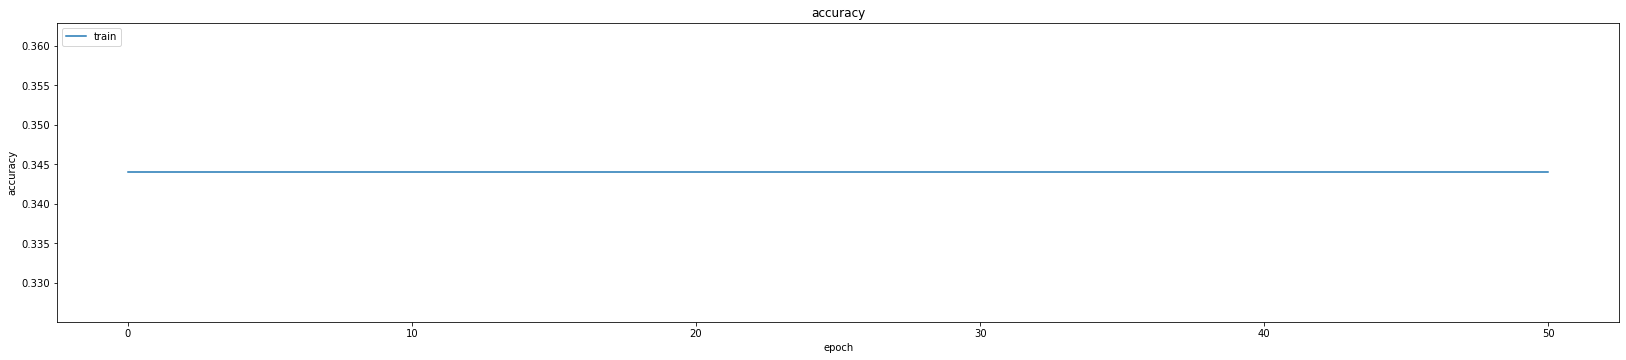

175000 176000


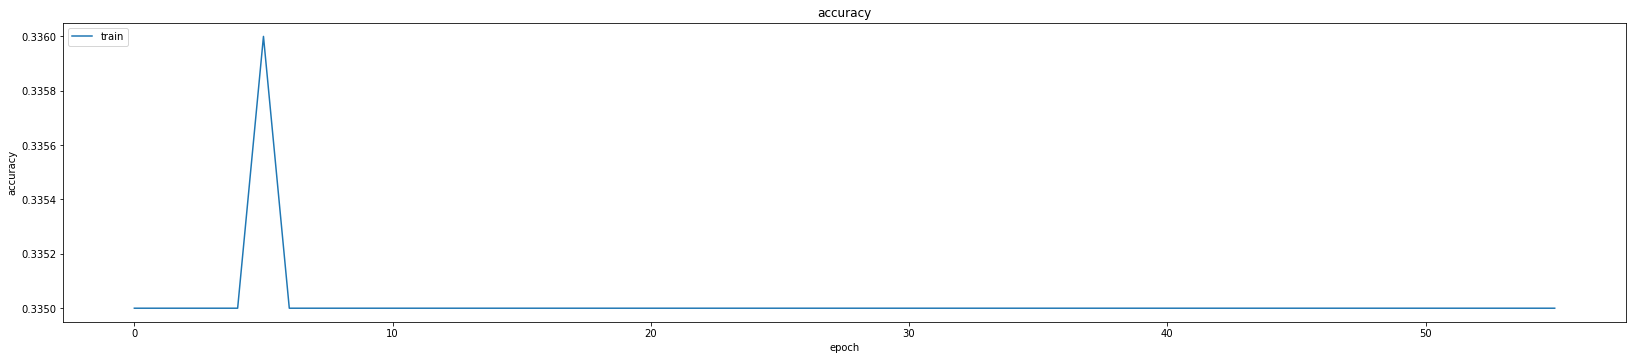

176000 177000


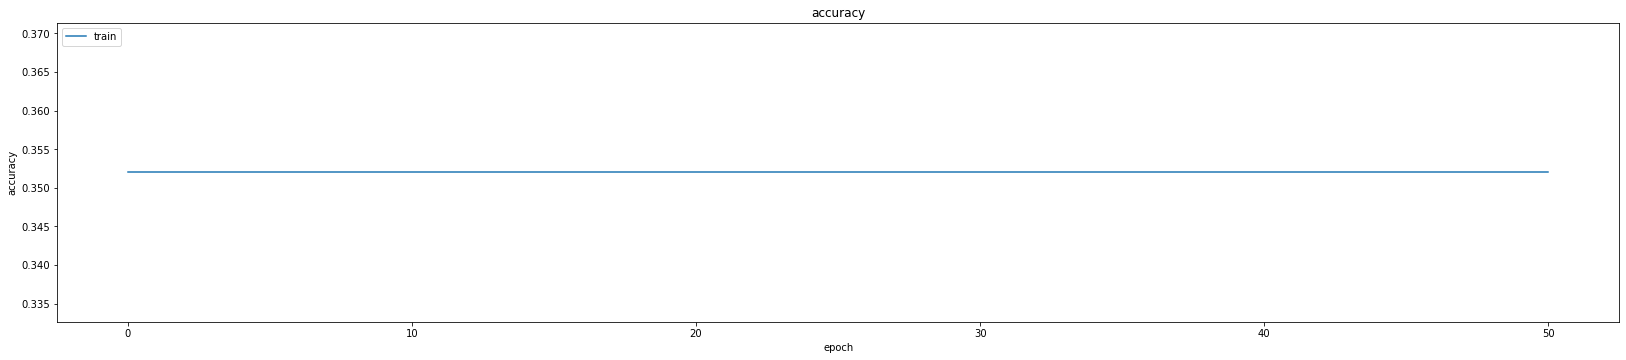

177000 178000


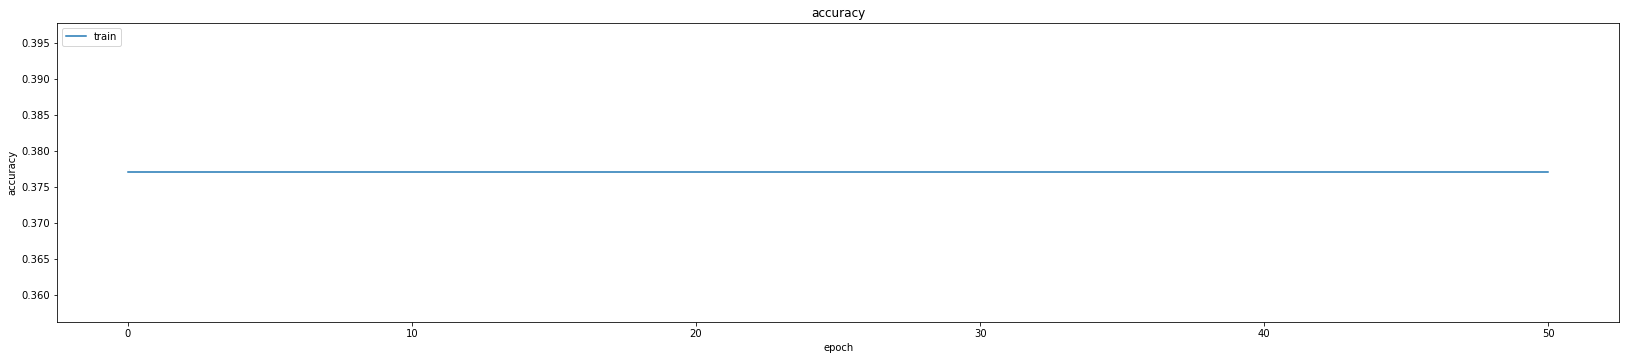

178000 179000


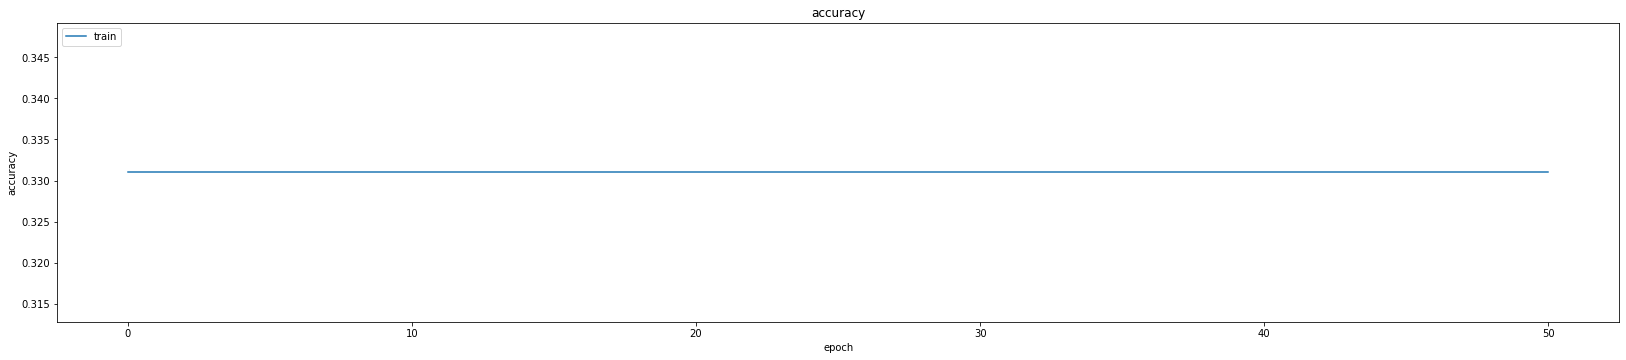

179000 180000


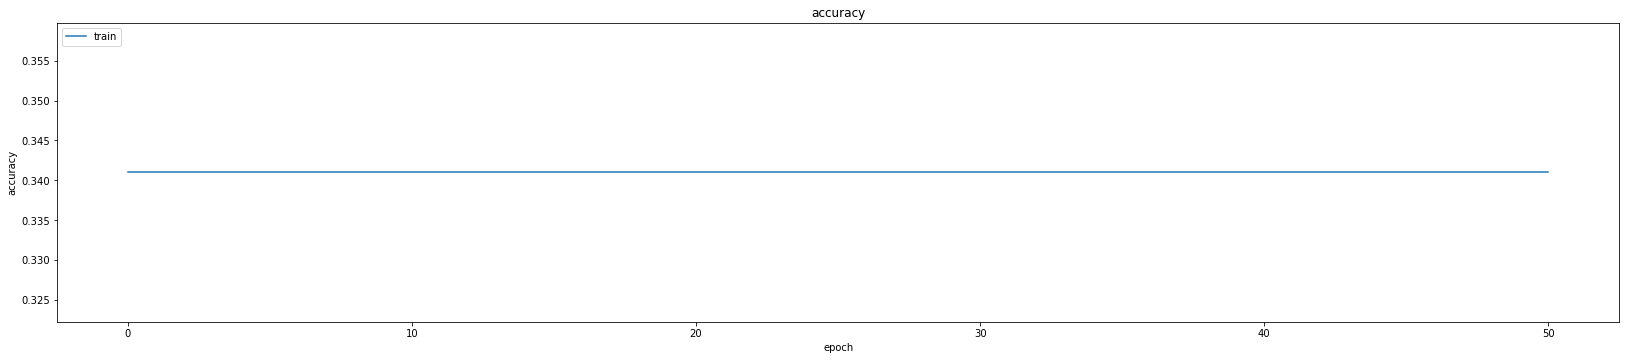

180000 181000


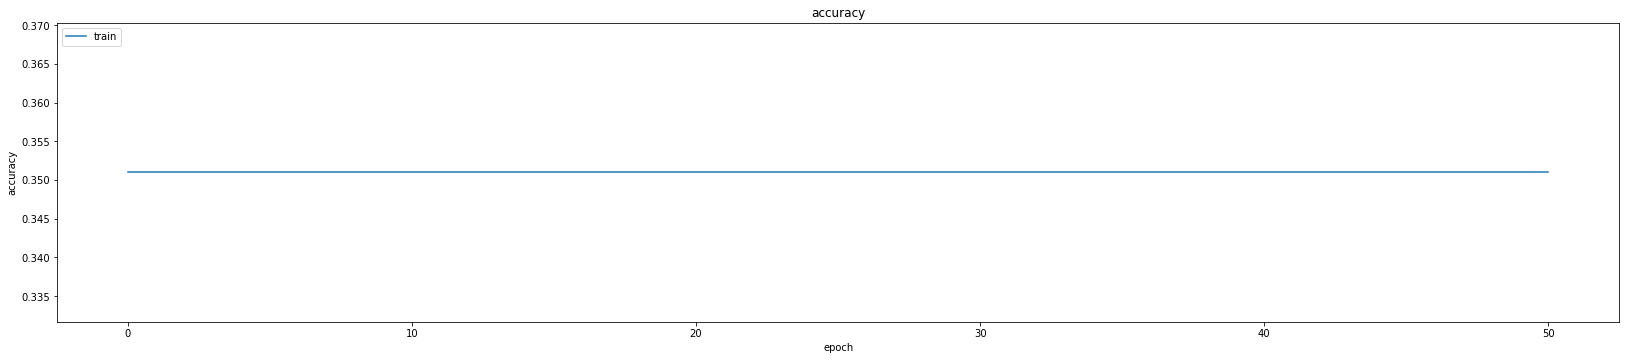

181000 182000


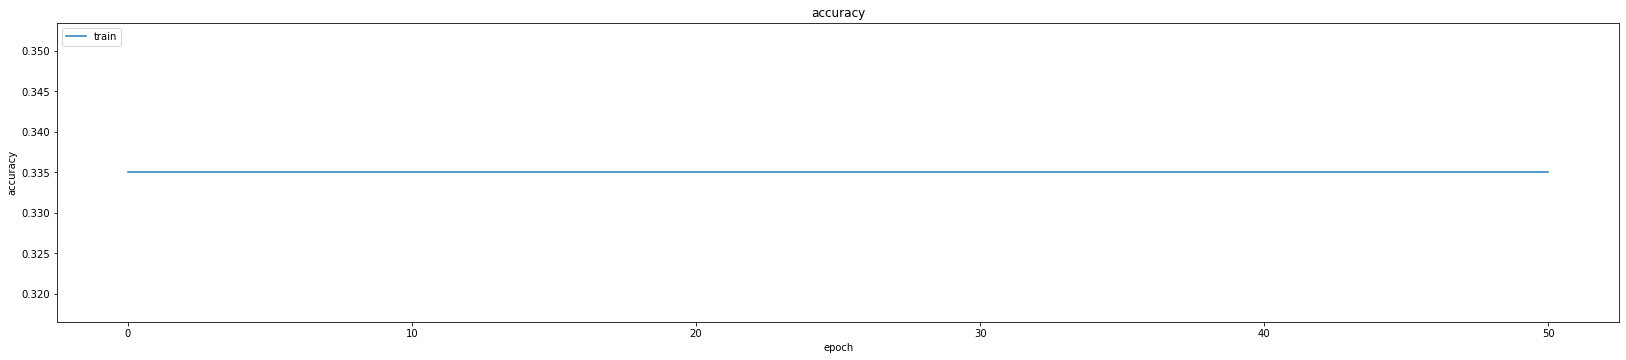

182000 183000


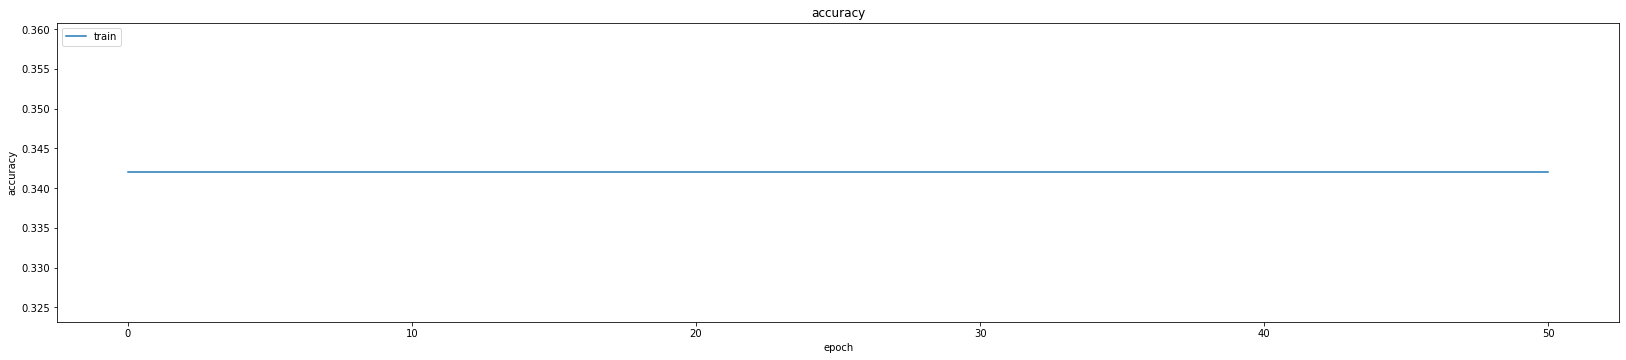

183000 184000


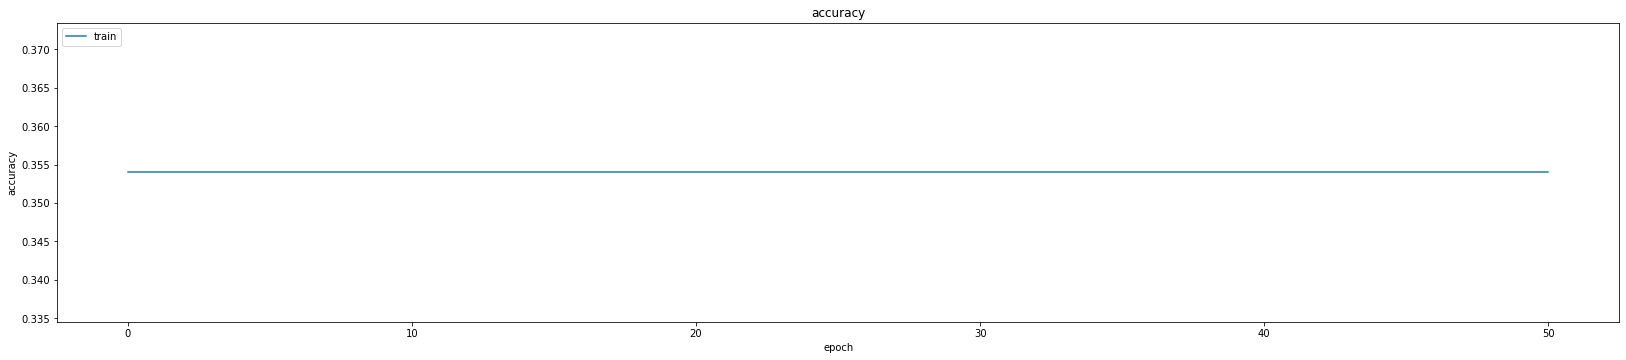

184000 185000


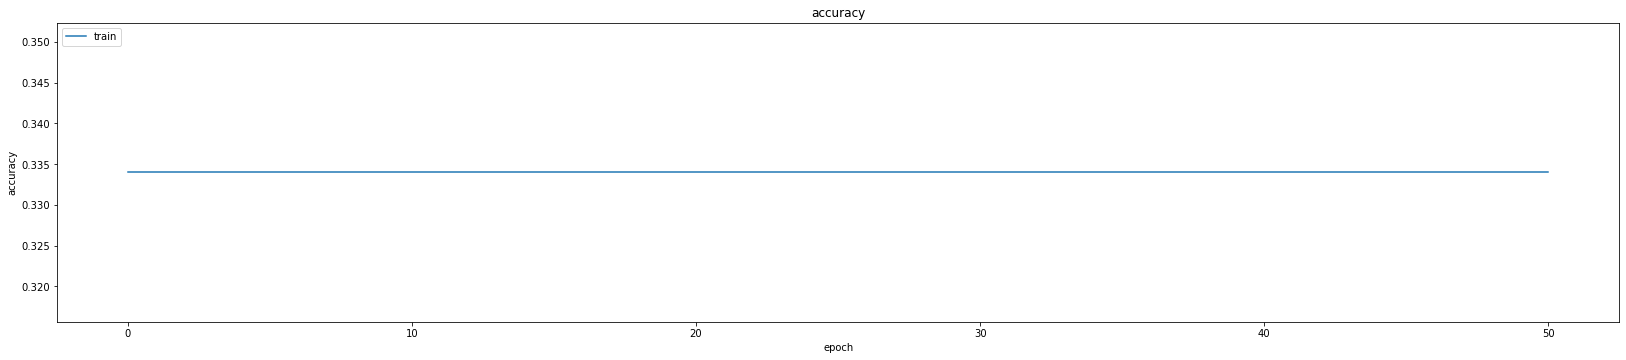

185000 186000


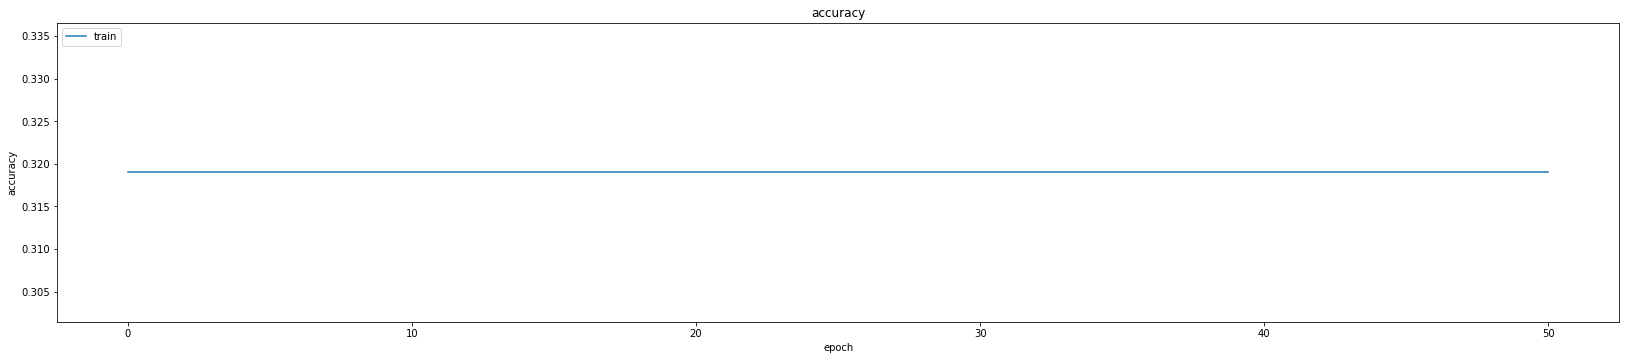

186000 187000


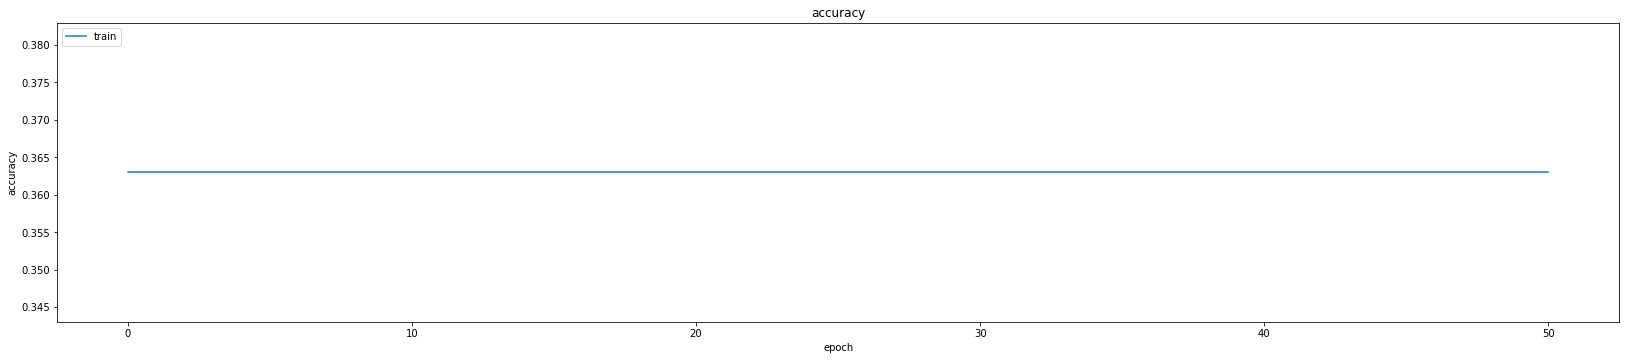

187000 188000


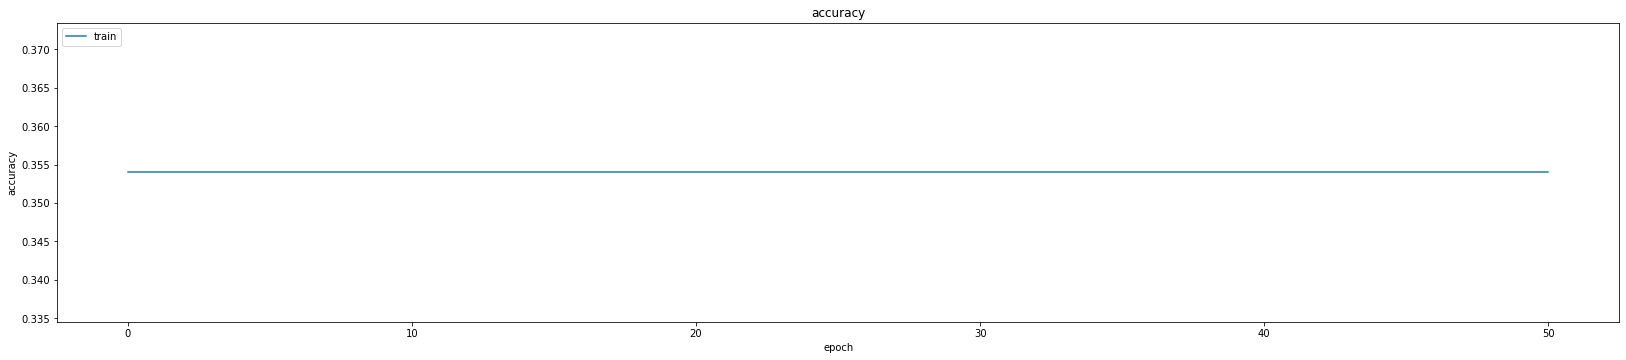

188000 189000


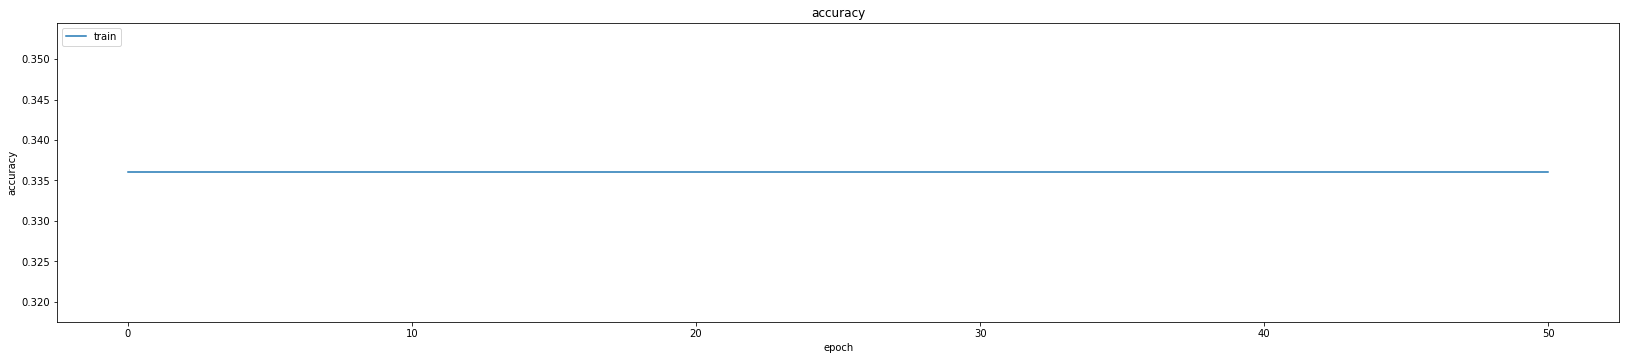

189000 190000


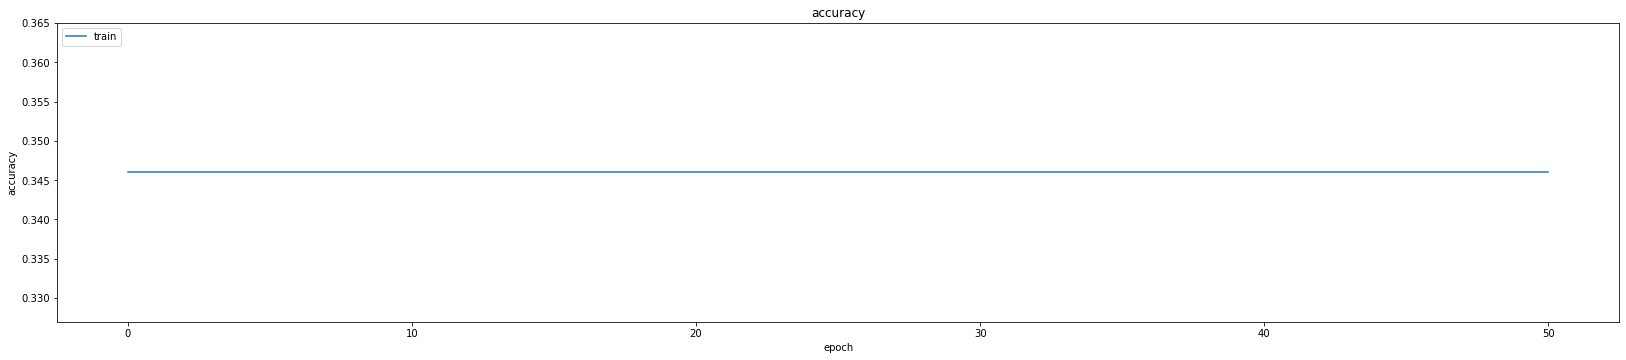

190000 191000


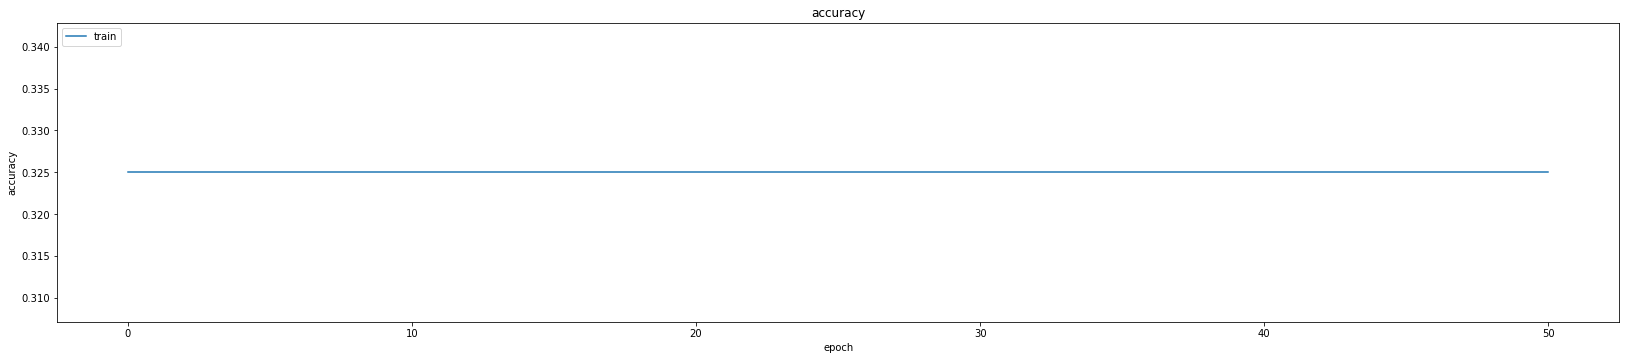

191000 192000


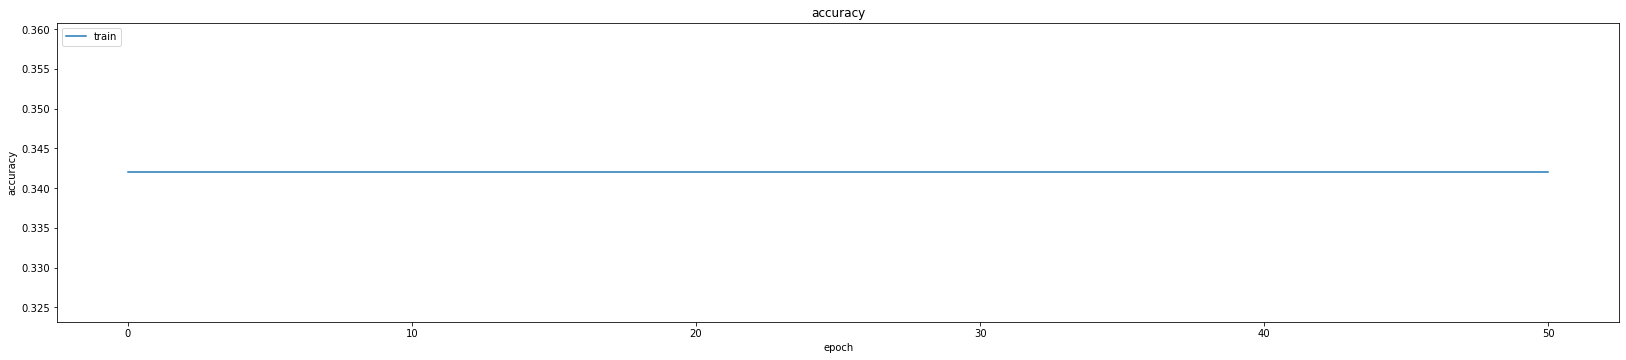

192000 193000


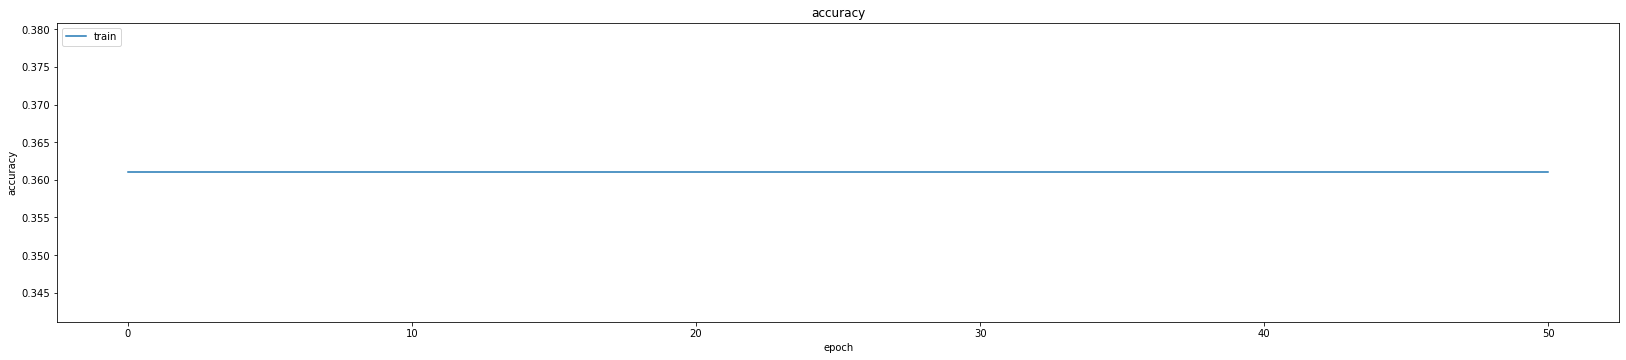

193000 194000


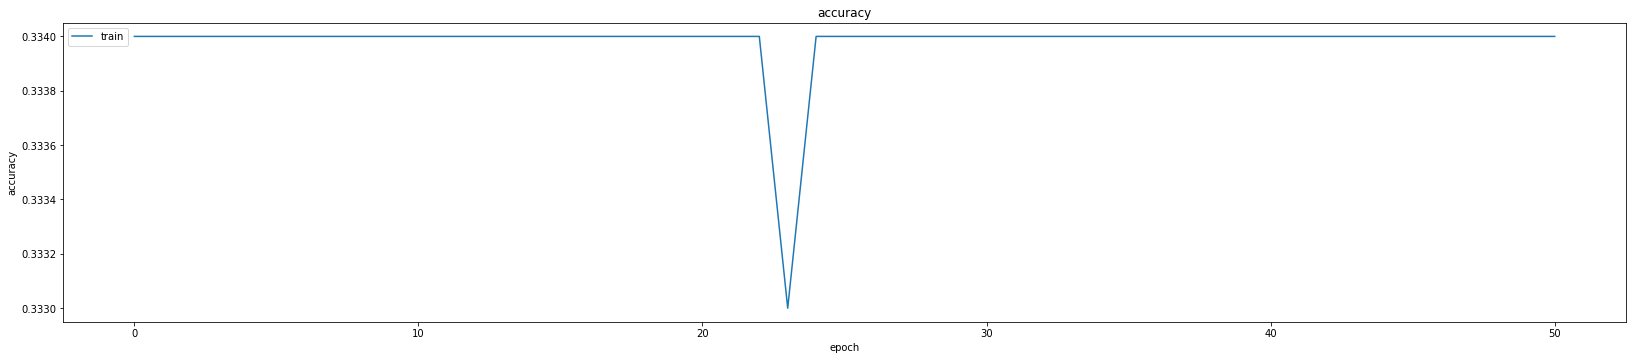

194000 195000


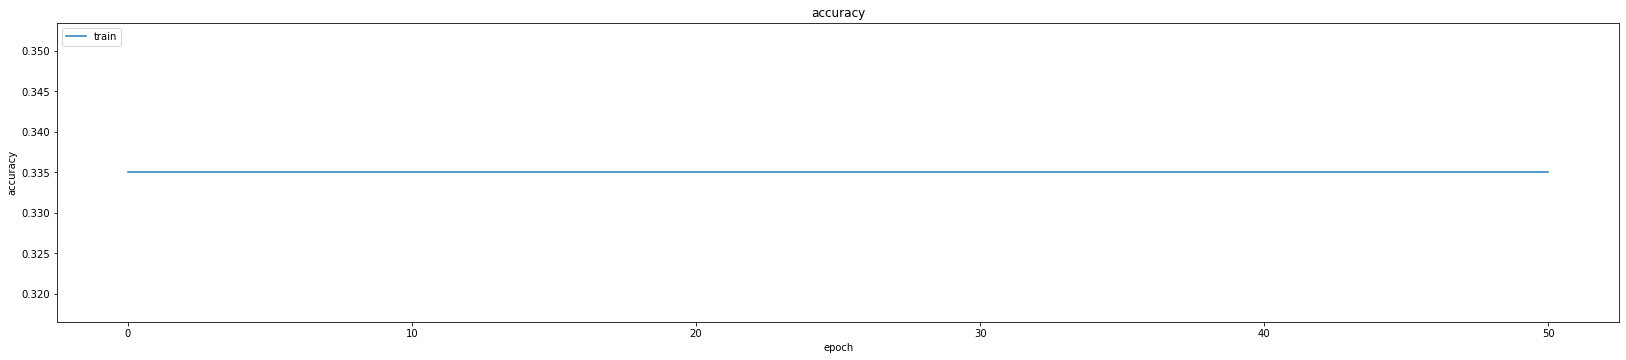

195000 196000


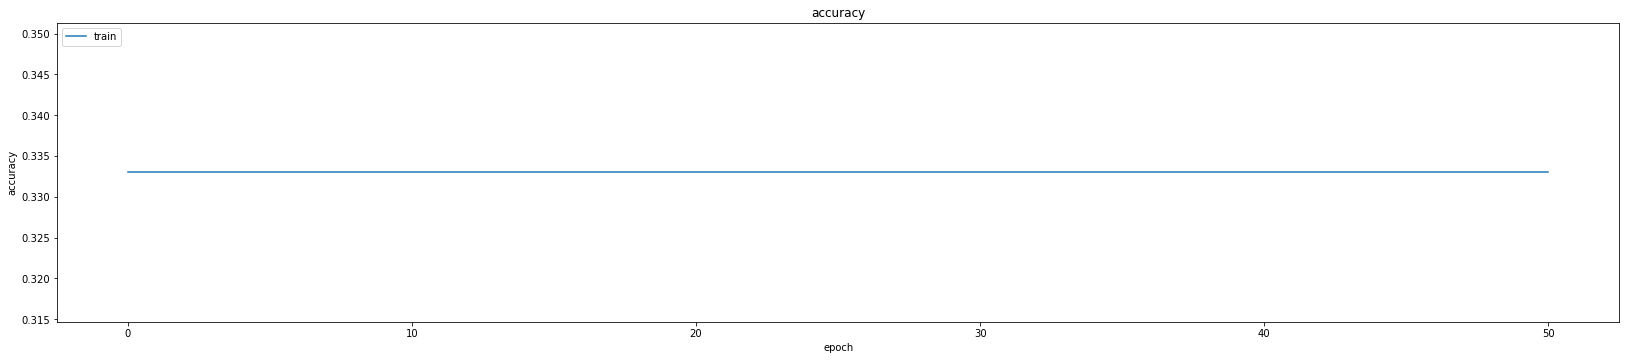

196000 197000


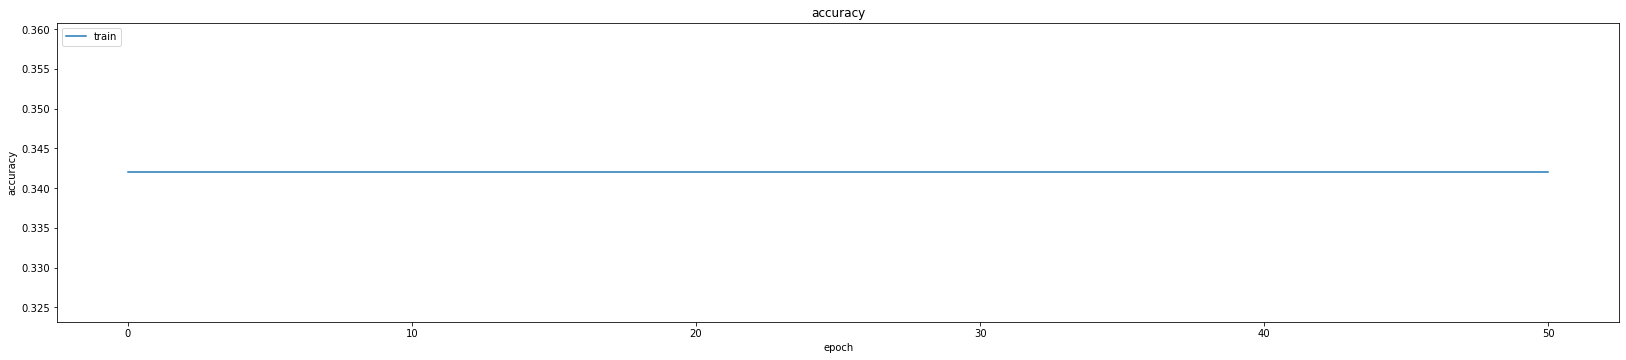

197000 198000


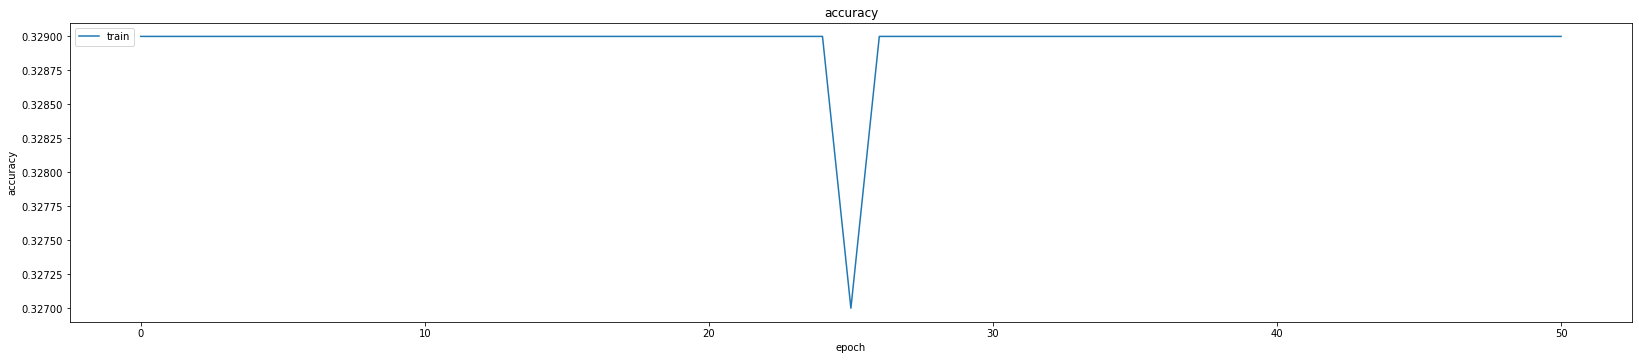

198000 199000


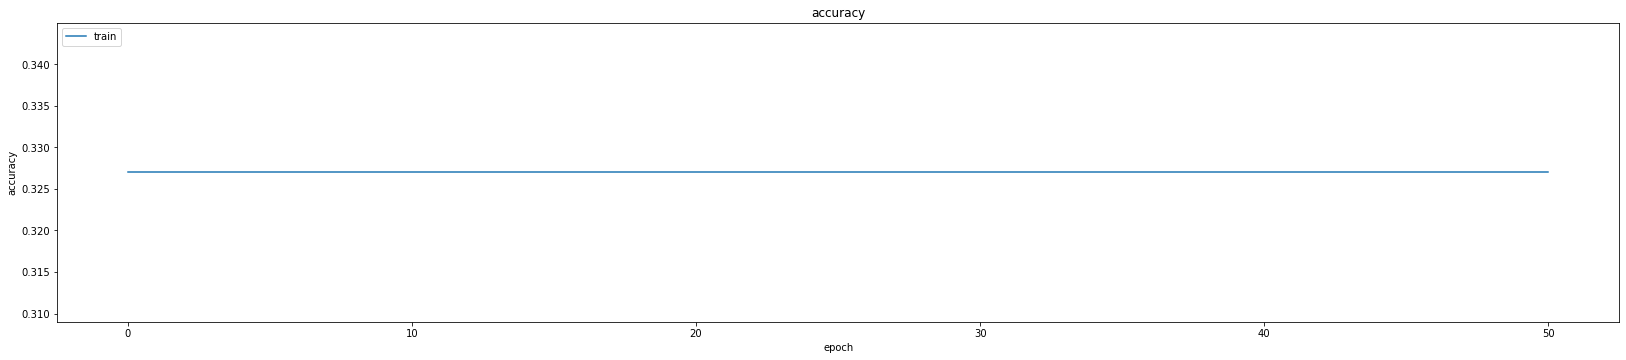

199000 200000


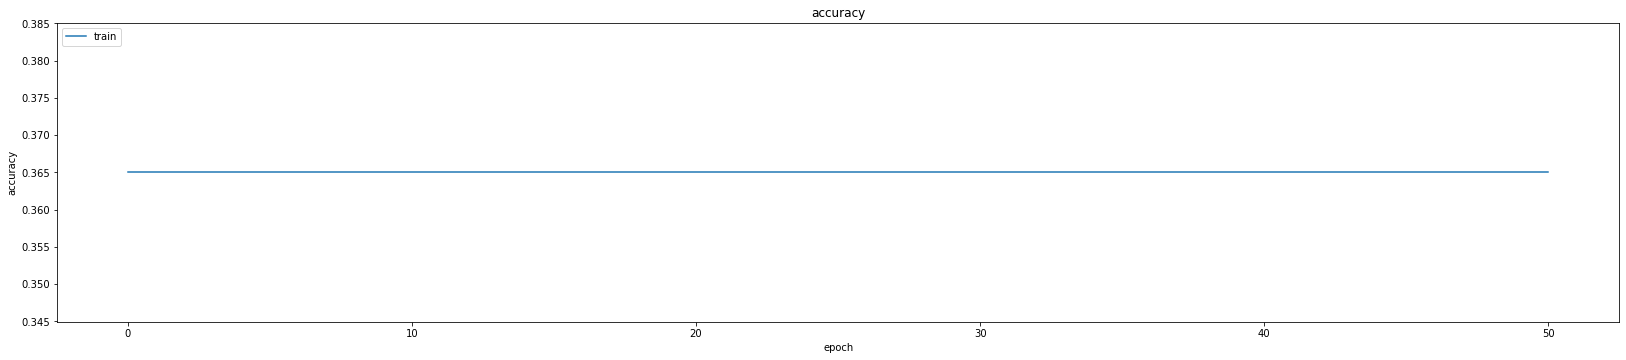

200000 201000


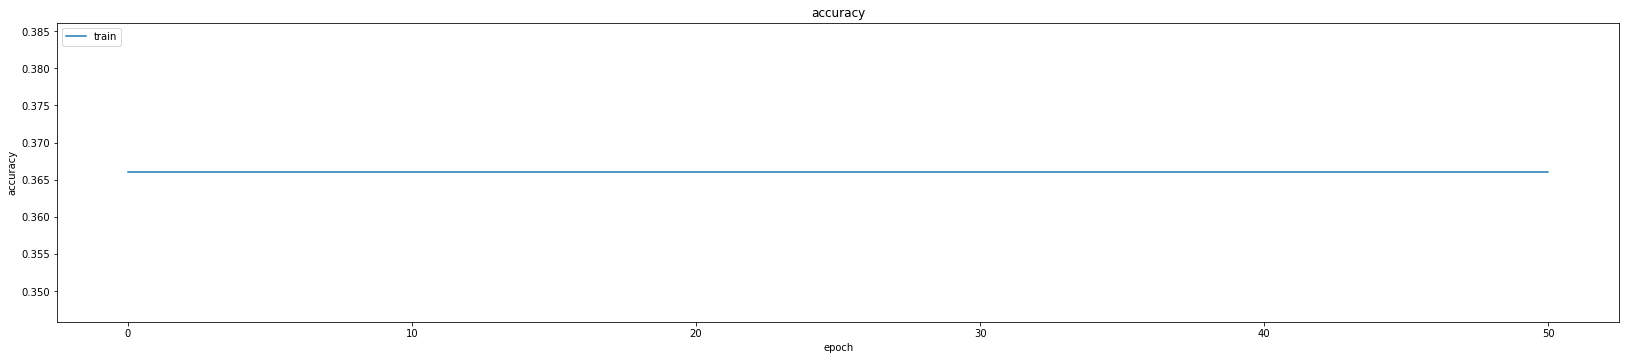

201000 202000


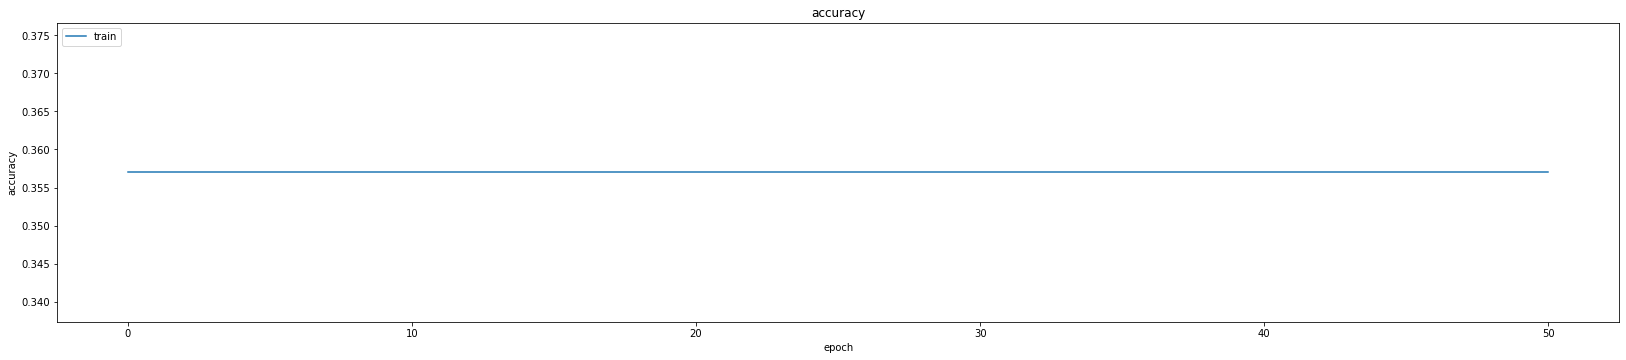

202000 203000


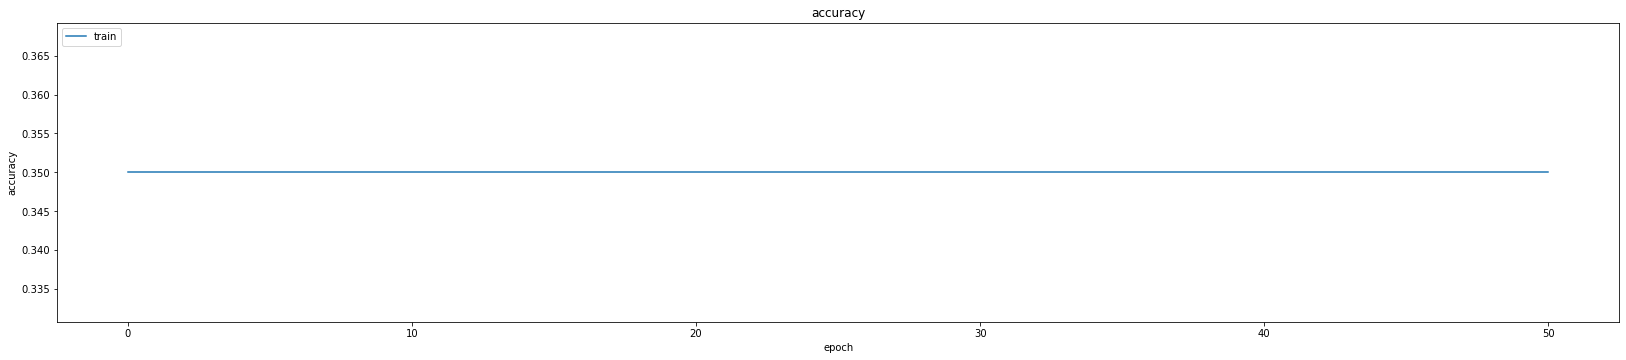

203000 204000


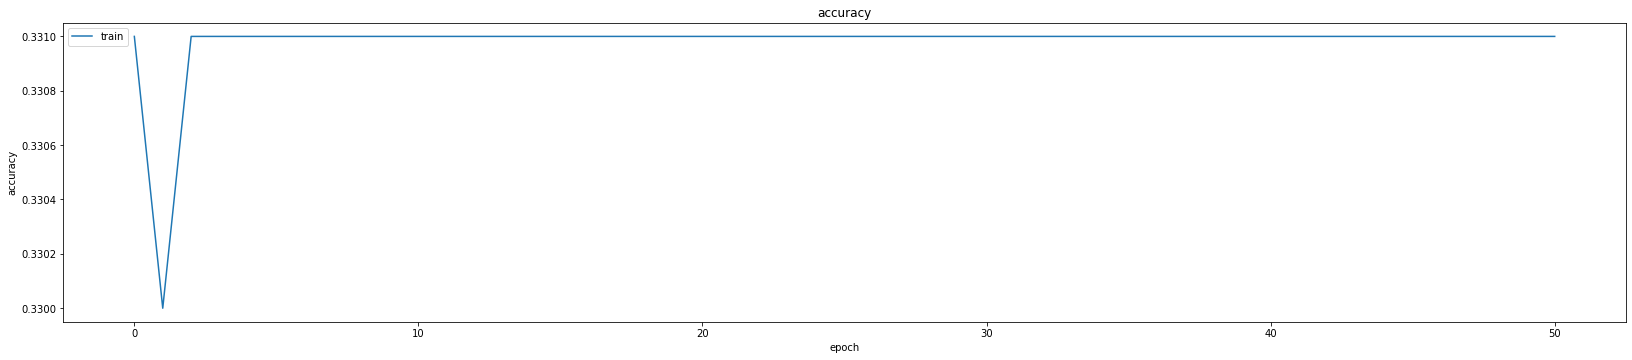

204000 205000


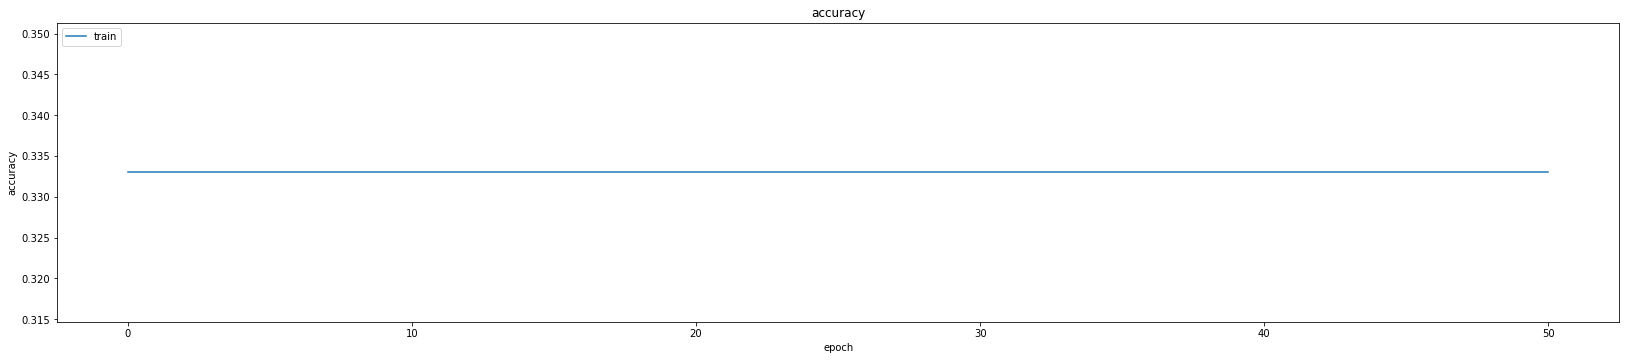

205000 206000


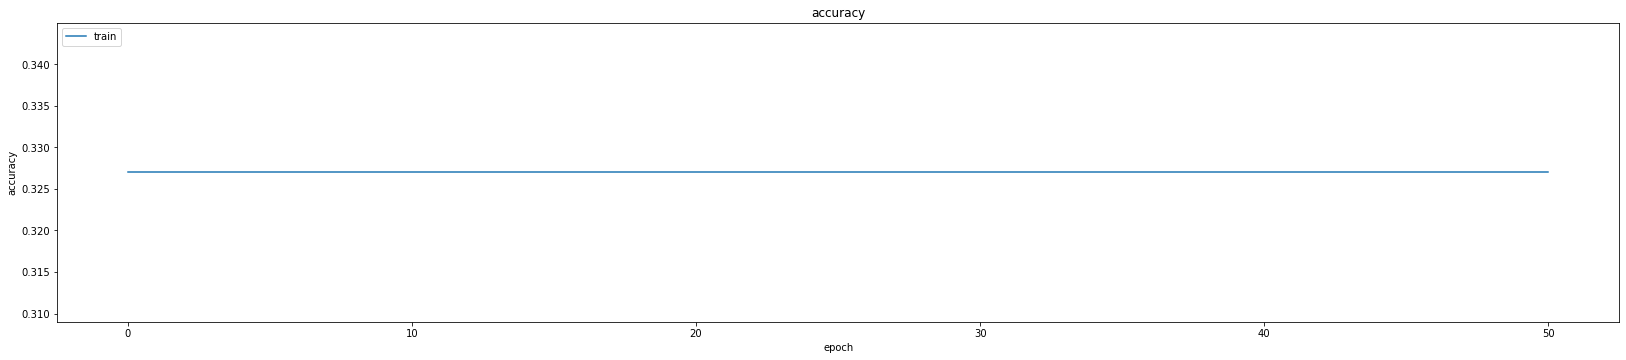

206000 207000


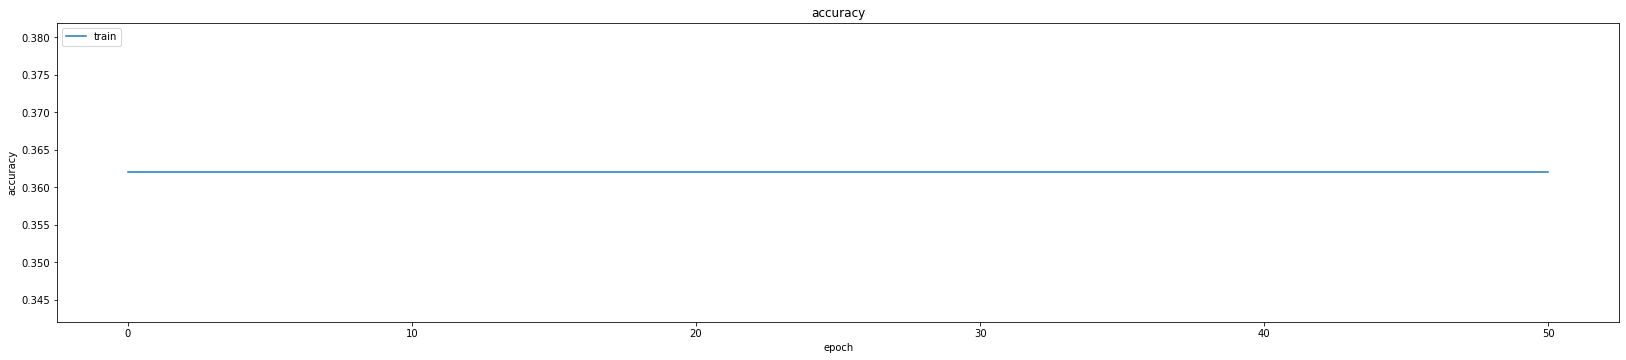

207000 208000


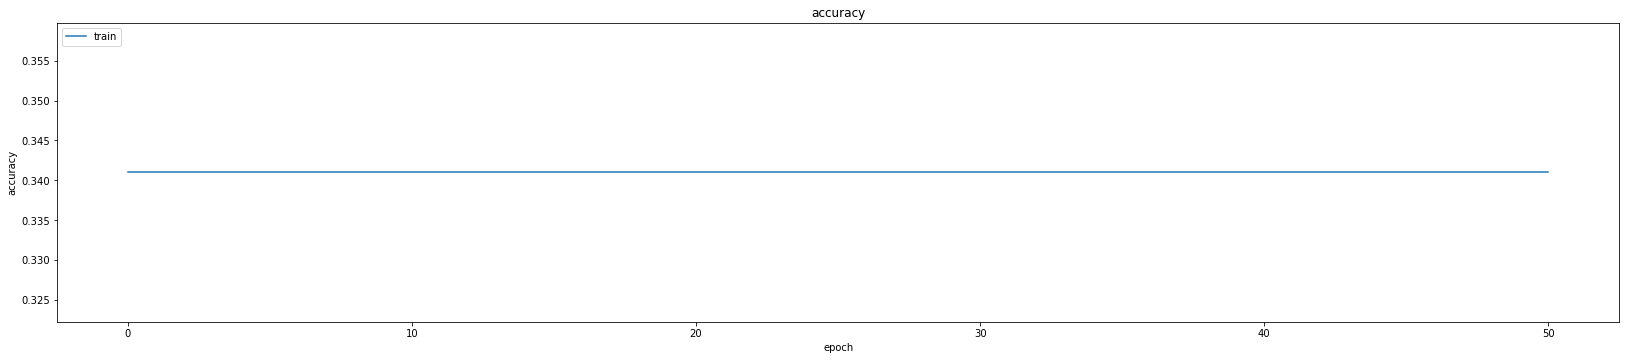

208000 209000


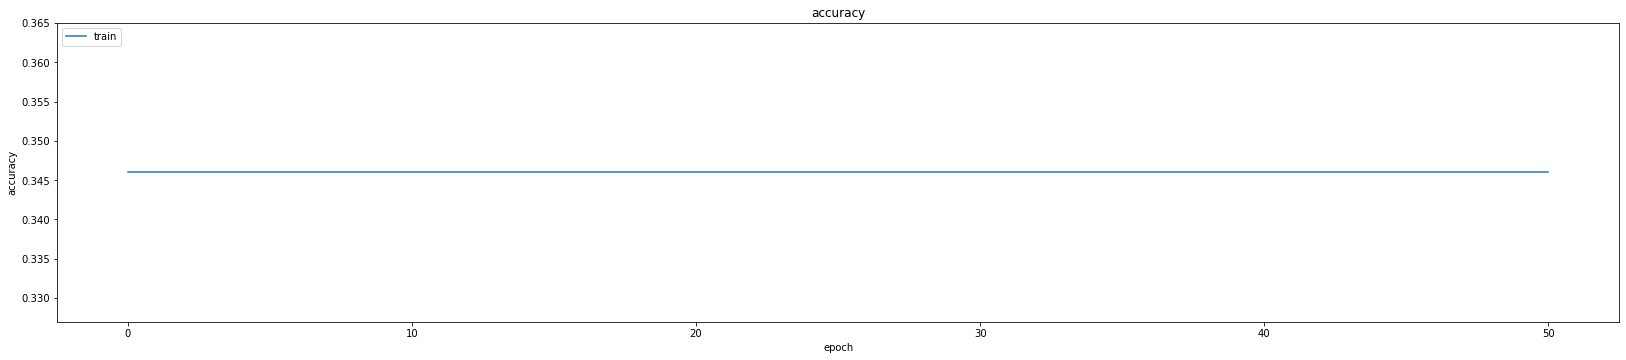

209000 210000


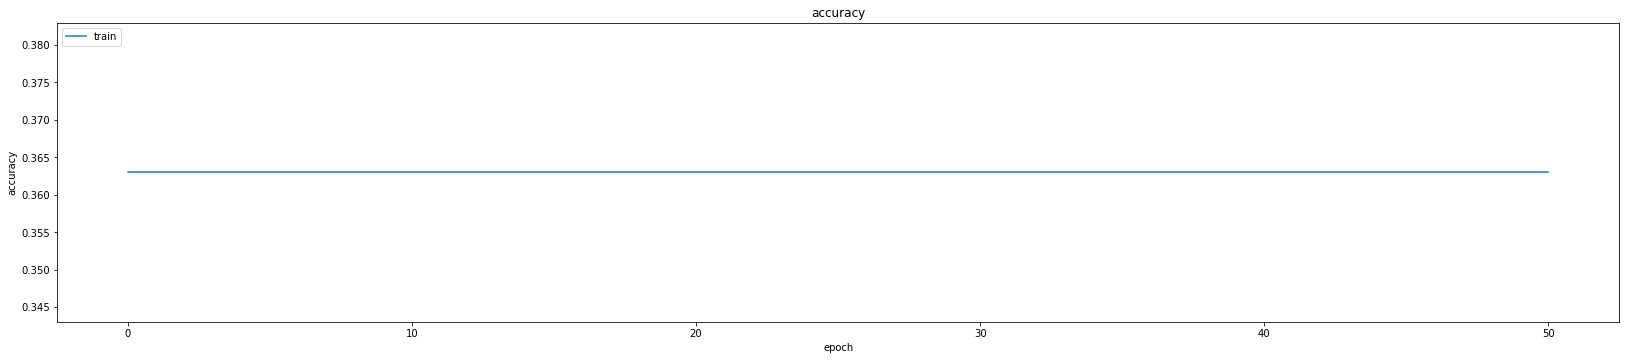

210000 211000


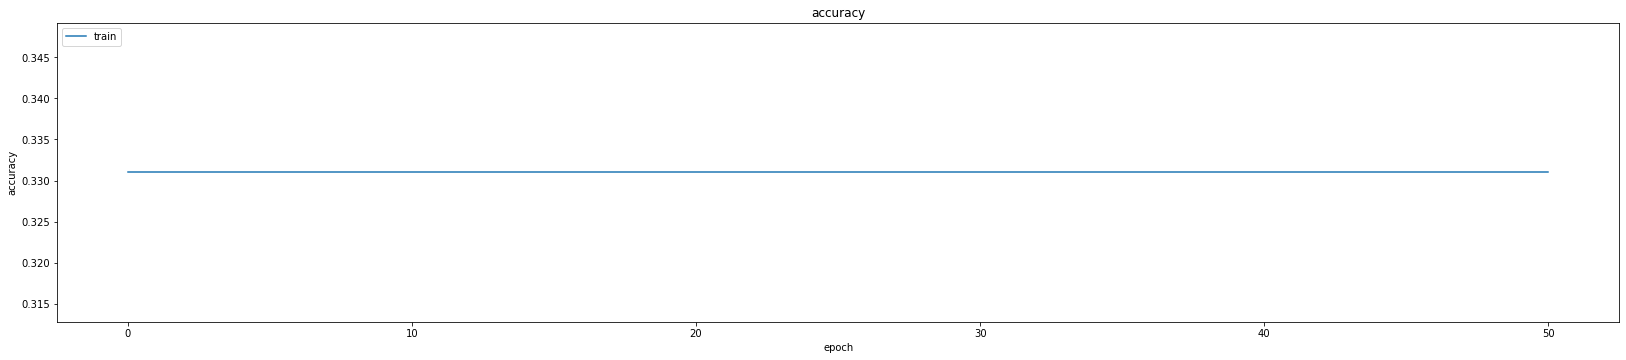

211000 212000


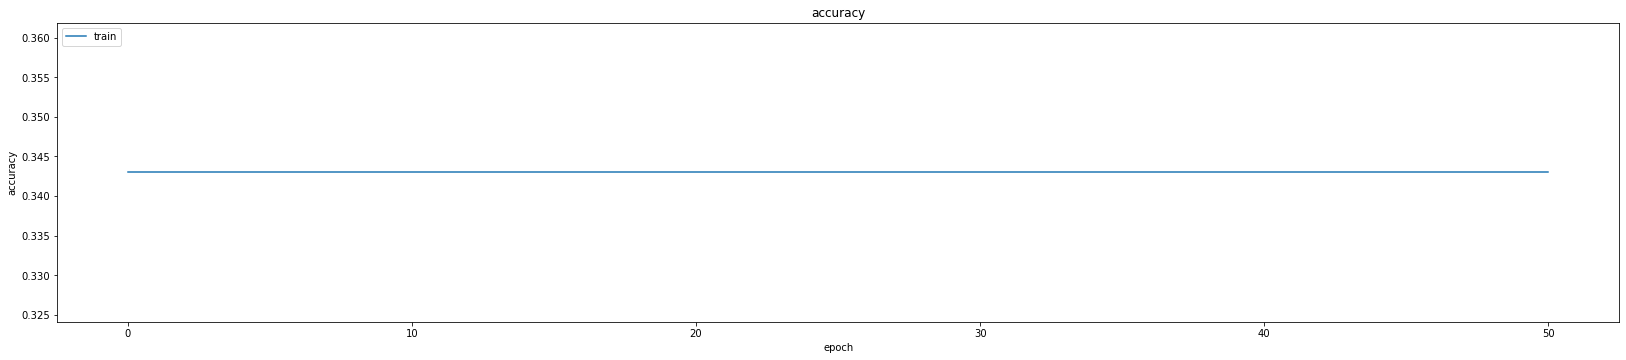

212000 213000


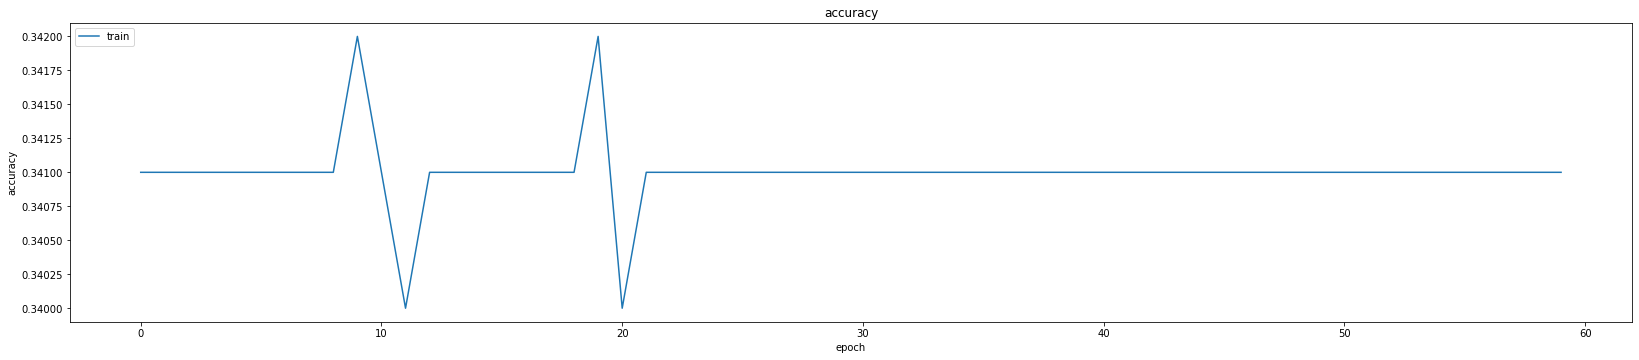

213000 214000


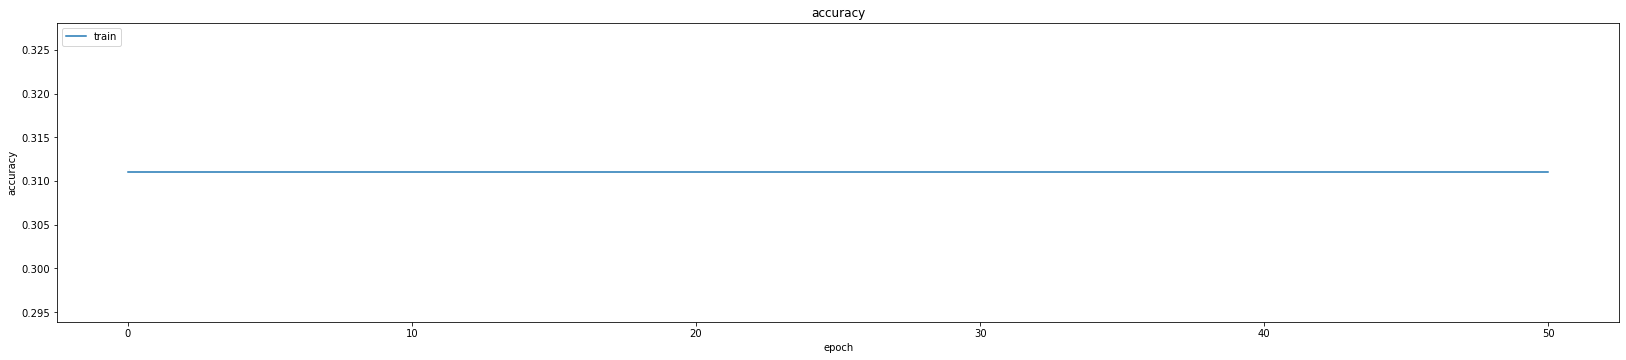

214000 215000


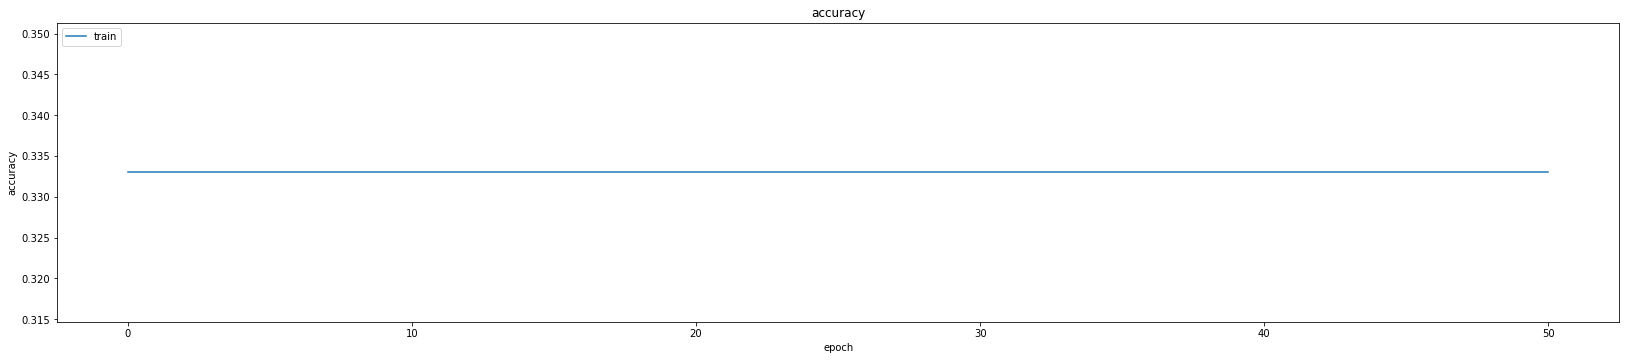

215000 216000


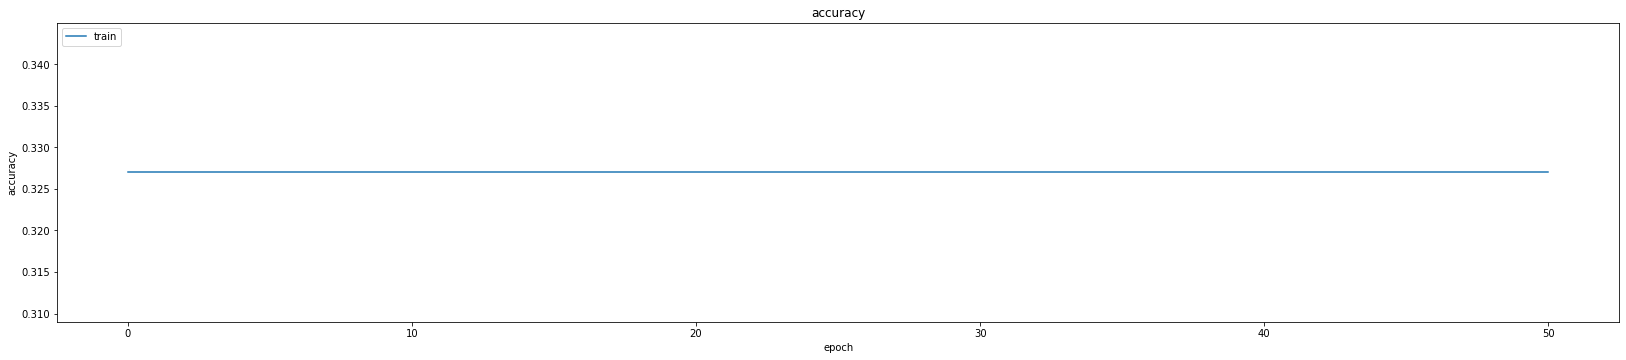

216000 217000


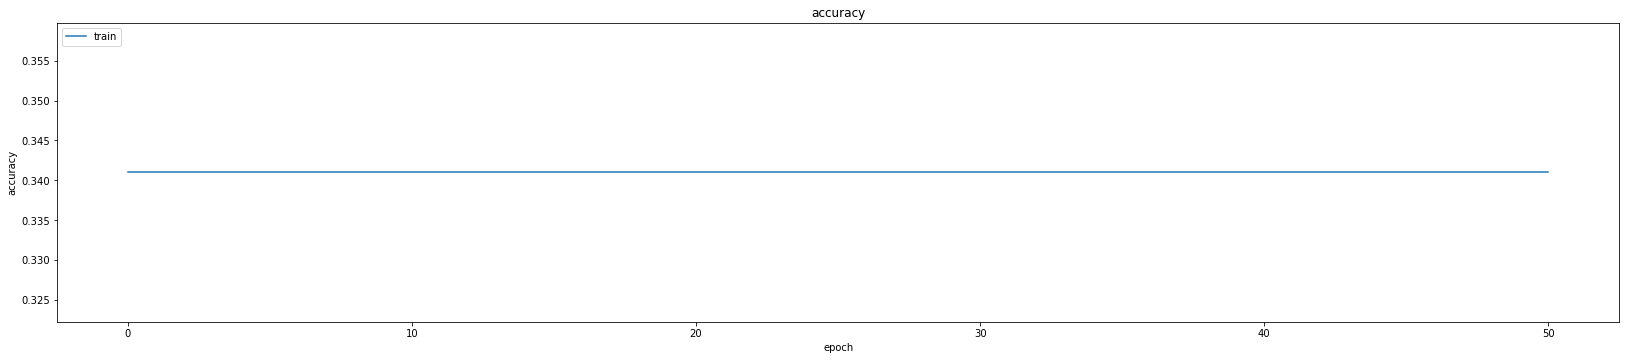

217000 218000


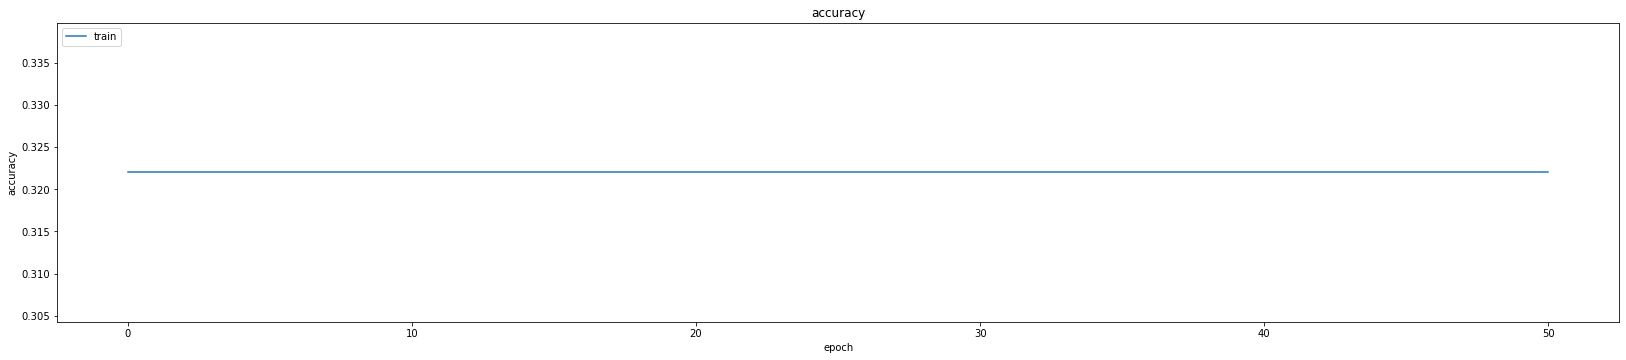

218000 219000


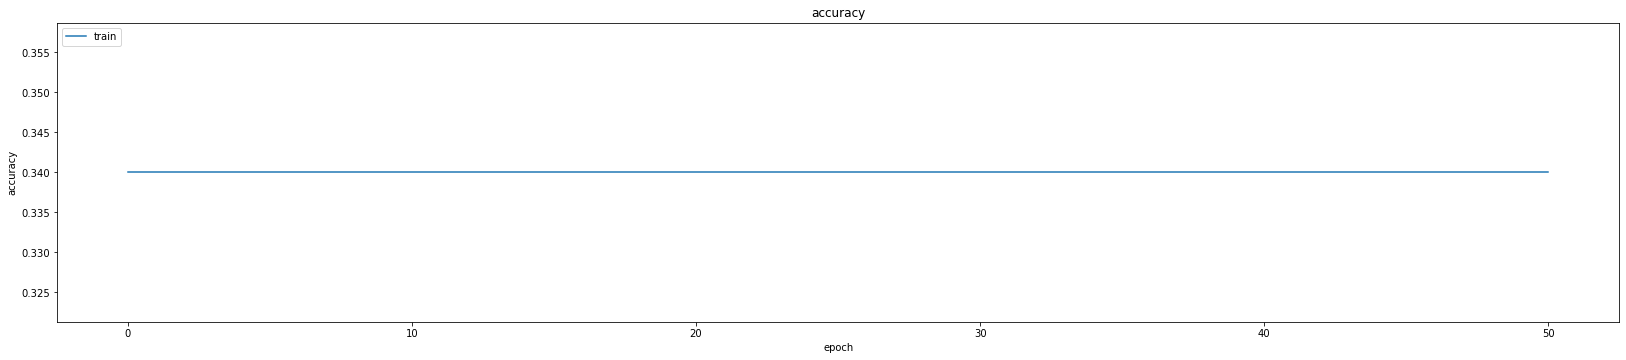

219000 220000


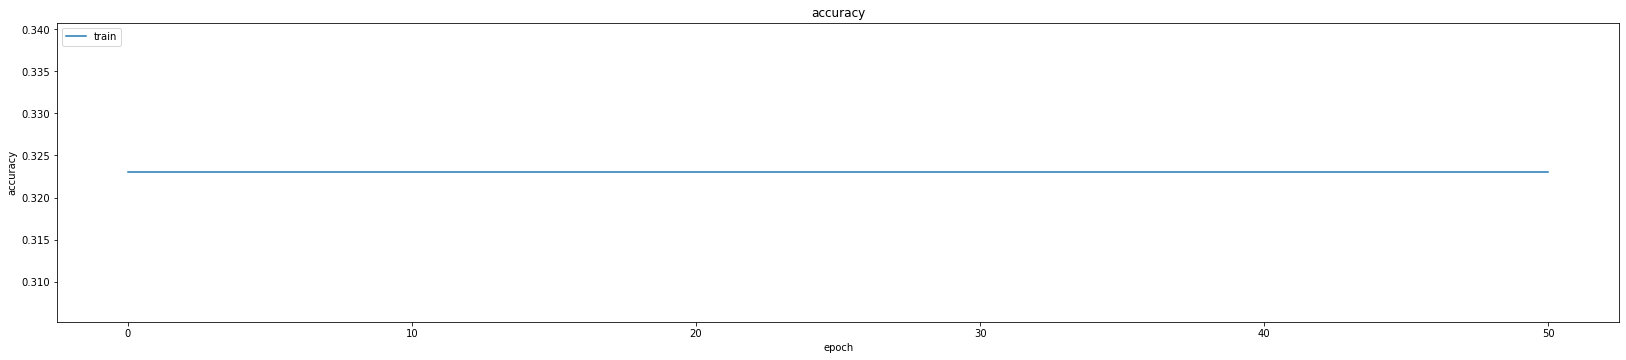

220000 221000


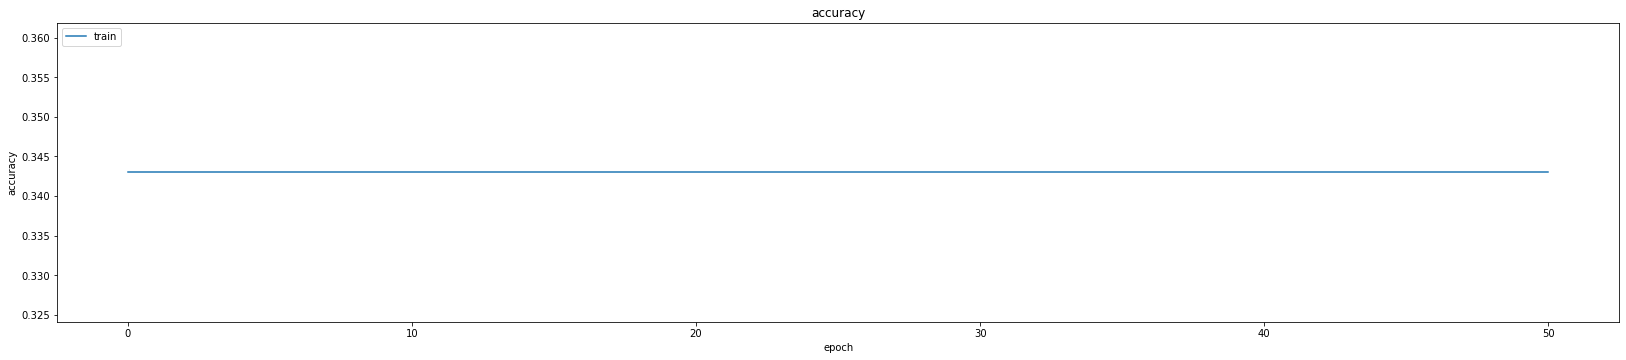

221000 222000


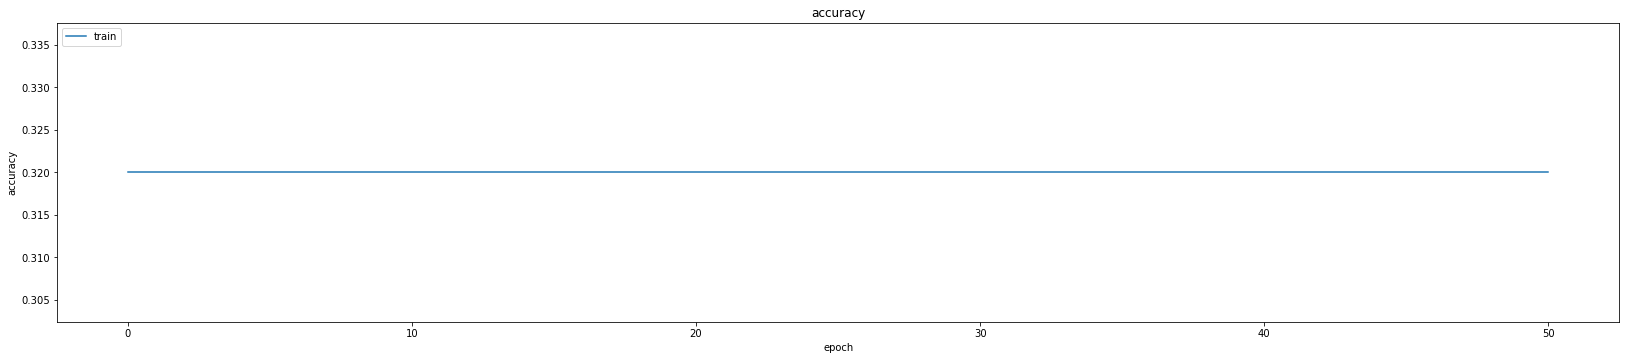

222000 223000


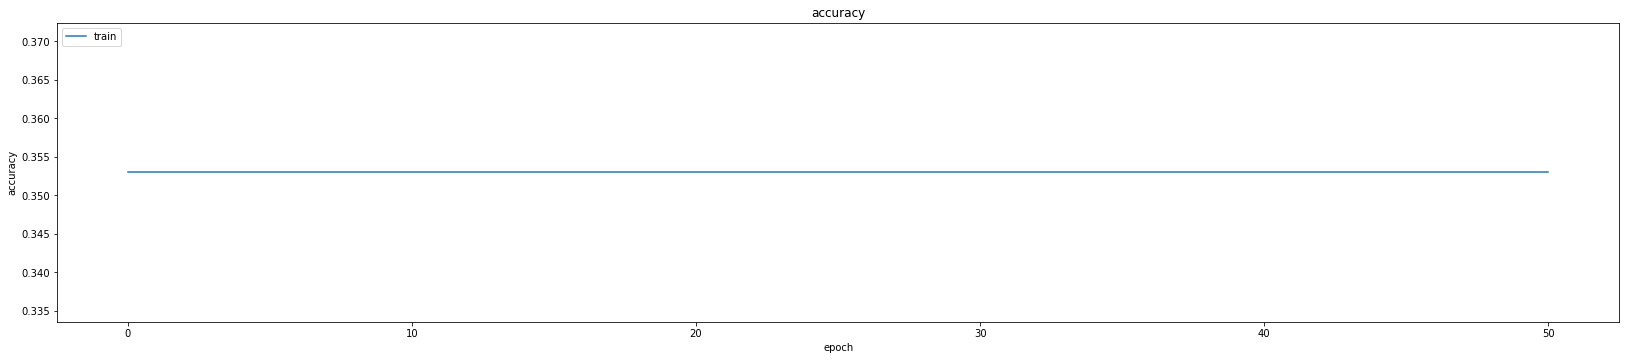

223000 224000


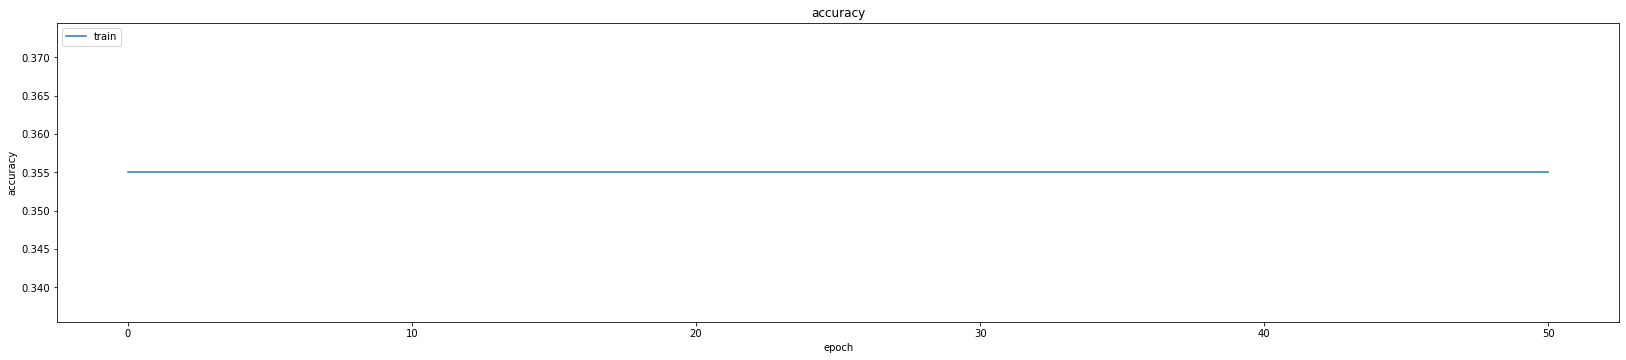

224000 225000


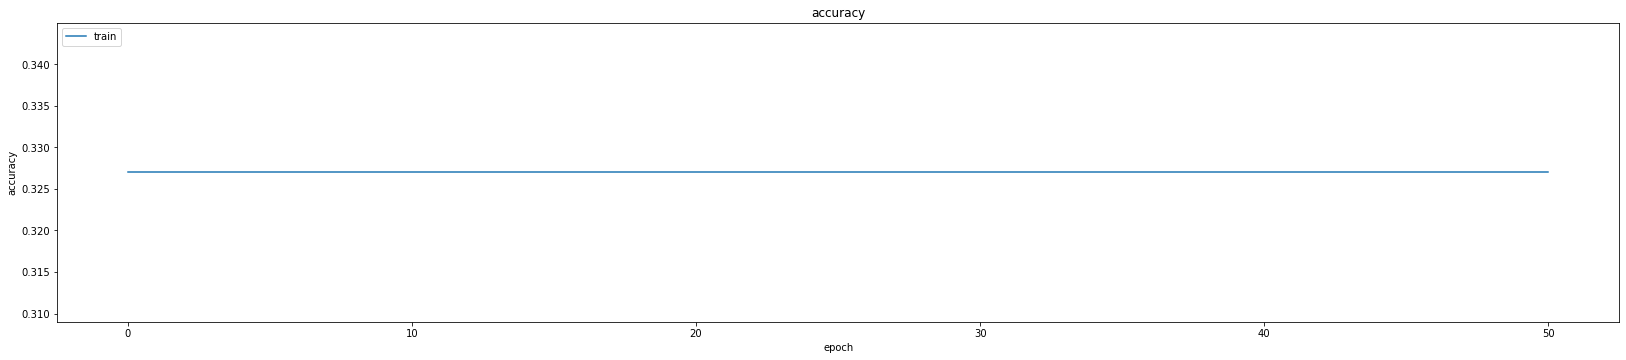

225000 226000


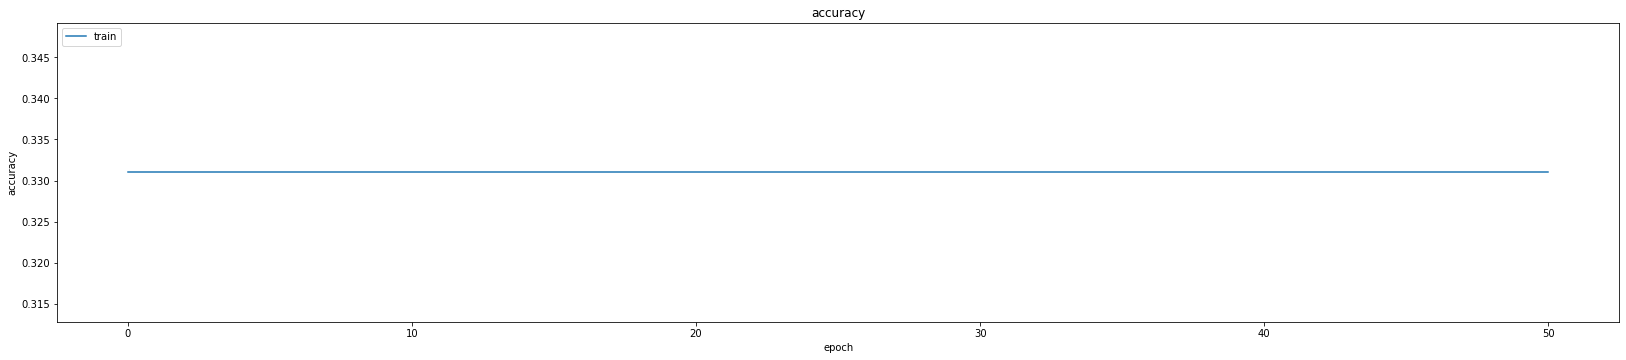

226000 227000


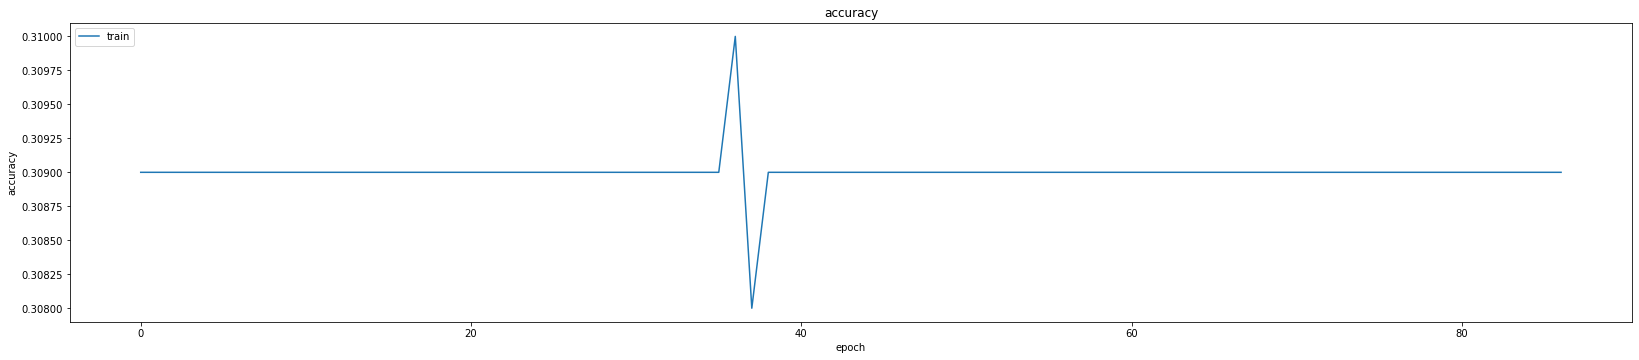

227000 228000


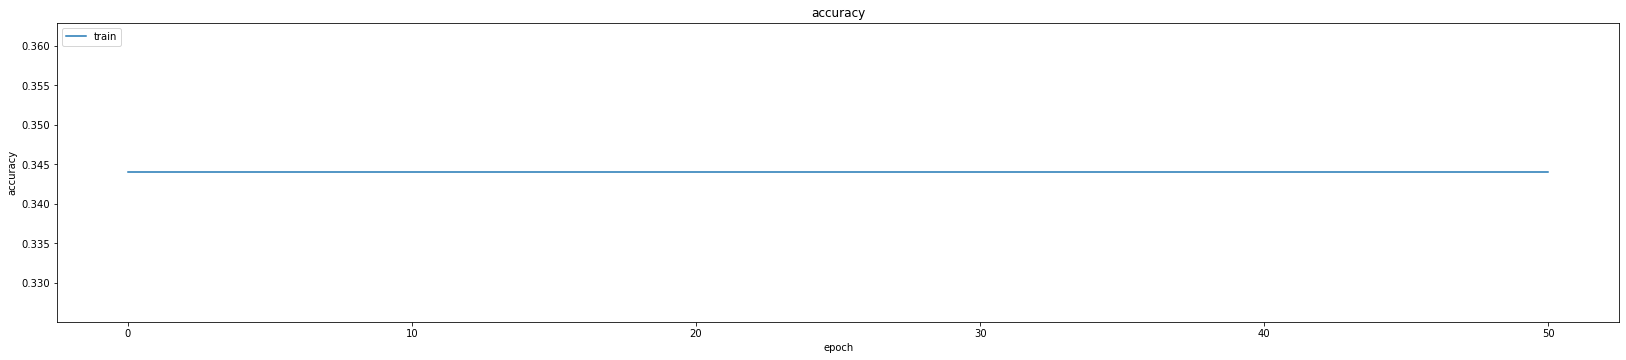

228000 229000


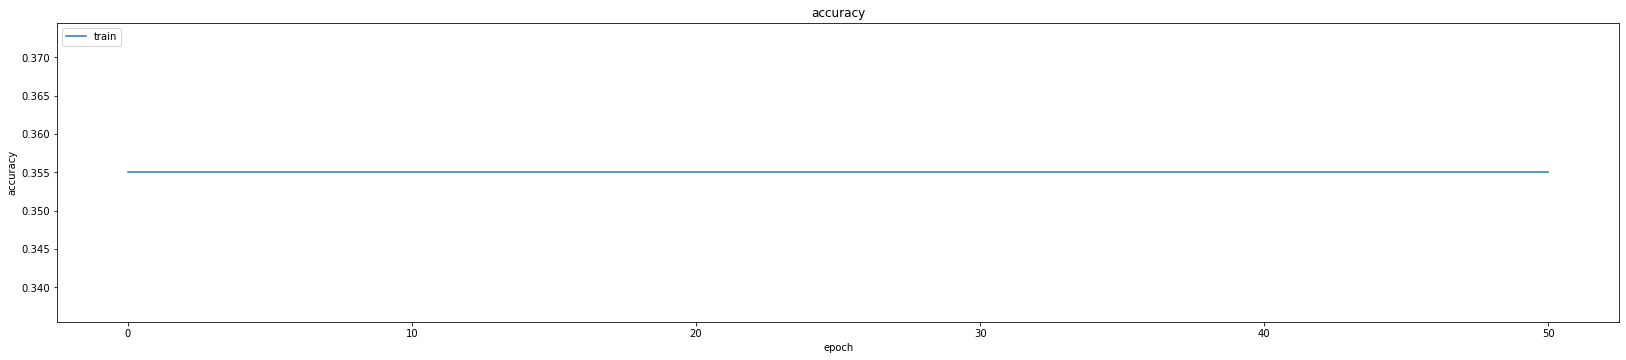

229000 230000


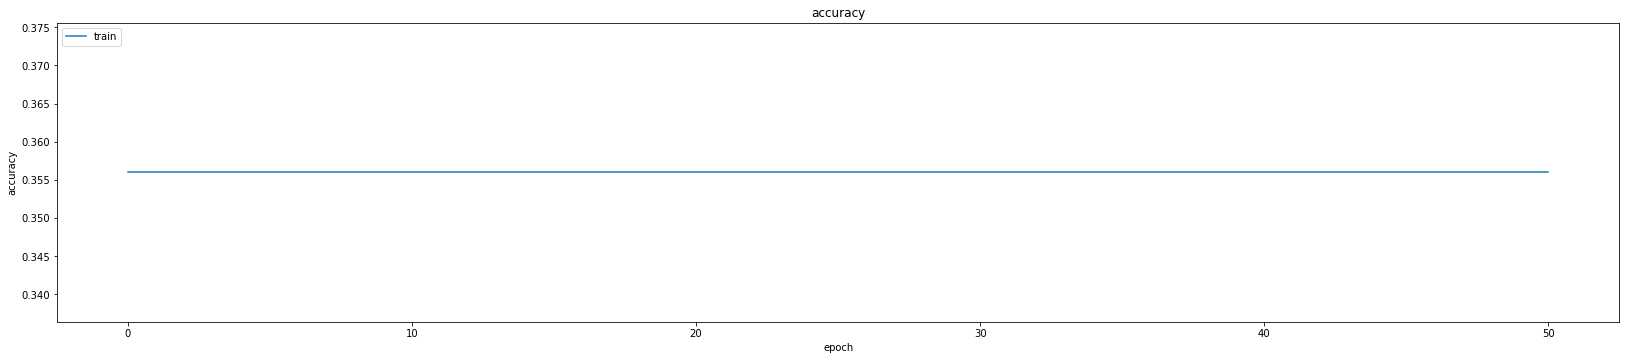

230000 231000


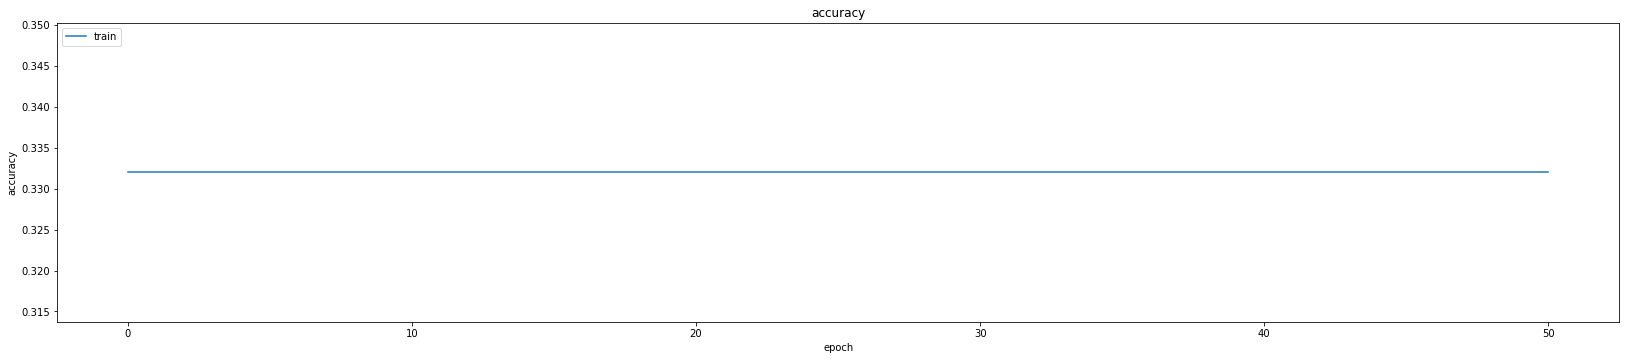

231000 232000


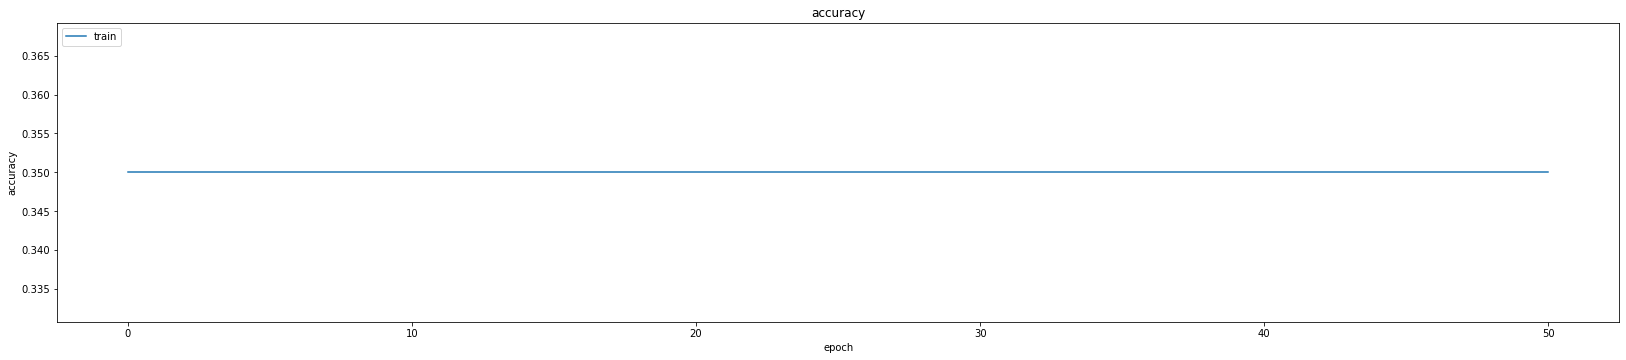

232000 233000


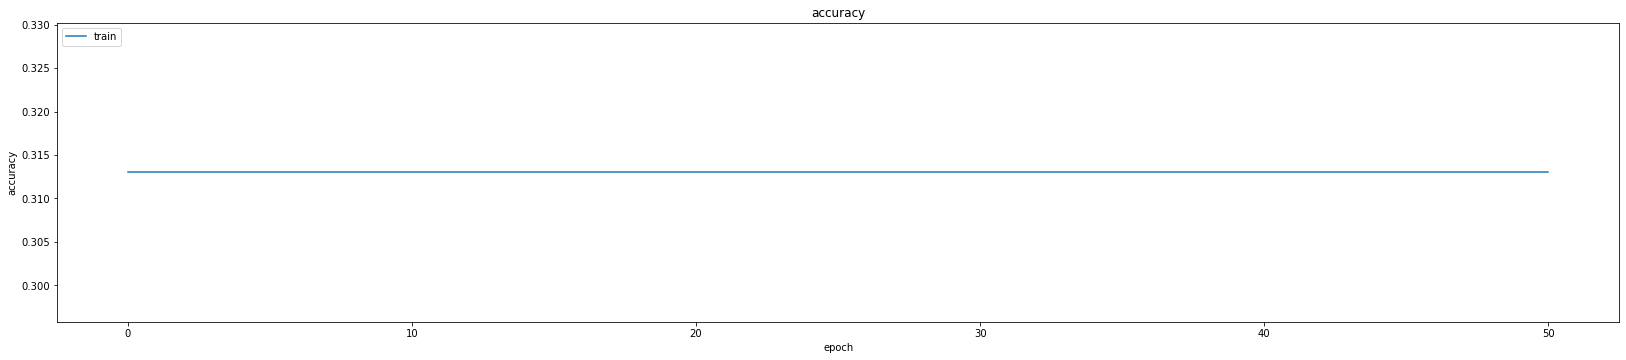

233000 234000


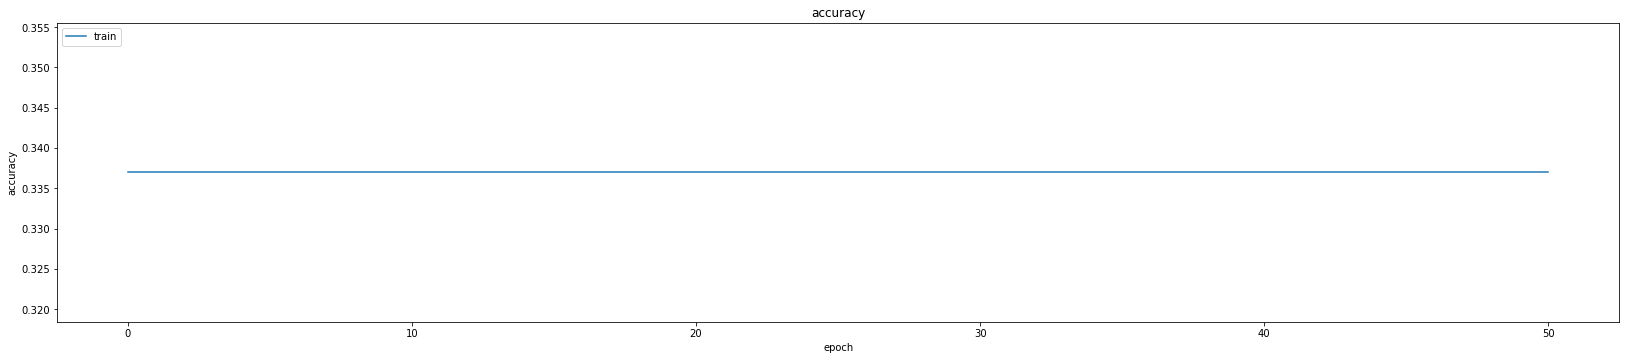

234000 235000


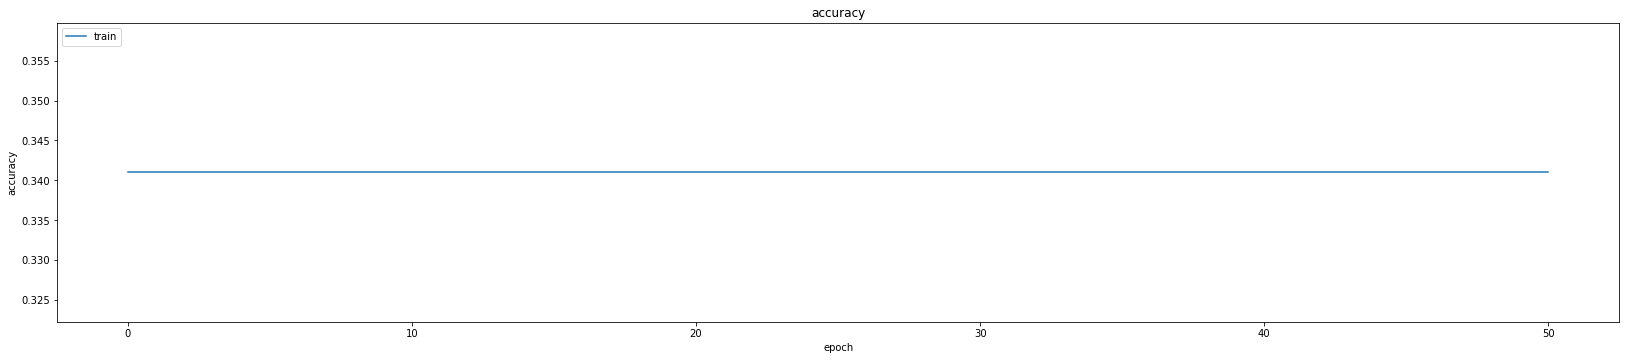

235000 236000


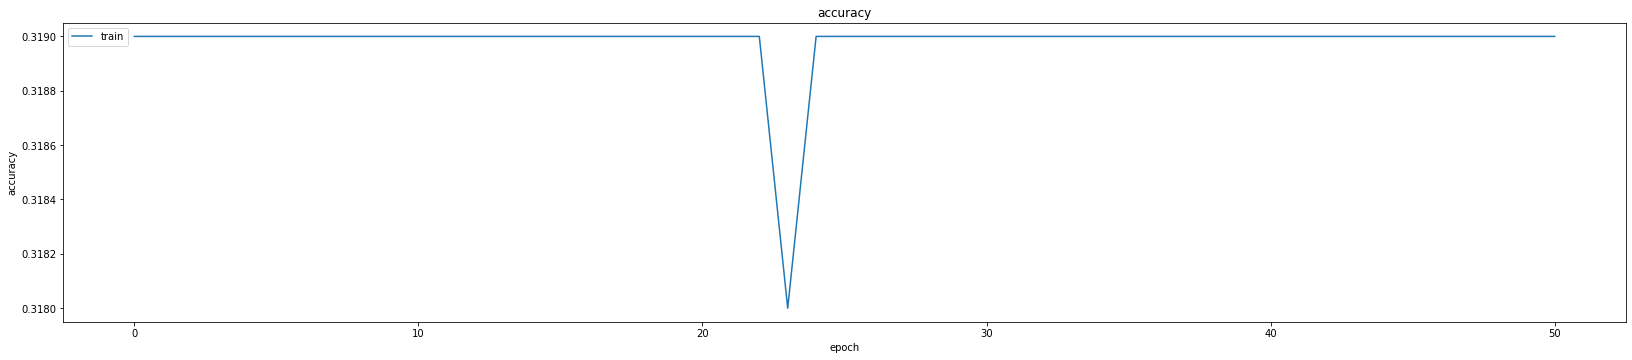

236000 237000


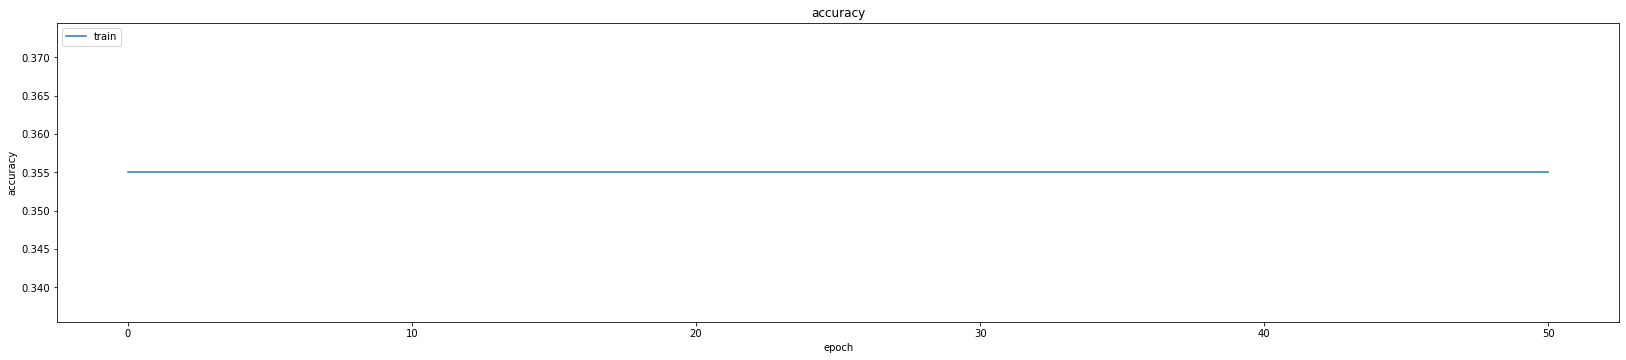

237000 238000


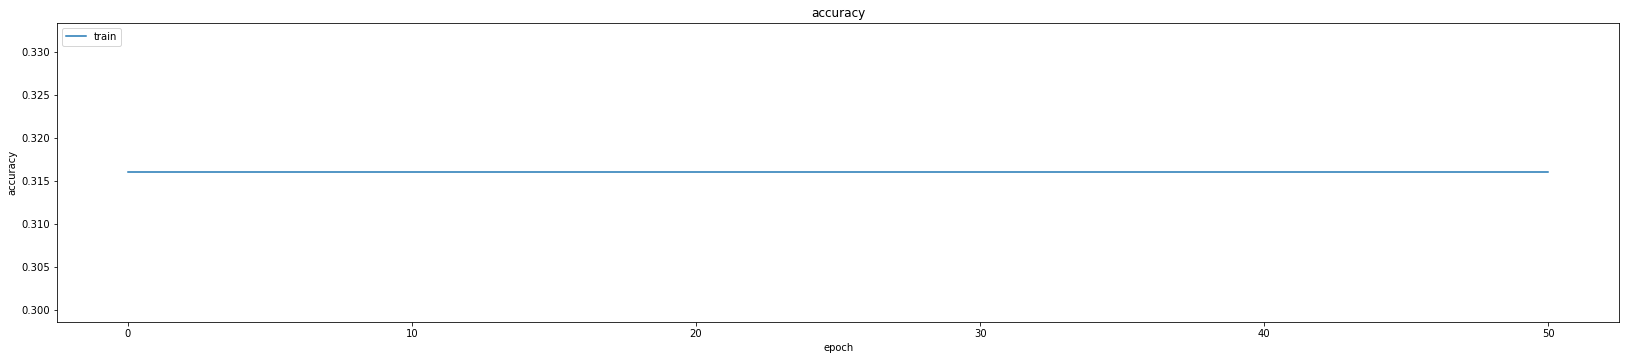

238000 239000


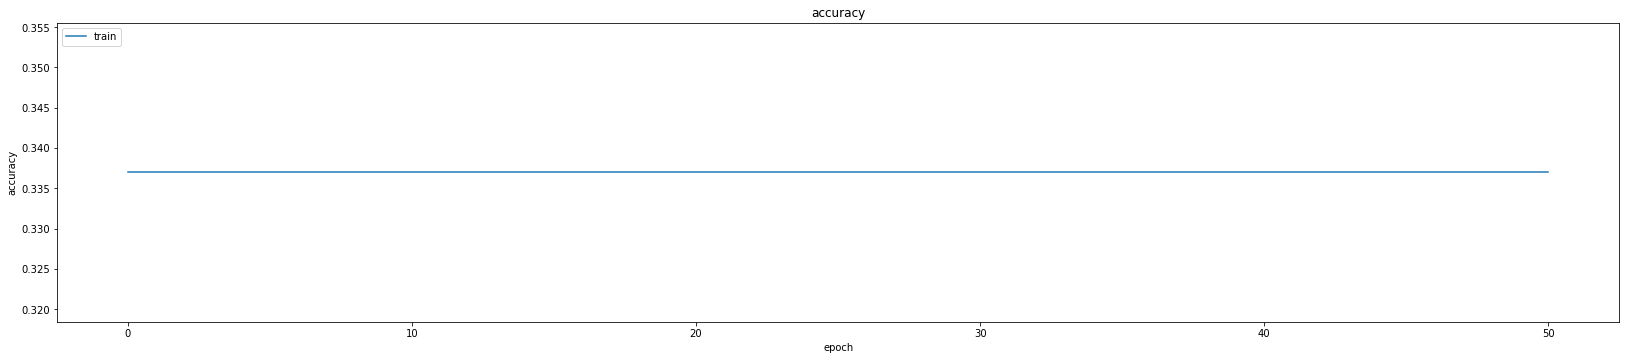

239000 240000


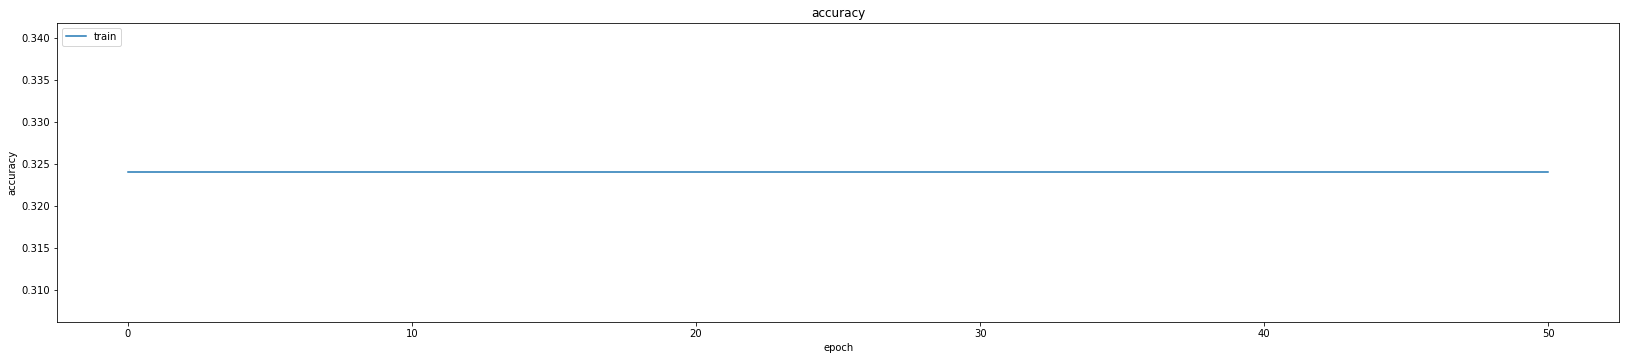

240000 241000


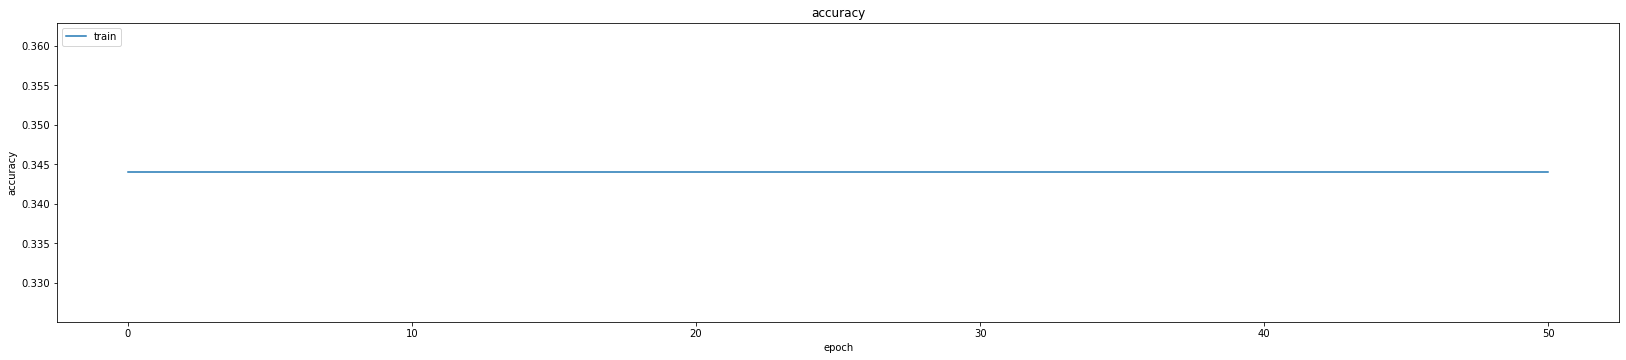

241000 242000


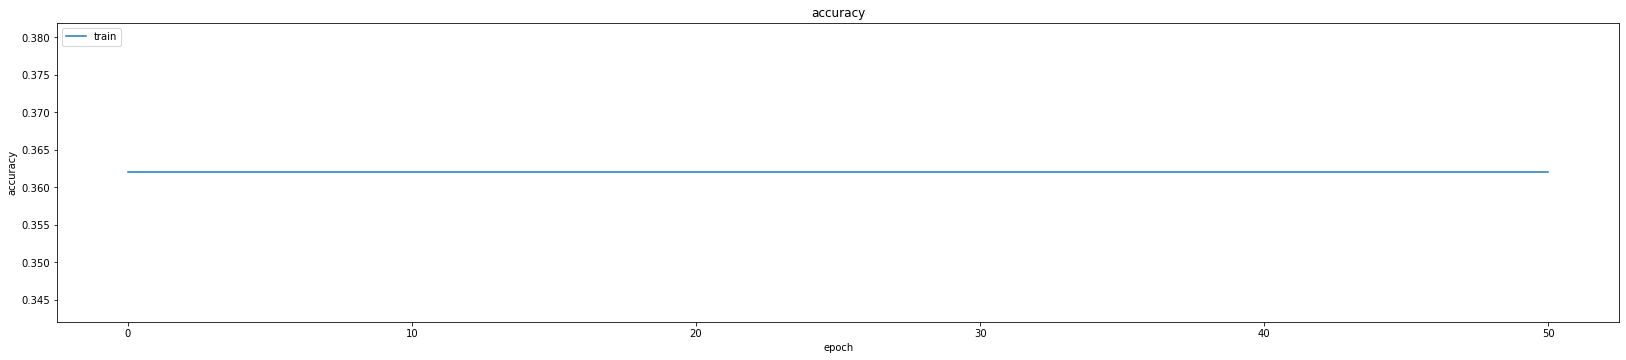

242000 243000


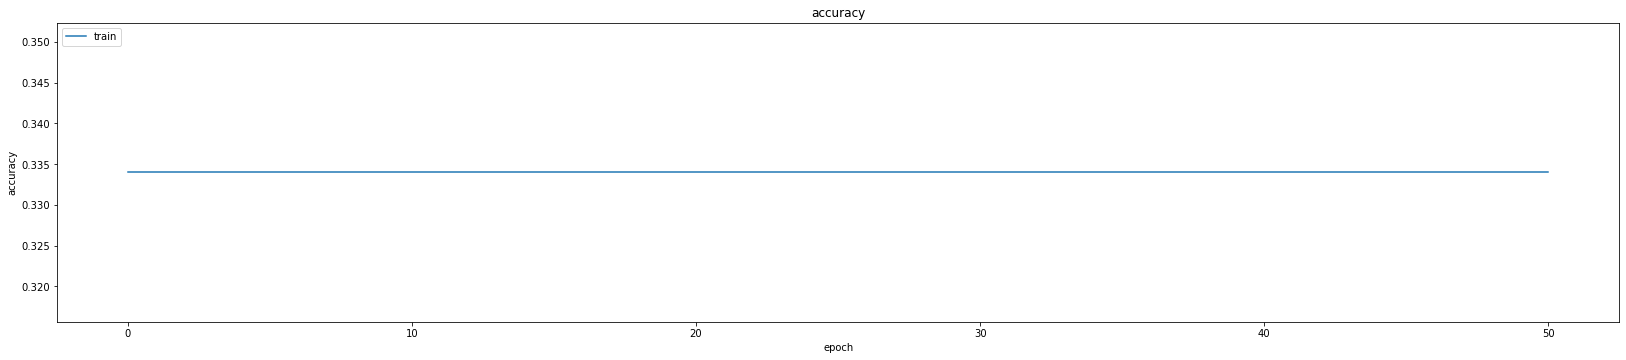

243000 244000


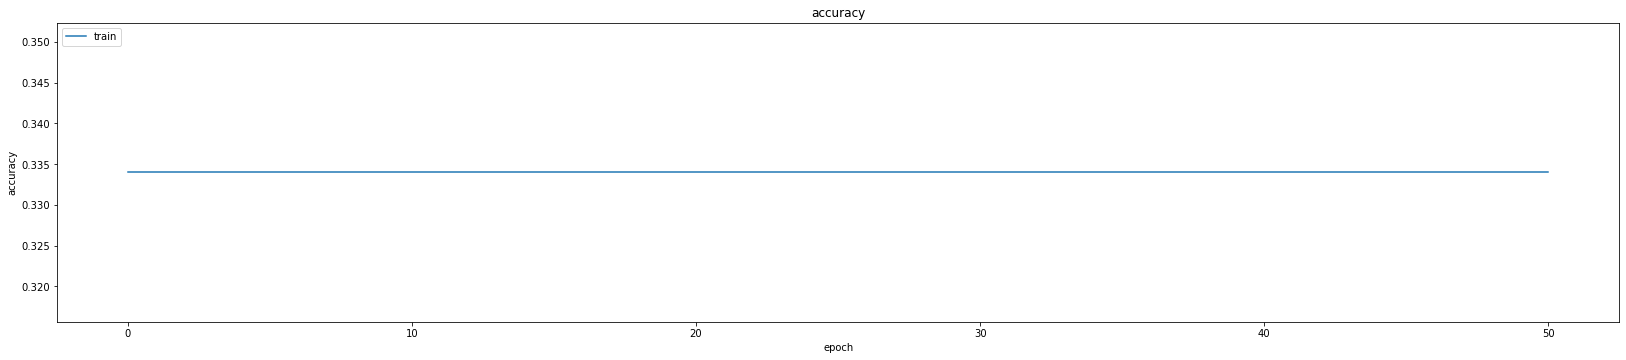

244000 245000


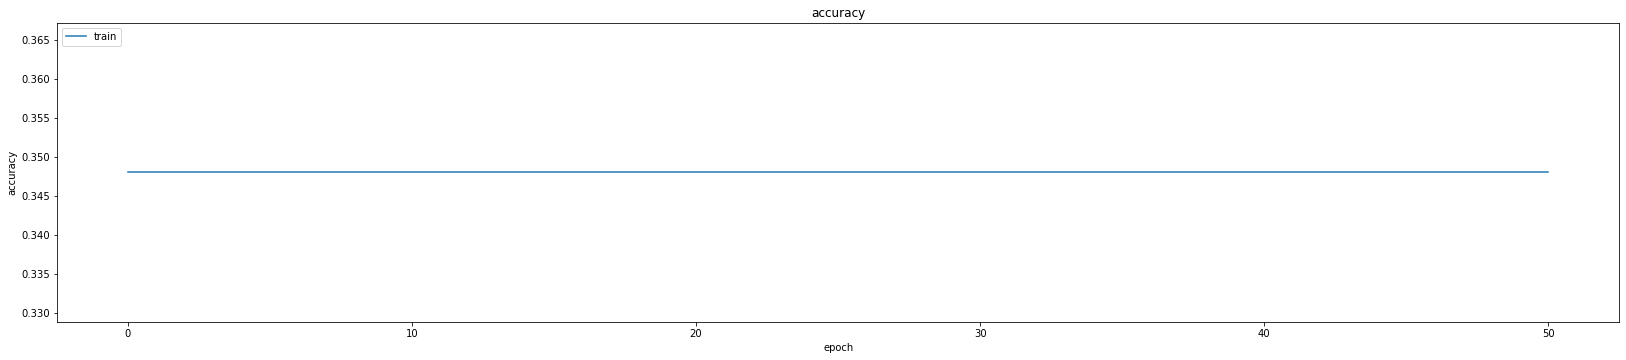

245000 246000


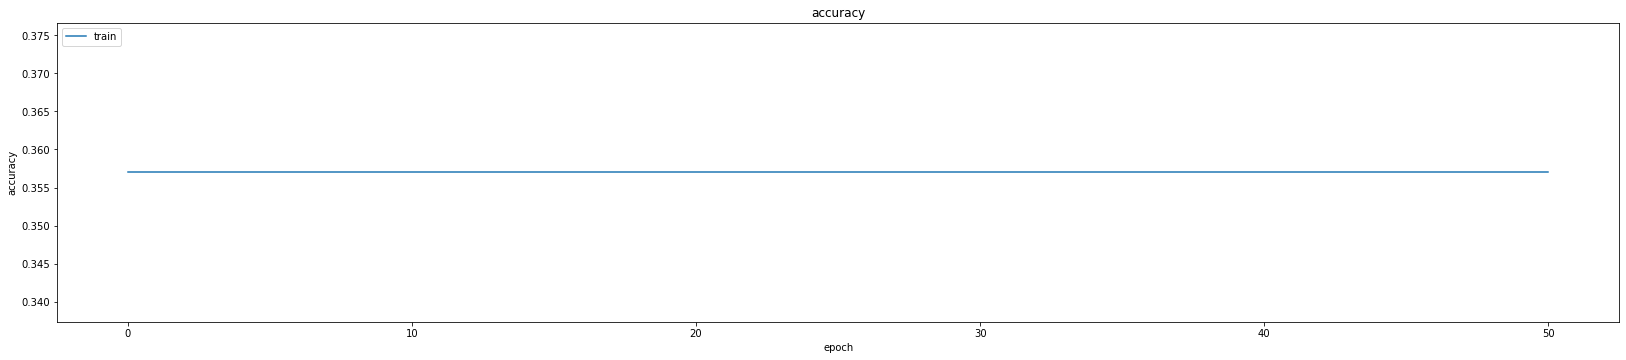

246000 247000


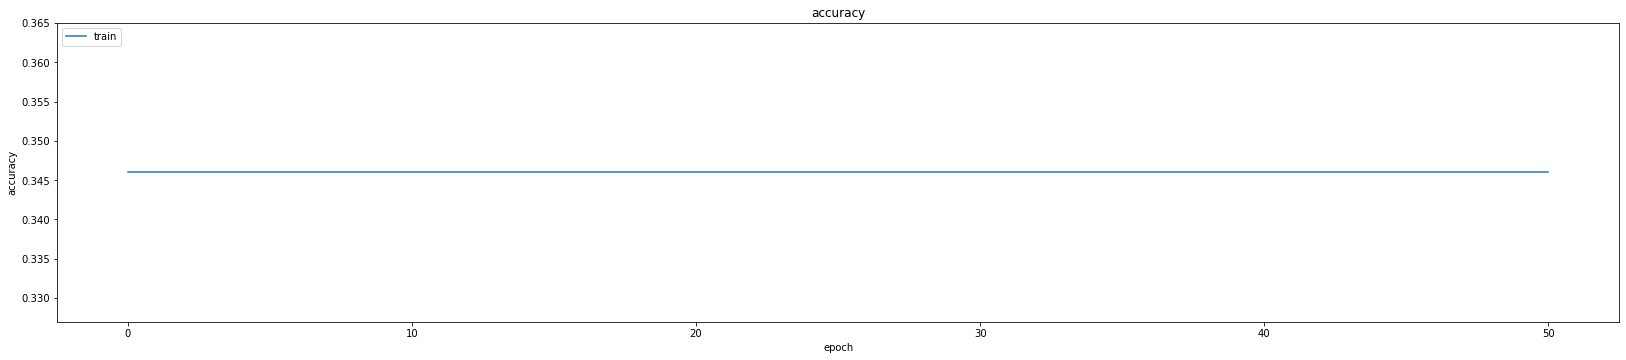

247000 248000


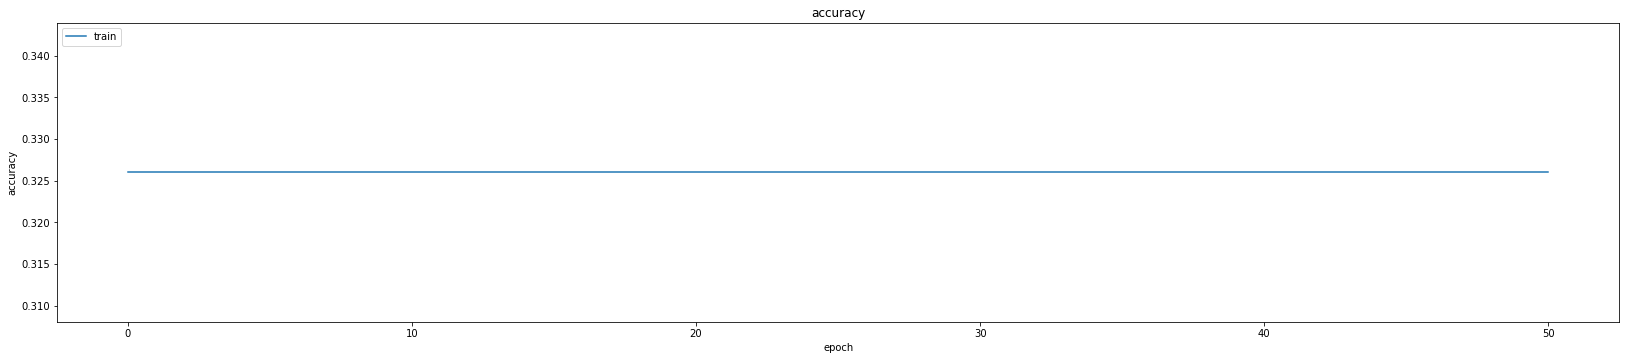

248000 249000


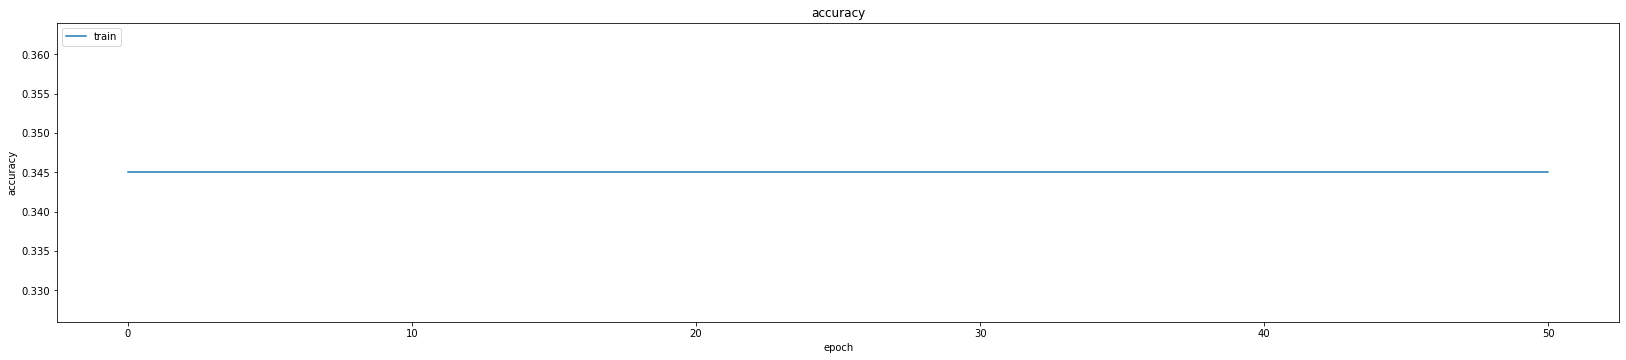

249000 250000


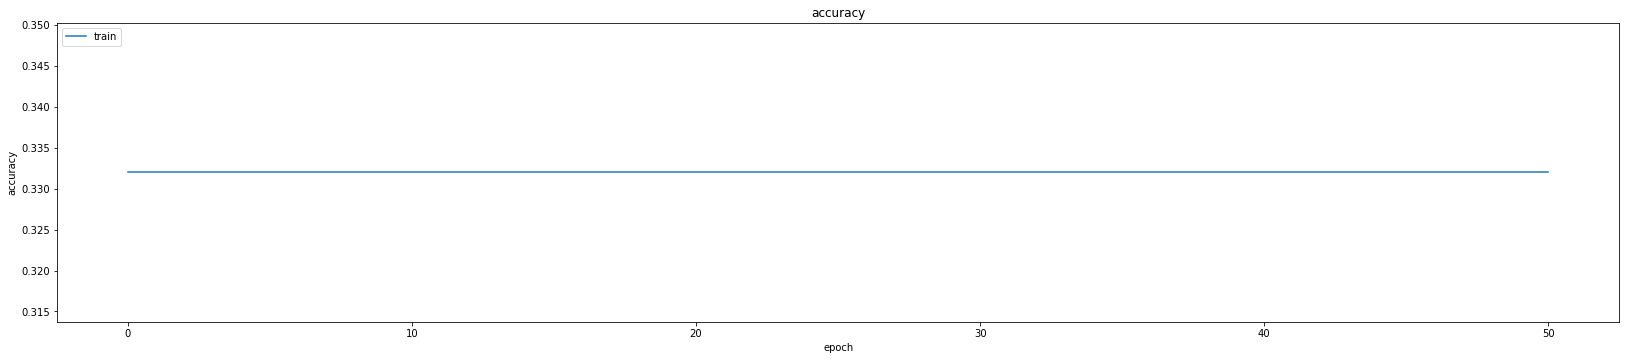

250000 251000


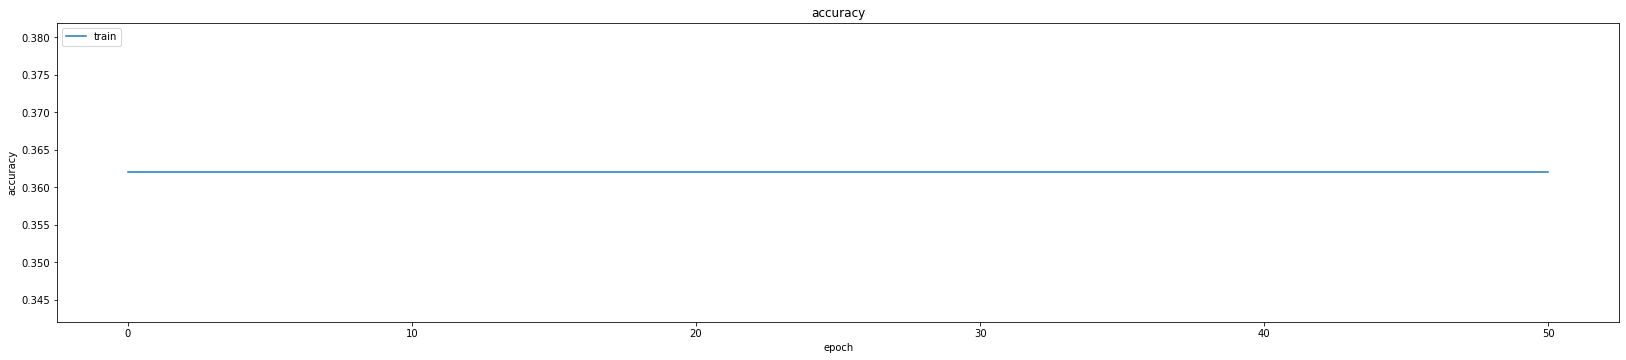

251000 252000


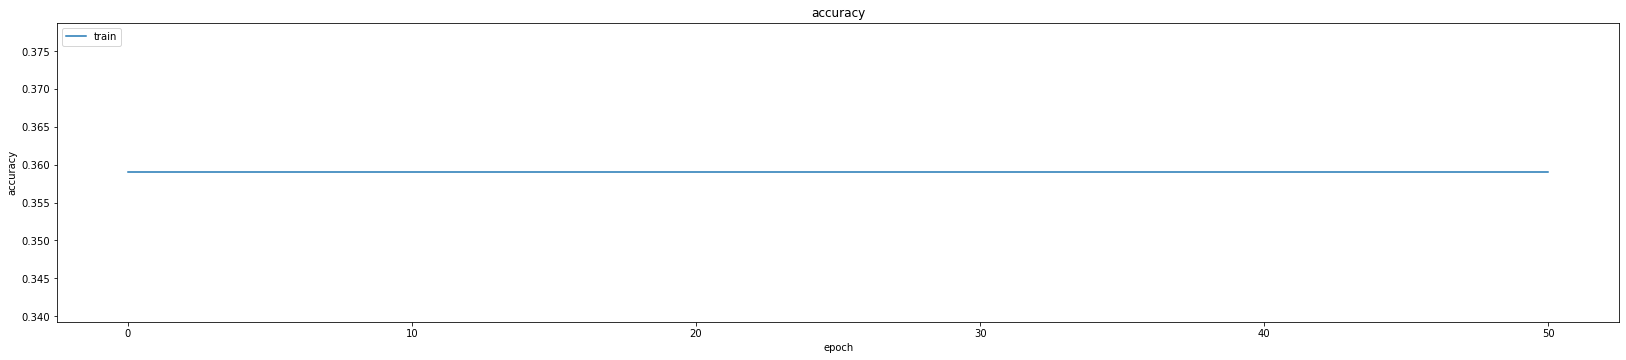

252000 253000


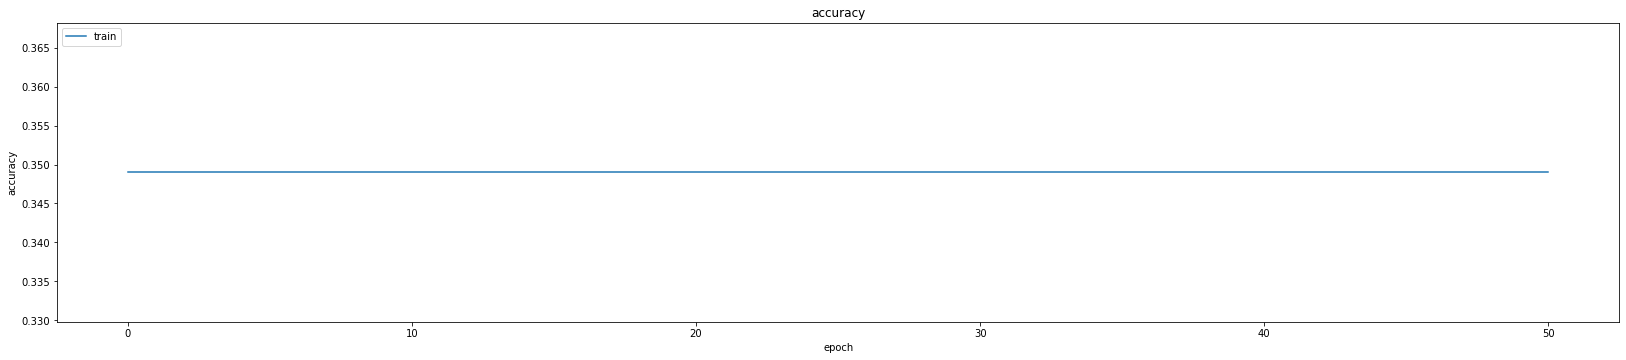

253000 254000


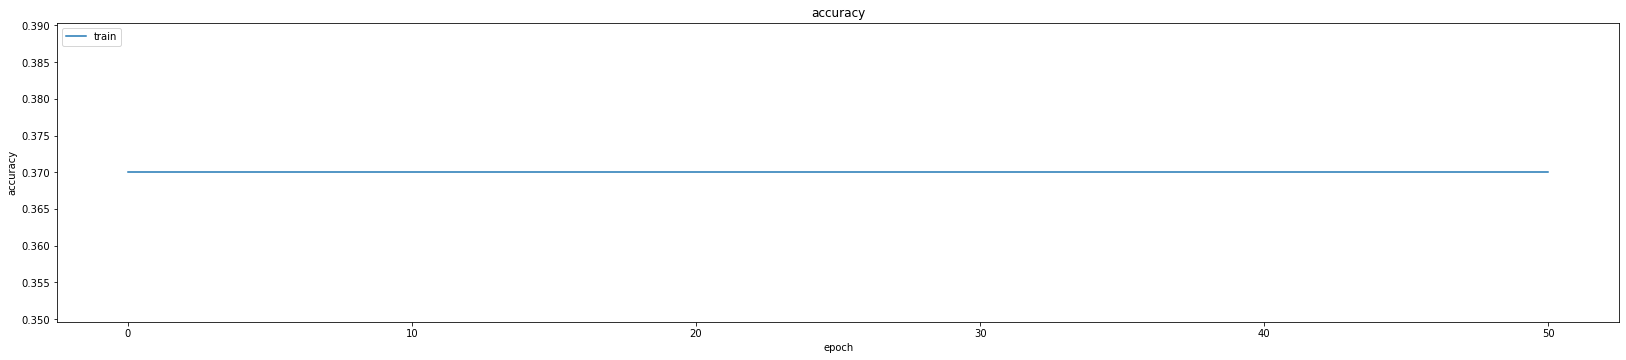

254000 255000


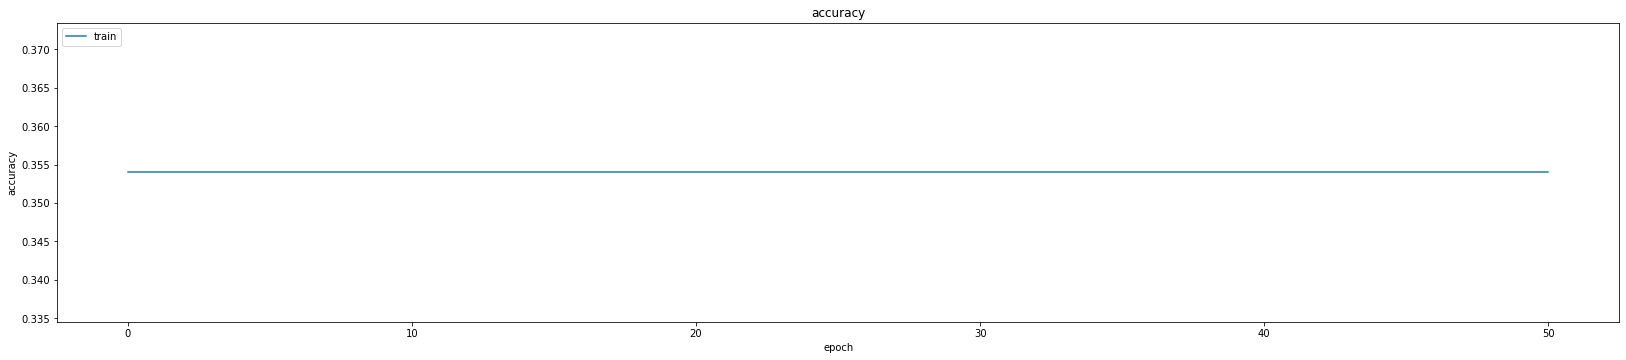

255000 256000


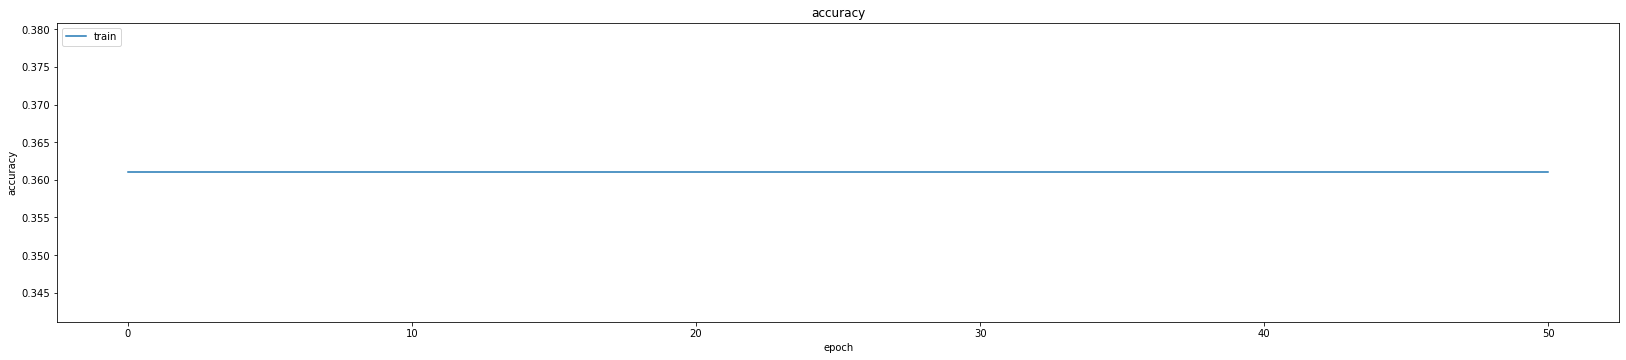

256000 257000


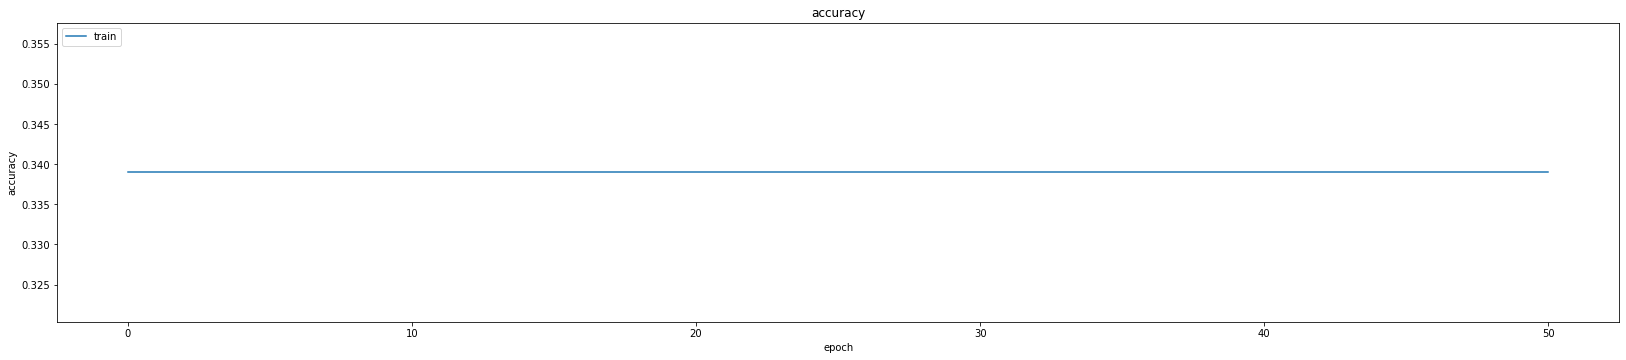

257000 258000


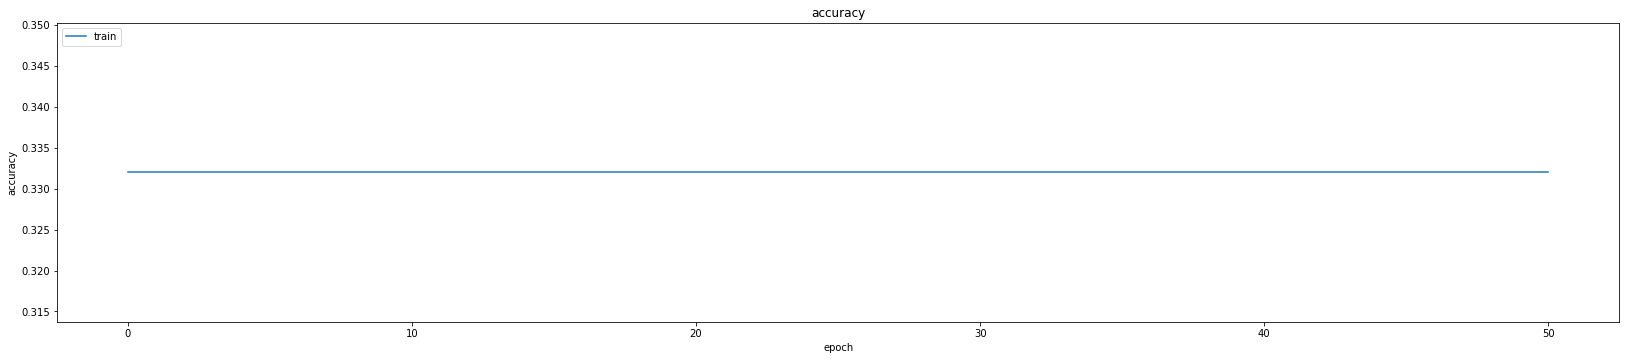

258000 259000


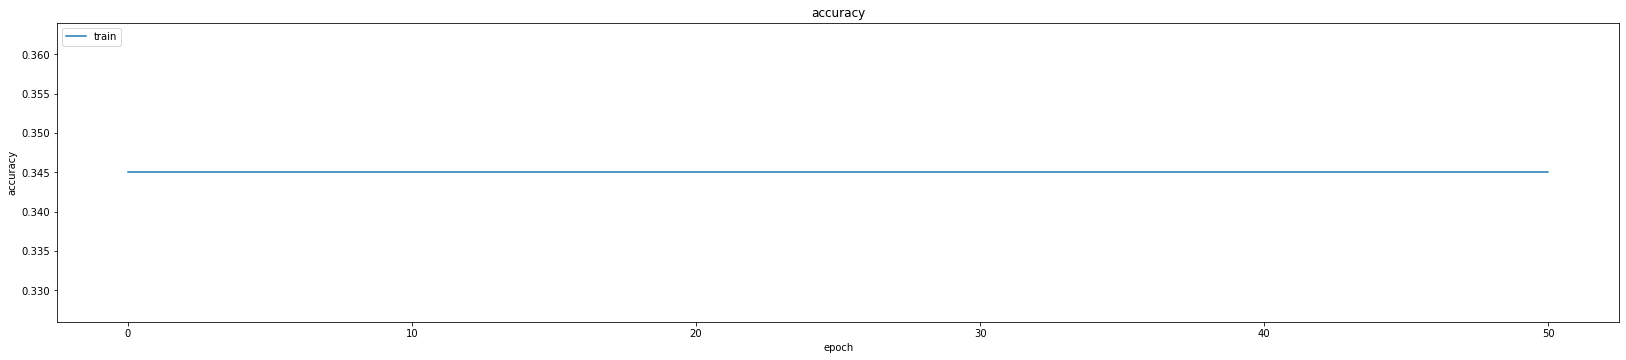

259000 260000


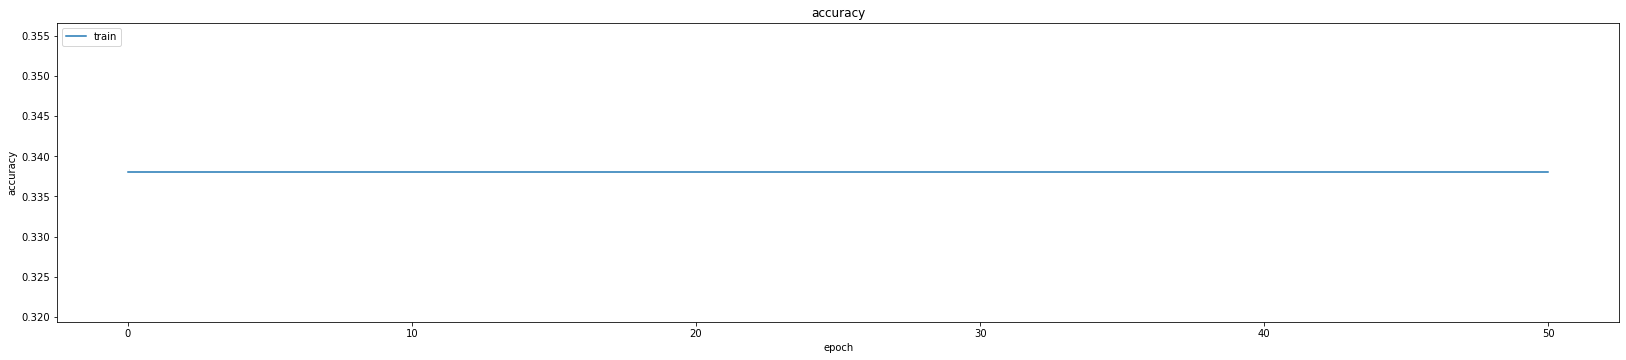

260000 261000


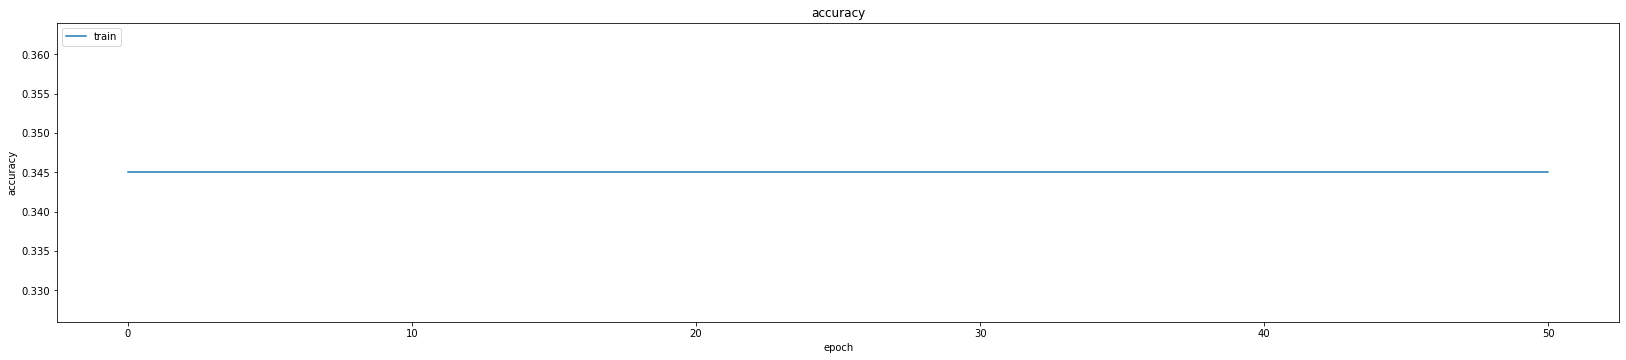

261000 262000


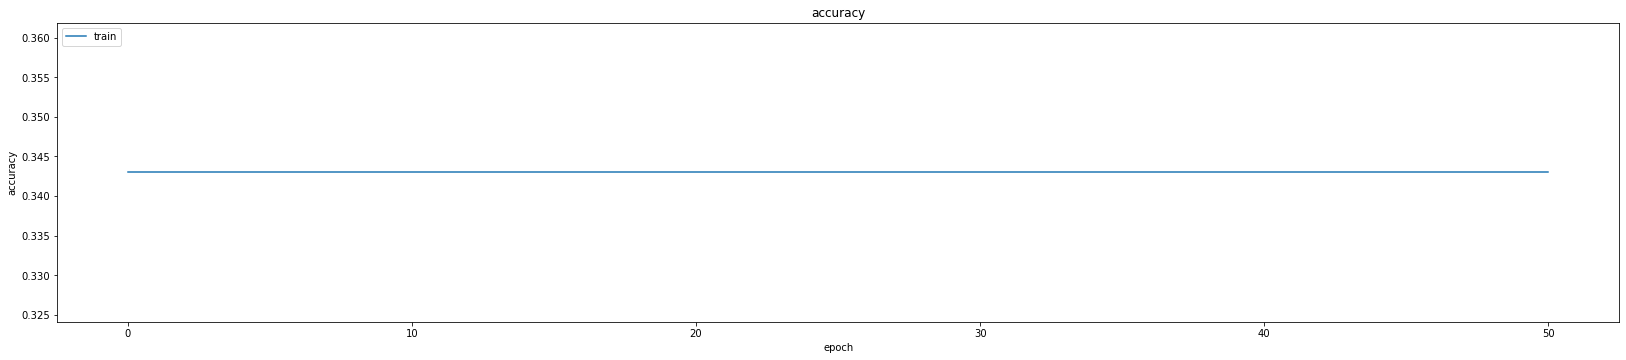

262000 263000


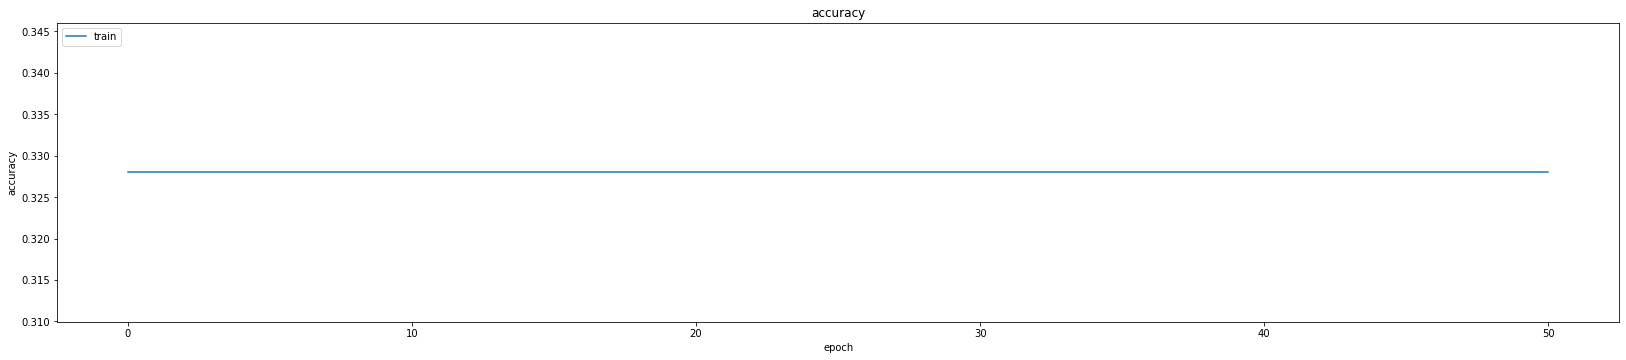

263000 264000


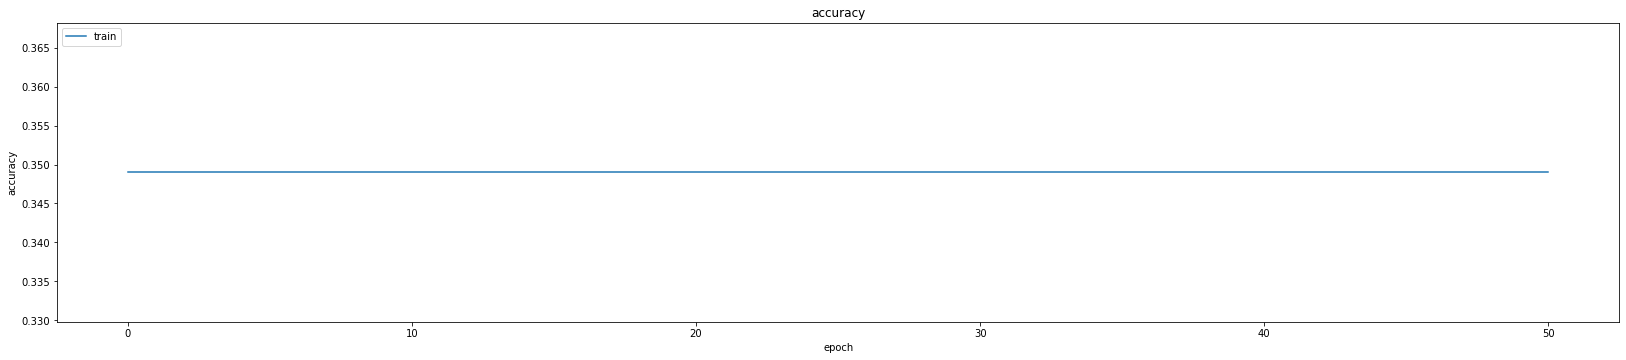

264000 265000


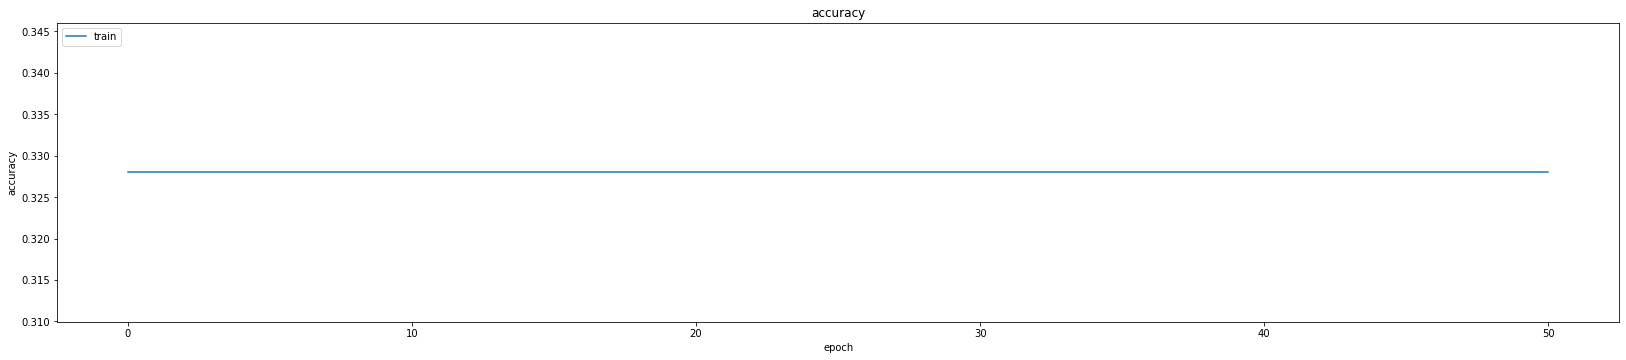

265000 266000


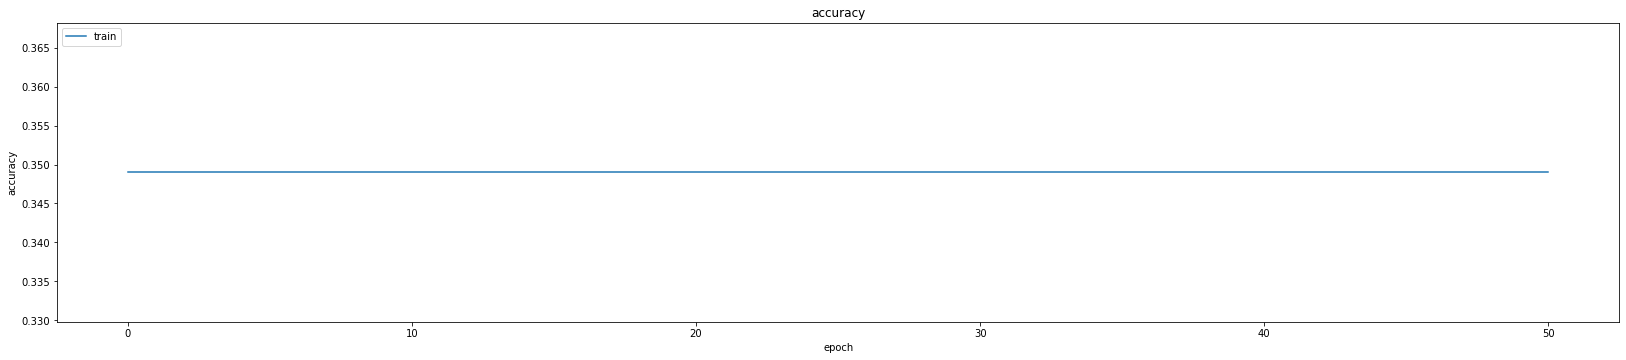

266000 267000


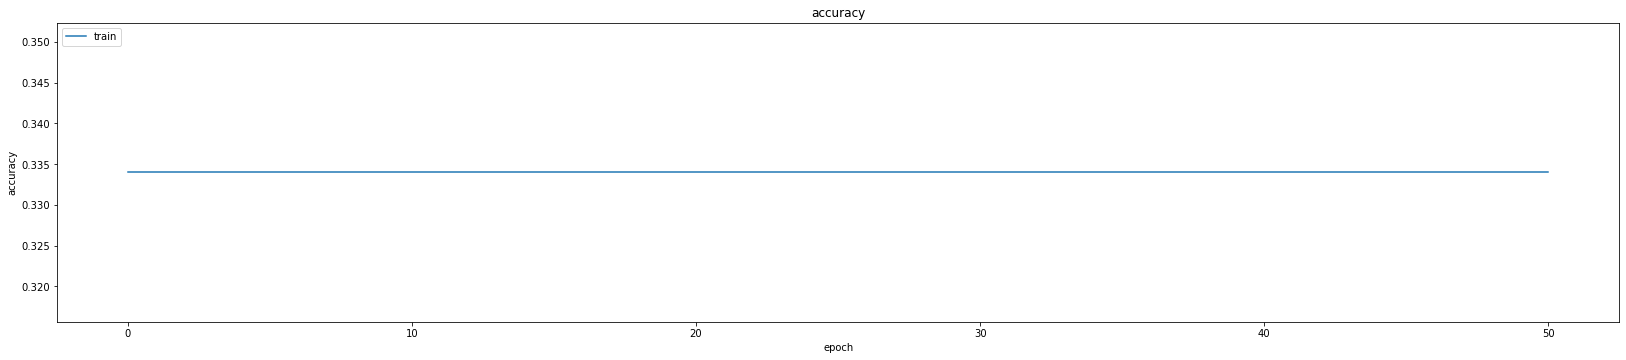

267000 268000


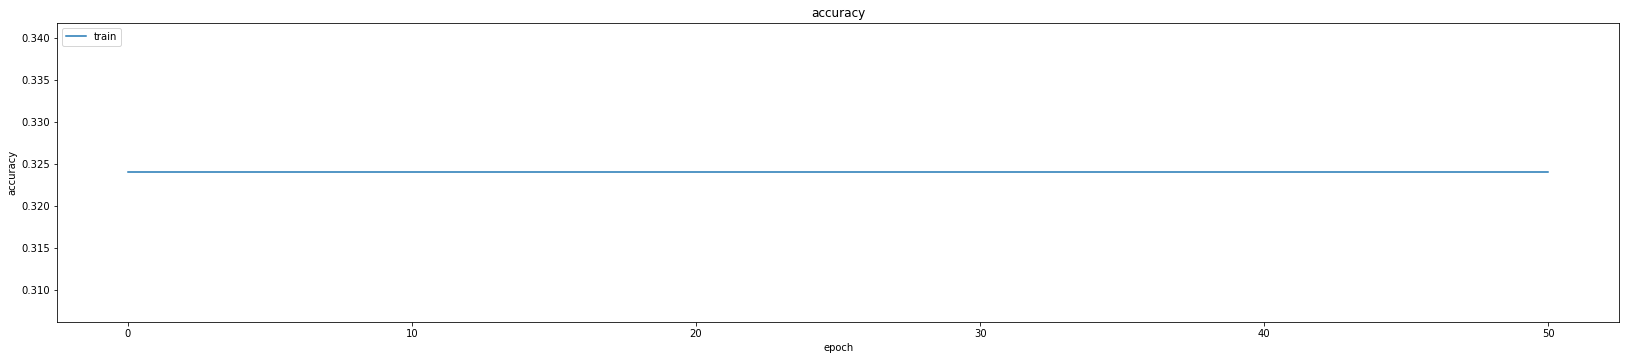

268000 269000


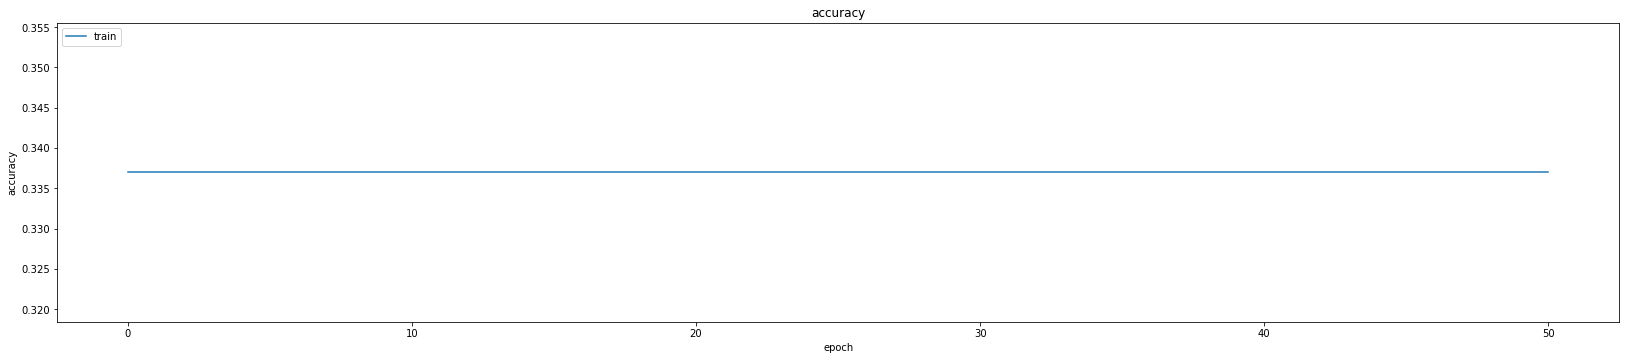

269000 270000


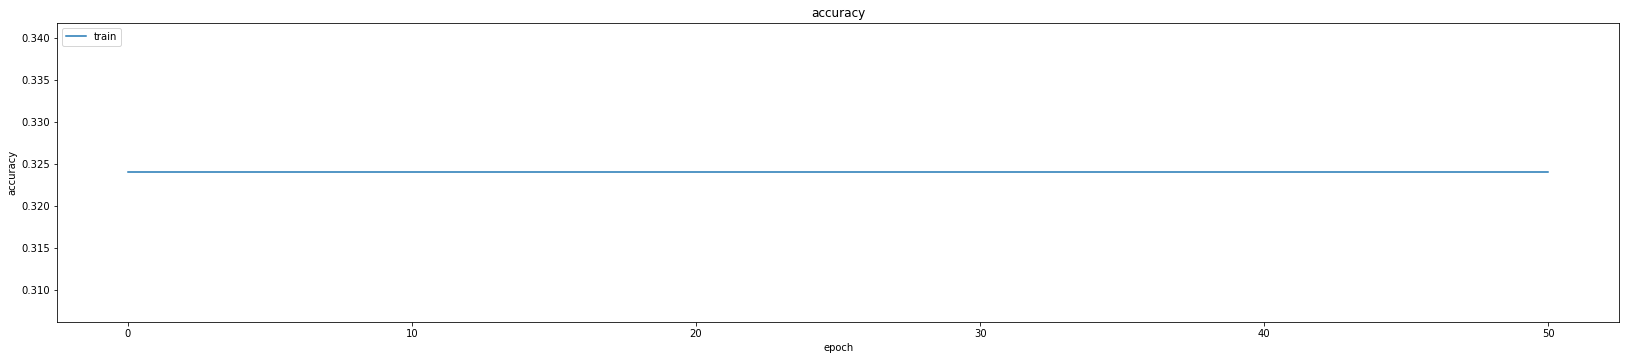

270000 271000


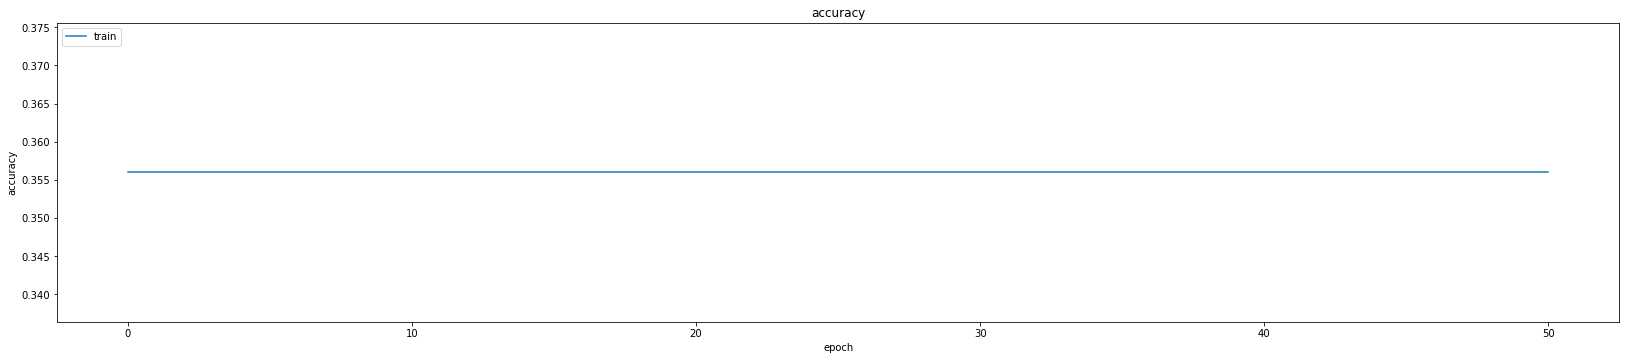

271000 272000


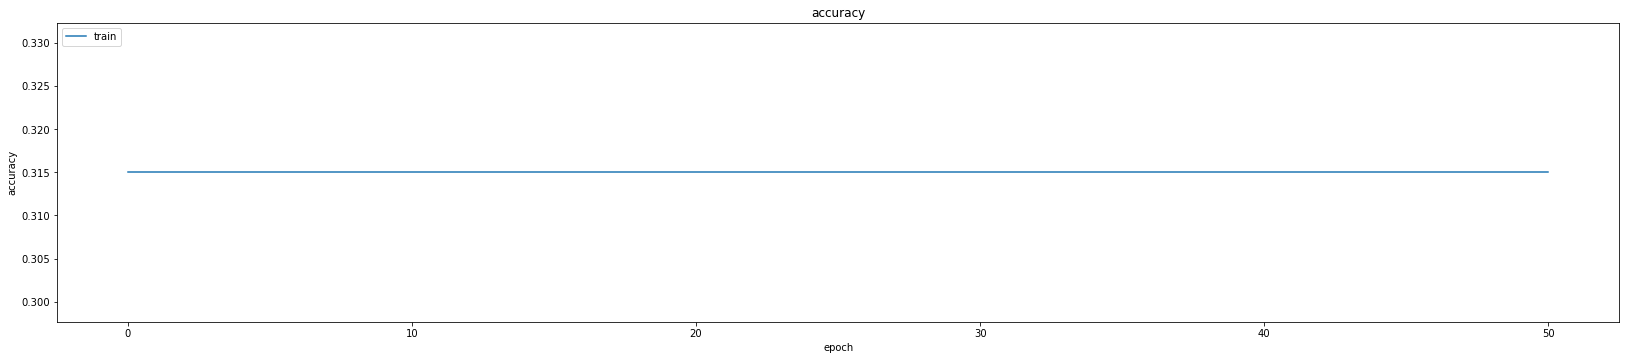

272000 273000


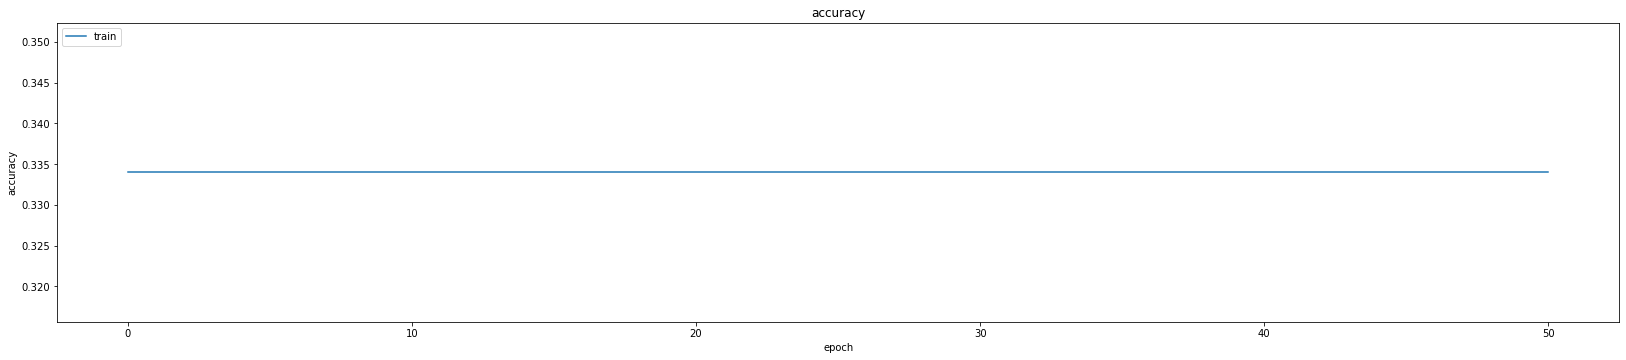

273000 274000


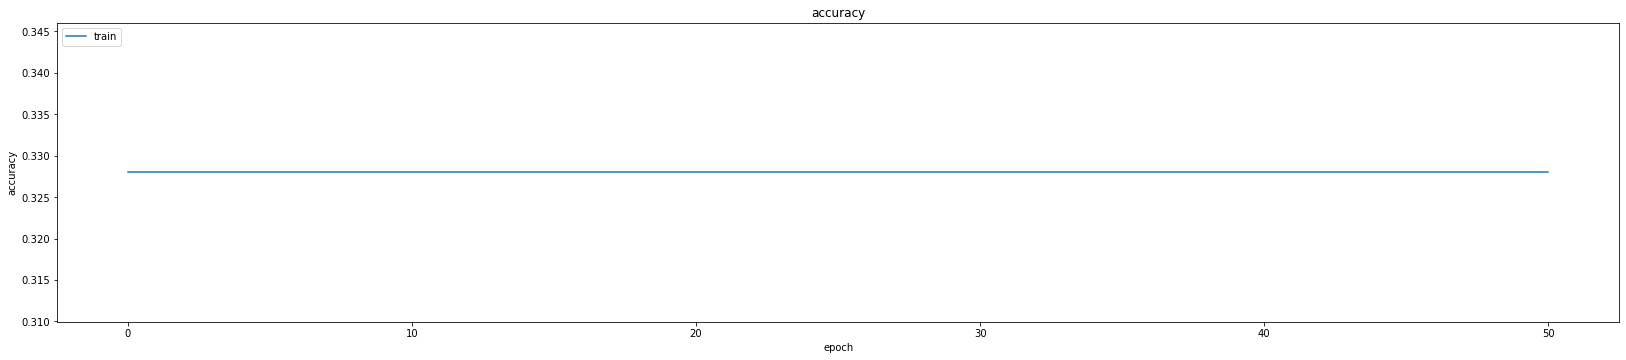

274000 275000


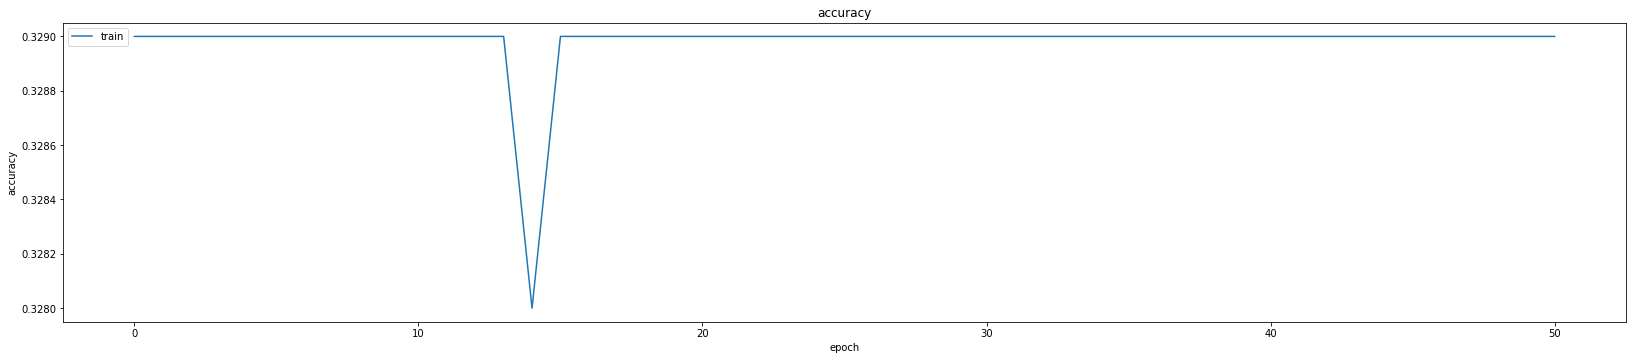

275000 276000


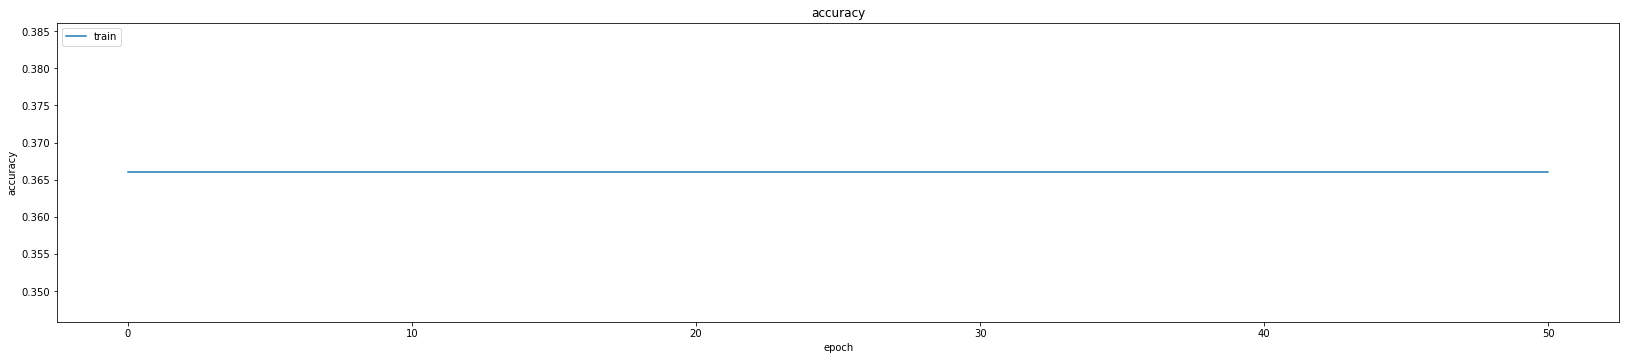

276000 277000


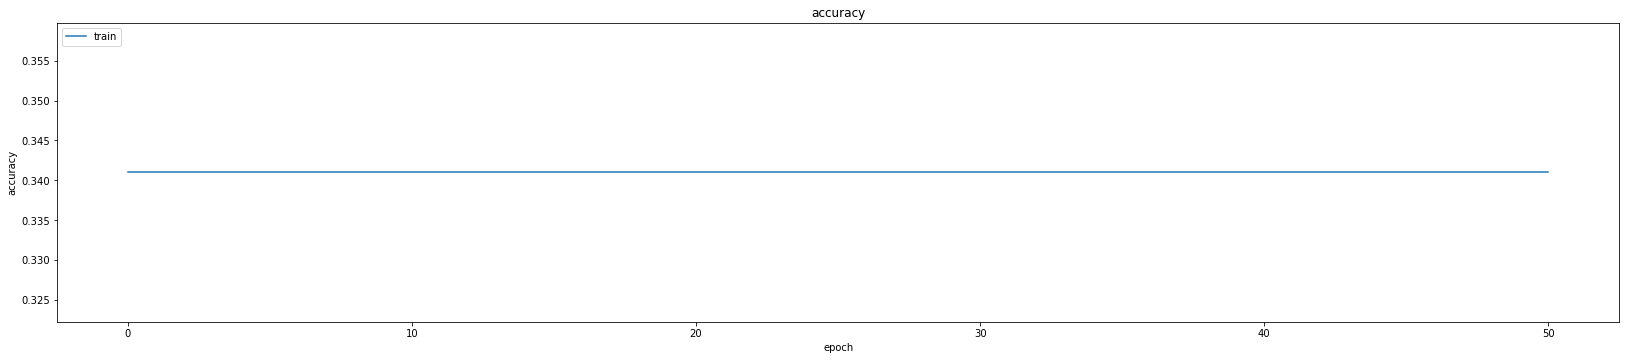

277000 278000


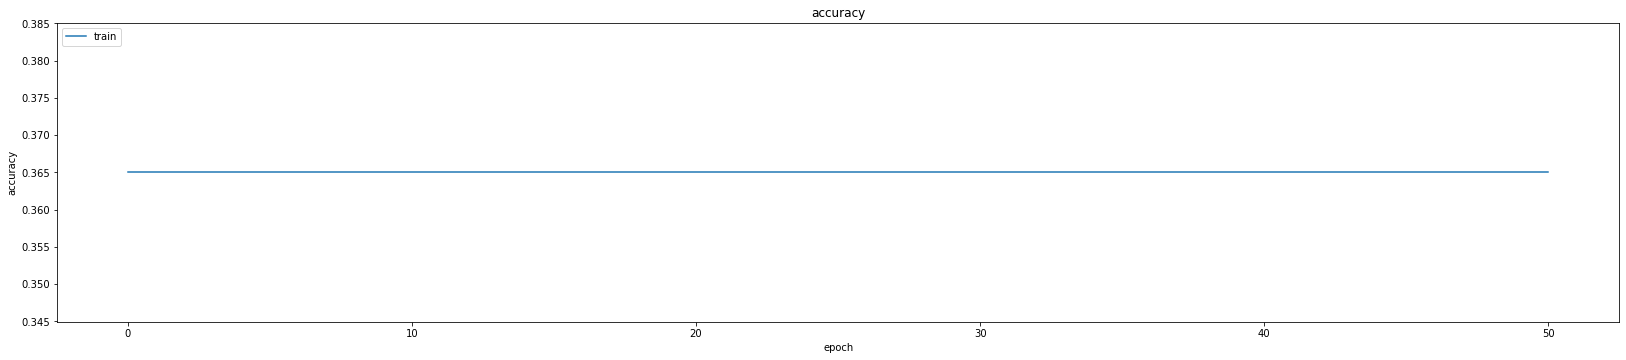

278000 279000


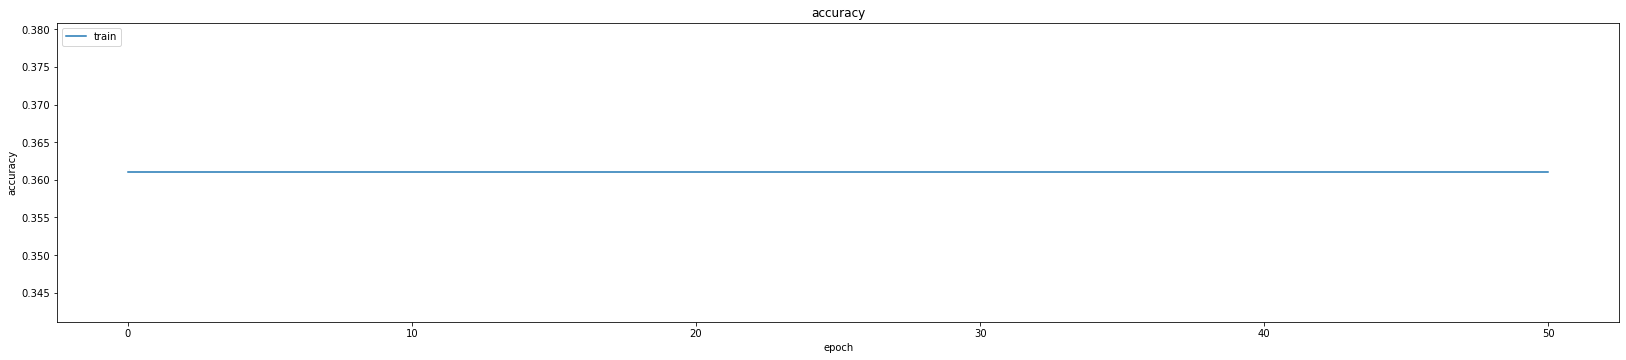

279000 280000


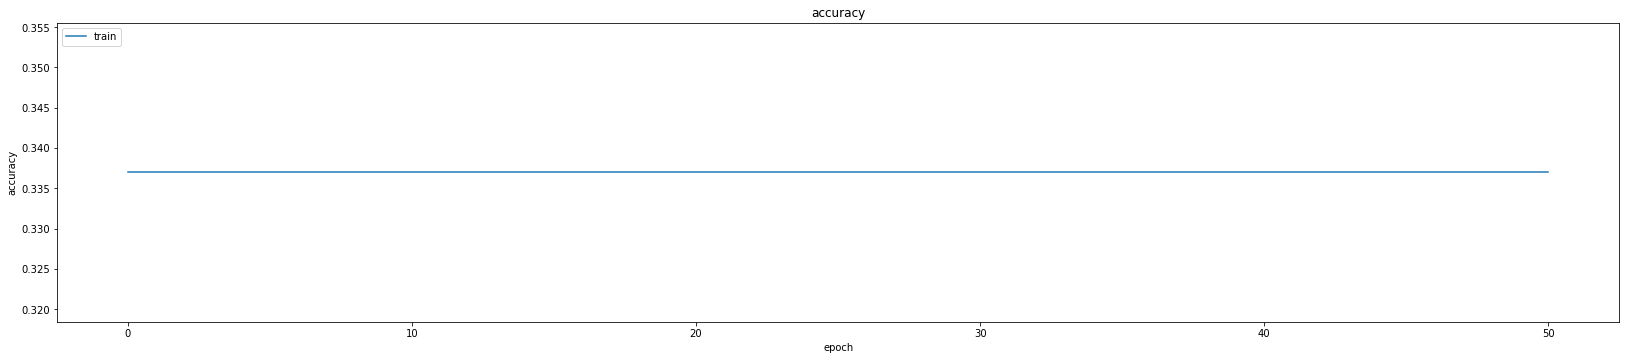

280000 281000


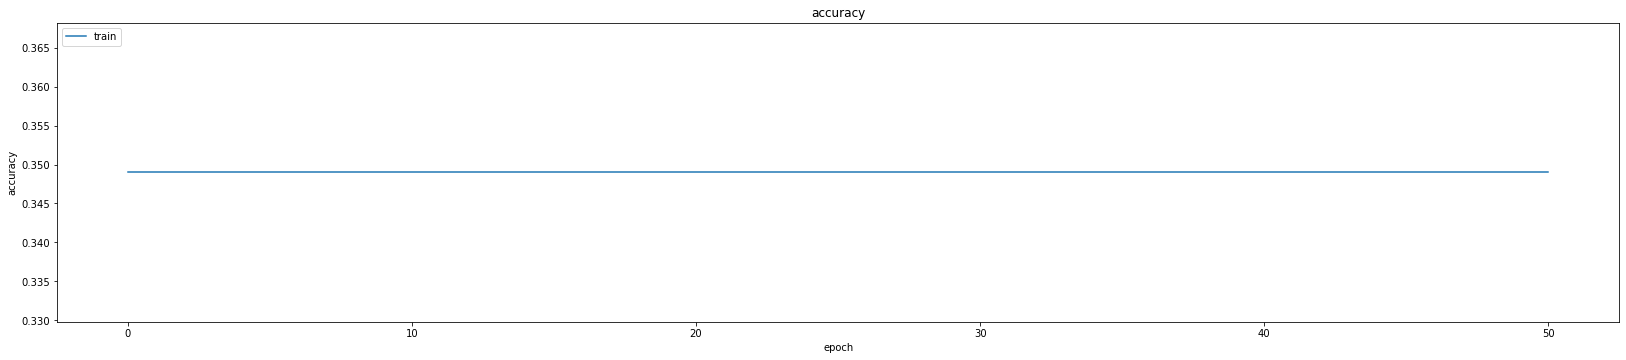

281000 282000


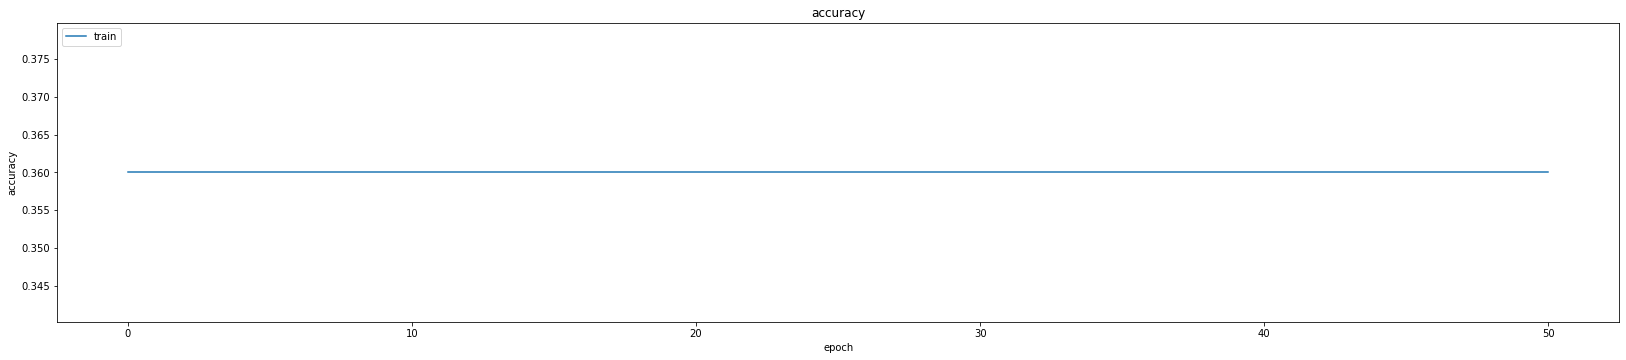

282000 283000


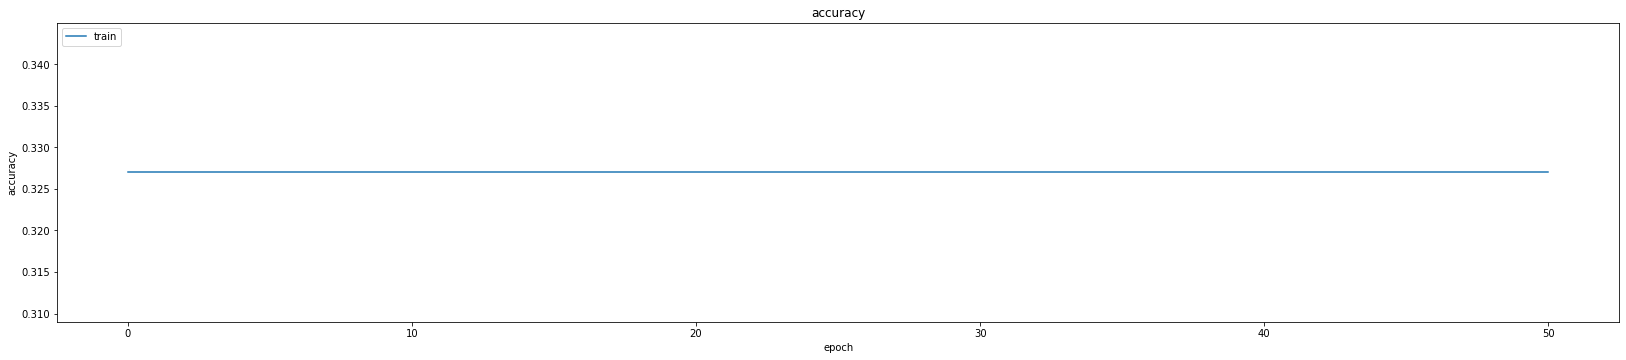

283000 284000


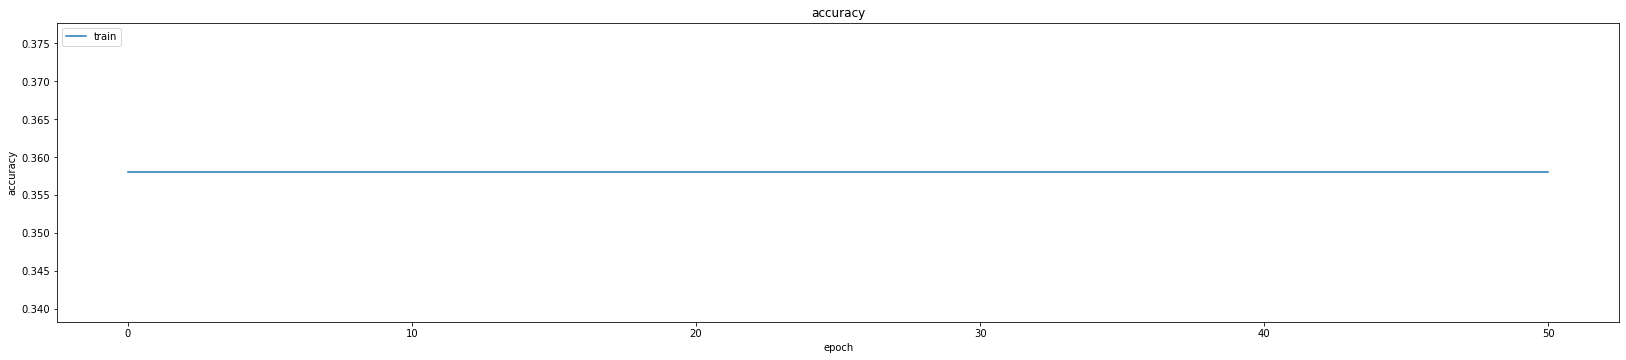

284000 285000


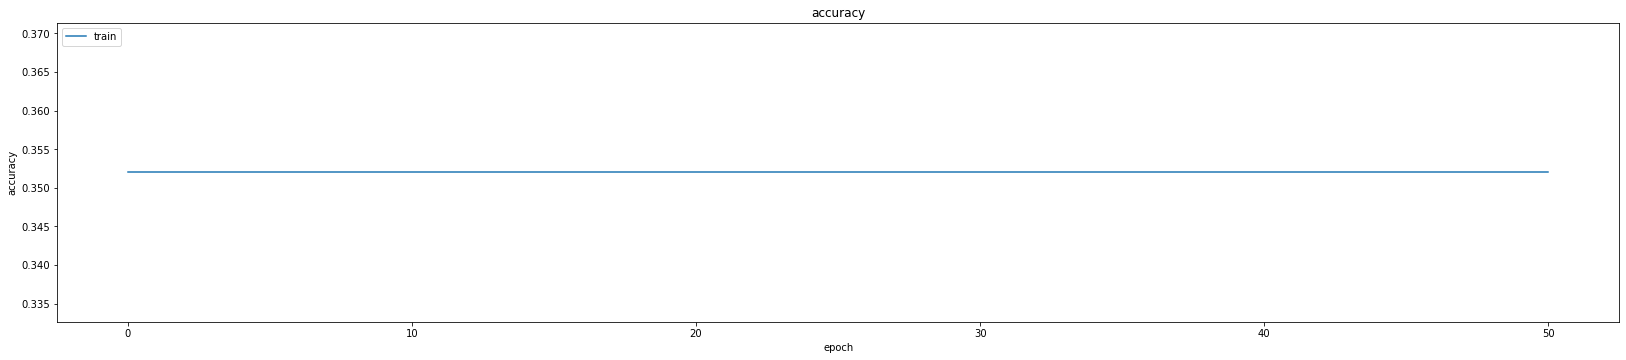

285000 286000


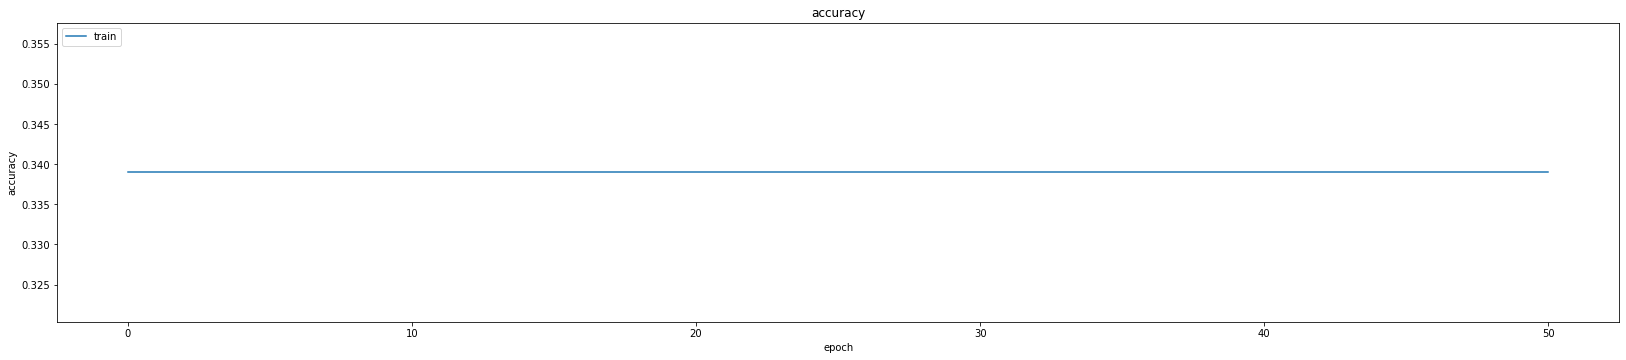

286000 287000


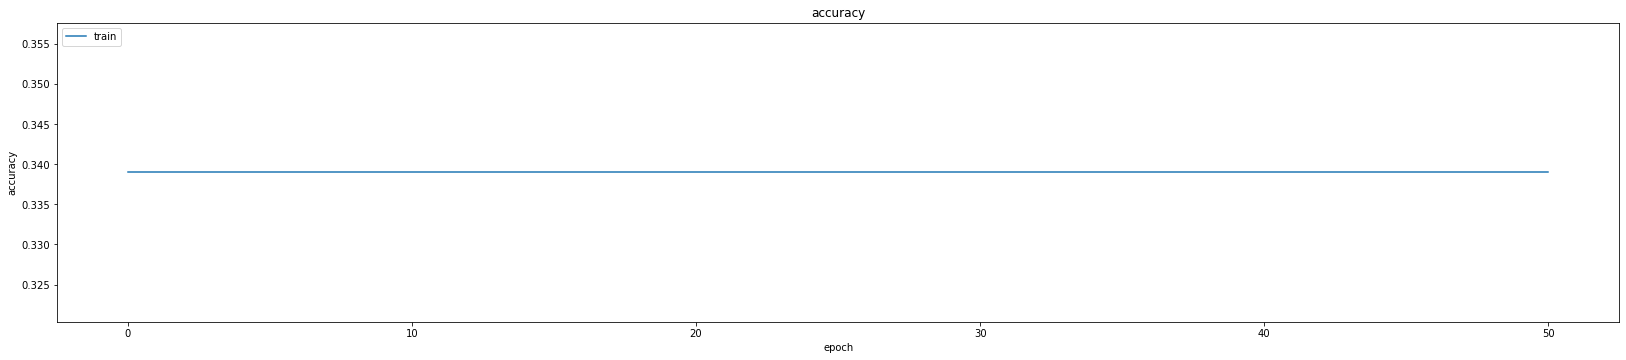

287000 288000


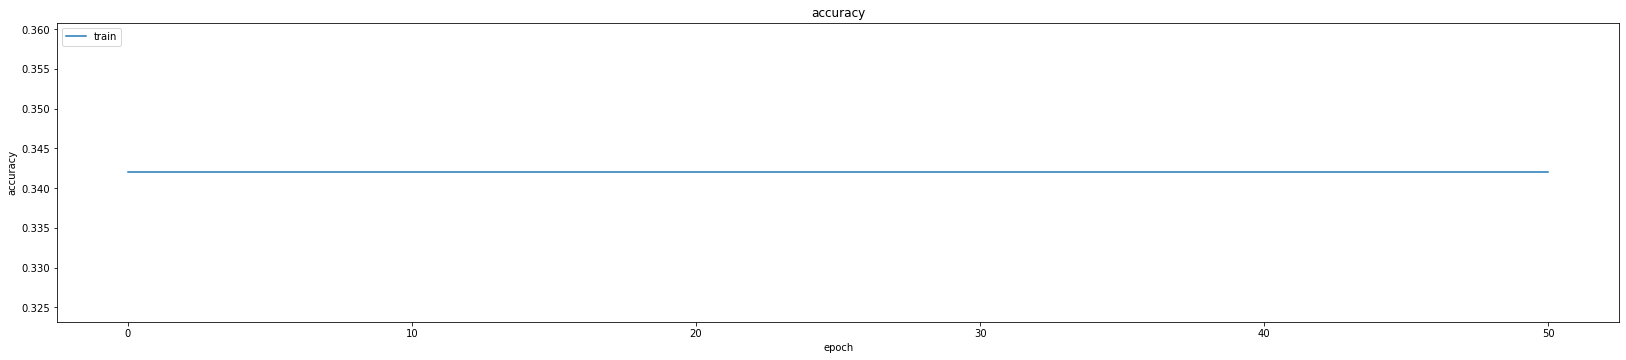

288000 289000


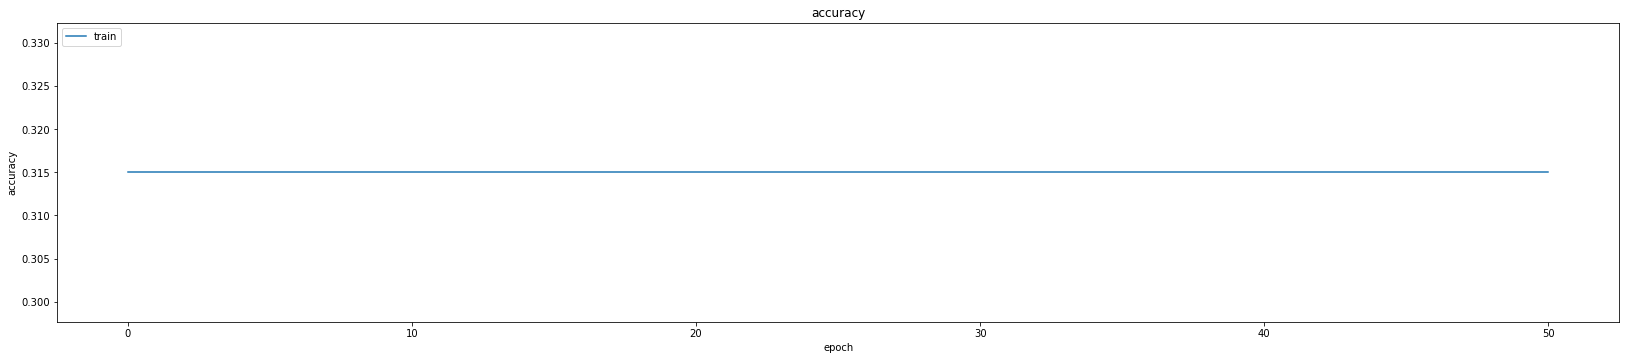

289000 290000


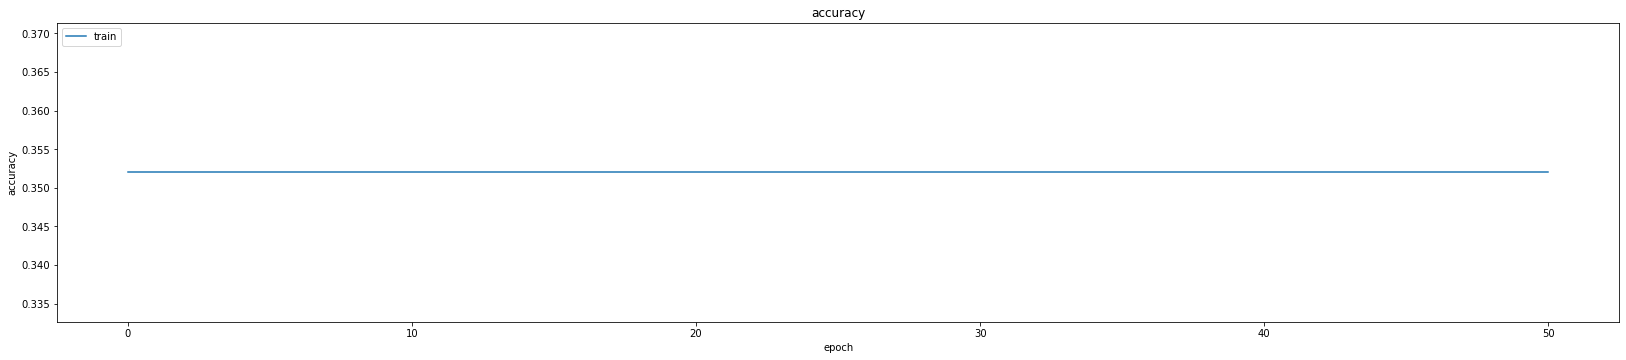

290000 291000


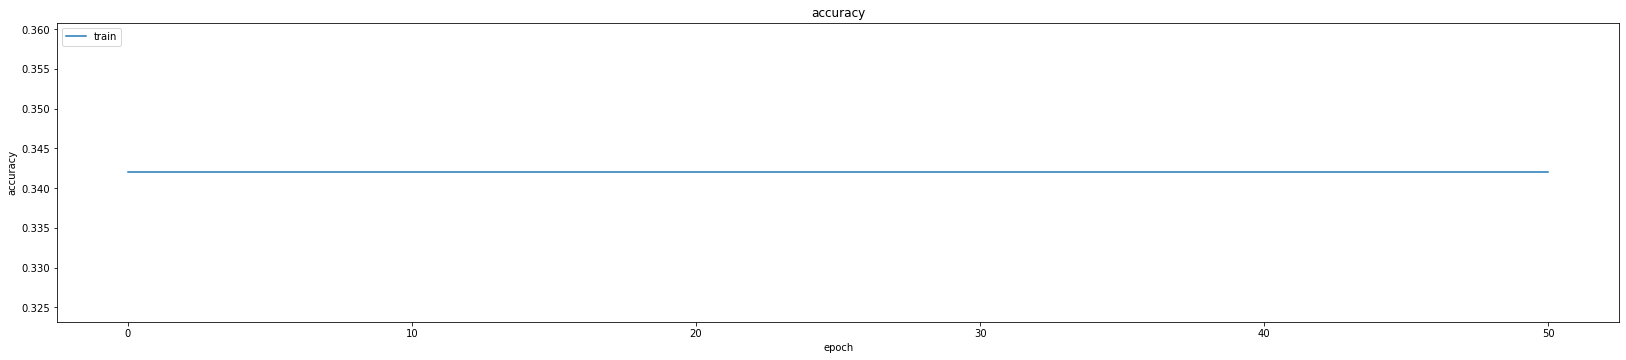

291000 292000


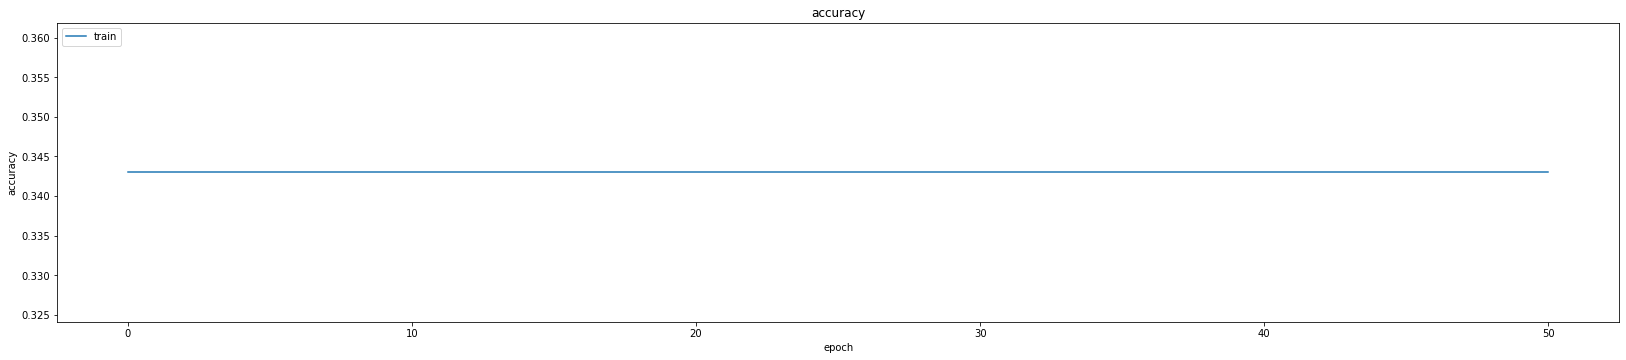

292000 293000


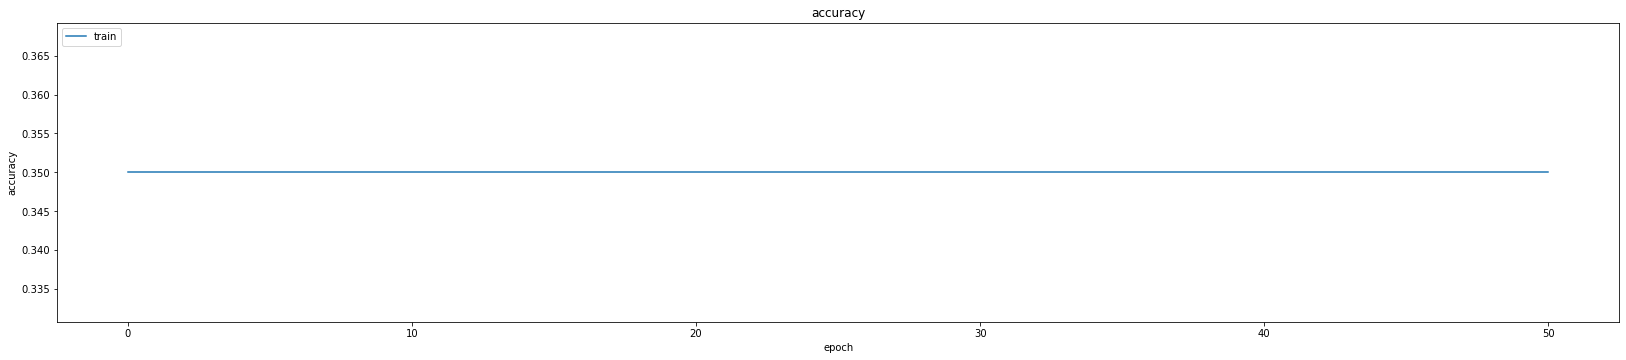

293000 294000


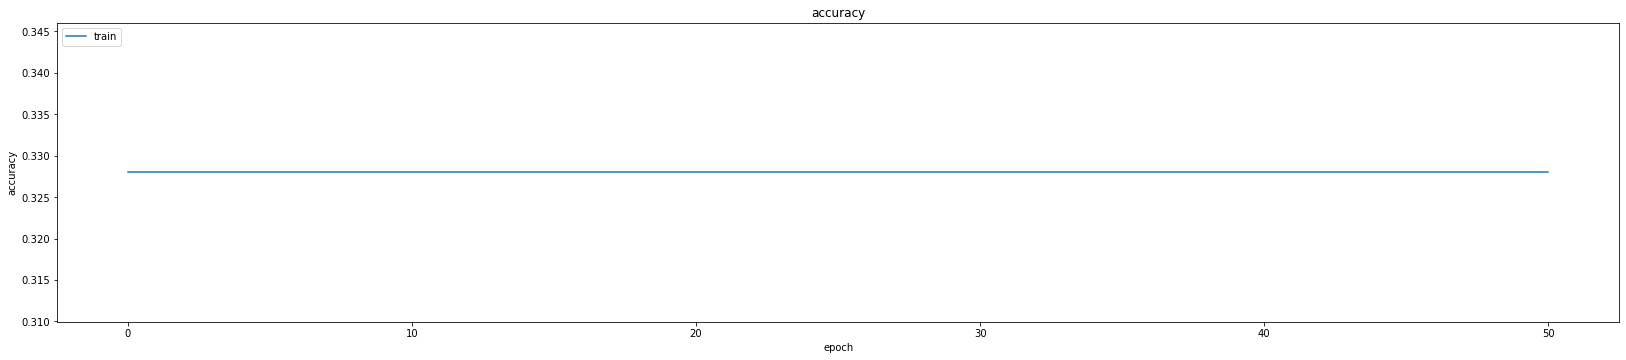

294000 295000


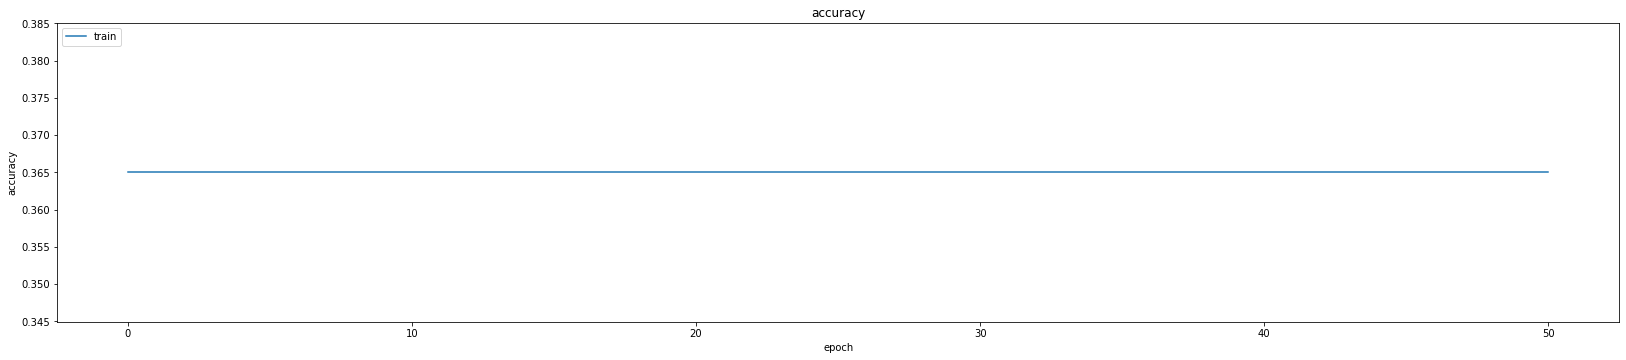

295000 296000


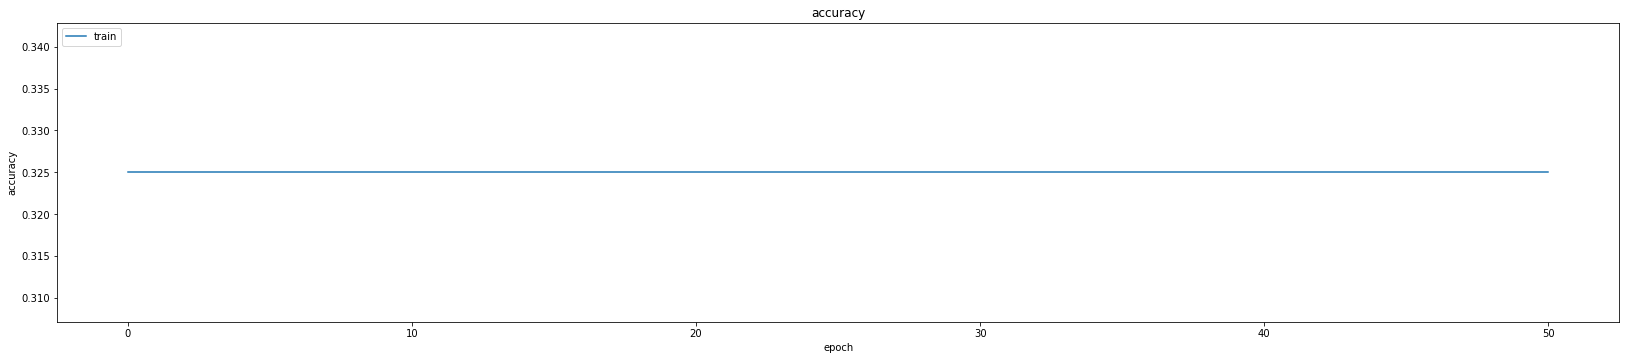

296000 297000


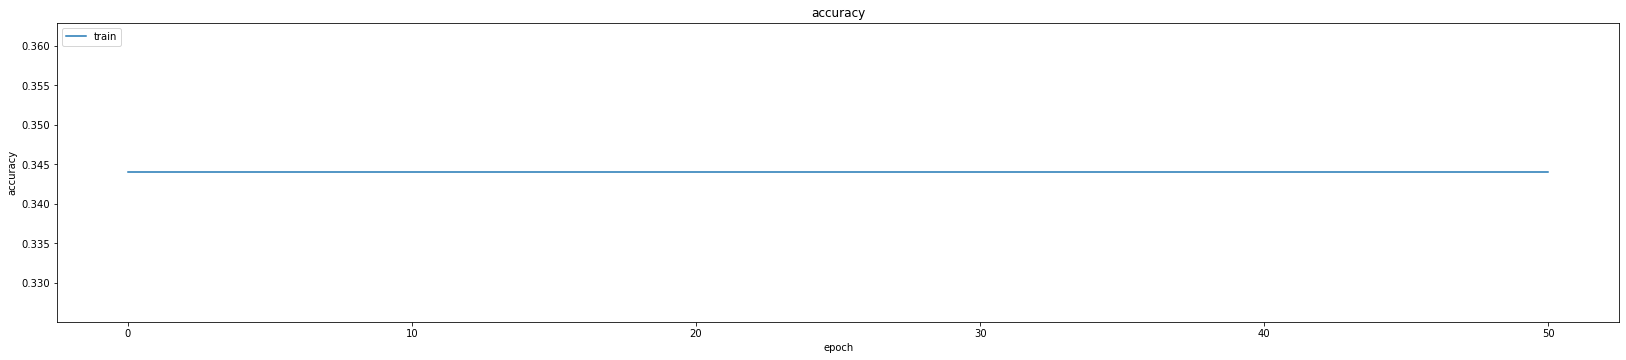

297000 298000


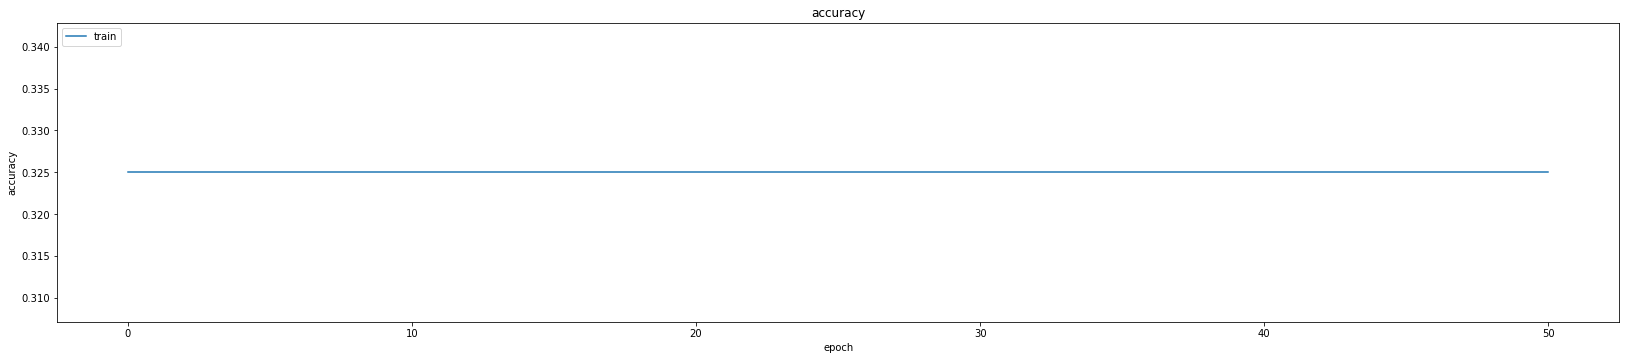

298000 299000


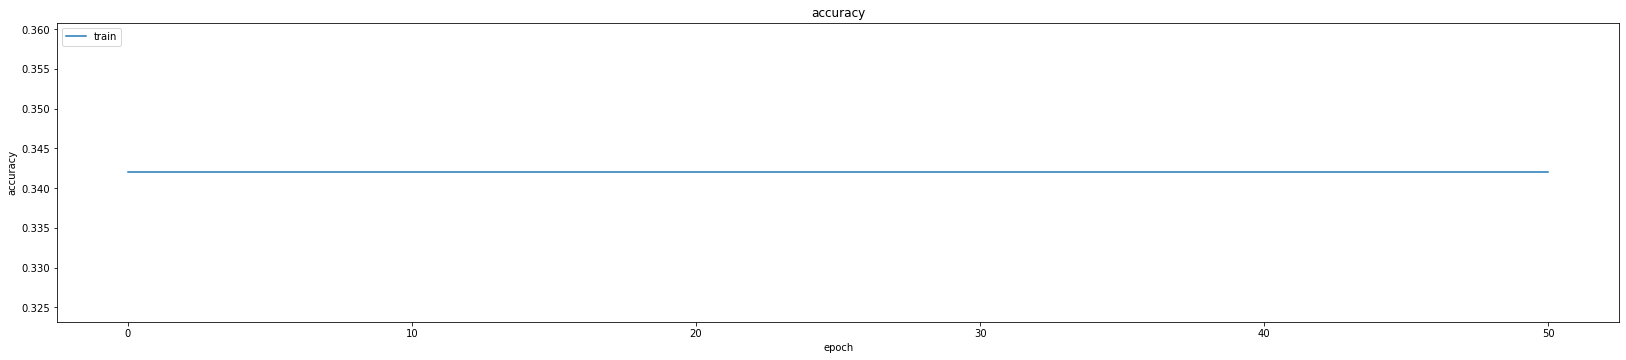

299000 300000


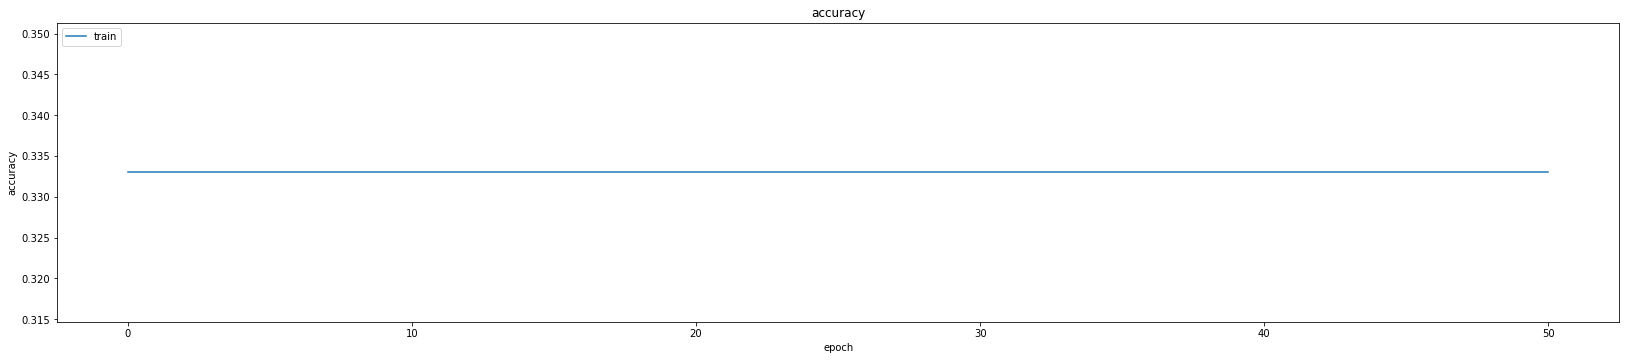

300000 301000


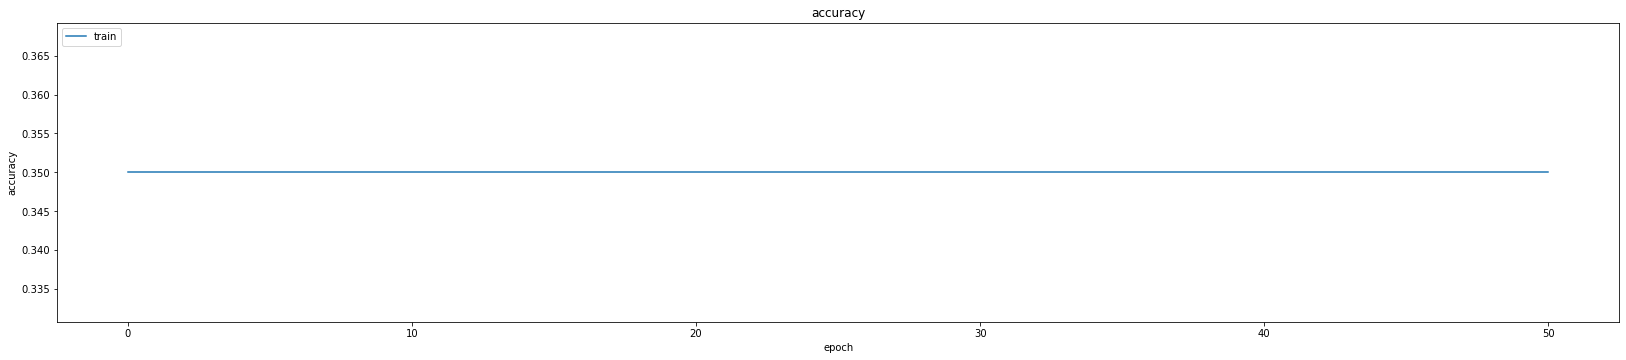

301000 302000


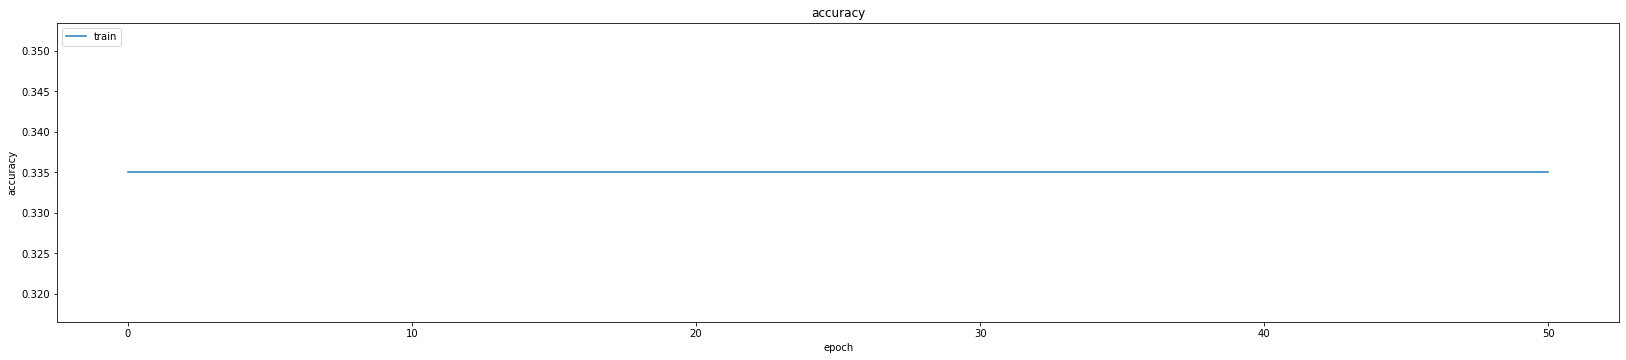

302000 303000


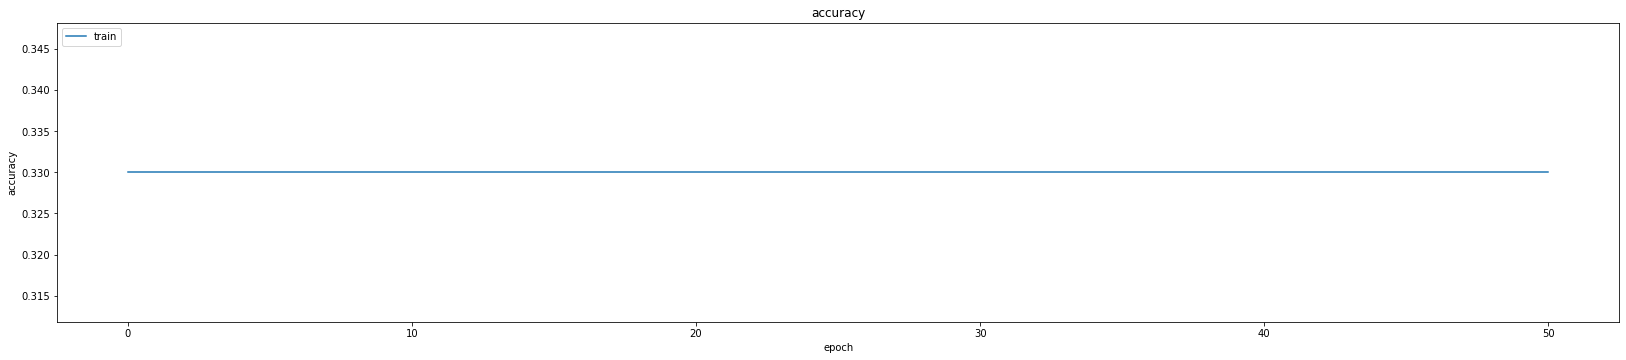

303000 304000


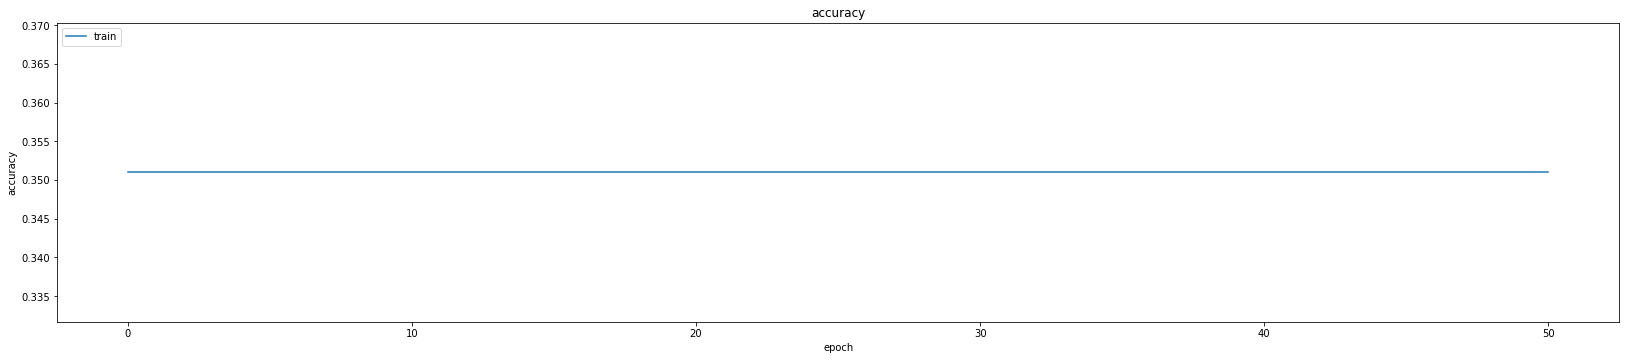

304000 305000


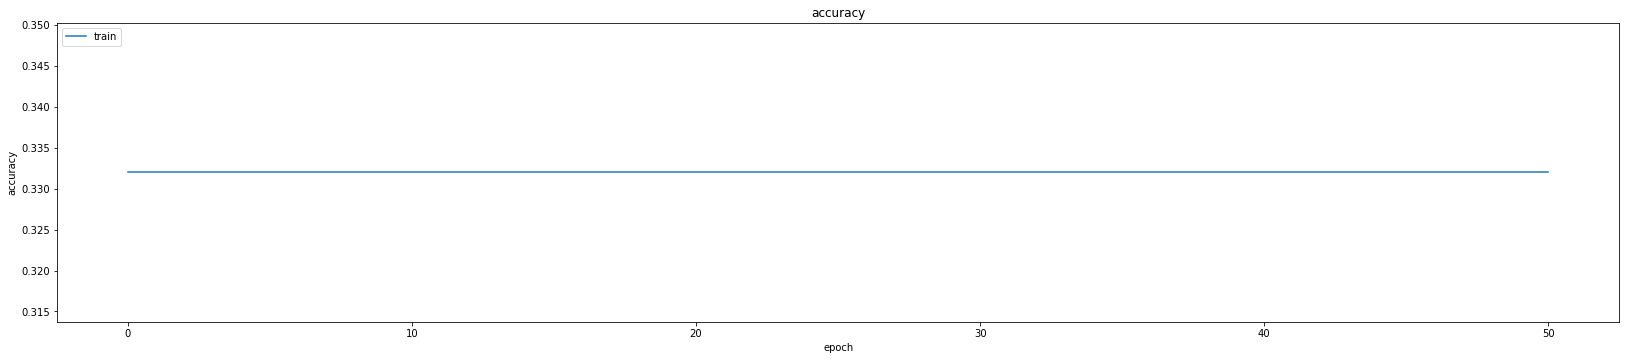

305000 306000


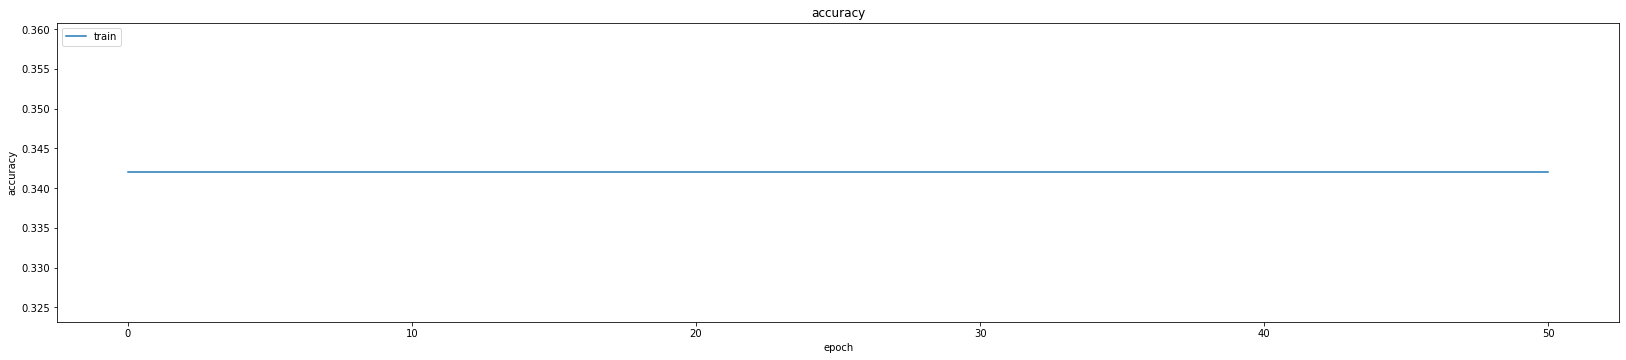

306000 307000


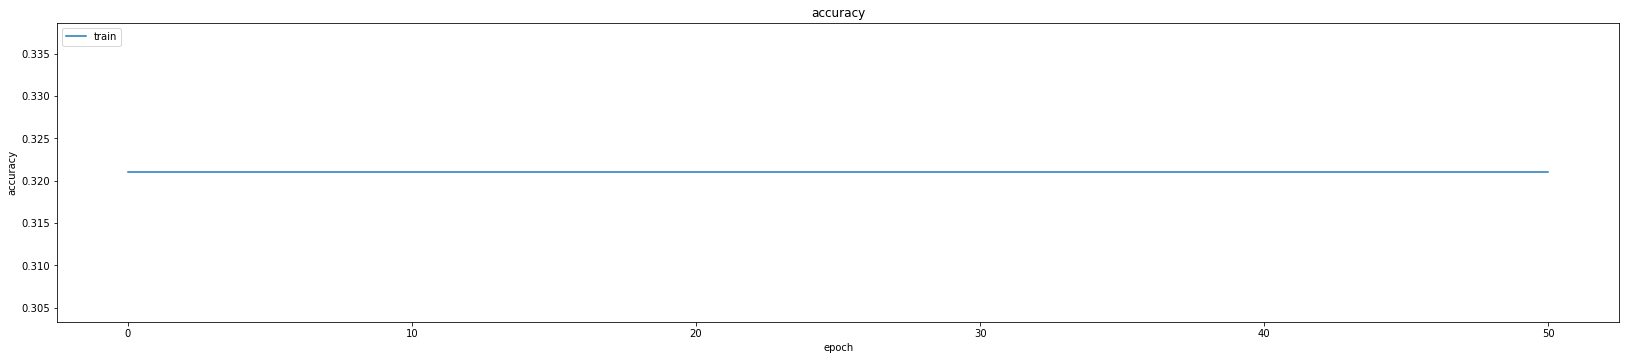

307000 308000


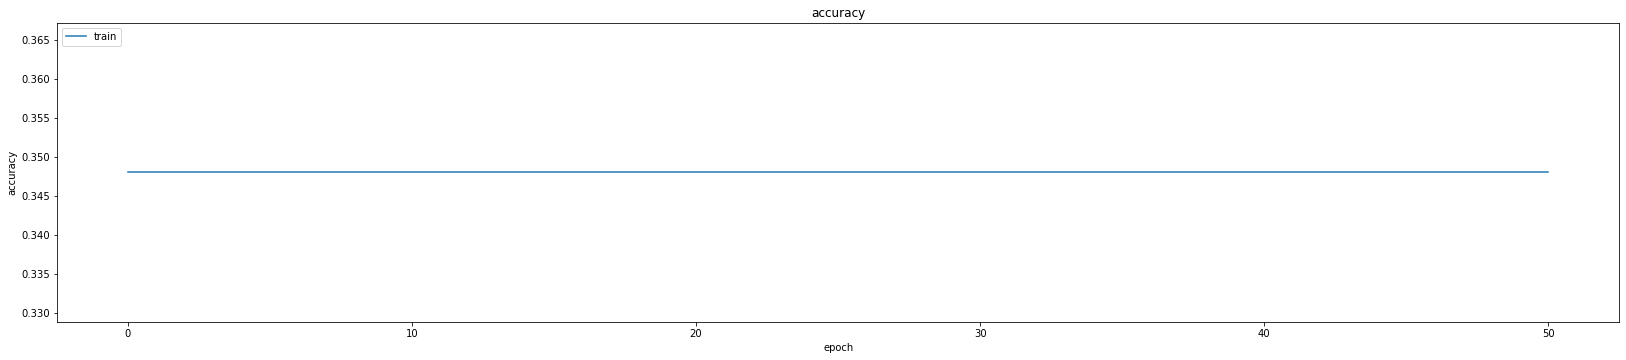

308000 309000


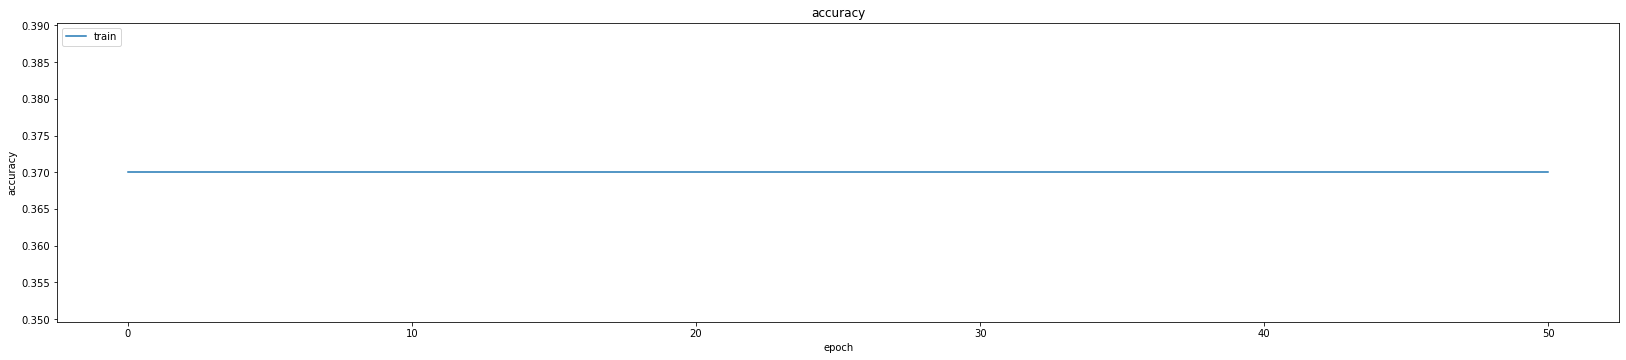

In [ ]:
def plotHistory(history):
        plt.plot(history.history['accuracy'])
        plt.title('accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
print ("Train the model")
length=len(X_train)
path_to_file="C:\\Users\\dnishimoto\\python_files\\python-deep-learning-master\\dense_equipment_model.h5"

#batch_size=1000
start_pos=0
early_stopping = EarlyStopping(monitor='accuracy', patience=50)
count=0
for index in range(start_pos,length,batch_size):
    if(index>0):
        file_exists = exists(path_to_file)
        if(file_exists):
            model.load_weights(path_to_file)
            #print("loaded weights")
        
        X2 = np.asarray(X_train[index-batch_size:index]).astype(np.float32)
        X2 = np.resize(X2,(X2.shape[0],1,X2.shape[1]))
        y2 = np.asarray(y_train[index-batch_size:index]).astype(np.float32)
        history=model.fit(X2,y2,batch_size=len(X),epochs=500,verbose=0,callbacks=[early_stopping])
        model.save_weights(path_to_file) # can give whole path to save model
        #print("saved weights")
        if (count%1000>=1):
            print(index-batch_size,index)
            plotHistory(history)
        count+=1

In [14]:
print("Random select indices from the dataframe then make a prediction")
size=len(df)
randomlist=[]
for i in range(0,10):
    n = random.randint(1,size)
    randomlist.append(n)
#print(randomlist)

look_back=1
X3=df[X_columns].iloc[randomlist]
y3=df['label'].iloc[randomlist]
y3 = pd.get_dummies(y3)

X3 = np.asarray(X3).astype(np.float32)
X3 = np.resize(X3,(X3.shape[0],look_back,X3.shape[1]))
y_pred=model.predict(X3)

#lstfailure_types=next(iter(failure_types))
for item in y_pred:
    print("failure type",np.argmax(item))

auc=roc_auc_score(y3, y_pred)
print(auc)


Random select indices from the dataframe then make a prediction
1/1 [==============================] - 0s 38ms/step
failure type 3
failure type 0
failure type 3
failure type 3
failure type 3
failure type 2
failure type 1
failure type 2
failure type 2
failure type 1
0.4947916666666667


In [11]:
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 550)            3850      
                                                                 
 dropout (Dropout)           (None, 1, 550)            0         
                                                                 
 dense_1 (Dense)             (None, 1, 100)            55100     
                                                                 
 dropout_1 (Dropout)         (None, 1, 100)            0         
                                                                 
 dense_2 (Dense)             (None, 1, 50)             5050      
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 flatten (Flatten)           (None, 50)               

In [ ]:
 auc=roc_auc_score(y, predictions)